# Machine Learning Project
# Diabetes Prediction
# Modified by: Sarim Aeyzaz (i21-0328)

### Note: 
In every cell where I have done my own contribution, I have added a comment called "#OWN CONTRIBUTION" 

### Project High Level Architecture (Own Contribution) 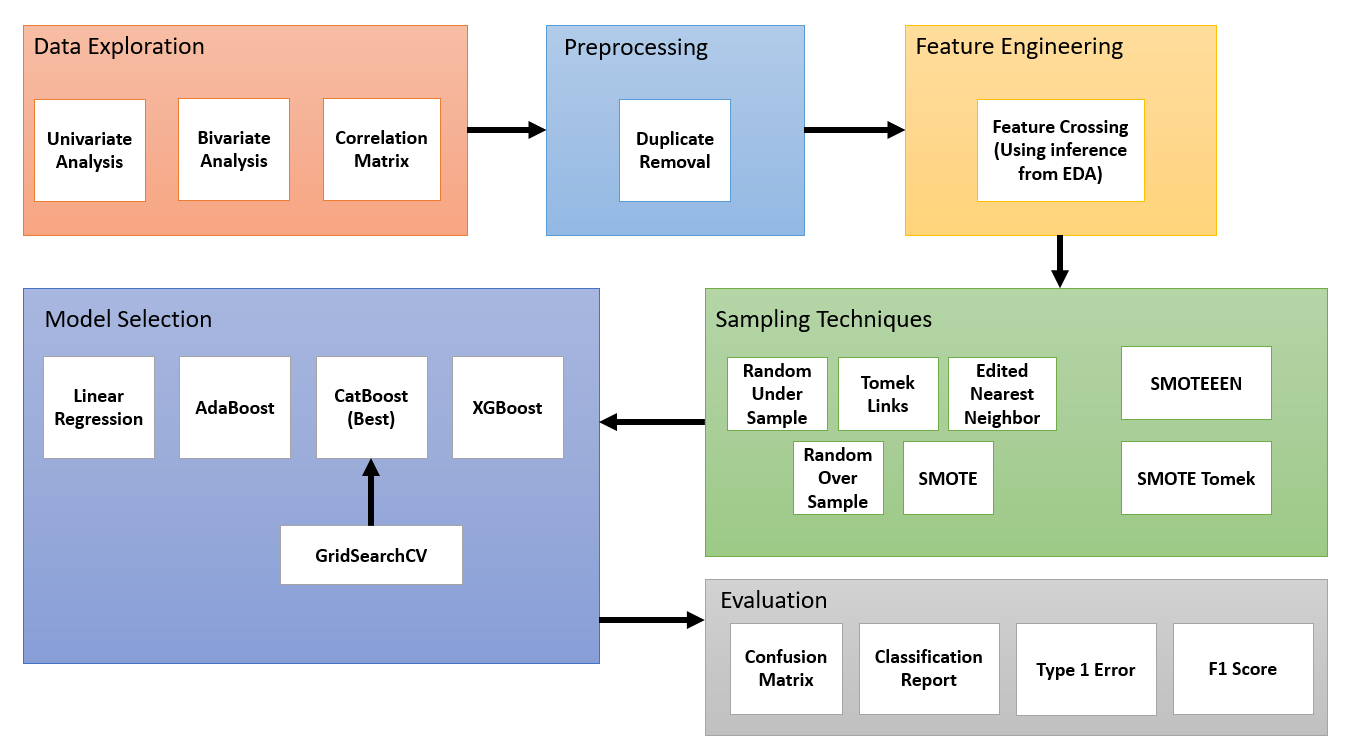

## Libraries Used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# OWN CONTRIBUTION (New stuff I used for my part)
import seaborn as sns
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks, RandomUnderSampler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier, Pool
from scipy import stats

In [2]:
# reading data :-
df = pd.read_csv('./diabetes_prediction_dataset.csv')
df.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

## Dataset Information

In [3]:
# data size :-
df.shape

(100000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


* No nulls present inside dataset.

In [5]:
df.describe()

age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           140.000000       0.000000  
75%         6.200000           159.000000       0.000000  
max         9.000000           300.000000       1.000000

In [6]:
# duplicates records :-
df.duplicated().sum()

3854

In [7]:
# removing duplicates :-
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

<a id="Data-Exploration"></a>
## Data Exploration :

In [8]:
# gender :
df['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

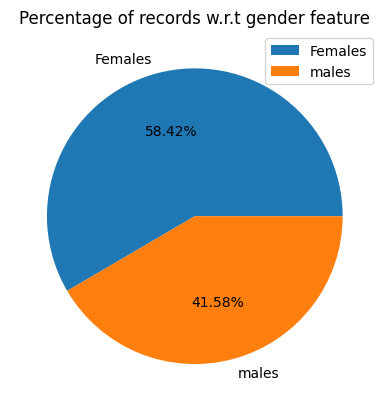

In [9]:
# removing records with gender not defined "low number of records which will not affect the result"
df = df[df['gender']!='Other']

num_var = list(df['gender'].value_counts().values)
labels = list(df['gender'].value_counts().index)
count_dict = dict(enumerate(num_var))

# Gender visualization
plt.pie(count_dict.values(), labels = ['Females', 'males'],autopct='%1.2f%%');
plt.legend();
plt.title('Percentage of records w.r.t gender feature');

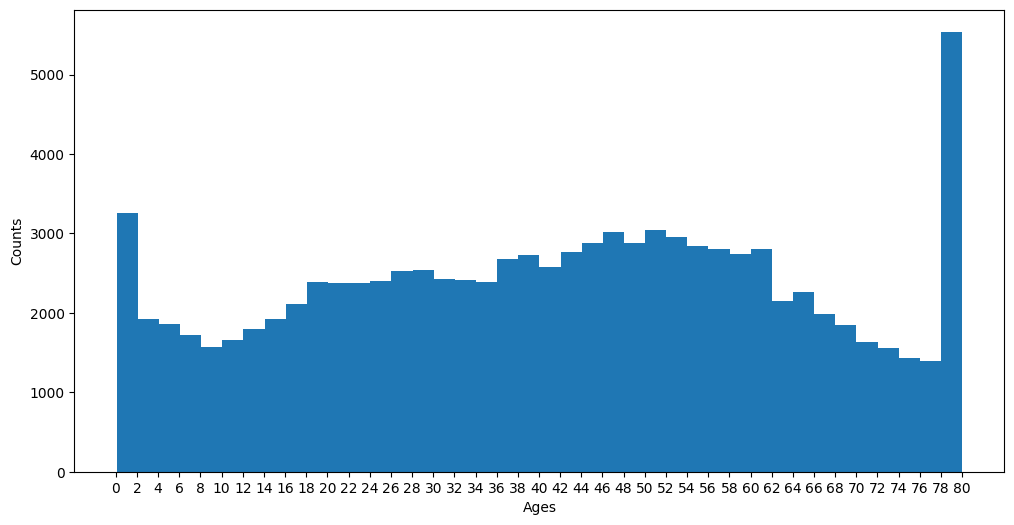

In [10]:
# age :
plt.figure(figsize = [12,6]);
plt.hist(df['age'], bins = 40);
plt.xlabel('Ages');
plt.ylabel('Counts');
plt.xticks(np.arange(0,82,2));

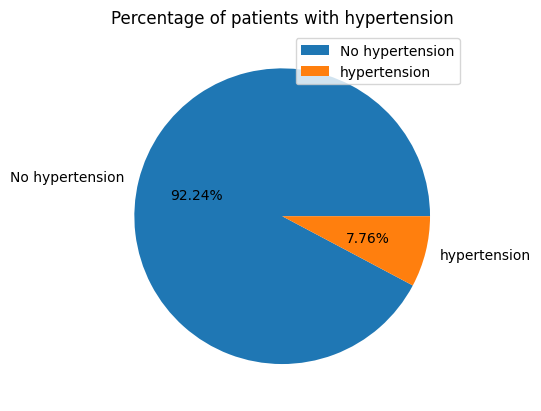

In [11]:
num_var = list(df['hypertension'].value_counts().values)
count_dict = dict(enumerate(num_var))

# [0] return to 'no hypertension' and [1] return to 'hypertension'
plt.pie(count_dict.values(), labels = ['No hypertension', 'hypertension'],autopct='%1.2f%%');
plt.legend();
plt.title('Percentage of patients with hypertension');

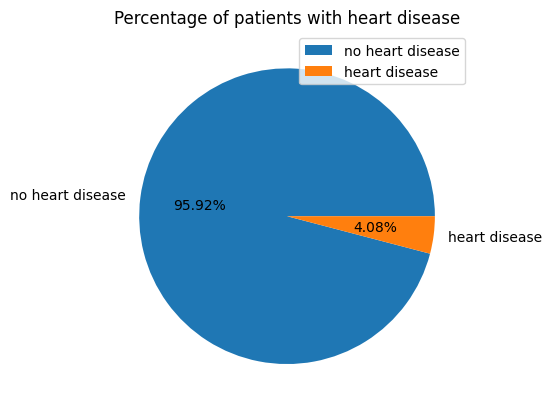

In [12]:
num_var = list(df['heart_disease'].value_counts().values)
count_dict = dict(enumerate(num_var))

# [0] return to 'no hypertension' and [1] return to 'hypertension'
plt.pie(count_dict.values(), labels = ['no heart disease', 'heart disease'],autopct='%1.2f%%');
plt.legend();
plt.title('Percentage of patients with heart disease');

In [13]:
# smoking_history :
df['smoking_history'].value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

In [14]:
df[df['smoking_history'] == 'No Info'].shape[0] / df.shape[0] *100

34.2054344207723

* 34 % of records have **no info** about smoking history , it like to be big missing values so we will remove this column better to maintain data integrity 

In [15]:
# removing smoking_history column :
df = df.drop(columns = ['smoking_history'])

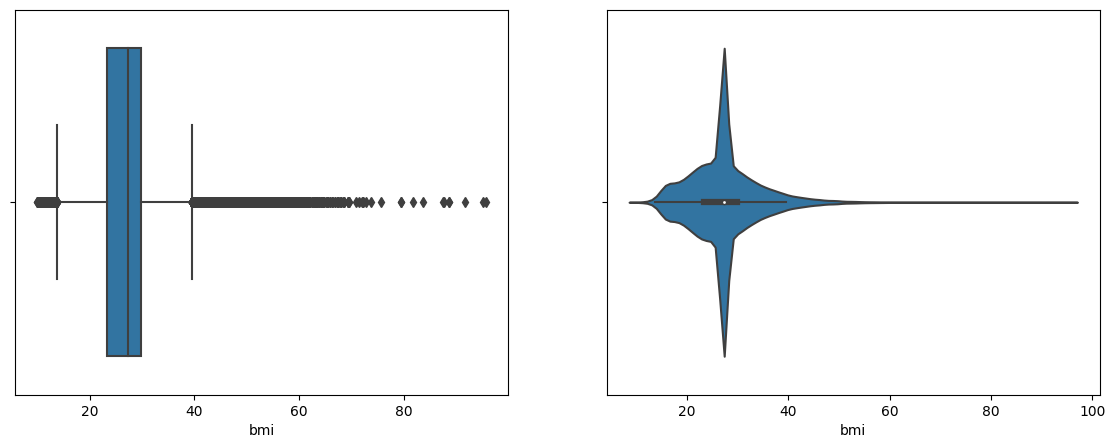

In [16]:
# bmi :
plt.figure(figsize = [14,5]);
plt.subplot(1,2,1);
sb.boxplot(data = df, x = 'bmi');

plt.subplot(1,2,2);
sb.violinplot(data = df, x = 'bmi');

In [17]:
# as we see we have many outliers from visualization, we want to remove it:
# 1. frist calculation IQR
IQR = df['bmi'].quantile(0.75) - df['bmi'].quantile(0.25)

# determine the upper and lower boundries : 
upper_boundry = df['bmi'].quantile(0.75) + (IQR*1.5)
lower_boundry = df['bmi'].quantile(0.25) - (IQR*1.5)

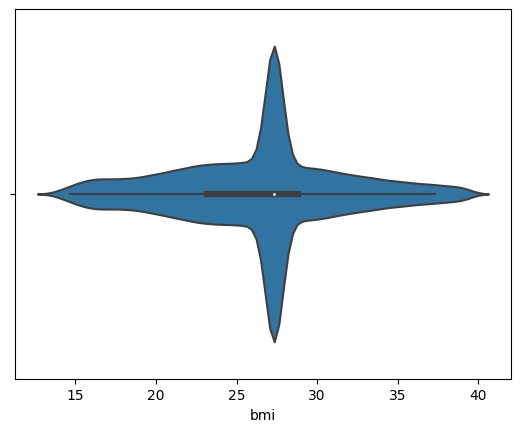

In [18]:
# removing outliers :
df = df[df['bmi'] <= upper_boundry]
df = df[df['bmi'] >= lower_boundry]

sb.violinplot(data = df, x = 'bmi');

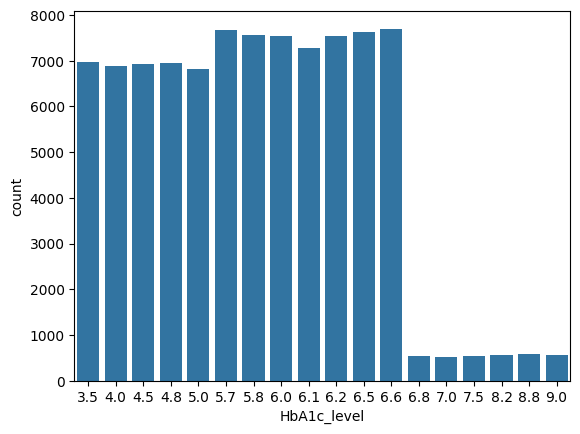

In [19]:
# HbA1c_level :
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = df['HbA1c_level'], color = base_color);

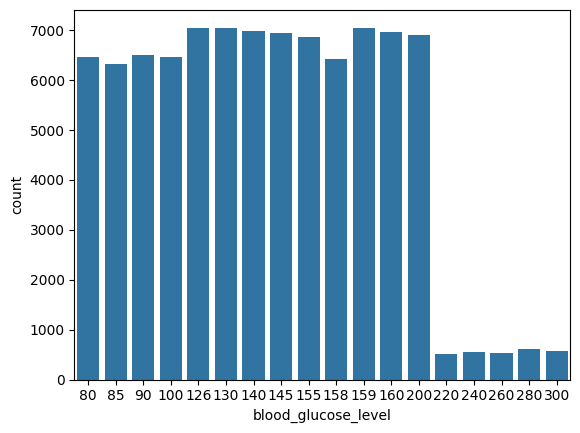

In [20]:
# blood_glucose_level :
sb.countplot(data = df, x = df['blood_glucose_level'], color = base_color);

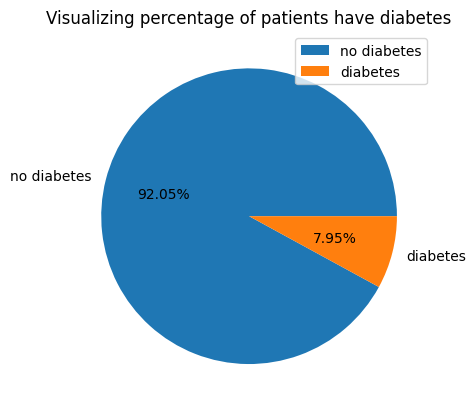

In [21]:
# diabetes :-
labels = list(df['diabetes'].value_counts().index)
num_var = list(df['diabetes'].value_counts().values)

plt.pie(num_var, labels = ['no diabetes', 'diabetes'],autopct='%1.2f%%');
plt.legend();
plt.title('Visualizing percentage of patients have diabetes');

In [22]:
# reset index after removing some outliers and duplicates :-
df = df.reset_index(drop=True)

### Bivariate Analysis (Own Contribution)

#### BMI vs Diabetes

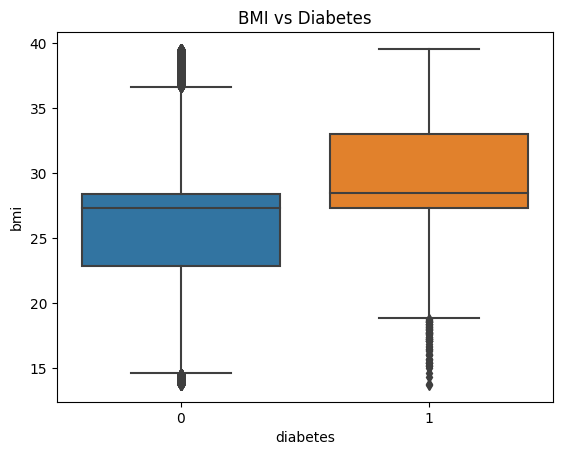

In [23]:
# OWN CONTRIBUTION (I wanted to see the relation between diabetes and every other variable)
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

#### Age vs Diabetes

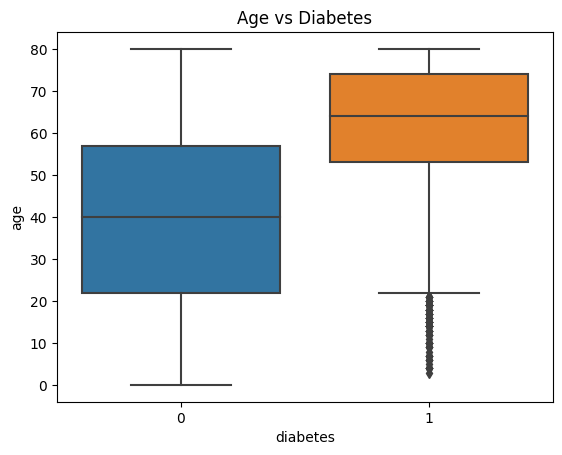

In [24]:
# OWN CONTRIBUTION (I wanted to see the relation between diabetes and every other variable)
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

#### HbA1c vs Diabetes

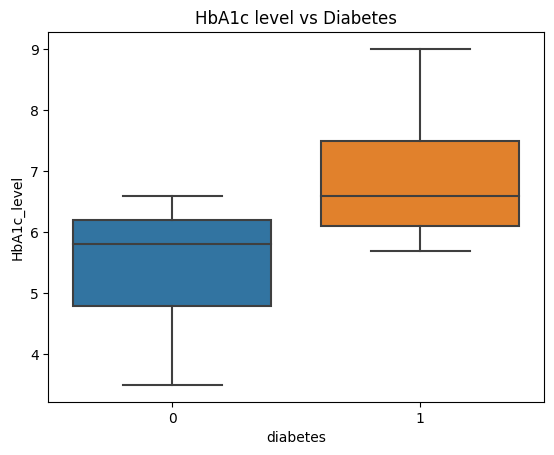

In [25]:
# OWN CONTRIBUTION (I wanted to see the relation between diabetes and every other variable)
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

#### Blood Glucose Level vs Diabetes

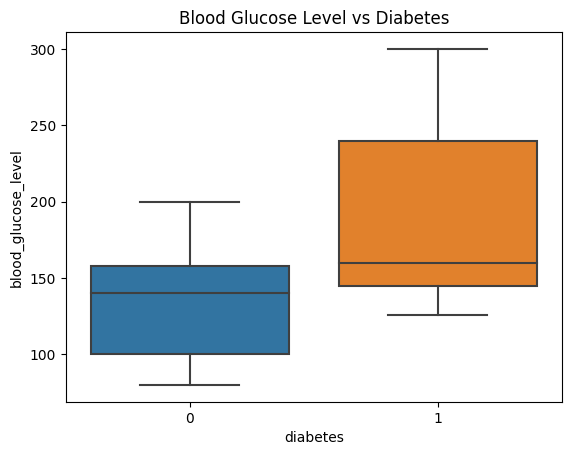

In [26]:
# OWN CONTRIBUTION (I wanted to see the relation between diabetes and every other variable) 
# Boxplot blood glucose level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

In [27]:
df.head()

gender   age  hypertension  heart_disease    bmi  HbA1c_level  \
0  Female  80.0             0              1  25.19          6.6   
1  Female  54.0             0              0  27.32          6.6   
2    Male  28.0             0              0  27.32          5.7   
3  Female  36.0             0              0  23.45          5.0   
4    Male  76.0             1              1  20.14          4.8   

   blood_glucose_level  diabetes  
0                  140         0  
1                   80         0  
2                  158         0  
3                  155         0  
4                  155         0

In [28]:
df['gender'] = [0 if x == 'Male' else 1 for x in df['gender']]

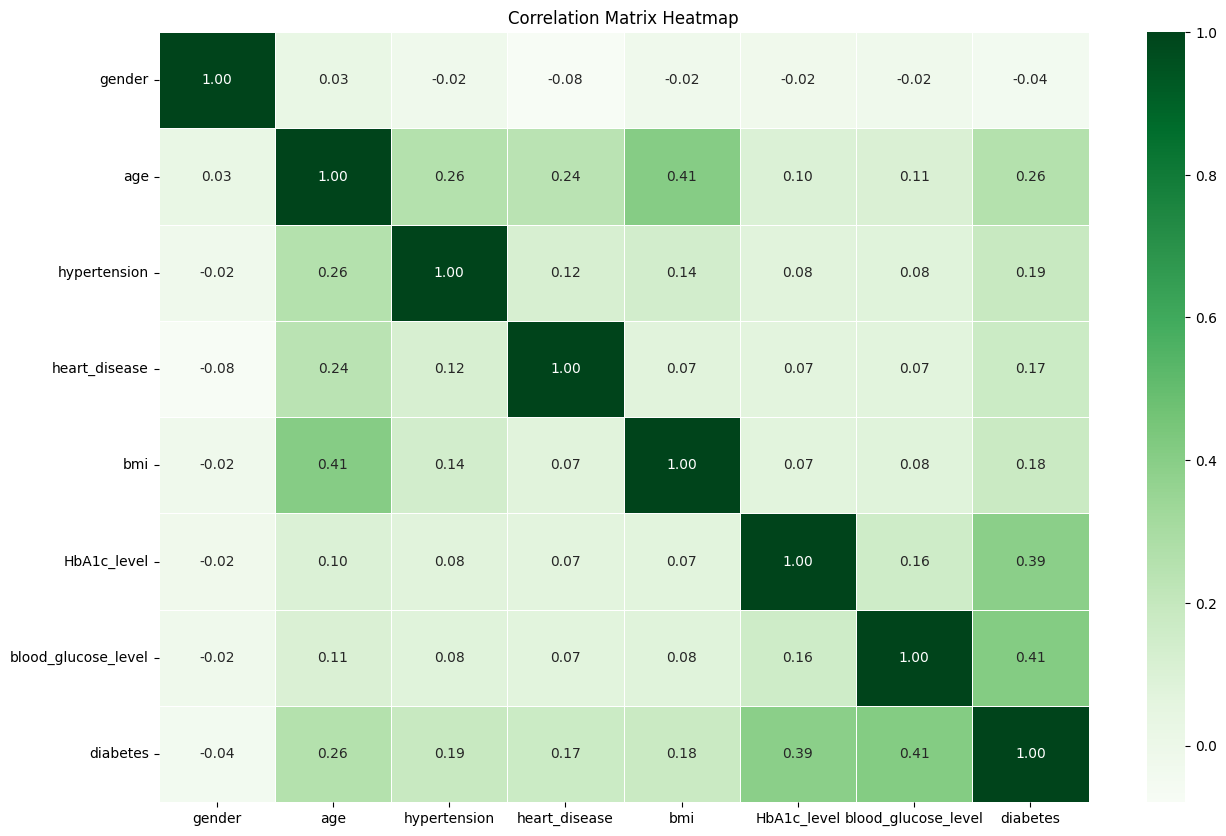

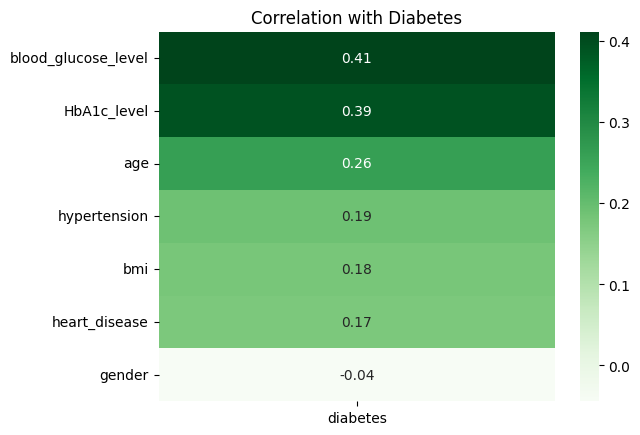

In [29]:
# OWN CONTRIBUTION (Correlation Matrix helped me take a more indepth look at which features are closely related)
# I also made a correlation of diabetes with other features and ranked those features so I use it and see which features
# I should cross


correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


corr = df.corr()
target_corr = corr['diabetes'].drop('diabetes')
target_corr_sorted = target_corr.sort_values(ascending=False)
sns.heatmap(target_corr_sorted.to_frame(), cmap="Greens", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

### Feature Crossing

In [30]:
# OWN CONTRIBUTION

# These two features were crossed because I wanted to create a relation between age and blood sugar levels (Since older
# people are likely to be more diabetic and thus, have high blood sugar levels)
df['age_sugar'] = df['age'] * df['blood_glucose_level']
df['age_hba1c'] = df['age'] * df['HbA1c_level']

# This feature was created since heart disease didn't tell me much and I wanted to extract some more information about it
df['heart_sugar'] = df['heart_disease'] * df['blood_glucose_level']

# I noticed a high correlation between bmi and age so I decided to create a synthetic feature combining the two
df['bmi_age'] = df['bmi'] * df['age']

# These two features were the most correlated feature with diabetes so I decided to try combining them both and hope
# to extract even more information
df['sugar_hba1c'] = df['blood_glucose_level'] * df['HbA1c_level']

# I wanted to see how much sugar per bmi patients would have 
df['sugar_per_bmi'] = df['blood_glucose_level'] / df['bmi']


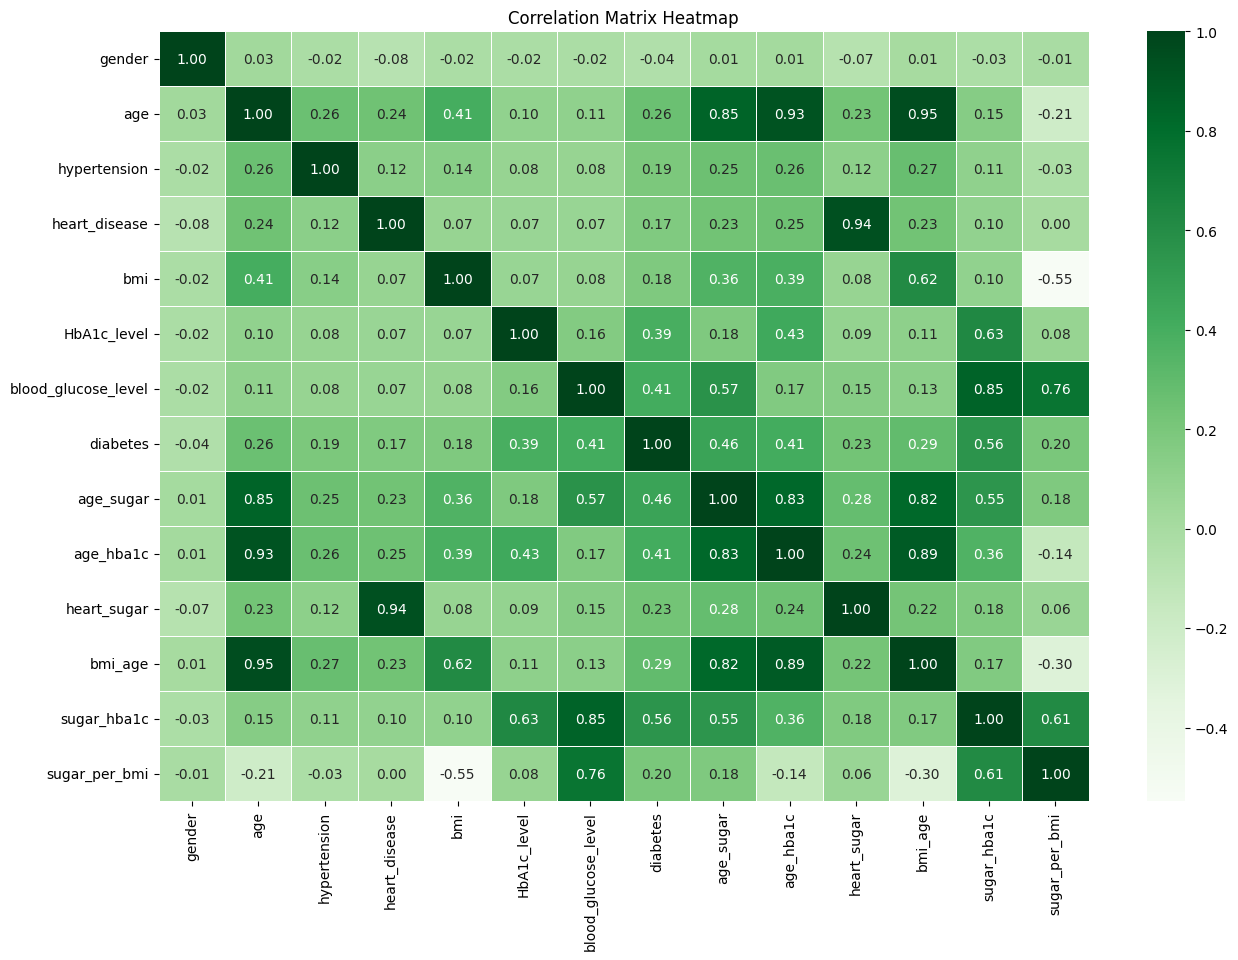

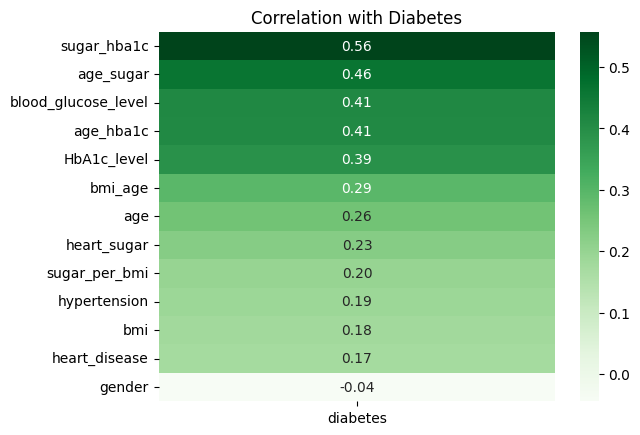

In [31]:
# OWN CONTRIBUTION (Now seeing how my crossed features affected the patients data)
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


corr = df.corr()
target_corr = corr['diabetes'].drop('diabetes')
target_corr_sorted = target_corr.sort_values(ascending=False)
sns.heatmap(target_corr_sorted.to_frame(), cmap="Greens", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

In [32]:
# OWN CONTRIBUTION (Since gender wasn't that relevant of a feature)
df.drop(['gender'], inplace = True, axis = 1)
df.head()

age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   
2  28.0             0              0  27.32          5.7                  158   
3  36.0             0              0  23.45          5.0                  155   
4  76.0             1              1  20.14          4.8                  155   

   diabetes  age_sugar  age_hba1c  heart_sugar  bmi_age  sugar_hba1c  \
0         0    11200.0      528.0          140  2015.20        924.0   
1         0     4320.0      356.4            0  1475.28        528.0   
2         0     4424.0      159.6            0   764.96        900.6   
3         0     5580.0      180.0            0   844.20        775.0   
4         0    11780.0      364.8          155  1530.64        744.0   

   sugar_per_bmi  
0       5.557761  
1       2.928258  
2       5.783309  
3       6.609808  
4       7.696127

<a id="Prediction-process"></a>
## Prediction process :

**Some columns need to be standarized for better performance in prediction process :** 

In [33]:
ss = StandardScaler()
df[['age','bmi','HbA1c_level','blood_glucose_level']] = ss.fit_transform(df[['age','bmi','HbA1c_level','blood_glucose_level']])
df.head()

age  hypertension  heart_disease       bmi  HbA1c_level  \
0  1.691163             0              1 -0.233179     1.013362   
1  0.544147             0              0  0.173820     1.013362   
2 -0.602869             0              0  0.173820     0.168773   
3 -0.249941             0              0 -0.565657    -0.488130   
4  1.514699             1              1 -1.198129    -0.675816   

   blood_glucose_level  diabetes  age_sugar  age_hba1c  heart_sugar  bmi_age  \
0             0.057083         0    11200.0      528.0          140  2015.20   
1            -1.430131         0     4320.0      356.4            0  1475.28   
2             0.503248         0     4424.0      159.6            0   764.96   
3             0.428887         0     5580.0      180.0            0   844.20   
4             0.428887         0    11780.0      364.8          155  1530.64   

   sugar_hba1c  sugar_per_bmi  
0        924.0       5.557761  
1        528.0       2.928258  
2        900.6       5.783309  
3        775.0       6.609808  
4        744.0       7.696127

Text(0.5, 1.0, 'Visualizing percentage of patients have diabetes')

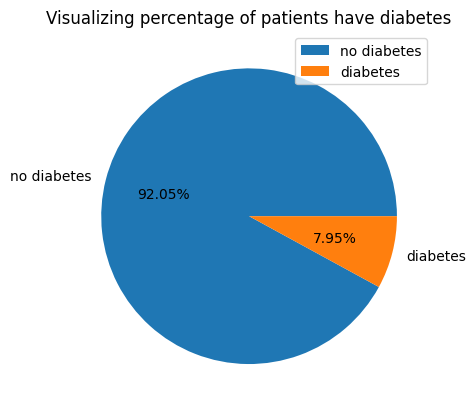

In [34]:
# Target :-
num_var = list(df['diabetes'].value_counts().values)
# [0] return to 'no hypertension' and [1] return to 'hypertension'
plt.pie(num_var, labels = ['no diabetes', 'diabetes'],autopct='%1.2f%%')
plt.legend()
plt.title('Visualizing percentage of patients have diabetes')

**We can see that the dataset is umbalanced, latter we will use some techniques to avoid misclassified labels during prediction.**

**We will use Logistic Regression and AdaBoost Classifier to predict the target and we will compare the results from those two models and getting the best one .**

**First we wil creat some helfull functions**

In [35]:
# Lists of Mitrics according to each model :

resampling_tech = []
models = []
f1_score = []
accuracy = []
type_1_error = []
type_2_error = []

In [36]:
# OWN CONTRIBUTION
# Added CatBoost and XGBoost, I also heavily edited this function to record evaluation metrics of each model
# and display them visually

def train_models(features,targed):

    # split data into training and testing data :-
    x_train, x_test, y_train, y_test = train_test_split(features,targed, test_size = 0.2, random_state=42)
    
    # classifiers :
    classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "CatBoostClassifier": CatBoostClassifier(logging_level='Silent'), 
    "XGBoostClassifier": XGBClassifier()
    }
    
    metricsDf = pd.DataFrame(columns = ['Model', 'F1_Score', 'Accuracy', 'Type_1_Error', 'Type_2_Error'])

    # figure plotting construction :
    f, axes = plt.subplots(1, 4, figsize=(16, 5), sharey='row')
    
    # looping through classifiers :-
    for i, (key, classifier) in enumerate(classifiers.items()):
        clf = classifier.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        
        cf_matrix = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(cf_matrix,display_labels=clf.classes_)
        disp.plot(ax=axes[i],cmap='viridis_r')
        disp.ax_.set_title(key)
        disp.im_.colorbar.remove()

        score = metrics.f1_score(y_test, y_pred)
        acc = metrics.accuracy_score(y_test, y_pred)
        error1 = round((1 - metrics.recall_score(y_test, y_pred,pos_label=1))*100,3)
        error2 = round((1 - metrics.recall_score(y_test, y_pred,pos_label=0))*100,3)
        
        models.append(key)
        f1_score.append(score)
        accuracy.append(acc)
        type_1_error.append(error1)
        type_2_error.append(error2)
        
        metricsDf.loc[len(metricsDf)] = [key, score, acc, error1, error2]
       
    f.colorbar(disp.im_, ax=axes)
    plt.show()    
    
    return metricsDf

In [37]:

# function that split features columns and targed to be used in fitting ML model :-
def SplitFeaturesTarged(data):

    x = data.drop(columns = ['diabetes'])
    y = data['diabetes']
    
    return x,y

### Training :-

In [38]:
# split features and target from dataset :
x_res,y_res = SplitFeaturesTarged(df)

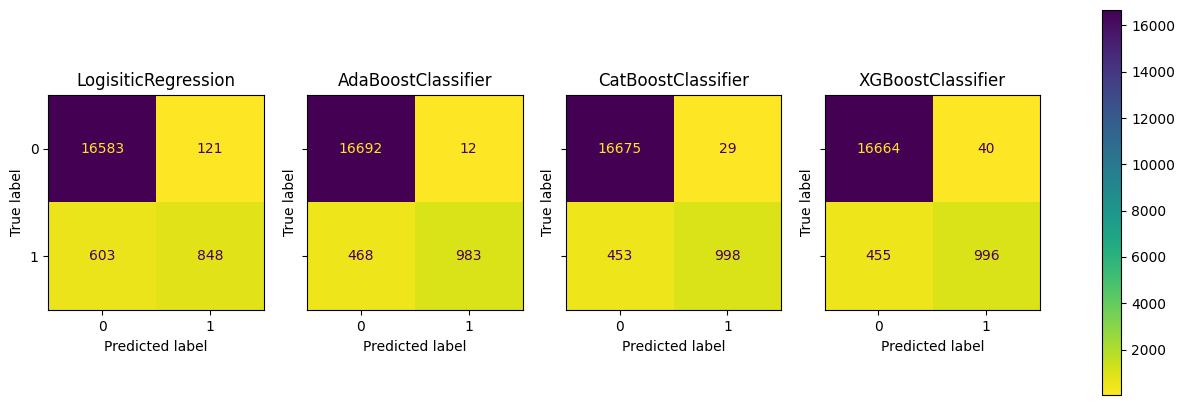

Model  F1_Score  Accuracy  Type_1_Error  Type_2_Error
0  LogisiticRegression  0.700826  0.960121        41.558         0.724
1   AdaBoostClassifier  0.803761  0.973561        32.254         0.072
2   CatBoostClassifier  0.805488  0.973451        31.220         0.174
3    XGBoostClassifier  0.800965  0.972735        31.358         0.239

In [39]:
# OWN CONTRIBUTION (Now includes visuals, CatBoost and XGBoost models)
train_models(x_res,y_res)

* We can see that **AdaBoost Classifier** perform better than **Logisitic Regression** that show higher in all metric scores.
* However, The **AdaBoost Classifier** predicted poorly in Positive labels and we predicted 31.8% of diabetic persons have no diabetes.

* **Thinking about this for a while, there are different severities to the different errors here. Classifying someone who has diabetes as not having it (false negative), is likely more severe than classifying someone who does not have it as having it (false positive).**

* So we want to increase number of **True Positives** as much as possible and decrease number of **False Negatives** 

* When we have a binary Classification job , We could expose to two types of errors, **Type 1 Error** & **Type 2 Error**.
* **Type 1 Error** is the most worst condition.

* during this project, the most worst condition is that the model predict the diabetic patient as not diabetic, in this case we want to reduce **Type 1 Error** as much as possible.

* Outcomes from the two models show that : out of all patients who actually suffer from diabetes, the proportion of patients who are incorrectly classified as not having diabetes = 38.5% for LogisiticRegression model & 31.8% for AdaBoostClassifier model **==** **Type 1 Error**

* **Type 2 Error** here is : out of all patients who actually not suffer from diabetes, the proportion of patients who are incorrectly classified as having diabetes . 

* This type of error is related to a metric [Recall] which quantifies the number of correct positive predictions made out of all positive predictions that could have been made. 

* Although the accuracy of LogisiticRegression model & AdaBoostClassifier model is 96.3% and 97.3% respectively, but the two models perform poorly in predicting the number of patients with diabetes


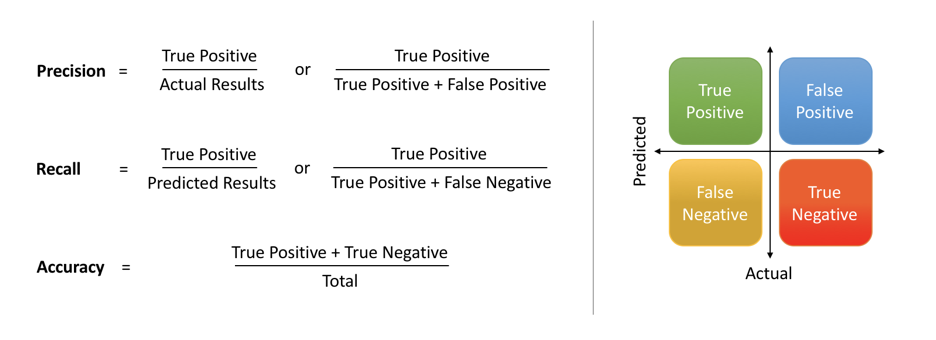

* We want to increase the Recall without affecting the Precision to reduce the **Type 1 Error** .
* The perfect metric that combine those two together is **F1 Score**

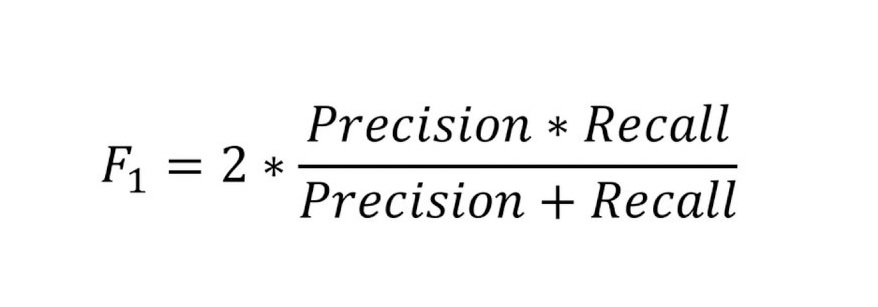

* **Our goal is to increase the Recall value and not affect on Precesion value** 
* **As Recall positive increased, type_1_error decreased and get better performance**

## Sampling Techniques (Own Contribution)

### Undersampling Techniques:

### 1. RandomUnderSampler

In [40]:
# OWN CONTRIBUTION
x, y = SplitFeaturesTarged(df)
print('Original dataset shape %s' % Counter(y))
rus = RandomUnderSampler()
x_res, y_res = rus.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_res))

resampling_tech.extend([rus, rus, rus, rus])

Original dataset shape Counter({0: 83559, 1: 7215})
Resampled dataset shape Counter({0: 7215, 1: 7215})


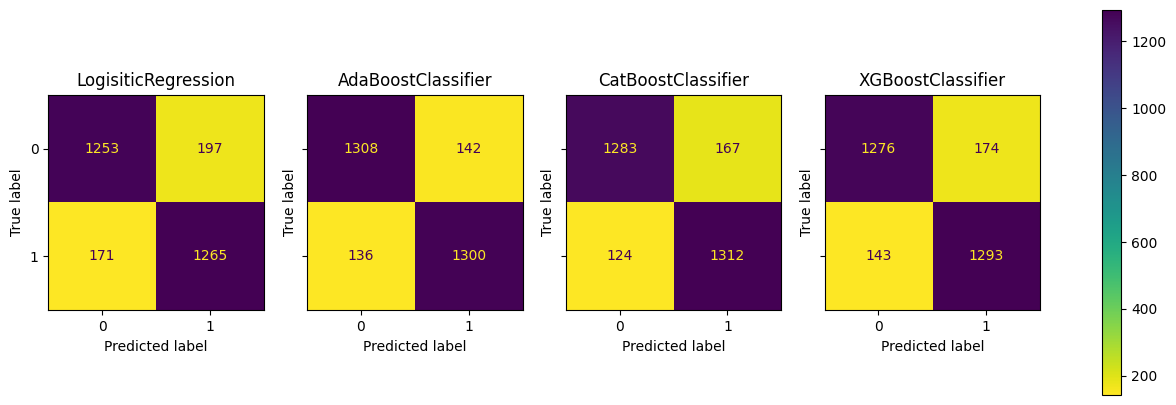

Model  F1_Score  Accuracy  Type_1_Error  Type_2_Error
0  LogisiticRegression  0.873016  0.872488        11.908        13.586
1   AdaBoostClassifier  0.903405  0.903673         9.471         9.793
2   CatBoostClassifier  0.900172  0.899168         8.635        11.517
3    XGBoostClassifier  0.890803  0.890159         9.958        12.000

In [41]:
# OWN CONTRIBUTION
RUS_model = train_models(x_res,y_res)
RUS_model

### 2. TomekLinks

In [42]:
# OWN CONTRIBUTION
x, y = SplitFeaturesTarged(df)
print('Original dataset shape %s' % Counter(y))
tl = TomekLinks()
x_res, y_res = tl.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_res))

resampling_tech.extend([tl, tl, tl, tl])

Original dataset shape Counter({0: 83559, 1: 7215})
Resampled dataset shape Counter({0: 82504, 1: 7215})


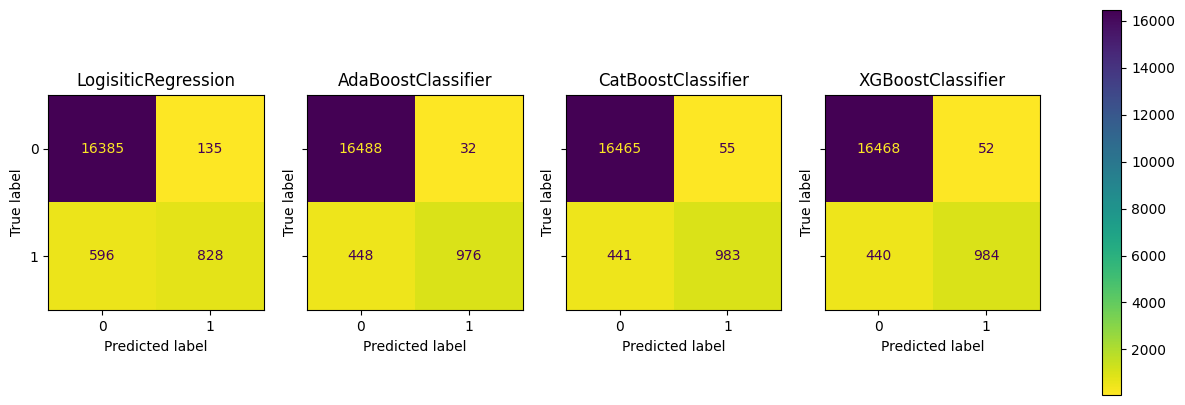

Model  F1_Score  Accuracy  Type_1_Error  Type_2_Error
0  LogisiticRegression  0.693758  0.959262        41.854         0.817
1   AdaBoostClassifier  0.802632  0.973250        31.461         0.194
2   CatBoostClassifier  0.798538  0.972358        30.969         0.333
3    XGBoostClassifier  0.800000  0.972581        30.899         0.315

In [43]:
# OWN CONTRIBUTION
TomekLinks_model = train_models(x_res,y_res)
TomekLinks_model

### 3. Edited Nearest Neighbour

In [44]:
# OWN CONTRIBUTION
x,y = SplitFeaturesTarged(data = df)
print('Original dataset shape %s' % Counter(y))
enn = EditedNearestNeighbours()
x_res, y_res = enn.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_res))

resampling_tech.extend([enn, enn, enn, enn])

Original dataset shape Counter({0: 83559, 1: 7215})
Resampled dataset shape Counter({0: 78117, 1: 7215})


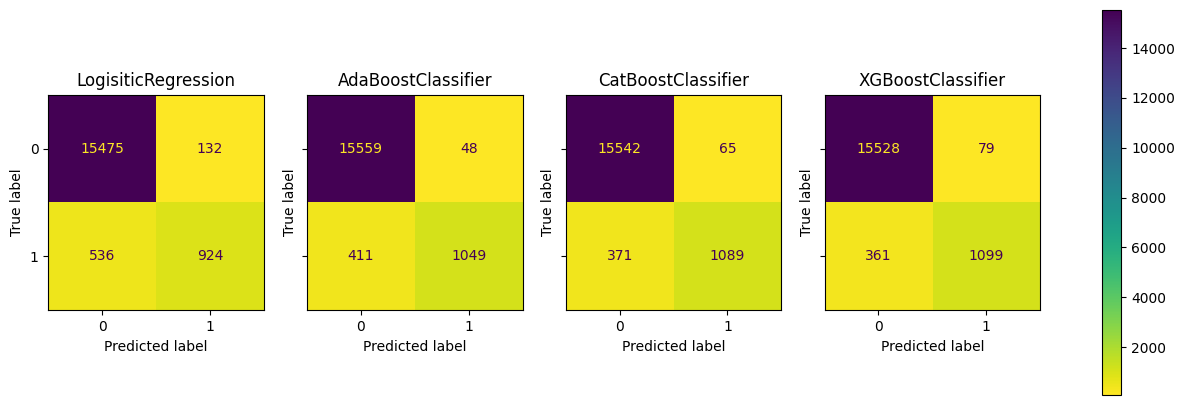

Model  F1_Score  Accuracy  Type_1_Error  Type_2_Error
0  LogisiticRegression  0.734499  0.960860        36.712         0.846
1   AdaBoostClassifier  0.820493  0.973106        28.151         0.308
2   CatBoostClassifier  0.833206  0.974454        25.411         0.416
3    XGBoostClassifier  0.833207  0.974219        24.726         0.506

In [45]:
# OWN CONTRIBUTION
ENN_model = train_models(x_res,y_res)
ENN_model

### Oversampling Techniques:

### 1. RandomOverSampler :

In [46]:
# OWN CONTRIBUTION
# define ros class :-
x,y = SplitFeaturesTarged(df)

ros = RandomOverSampler()
print('Resampled dataset shape %s' % Counter(y))
x_res, y_res = ros.fit_resample(x,y)
print('Resampled dataset shape %s' % Counter(y_res))

resampling_tech.extend([ros, ros, ros, ros])

Resampled dataset shape Counter({0: 83559, 1: 7215})
Resampled dataset shape Counter({0: 83559, 1: 83559})


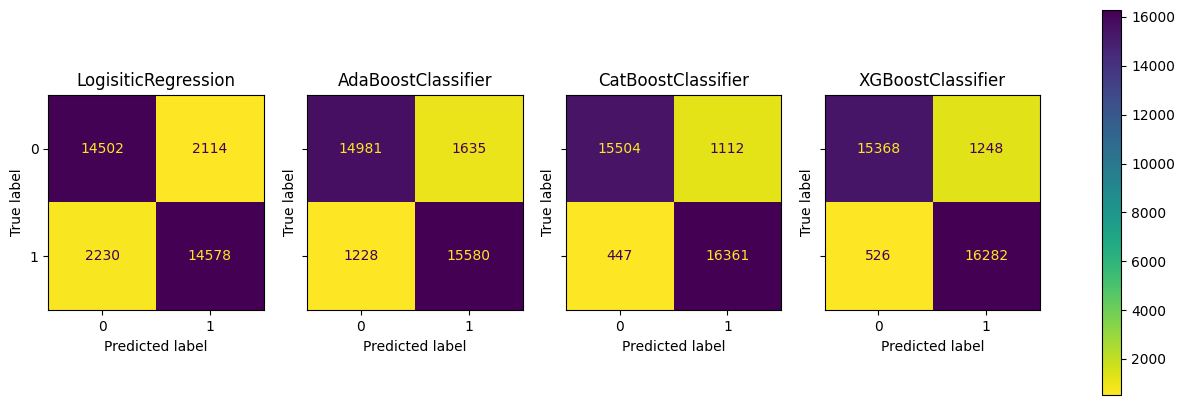

Model  F1_Score  Accuracy  Type_1_Error  Type_2_Error
0  LogisiticRegression  0.870328  0.870034        13.267        12.723
1   AdaBoostClassifier  0.915851  0.914343         7.306         9.840
2   CatBoostClassifier  0.954523  0.953357         2.659         6.692
3    XGBoostClassifier  0.948337  0.946924         3.129         7.511

In [47]:
# OWN CONTRIBUTION
ROS_model = train_models(x_res,y_res)
ROS_model

### 2. SMOTE :

In [48]:
# OWN CONTRIBUTION
# define ros class :-
x,y = SplitFeaturesTarged(df)

ros = SMOTE()
print('Resampled dataset shape %s' % Counter(y))
x_res, y_res = ros.fit_resample(x,y)
print('Resampled dataset shape %s' % Counter(y_res))

resampling_tech.extend([ros, ros, ros, ros])

Resampled dataset shape Counter({0: 83559, 1: 7215})
Resampled dataset shape Counter({0: 83559, 1: 83559})


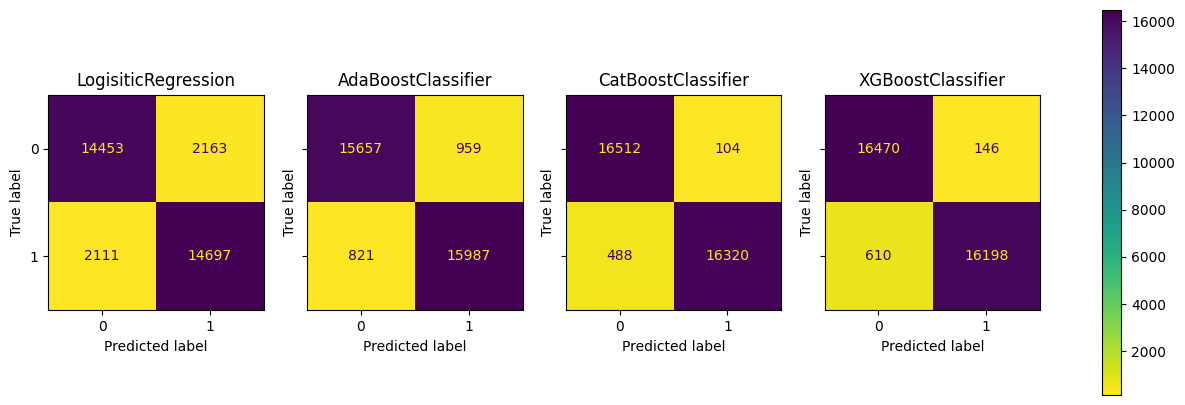

Model  F1_Score  Accuracy  Type_1_Error  Type_2_Error
0  LogisiticRegression  0.873055  0.872128        12.559        13.018
1   AdaBoostClassifier  0.947266  0.946745         4.885         5.772
2   CatBoostClassifier  0.982186  0.982288         2.903         0.626
3    XGBoostClassifier  0.977196  0.977382         3.629         0.879

In [49]:
# OWN CONTRIBUTION
SMOTE_model = train_models(x_res,y_res)
SMOTE_model

### Combined Oversampling with Downsampling Techniques :-

### 1. SMOTETomek

In [50]:
# OWN CONTRIBUTION
x,y = SplitFeaturesTarged(df)

ros = SMOTETomek()
print('Resampled dataset shape %s' % Counter(y))
x_res, y_res = ros.fit_resample(x,y)
print('Resampled dataset shape %s' % Counter(y_res))

resampling_tech.extend([ros, ros, ros, ros])

Resampled dataset shape Counter({0: 83559, 1: 7215})
Resampled dataset shape Counter({0: 82881, 1: 82881})


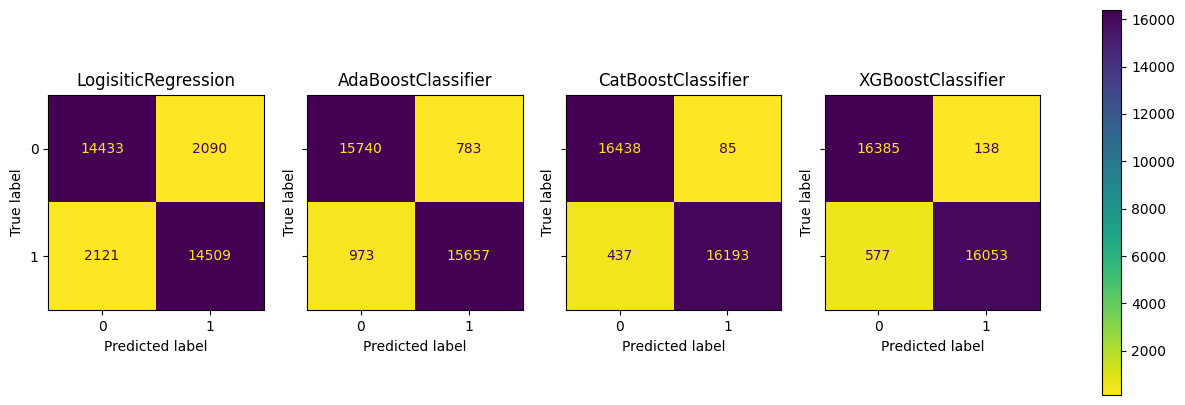

Model  F1_Score  Accuracy  Type_1_Error  Type_2_Error
0  LogisiticRegression  0.873273  0.872983        12.754        12.649
1   AdaBoostClassifier  0.946901  0.947033         5.851         4.739
2   CatBoostClassifier  0.984138  0.984255         2.628         0.514
3    XGBoostClassifier  0.978215  0.978433         3.470         0.835

In [51]:
# OWN CONTRIBUTION
SMOTETomek_model = train_models(x_res,y_res)
SMOTETomek_model

### 2. SMOTEEEN

In [52]:
# OWN CONTRIBUTION
x,y = SplitFeaturesTarged(df)

ros = SMOTEENN()
print('Resampled dataset shape %s' % Counter(y))
x_res, y_res = ros.fit_resample(x,y)
print('Resampled dataset shape %s' % Counter(y_res))

resampling_tech.extend([ros, ros, ros, ros])

Resampled dataset shape Counter({0: 83559, 1: 7215})
Resampled dataset shape Counter({1: 76932, 0: 74861})


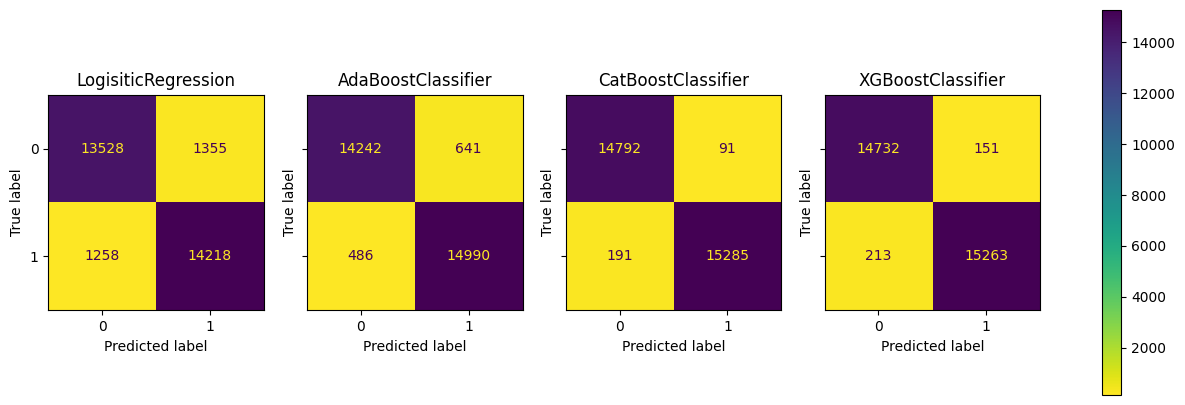

Model  F1_Score  Accuracy  Type_1_Error  Type_2_Error
0  LogisiticRegression  0.915843  0.913930         8.129         9.104
1   AdaBoostClassifier  0.963770  0.962878         3.140         4.307
2   CatBoostClassifier  0.990860  0.990711         1.234         0.611
3    XGBoostClassifier  0.988216  0.988010         1.376         1.015

In [53]:
# OWN CONTRIBUTION
SMOTEENN_model = train_models(x_res,y_res)
SMOTEENN_model

<a id="Visualizing-Results"></a>
## Visualizing Results :

In [54]:
# OWN CONTRIBUTION (Showcasing all of the results I stored in the table)

class_report = pd.DataFrame(list(zip(resampling_tech, models, f1_score, accuracy, type_1_error, type_2_error)),
                            columns = ['resampling_tech', 'model', 'f1_score', 'accuracy', 'type_1_error', 'type_2_error'])
   
class_report['model'] = class_report['model'].astype('str')
class_report['resampling_tech'] = class_report['resampling_tech'].astype('str')


class_report

resampling_tech                model  f1_score  accuracy  \
0        RandomUnderSampler()  LogisiticRegression  0.700826  0.960121   
1        RandomUnderSampler()   AdaBoostClassifier  0.803761  0.973561   
2        RandomUnderSampler()   CatBoostClassifier  0.805488  0.973451   
3        RandomUnderSampler()    XGBoostClassifier  0.800965  0.972735   
4                TomekLinks()  LogisiticRegression  0.873016  0.872488   
5                TomekLinks()   AdaBoostClassifier  0.903405  0.903673   
6                TomekLinks()   CatBoostClassifier  0.900172  0.899168   
7                TomekLinks()    XGBoostClassifier  0.890803  0.890159   
8   EditedNearestNeighbours()  LogisiticRegression  0.693758  0.959262   
9   EditedNearestNeighbours()   AdaBoostClassifier  0.802632  0.973250   
10  EditedNearestNeighbours()   CatBoostClassifier  0.798538  0.972358   
11  EditedNearestNeighbours()    XGBoostClassifier  0.800000  0.972581   
12        RandomOverSampler()  LogisiticRegression  0.734499  0.960860   
13        RandomOverSampler()   AdaBoostClassifier  0.820493  0.973106   
14        RandomOverSampler()   CatBoostClassifier  0.833206  0.974454   
15        RandomOverSampler()    XGBoostClassifier  0.833207  0.974219   
16                    SMOTE()  LogisiticRegression  0.870328  0.870034   
17                    SMOTE()   AdaBoostClassifier  0.915851  0.914343   
18                    SMOTE()   CatBoostClassifier  0.954523  0.953357   
19                    SMOTE()    XGBoostClassifier  0.948337  0.946924   
20               SMOTETomek()  LogisiticRegression  0.873055  0.872128   
21               SMOTETomek()   AdaBoostClassifier  0.947266  0.946745   
22               SMOTETomek()   CatBoostClassifier  0.982186  0.982288   
23               SMOTETomek()    XGBoostClassifier  0.977196  0.977382   
24                 SMOTEENN()  LogisiticRegression  0.873273  0.872983   
25                 SMOTEENN()   AdaBoostClassifier  0.946901  0.947033   
26                 SMOTEENN()   CatBoostClassifier  0.984138  0.984255   
27                 SMOTEENN()    XGBoostClassifier  0.978215  0.978433   

    type_1_error  type_2_error  
0         41.558         0.724  
1         32.254         0.072  
2         31.220         0.174  
3         31.358         0.239  
4         11.908        13.586  
5          9.471         9.793  
6          8.635        11.517  
7          9.958        12.000  
8         41.854         0.817  
9         31.461         0.194  
10        30.969         0.333  
11        30.899         0.315  
12        36.712         0.846  
13        28.151         0.308  
14        25.411         0.416  
15        24.726         0.506  
16        13.267        12.723  
17         7.306         9.840  
18         2.659         6.692  
19         3.129         7.511  
20        12.559        13.018  
21         4.885         5.772  
22         2.903         0.626  
23         3.629         0.879  
24        12.754        12.649  
25         5.851         4.739  
26         2.628         0.514  
27         3.470         0.835

In [55]:
# OWN CONTRIBUTION (Sorting by F1 score)

class_report_sort = class_report.sort_values('f1_score', ascending = False).reset_index(drop=True)
class_report_sort

resampling_tech                model  f1_score  accuracy  \
0                  SMOTEENN()   CatBoostClassifier  0.984138  0.984255   
1                SMOTETomek()   CatBoostClassifier  0.982186  0.982288   
2                  SMOTEENN()    XGBoostClassifier  0.978215  0.978433   
3                SMOTETomek()    XGBoostClassifier  0.977196  0.977382   
4                     SMOTE()   CatBoostClassifier  0.954523  0.953357   
5                     SMOTE()    XGBoostClassifier  0.948337  0.946924   
6                SMOTETomek()   AdaBoostClassifier  0.947266  0.946745   
7                  SMOTEENN()   AdaBoostClassifier  0.946901  0.947033   
8                     SMOTE()   AdaBoostClassifier  0.915851  0.914343   
9                TomekLinks()   AdaBoostClassifier  0.903405  0.903673   
10               TomekLinks()   CatBoostClassifier  0.900172  0.899168   
11               TomekLinks()    XGBoostClassifier  0.890803  0.890159   
12                 SMOTEENN()  LogisiticRegression  0.873273  0.872983   
13               SMOTETomek()  LogisiticRegression  0.873055  0.872128   
14               TomekLinks()  LogisiticRegression  0.873016  0.872488   
15                    SMOTE()  LogisiticRegression  0.870328  0.870034   
16        RandomOverSampler()    XGBoostClassifier  0.833207  0.974219   
17        RandomOverSampler()   CatBoostClassifier  0.833206  0.974454   
18        RandomOverSampler()   AdaBoostClassifier  0.820493  0.973106   
19       RandomUnderSampler()   CatBoostClassifier  0.805488  0.973451   
20       RandomUnderSampler()   AdaBoostClassifier  0.803761  0.973561   
21  EditedNearestNeighbours()   AdaBoostClassifier  0.802632  0.973250   
22       RandomUnderSampler()    XGBoostClassifier  0.800965  0.972735   
23  EditedNearestNeighbours()    XGBoostClassifier  0.800000  0.972581   
24  EditedNearestNeighbours()   CatBoostClassifier  0.798538  0.972358   
25        RandomOverSampler()  LogisiticRegression  0.734499  0.960860   
26       RandomUnderSampler()  LogisiticRegression  0.700826  0.960121   
27  EditedNearestNeighbours()  LogisiticRegression  0.693758  0.959262   

    type_1_error  type_2_error  
0          2.628         0.514  
1          2.903         0.626  
2          3.470         0.835  
3          3.629         0.879  
4          2.659         6.692  
5          3.129         7.511  
6          4.885         5.772  
7          5.851         4.739  
8          7.306         9.840  
9          9.471         9.793  
10         8.635        11.517  
11         9.958        12.000  
12        12.754        12.649  
13        12.559        13.018  
14        11.908        13.586  
15        13.267        12.723  
16        24.726         0.506  
17        25.411         0.416  
18        28.151         0.308  
19        31.220         0.174  
20        32.254         0.072  
21        31.461         0.194  
22        31.358         0.239  
23        30.899         0.315  
24        30.969         0.333  
25        36.712         0.846  
26        41.558         0.724  
27        41.854         0.817

In [56]:
class_report_individual = [class_report[class_report['model'] == model_name].reset_index(drop = True) for model_name in class_report['model'].unique()]

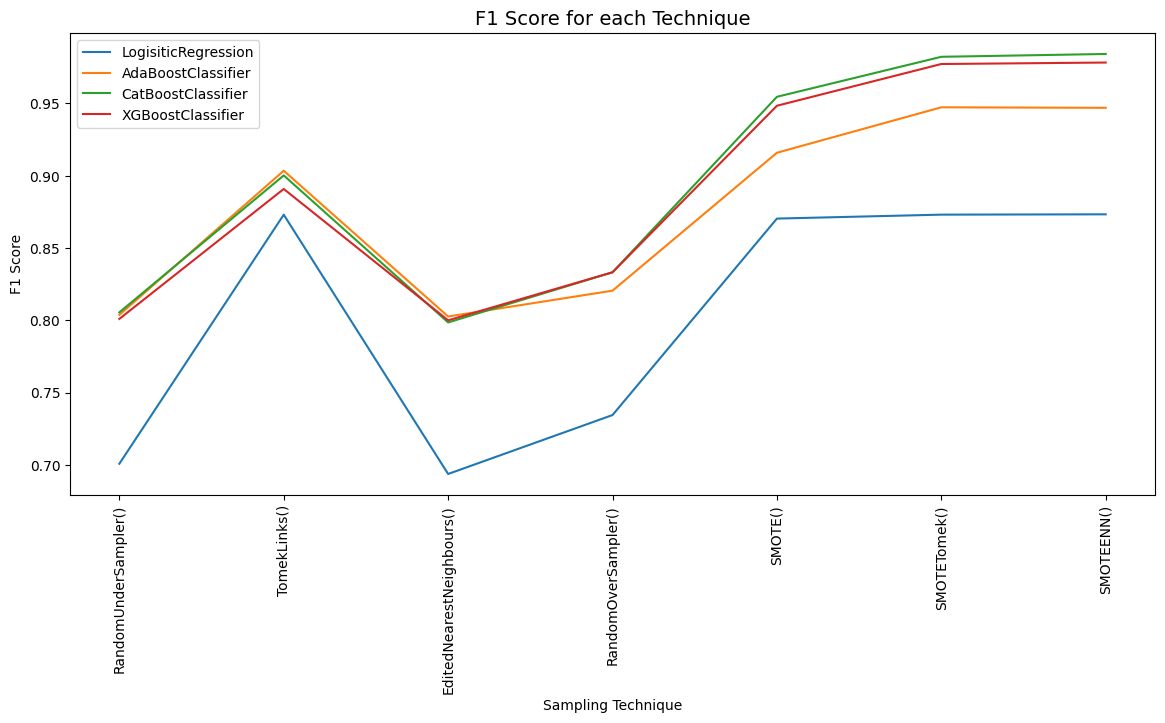

In [57]:
# OWN CONTRIBUTION (Graph Visualization of F1 score)

plt.figure(figsize=[14,6])

labels = [i for i in class_report['resampling_tech'].unique()]

for i in class_report_individual:
    plt.plot(i['f1_score'], label = i['model'][0])

plt.xticks(list(np.arange(7)),labels, rotation = 90)
plt.title('F1 Score for each Technique', size = 14)
plt.xlabel("Sampling Technique")
plt.ylabel("F1 Score")
plt.legend()

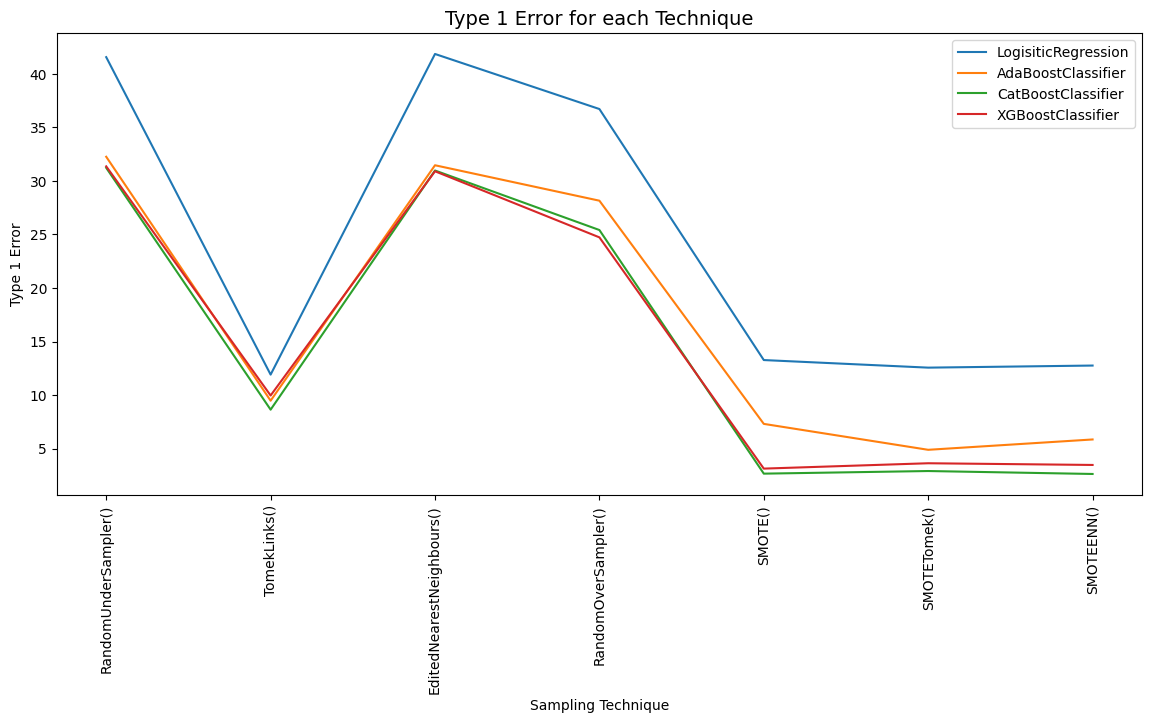

In [64]:
# OWN CONTRIBUTION (Graph Visualization of Type 1 Error)
plt.figure(figsize=[14,6])

labels = [i for i in class_report['resampling_tech'].unique()]

for i in class_report_individual:
    plt.plot(i['type_1_error'], label = i['model'][0])

plt.xticks(list(np.arange(7)),labels, rotation = 90)
plt.title('Type 1 Error for each Technique', size = 14)
plt.xlabel("Sampling Technique")
plt.ylabel("Type 1 Error")
plt.legend()

## Hyperparameter Tuning

In [59]:
# OWN CONTRIBUTION (Tuned parameters for SMOTE-EEN based CatBoost model)

x,y = SplitFeaturesTarged(df)

ros = SMOTEENN()
print('Resampled dataset shape %s' % Counter(y))
x_res, y_res = ros.fit_resample(x,y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 83559, 1: 7215})
Resampled dataset shape Counter({1: 76897, 0: 74862})


In [60]:
# OWN CONTRIBUTION (Setting parameters and then outputting the best result)


from catboost import CatBoostClassifier, Pool

# Create a CatBoost pool
train_pool = Pool(x_res, y_res)

# Create a CatBoost classifier
catboost_classifier = CatBoostClassifier()

params_distribution = {
    'learning_rate': stats.uniform(0.01, 0.1),
    'depth': list(range(3, 10)),
    'l2_leaf_reg': stats.uniform(1, 10),
    'boosting_type': ['Ordered', 'Plain'],
}

random_search_model = CatBoostClassifier()
random_search_result = random_search_model.randomized_search(
    params_distribution, 
    train_pool, 
    n_iter=20, 
    verbose=5, 
    partition_random_seed=123)

random_search_result['params']

0:	learn: 0.6211111	test: 0.6214470	best: 0.6214470 (0)	total: 65.8ms	remaining: 1m 5s
1:	learn: 0.5562848	test: 0.5570955	best: 0.5570955 (1)	total: 119ms	remaining: 59.3s
2:	learn: 0.4940485	test: 0.4950924	best: 0.4950924 (2)	total: 167ms	remaining: 55.4s
3:	learn: 0.4383578	test: 0.4398918	best: 0.4398918 (3)	total: 214ms	remaining: 53.3s
4:	learn: 0.3891690	test: 0.3910211	best: 0.3910211 (4)	total: 264ms	remaining: 52.6s
5:	learn: 0.3588731	test: 0.3610146	best: 0.3610146 (5)	total: 318ms	remaining: 52.7s
6:	learn: 0.3338536	test: 0.3359838	best: 0.3359838 (6)	total: 376ms	remaining: 53.3s
7:	learn: 0.3097438	test: 0.3121171	best: 0.3121171 (7)	total: 435ms	remaining: 53.9s
8:	learn: 0.2877890	test: 0.2901907	best: 0.2901907 (8)	total: 484ms	remaining: 53.3s
9:	learn: 0.2693001	test: 0.2717096	best: 0.2717096 (9)	total: 532ms	remaining: 52.7s
10:	learn: 0.2547795	test: 0.2572462	best: 0.2572462 (10)	total: 582ms	remaining: 52.3s
11:	learn: 0.2417436	test: 0.2442036	best: 0.244203

94:	learn: 0.0985719	test: 0.0993785	best: 0.0993785 (94)	total: 5.04s	remaining: 48s
95:	learn: 0.0980335	test: 0.0988728	best: 0.0988728 (95)	total: 5.1s	remaining: 48s
96:	learn: 0.0976247	test: 0.0984788	best: 0.0984788 (96)	total: 5.15s	remaining: 47.9s
97:	learn: 0.0974466	test: 0.0982950	best: 0.0982950 (97)	total: 5.2s	remaining: 47.9s
98:	learn: 0.0973012	test: 0.0981614	best: 0.0981614 (98)	total: 5.25s	remaining: 47.8s
99:	learn: 0.0971528	test: 0.0980198	best: 0.0980198 (99)	total: 5.3s	remaining: 47.7s
100:	learn: 0.0958859	test: 0.0967409	best: 0.0967409 (100)	total: 5.36s	remaining: 47.7s
101:	learn: 0.0954955	test: 0.0963546	best: 0.0963546 (101)	total: 5.42s	remaining: 47.7s
102:	learn: 0.0952673	test: 0.0961533	best: 0.0961533 (102)	total: 5.47s	remaining: 47.7s
103:	learn: 0.0951314	test: 0.0960136	best: 0.0960136 (103)	total: 5.52s	remaining: 47.6s
104:	learn: 0.0950049	test: 0.0958819	best: 0.0958819 (104)	total: 5.56s	remaining: 47.4s
105:	learn: 0.0943740	test: 0

186:	learn: 0.0628453	test: 0.0630679	best: 0.0630679 (186)	total: 9.7s	remaining: 42.2s
187:	learn: 0.0622930	test: 0.0625553	best: 0.0625553 (187)	total: 9.76s	remaining: 42.1s
188:	learn: 0.0622618	test: 0.0625244	best: 0.0625244 (188)	total: 9.8s	remaining: 42s
189:	learn: 0.0622194	test: 0.0624879	best: 0.0624879 (189)	total: 9.83s	remaining: 41.9s
190:	learn: 0.0618622	test: 0.0621263	best: 0.0621263 (190)	total: 9.88s	remaining: 41.9s
191:	learn: 0.0617935	test: 0.0620636	best: 0.0620636 (191)	total: 9.93s	remaining: 41.8s
192:	learn: 0.0614145	test: 0.0616345	best: 0.0616345 (192)	total: 9.98s	remaining: 41.8s
193:	learn: 0.0613082	test: 0.0615318	best: 0.0615318 (193)	total: 10s	remaining: 41.7s
194:	learn: 0.0608009	test: 0.0610409	best: 0.0610409 (194)	total: 10.1s	remaining: 41.6s
195:	learn: 0.0607646	test: 0.0610027	best: 0.0610027 (195)	total: 10.1s	remaining: 41.5s
196:	learn: 0.0607074	test: 0.0609485	best: 0.0609485 (196)	total: 10.2s	remaining: 41.4s
197:	learn: 0.06

278:	learn: 0.0503845	test: 0.0505233	best: 0.0505233 (278)	total: 14.2s	remaining: 36.7s
279:	learn: 0.0502787	test: 0.0503552	best: 0.0503552 (279)	total: 14.2s	remaining: 36.6s
280:	learn: 0.0501317	test: 0.0502072	best: 0.0502072 (280)	total: 14.3s	remaining: 36.6s
281:	learn: 0.0501117	test: 0.0501893	best: 0.0501893 (281)	total: 14.3s	remaining: 36.5s
282:	learn: 0.0500677	test: 0.0501472	best: 0.0501472 (282)	total: 14.4s	remaining: 36.4s
283:	learn: 0.0499582	test: 0.0500289	best: 0.0500289 (283)	total: 14.4s	remaining: 36.4s
284:	learn: 0.0498748	test: 0.0499388	best: 0.0499388 (284)	total: 14.5s	remaining: 36.4s
285:	learn: 0.0497407	test: 0.0497971	best: 0.0497971 (285)	total: 14.6s	remaining: 36.3s
286:	learn: 0.0495607	test: 0.0495852	best: 0.0495852 (286)	total: 14.6s	remaining: 36.3s
287:	learn: 0.0494555	test: 0.0494784	best: 0.0494784 (287)	total: 14.7s	remaining: 36.3s
288:	learn: 0.0493219	test: 0.0493520	best: 0.0493520 (288)	total: 14.7s	remaining: 36.2s
289:	learn

371:	learn: 0.0437975	test: 0.0436058	best: 0.0436058 (371)	total: 19s	remaining: 32s
372:	learn: 0.0437370	test: 0.0435470	best: 0.0435470 (372)	total: 19s	remaining: 32s
373:	learn: 0.0436693	test: 0.0434788	best: 0.0434788 (373)	total: 19.1s	remaining: 31.9s
374:	learn: 0.0435879	test: 0.0433999	best: 0.0433999 (374)	total: 19.1s	remaining: 31.8s
375:	learn: 0.0435681	test: 0.0433851	best: 0.0433851 (375)	total: 19.2s	remaining: 31.8s
376:	learn: 0.0434985	test: 0.0433176	best: 0.0433176 (376)	total: 19.2s	remaining: 31.7s
377:	learn: 0.0434460	test: 0.0432667	best: 0.0432667 (377)	total: 19.3s	remaining: 31.7s
378:	learn: 0.0434296	test: 0.0432530	best: 0.0432530 (378)	total: 19.3s	remaining: 31.6s
379:	learn: 0.0433752	test: 0.0431810	best: 0.0431810 (379)	total: 19.3s	remaining: 31.6s
380:	learn: 0.0433427	test: 0.0431267	best: 0.0431267 (380)	total: 19.4s	remaining: 31.5s
381:	learn: 0.0432967	test: 0.0430644	best: 0.0430644 (381)	total: 19.5s	remaining: 31.5s
382:	learn: 0.0432

466:	learn: 0.0401391	test: 0.0399474	best: 0.0399474 (466)	total: 23.8s	remaining: 27.1s
467:	learn: 0.0401313	test: 0.0399404	best: 0.0399404 (467)	total: 23.8s	remaining: 27.1s
468:	learn: 0.0401022	test: 0.0399120	best: 0.0399120 (468)	total: 23.9s	remaining: 27.1s
469:	learn: 0.0400941	test: 0.0399060	best: 0.0399060 (469)	total: 24s	remaining: 27s
470:	learn: 0.0400798	test: 0.0398989	best: 0.0398989 (470)	total: 24s	remaining: 27s
471:	learn: 0.0400690	test: 0.0398937	best: 0.0398937 (471)	total: 24.1s	remaining: 26.9s
472:	learn: 0.0400631	test: 0.0398882	best: 0.0398882 (472)	total: 24.1s	remaining: 26.9s
473:	learn: 0.0400552	test: 0.0398832	best: 0.0398832 (473)	total: 24.1s	remaining: 26.8s
474:	learn: 0.0400425	test: 0.0398769	best: 0.0398769 (474)	total: 24.2s	remaining: 26.7s
475:	learn: 0.0400309	test: 0.0398635	best: 0.0398635 (475)	total: 24.2s	remaining: 26.7s
476:	learn: 0.0399674	test: 0.0398047	best: 0.0398047 (476)	total: 24.3s	remaining: 26.6s
477:	learn: 0.0399

561:	learn: 0.0387276	test: 0.0386305	best: 0.0386305 (561)	total: 28.3s	remaining: 22s
562:	learn: 0.0387243	test: 0.0386305	best: 0.0386305 (562)	total: 28.3s	remaining: 22s
563:	learn: 0.0387073	test: 0.0386108	best: 0.0386108 (563)	total: 28.4s	remaining: 21.9s
564:	learn: 0.0387009	test: 0.0386040	best: 0.0386040 (564)	total: 28.4s	remaining: 21.9s
565:	learn: 0.0386895	test: 0.0385908	best: 0.0385908 (565)	total: 28.5s	remaining: 21.8s
566:	learn: 0.0386856	test: 0.0385905	best: 0.0385905 (566)	total: 28.5s	remaining: 21.8s
567:	learn: 0.0386445	test: 0.0385466	best: 0.0385466 (567)	total: 28.5s	remaining: 21.7s
568:	learn: 0.0386423	test: 0.0385448	best: 0.0385448 (568)	total: 28.6s	remaining: 21.7s
569:	learn: 0.0386371	test: 0.0385406	best: 0.0385406 (569)	total: 28.6s	remaining: 21.6s
570:	learn: 0.0386317	test: 0.0385331	best: 0.0385331 (570)	total: 28.7s	remaining: 21.6s
571:	learn: 0.0386299	test: 0.0385327	best: 0.0385327 (571)	total: 28.8s	remaining: 21.5s
572:	learn: 0.

653:	learn: 0.0376685	test: 0.0376604	best: 0.0376604 (653)	total: 32.5s	remaining: 17.2s
654:	learn: 0.0376685	test: 0.0376604	best: 0.0376604 (653)	total: 32.5s	remaining: 17.1s
655:	learn: 0.0376629	test: 0.0376547	best: 0.0376547 (655)	total: 32.5s	remaining: 17.1s
656:	learn: 0.0376449	test: 0.0376364	best: 0.0376364 (656)	total: 32.6s	remaining: 17s
657:	learn: 0.0376356	test: 0.0376309	best: 0.0376309 (657)	total: 32.6s	remaining: 17s
658:	learn: 0.0376356	test: 0.0376309	best: 0.0376309 (658)	total: 32.7s	remaining: 16.9s
659:	learn: 0.0376331	test: 0.0376294	best: 0.0376294 (659)	total: 32.7s	remaining: 16.8s
660:	learn: 0.0376218	test: 0.0376180	best: 0.0376180 (660)	total: 32.7s	remaining: 16.8s
661:	learn: 0.0376164	test: 0.0376186	best: 0.0376180 (660)	total: 32.8s	remaining: 16.7s
662:	learn: 0.0376163	test: 0.0376186	best: 0.0376180 (660)	total: 32.8s	remaining: 16.7s
663:	learn: 0.0376163	test: 0.0376186	best: 0.0376180 (660)	total: 32.9s	remaining: 16.6s
664:	learn: 0.

749:	learn: 0.0370822	test: 0.0372112	best: 0.0372112 (749)	total: 36.4s	remaining: 12.1s
750:	learn: 0.0370755	test: 0.0372081	best: 0.0372081 (750)	total: 36.4s	remaining: 12.1s
751:	learn: 0.0370588	test: 0.0372010	best: 0.0372010 (751)	total: 36.5s	remaining: 12s
752:	learn: 0.0370433	test: 0.0371947	best: 0.0371947 (752)	total: 36.5s	remaining: 12s
753:	learn: 0.0370339	test: 0.0371834	best: 0.0371834 (753)	total: 36.6s	remaining: 11.9s
754:	learn: 0.0370277	test: 0.0371806	best: 0.0371806 (754)	total: 36.6s	remaining: 11.9s
755:	learn: 0.0370277	test: 0.0371806	best: 0.0371806 (755)	total: 36.6s	remaining: 11.8s
756:	learn: 0.0370195	test: 0.0371722	best: 0.0371722 (756)	total: 36.7s	remaining: 11.8s
757:	learn: 0.0370195	test: 0.0371722	best: 0.0371722 (757)	total: 36.7s	remaining: 11.7s
758:	learn: 0.0370046	test: 0.0371615	best: 0.0371615 (758)	total: 36.8s	remaining: 11.7s
759:	learn: 0.0369903	test: 0.0371560	best: 0.0371560 (759)	total: 36.8s	remaining: 11.6s
760:	learn: 0.

842:	learn: 0.0364018	test: 0.0365255	best: 0.0365255 (842)	total: 40.4s	remaining: 7.52s
843:	learn: 0.0363868	test: 0.0365101	best: 0.0365101 (843)	total: 40.4s	remaining: 7.47s
844:	learn: 0.0363800	test: 0.0365061	best: 0.0365061 (844)	total: 40.5s	remaining: 7.42s
845:	learn: 0.0363745	test: 0.0364988	best: 0.0364988 (845)	total: 40.5s	remaining: 7.38s
846:	learn: 0.0363745	test: 0.0364988	best: 0.0364988 (846)	total: 40.6s	remaining: 7.33s
847:	learn: 0.0363677	test: 0.0364918	best: 0.0364918 (847)	total: 40.6s	remaining: 7.28s
848:	learn: 0.0363626	test: 0.0364852	best: 0.0364852 (848)	total: 40.6s	remaining: 7.23s
849:	learn: 0.0363543	test: 0.0364777	best: 0.0364777 (849)	total: 40.7s	remaining: 7.18s
850:	learn: 0.0363486	test: 0.0364750	best: 0.0364750 (850)	total: 40.8s	remaining: 7.13s
851:	learn: 0.0363486	test: 0.0364750	best: 0.0364750 (851)	total: 40.8s	remaining: 7.08s
852:	learn: 0.0363431	test: 0.0364731	best: 0.0364731 (852)	total: 40.8s	remaining: 7.04s
853:	learn

936:	learn: 0.0358701	test: 0.0360846	best: 0.0360846 (936)	total: 44.6s	remaining: 3s
937:	learn: 0.0358701	test: 0.0360846	best: 0.0360846 (937)	total: 44.6s	remaining: 2.95s
938:	learn: 0.0358667	test: 0.0360813	best: 0.0360813 (938)	total: 44.6s	remaining: 2.9s
939:	learn: 0.0358604	test: 0.0360785	best: 0.0360785 (939)	total: 44.7s	remaining: 2.85s
940:	learn: 0.0358561	test: 0.0360783	best: 0.0360783 (940)	total: 44.7s	remaining: 2.8s
941:	learn: 0.0358532	test: 0.0360761	best: 0.0360761 (941)	total: 44.8s	remaining: 2.76s
942:	learn: 0.0358532	test: 0.0360761	best: 0.0360761 (941)	total: 44.8s	remaining: 2.71s
943:	learn: 0.0358473	test: 0.0360717	best: 0.0360717 (943)	total: 44.9s	remaining: 2.66s
944:	learn: 0.0358473	test: 0.0360717	best: 0.0360717 (943)	total: 44.9s	remaining: 2.61s
945:	learn: 0.0358443	test: 0.0360705	best: 0.0360705 (945)	total: 44.9s	remaining: 2.56s
946:	learn: 0.0358394	test: 0.0360653	best: 0.0360653 (946)	total: 45s	remaining: 2.52s
947:	learn: 0.035

27:	learn: 0.1058153	test: 0.1066395	best: 0.1066395 (27)	total: 1.56s	remaining: 54.3s
28:	learn: 0.1052263	test: 0.1059835	best: 0.1059835 (28)	total: 1.62s	remaining: 54.2s
29:	learn: 0.1042693	test: 0.1050024	best: 0.1050024 (29)	total: 1.68s	remaining: 54.2s
30:	learn: 0.1017086	test: 0.1024797	best: 0.1024797 (30)	total: 1.73s	remaining: 54.1s
31:	learn: 0.0990069	test: 0.0997783	best: 0.0997783 (31)	total: 1.78s	remaining: 54s
32:	learn: 0.0972670	test: 0.0980801	best: 0.0980801 (32)	total: 1.84s	remaining: 53.8s
33:	learn: 0.0966251	test: 0.0974528	best: 0.0974528 (33)	total: 1.89s	remaining: 53.8s
34:	learn: 0.0961042	test: 0.0969582	best: 0.0969582 (34)	total: 1.95s	remaining: 53.6s
35:	learn: 0.0941554	test: 0.0950057	best: 0.0950057 (35)	total: 2s	remaining: 53.6s
36:	learn: 0.0933516	test: 0.0941883	best: 0.0941883 (36)	total: 2.06s	remaining: 53.6s
37:	learn: 0.0912628	test: 0.0921015	best: 0.0921015 (37)	total: 2.11s	remaining: 53.5s
38:	learn: 0.0890083	test: 0.0896717	

121:	learn: 0.0465797	test: 0.0467222	best: 0.0467222 (121)	total: 7.03s	remaining: 50.6s
122:	learn: 0.0465078	test: 0.0466534	best: 0.0466534 (122)	total: 7.08s	remaining: 50.5s
123:	learn: 0.0461578	test: 0.0462919	best: 0.0462919 (123)	total: 7.14s	remaining: 50.4s
124:	learn: 0.0460471	test: 0.0461921	best: 0.0461921 (124)	total: 7.2s	remaining: 50.4s
125:	learn: 0.0457963	test: 0.0459327	best: 0.0459327 (125)	total: 7.26s	remaining: 50.3s
126:	learn: 0.0455373	test: 0.0456596	best: 0.0456596 (126)	total: 7.32s	remaining: 50.3s
127:	learn: 0.0454369	test: 0.0455595	best: 0.0455595 (127)	total: 7.37s	remaining: 50.2s
128:	learn: 0.0453470	test: 0.0454782	best: 0.0454782 (128)	total: 7.43s	remaining: 50.2s
129:	learn: 0.0450984	test: 0.0452384	best: 0.0452384 (129)	total: 7.5s	remaining: 50.2s
130:	learn: 0.0450512	test: 0.0451889	best: 0.0451889 (130)	total: 7.57s	remaining: 50.2s
131:	learn: 0.0450037	test: 0.0451350	best: 0.0451350 (131)	total: 7.64s	remaining: 50.3s
132:	learn: 

215:	learn: 0.0380380	test: 0.0383055	best: 0.0383055 (215)	total: 12.3s	remaining: 44.7s
216:	learn: 0.0379698	test: 0.0382214	best: 0.0382214 (216)	total: 12.4s	remaining: 44.6s
217:	learn: 0.0379242	test: 0.0381745	best: 0.0381745 (217)	total: 12.4s	remaining: 44.5s
218:	learn: 0.0378940	test: 0.0381466	best: 0.0381466 (218)	total: 12.5s	remaining: 44.5s
219:	learn: 0.0378101	test: 0.0380449	best: 0.0380449 (219)	total: 12.5s	remaining: 44.4s
220:	learn: 0.0378015	test: 0.0380377	best: 0.0380377 (220)	total: 12.6s	remaining: 44.3s
221:	learn: 0.0377896	test: 0.0380260	best: 0.0380260 (221)	total: 12.6s	remaining: 44.2s
222:	learn: 0.0377851	test: 0.0380213	best: 0.0380213 (222)	total: 12.7s	remaining: 44.2s
223:	learn: 0.0377651	test: 0.0380018	best: 0.0380018 (223)	total: 12.7s	remaining: 44.1s
224:	learn: 0.0377604	test: 0.0379960	best: 0.0379960 (224)	total: 12.8s	remaining: 44s
225:	learn: 0.0377232	test: 0.0379898	best: 0.0379898 (225)	total: 12.8s	remaining: 43.9s
226:	learn: 

311:	learn: 0.0357132	test: 0.0362436	best: 0.0362436 (311)	total: 17.1s	remaining: 37.6s
312:	learn: 0.0356779	test: 0.0362252	best: 0.0362252 (312)	total: 17.1s	remaining: 37.6s
313:	learn: 0.0356543	test: 0.0362020	best: 0.0362020 (313)	total: 17.2s	remaining: 37.5s
314:	learn: 0.0356371	test: 0.0361972	best: 0.0361972 (314)	total: 17.2s	remaining: 37.5s
315:	learn: 0.0356247	test: 0.0361835	best: 0.0361835 (315)	total: 17.3s	remaining: 37.4s
316:	learn: 0.0356247	test: 0.0361834	best: 0.0361834 (316)	total: 17.3s	remaining: 37.3s
317:	learn: 0.0356247	test: 0.0361833	best: 0.0361833 (317)	total: 17.4s	remaining: 37.2s
318:	learn: 0.0356247	test: 0.0361833	best: 0.0361833 (318)	total: 17.4s	remaining: 37.1s
319:	learn: 0.0356246	test: 0.0361833	best: 0.0361833 (319)	total: 17.4s	remaining: 37s
320:	learn: 0.0355922	test: 0.0361567	best: 0.0361567 (320)	total: 17.5s	remaining: 37s
321:	learn: 0.0355908	test: 0.0361563	best: 0.0361563 (321)	total: 17.5s	remaining: 36.9s
322:	learn: 0.

405:	learn: 0.0342201	test: 0.0350924	best: 0.0350924 (404)	total: 21.8s	remaining: 31.9s
406:	learn: 0.0342201	test: 0.0350924	best: 0.0350924 (404)	total: 21.9s	remaining: 31.9s
407:	learn: 0.0342104	test: 0.0350868	best: 0.0350868 (407)	total: 21.9s	remaining: 31.8s
408:	learn: 0.0341860	test: 0.0350771	best: 0.0350771 (408)	total: 22s	remaining: 31.8s
409:	learn: 0.0341828	test: 0.0350762	best: 0.0350762 (409)	total: 22s	remaining: 31.7s
410:	learn: 0.0341747	test: 0.0350717	best: 0.0350717 (410)	total: 22.1s	remaining: 31.7s
411:	learn: 0.0341490	test: 0.0350242	best: 0.0350242 (411)	total: 22.2s	remaining: 31.7s
412:	learn: 0.0341461	test: 0.0350236	best: 0.0350236 (412)	total: 22.2s	remaining: 31.6s
413:	learn: 0.0341461	test: 0.0350236	best: 0.0350236 (412)	total: 22.3s	remaining: 31.6s
414:	learn: 0.0341461	test: 0.0350236	best: 0.0350236 (414)	total: 22.3s	remaining: 31.5s
415:	learn: 0.0341461	test: 0.0350236	best: 0.0350236 (414)	total: 22.4s	remaining: 31.4s
416:	learn: 0.

499:	learn: 0.0336380	test: 0.0347215	best: 0.0347215 (499)	total: 26.2s	remaining: 26.2s
500:	learn: 0.0336294	test: 0.0347193	best: 0.0347193 (500)	total: 26.3s	remaining: 26.1s
501:	learn: 0.0336175	test: 0.0347196	best: 0.0347193 (500)	total: 26.3s	remaining: 26.1s
502:	learn: 0.0335976	test: 0.0347069	best: 0.0347069 (502)	total: 26.4s	remaining: 26.1s
503:	learn: 0.0335798	test: 0.0346904	best: 0.0346904 (503)	total: 26.4s	remaining: 26s
504:	learn: 0.0335770	test: 0.0346923	best: 0.0346904 (503)	total: 26.5s	remaining: 26s
505:	learn: 0.0335571	test: 0.0346866	best: 0.0346866 (505)	total: 26.5s	remaining: 25.9s
506:	learn: 0.0335571	test: 0.0346866	best: 0.0346866 (505)	total: 26.6s	remaining: 25.8s
507:	learn: 0.0335571	test: 0.0346866	best: 0.0346866 (505)	total: 26.6s	remaining: 25.8s
508:	learn: 0.0335571	test: 0.0346866	best: 0.0346866 (508)	total: 26.7s	remaining: 25.7s
509:	learn: 0.0335571	test: 0.0346866	best: 0.0346866 (509)	total: 26.7s	remaining: 25.7s
510:	learn: 0.

594:	learn: 0.0331603	test: 0.0345415	best: 0.0345415 (594)	total: 30.7s	remaining: 20.9s
595:	learn: 0.0331603	test: 0.0345415	best: 0.0345415 (594)	total: 30.7s	remaining: 20.8s
596:	learn: 0.0331603	test: 0.0345415	best: 0.0345415 (596)	total: 30.7s	remaining: 20.8s
597:	learn: 0.0331593	test: 0.0345410	best: 0.0345410 (597)	total: 30.8s	remaining: 20.7s
598:	learn: 0.0331591	test: 0.0345410	best: 0.0345410 (597)	total: 30.8s	remaining: 20.6s
599:	learn: 0.0331412	test: 0.0345418	best: 0.0345410 (597)	total: 30.9s	remaining: 20.6s
600:	learn: 0.0331217	test: 0.0345248	best: 0.0345248 (600)	total: 30.9s	remaining: 20.5s
601:	learn: 0.0331114	test: 0.0345240	best: 0.0345240 (601)	total: 31s	remaining: 20.5s
602:	learn: 0.0331113	test: 0.0345239	best: 0.0345239 (602)	total: 31s	remaining: 20.4s
603:	learn: 0.0331105	test: 0.0345234	best: 0.0345234 (603)	total: 31.1s	remaining: 20.4s
604:	learn: 0.0331023	test: 0.0345172	best: 0.0345172 (604)	total: 31.1s	remaining: 20.3s
605:	learn: 0.

689:	learn: 0.0325725	test: 0.0343473	best: 0.0343424 (681)	total: 34.8s	remaining: 15.6s
690:	learn: 0.0325675	test: 0.0343468	best: 0.0343424 (681)	total: 34.9s	remaining: 15.6s
691:	learn: 0.0325674	test: 0.0343465	best: 0.0343424 (681)	total: 34.9s	remaining: 15.5s
692:	learn: 0.0325674	test: 0.0343465	best: 0.0343424 (681)	total: 35s	remaining: 15.5s
693:	learn: 0.0325674	test: 0.0343465	best: 0.0343424 (681)	total: 35s	remaining: 15.4s
694:	learn: 0.0325537	test: 0.0343247	best: 0.0343247 (694)	total: 35.1s	remaining: 15.4s
695:	learn: 0.0325537	test: 0.0343247	best: 0.0343247 (694)	total: 35.1s	remaining: 15.3s
696:	learn: 0.0325537	test: 0.0343247	best: 0.0343247 (694)	total: 35.1s	remaining: 15.3s
697:	learn: 0.0325537	test: 0.0343247	best: 0.0343247 (694)	total: 35.2s	remaining: 15.2s
698:	learn: 0.0325223	test: 0.0343133	best: 0.0343133 (698)	total: 35.3s	remaining: 15.2s
699:	learn: 0.0325223	test: 0.0343133	best: 0.0343133 (699)	total: 35.3s	remaining: 15.1s
700:	learn: 0.

785:	learn: 0.0321115	test: 0.0339780	best: 0.0339780 (785)	total: 39s	remaining: 10.6s
786:	learn: 0.0321115	test: 0.0339780	best: 0.0339780 (786)	total: 39s	remaining: 10.6s
787:	learn: 0.0321003	test: 0.0339633	best: 0.0339633 (787)	total: 39.1s	remaining: 10.5s
788:	learn: 0.0321002	test: 0.0339632	best: 0.0339632 (788)	total: 39.1s	remaining: 10.5s
789:	learn: 0.0321002	test: 0.0339632	best: 0.0339632 (789)	total: 39.1s	remaining: 10.4s
790:	learn: 0.0321001	test: 0.0339632	best: 0.0339632 (790)	total: 39.2s	remaining: 10.3s
791:	learn: 0.0321001	test: 0.0339632	best: 0.0339632 (791)	total: 39.2s	remaining: 10.3s
792:	learn: 0.0321001	test: 0.0339632	best: 0.0339632 (792)	total: 39.2s	remaining: 10.2s
793:	learn: 0.0321000	test: 0.0339632	best: 0.0339632 (793)	total: 39.3s	remaining: 10.2s
794:	learn: 0.0321000	test: 0.0339632	best: 0.0339632 (794)	total: 39.3s	remaining: 10.1s
795:	learn: 0.0321000	test: 0.0339632	best: 0.0339632 (795)	total: 39.4s	remaining: 10.1s
796:	learn: 0.

880:	learn: 0.0318192	test: 0.0338240	best: 0.0338240 (880)	total: 42.9s	remaining: 5.79s
881:	learn: 0.0318192	test: 0.0338240	best: 0.0338240 (881)	total: 42.9s	remaining: 5.74s
882:	learn: 0.0318149	test: 0.0338134	best: 0.0338134 (882)	total: 42.9s	remaining: 5.69s
883:	learn: 0.0318108	test: 0.0338084	best: 0.0338084 (883)	total: 43s	remaining: 5.64s
884:	learn: 0.0318108	test: 0.0338084	best: 0.0338084 (883)	total: 43s	remaining: 5.59s
885:	learn: 0.0318108	test: 0.0338084	best: 0.0338084 (883)	total: 43.1s	remaining: 5.54s
886:	learn: 0.0318108	test: 0.0338084	best: 0.0338084 (883)	total: 43.1s	remaining: 5.49s
887:	learn: 0.0318108	test: 0.0338084	best: 0.0338084 (883)	total: 43.1s	remaining: 5.44s
888:	learn: 0.0318107	test: 0.0338084	best: 0.0338084 (888)	total: 43.2s	remaining: 5.39s
889:	learn: 0.0317866	test: 0.0337822	best: 0.0337822 (889)	total: 43.2s	remaining: 5.34s
890:	learn: 0.0317827	test: 0.0337768	best: 0.0337768 (890)	total: 43.3s	remaining: 5.29s
891:	learn: 0.

977:	learn: 0.0317103	test: 0.0337196	best: 0.0337196 (972)	total: 46.4s	remaining: 1.04s
978:	learn: 0.0317103	test: 0.0337196	best: 0.0337196 (972)	total: 46.5s	remaining: 997ms
979:	learn: 0.0317103	test: 0.0337196	best: 0.0337196 (972)	total: 46.5s	remaining: 949ms
980:	learn: 0.0317103	test: 0.0337196	best: 0.0337196 (972)	total: 46.5s	remaining: 901ms
981:	learn: 0.0317103	test: 0.0337196	best: 0.0337196 (972)	total: 46.6s	remaining: 854ms
982:	learn: 0.0317103	test: 0.0337196	best: 0.0337196 (972)	total: 46.6s	remaining: 806ms
983:	learn: 0.0317103	test: 0.0337196	best: 0.0337196 (972)	total: 46.6s	remaining: 758ms
984:	learn: 0.0317103	test: 0.0337196	best: 0.0337196 (972)	total: 46.7s	remaining: 711ms
985:	learn: 0.0317103	test: 0.0337196	best: 0.0337196 (972)	total: 46.7s	remaining: 663ms
986:	learn: 0.0317103	test: 0.0337196	best: 0.0337196 (972)	total: 46.7s	remaining: 616ms
987:	learn: 0.0317103	test: 0.0337196	best: 0.0337196 (972)	total: 46.8s	remaining: 568ms
988:	learn

73:	learn: 0.1100864	test: 0.1111035	best: 0.1111035 (73)	total: 4.2s	remaining: 52.6s
74:	learn: 0.1091865	test: 0.1101890	best: 0.1101890 (74)	total: 4.26s	remaining: 52.6s
75:	learn: 0.1089415	test: 0.1099231	best: 0.1099231 (75)	total: 4.33s	remaining: 52.7s
76:	learn: 0.1084988	test: 0.1094786	best: 0.1094786 (76)	total: 4.39s	remaining: 52.6s
77:	learn: 0.1073932	test: 0.1083481	best: 0.1083481 (77)	total: 4.45s	remaining: 52.6s
78:	learn: 0.1065995	test: 0.1075680	best: 0.1075680 (78)	total: 4.53s	remaining: 52.9s
79:	learn: 0.1063239	test: 0.1072853	best: 0.1072853 (79)	total: 4.62s	remaining: 53.1s
80:	learn: 0.1051978	test: 0.1061701	best: 0.1061701 (80)	total: 4.69s	remaining: 53.2s
81:	learn: 0.1044883	test: 0.1054249	best: 0.1054249 (81)	total: 4.78s	remaining: 53.5s
82:	learn: 0.1041143	test: 0.1050484	best: 0.1050484 (82)	total: 4.86s	remaining: 53.7s
83:	learn: 0.1038707	test: 0.1047874	best: 0.1047874 (83)	total: 4.94s	remaining: 53.8s
84:	learn: 0.1035992	test: 0.1045

165:	learn: 0.0694050	test: 0.0701012	best: 0.0701012 (165)	total: 10.7s	remaining: 54s
166:	learn: 0.0690096	test: 0.0696783	best: 0.0696783 (166)	total: 10.8s	remaining: 53.9s
167:	learn: 0.0685435	test: 0.0691544	best: 0.0691544 (167)	total: 10.9s	remaining: 53.8s
168:	learn: 0.0684692	test: 0.0690814	best: 0.0690814 (168)	total: 10.9s	remaining: 53.7s
169:	learn: 0.0682452	test: 0.0688465	best: 0.0688465 (169)	total: 11s	remaining: 53.7s
170:	learn: 0.0679262	test: 0.0685514	best: 0.0685514 (170)	total: 11.1s	remaining: 53.6s
171:	learn: 0.0678493	test: 0.0684761	best: 0.0684761 (171)	total: 11.1s	remaining: 53.6s
172:	learn: 0.0676514	test: 0.0682537	best: 0.0682537 (172)	total: 11.2s	remaining: 53.5s
173:	learn: 0.0676159	test: 0.0682208	best: 0.0682208 (173)	total: 11.2s	remaining: 53.3s
174:	learn: 0.0673134	test: 0.0679324	best: 0.0679324 (174)	total: 11.3s	remaining: 53.2s
175:	learn: 0.0671600	test: 0.0677911	best: 0.0677911 (175)	total: 11.3s	remaining: 53.1s
176:	learn: 0.

257:	learn: 0.0523923	test: 0.0528539	best: 0.0528539 (257)	total: 16.2s	remaining: 46.5s
258:	learn: 0.0523676	test: 0.0528306	best: 0.0528306 (258)	total: 16.2s	remaining: 46.4s
259:	learn: 0.0523375	test: 0.0528125	best: 0.0528125 (259)	total: 16.3s	remaining: 46.4s
260:	learn: 0.0523028	test: 0.0527793	best: 0.0527793 (260)	total: 16.3s	remaining: 46.3s
261:	learn: 0.0521616	test: 0.0526358	best: 0.0526358 (261)	total: 16.4s	remaining: 46.2s
262:	learn: 0.0519871	test: 0.0524323	best: 0.0524323 (262)	total: 16.5s	remaining: 46.1s
263:	learn: 0.0517258	test: 0.0521728	best: 0.0521728 (263)	total: 16.5s	remaining: 46.1s
264:	learn: 0.0515229	test: 0.0519782	best: 0.0519782 (264)	total: 16.6s	remaining: 46s
265:	learn: 0.0514376	test: 0.0518969	best: 0.0518969 (265)	total: 16.6s	remaining: 45.9s
266:	learn: 0.0513506	test: 0.0518079	best: 0.0518079 (266)	total: 16.7s	remaining: 45.8s
267:	learn: 0.0511544	test: 0.0515653	best: 0.0515653 (267)	total: 16.8s	remaining: 45.8s
268:	learn: 

350:	learn: 0.0451737	test: 0.0454586	best: 0.0454586 (350)	total: 21.6s	remaining: 39.9s
351:	learn: 0.0451478	test: 0.0454334	best: 0.0454334 (351)	total: 21.6s	remaining: 39.8s
352:	learn: 0.0450530	test: 0.0453103	best: 0.0453103 (352)	total: 21.7s	remaining: 39.7s
353:	learn: 0.0450196	test: 0.0452841	best: 0.0452841 (353)	total: 21.7s	remaining: 39.7s
354:	learn: 0.0450032	test: 0.0452693	best: 0.0452693 (354)	total: 21.8s	remaining: 39.6s
355:	learn: 0.0449720	test: 0.0452397	best: 0.0452397 (355)	total: 21.9s	remaining: 39.5s
356:	learn: 0.0449094	test: 0.0451733	best: 0.0451733 (356)	total: 21.9s	remaining: 39.5s
357:	learn: 0.0448783	test: 0.0451472	best: 0.0451472 (357)	total: 22s	remaining: 39.4s
358:	learn: 0.0448057	test: 0.0450622	best: 0.0450622 (358)	total: 22s	remaining: 39.3s
359:	learn: 0.0447789	test: 0.0450400	best: 0.0450400 (359)	total: 22.1s	remaining: 39.3s
360:	learn: 0.0447492	test: 0.0450107	best: 0.0450107 (360)	total: 22.2s	remaining: 39.2s
361:	learn: 0.

442:	learn: 0.0415140	test: 0.0417549	best: 0.0417549 (442)	total: 27s	remaining: 33.9s
443:	learn: 0.0414810	test: 0.0417221	best: 0.0417221 (443)	total: 27.1s	remaining: 33.9s
444:	learn: 0.0414681	test: 0.0417165	best: 0.0417165 (444)	total: 27.1s	remaining: 33.8s
445:	learn: 0.0414255	test: 0.0416772	best: 0.0416772 (445)	total: 27.2s	remaining: 33.7s
446:	learn: 0.0414152	test: 0.0416671	best: 0.0416671 (446)	total: 27.2s	remaining: 33.7s
447:	learn: 0.0414033	test: 0.0416540	best: 0.0416540 (447)	total: 27.3s	remaining: 33.6s
448:	learn: 0.0413926	test: 0.0416425	best: 0.0416425 (448)	total: 27.3s	remaining: 33.6s
449:	learn: 0.0413712	test: 0.0416056	best: 0.0416056 (449)	total: 27.4s	remaining: 33.5s
450:	learn: 0.0413339	test: 0.0415644	best: 0.0415644 (450)	total: 27.5s	remaining: 33.4s
451:	learn: 0.0413064	test: 0.0415369	best: 0.0415369 (451)	total: 27.5s	remaining: 33.4s
452:	learn: 0.0412467	test: 0.0414582	best: 0.0414582 (452)	total: 27.6s	remaining: 33.3s
453:	learn: 

534:	learn: 0.0390542	test: 0.0394261	best: 0.0394261 (534)	total: 32.4s	remaining: 28.2s
535:	learn: 0.0390249	test: 0.0394028	best: 0.0394028 (535)	total: 32.5s	remaining: 28.1s
536:	learn: 0.0390055	test: 0.0393861	best: 0.0393861 (536)	total: 32.5s	remaining: 28s
537:	learn: 0.0389860	test: 0.0393667	best: 0.0393667 (537)	total: 32.6s	remaining: 28s
538:	learn: 0.0389772	test: 0.0393584	best: 0.0393584 (538)	total: 32.6s	remaining: 27.9s
539:	learn: 0.0389636	test: 0.0393524	best: 0.0393524 (539)	total: 32.7s	remaining: 27.8s
540:	learn: 0.0389578	test: 0.0393463	best: 0.0393463 (540)	total: 32.7s	remaining: 27.8s
541:	learn: 0.0389523	test: 0.0393408	best: 0.0393408 (541)	total: 32.8s	remaining: 27.7s
542:	learn: 0.0389440	test: 0.0393332	best: 0.0393332 (542)	total: 32.9s	remaining: 27.7s
543:	learn: 0.0389267	test: 0.0393183	best: 0.0393183 (543)	total: 32.9s	remaining: 27.6s
544:	learn: 0.0389128	test: 0.0393122	best: 0.0393122 (544)	total: 33s	remaining: 27.5s
545:	learn: 0.03

628:	learn: 0.0380758	test: 0.0385311	best: 0.0385311 (628)	total: 37.6s	remaining: 22.2s
629:	learn: 0.0380678	test: 0.0385239	best: 0.0385239 (629)	total: 37.6s	remaining: 22.1s
630:	learn: 0.0380659	test: 0.0385218	best: 0.0385218 (630)	total: 37.7s	remaining: 22s
631:	learn: 0.0380234	test: 0.0384651	best: 0.0384651 (631)	total: 37.7s	remaining: 22s
632:	learn: 0.0380103	test: 0.0384542	best: 0.0384542 (632)	total: 37.8s	remaining: 21.9s
633:	learn: 0.0380092	test: 0.0384531	best: 0.0384531 (633)	total: 37.8s	remaining: 21.8s
634:	learn: 0.0379881	test: 0.0384352	best: 0.0384352 (634)	total: 37.9s	remaining: 21.8s
635:	learn: 0.0379815	test: 0.0384316	best: 0.0384316 (635)	total: 37.9s	remaining: 21.7s
636:	learn: 0.0379759	test: 0.0384255	best: 0.0384255 (636)	total: 38s	remaining: 21.6s
637:	learn: 0.0379382	test: 0.0383751	best: 0.0383751 (637)	total: 38s	remaining: 21.6s
638:	learn: 0.0379047	test: 0.0383300	best: 0.0383300 (638)	total: 38.1s	remaining: 21.5s
639:	learn: 0.0378

722:	learn: 0.0369421	test: 0.0375567	best: 0.0375567 (722)	total: 42.5s	remaining: 16.3s
723:	learn: 0.0369393	test: 0.0375529	best: 0.0375529 (723)	total: 42.5s	remaining: 16.2s
724:	learn: 0.0369344	test: 0.0375525	best: 0.0375525 (724)	total: 42.6s	remaining: 16.1s
725:	learn: 0.0369242	test: 0.0375419	best: 0.0375419 (725)	total: 42.6s	remaining: 16.1s
726:	learn: 0.0369147	test: 0.0375317	best: 0.0375317 (726)	total: 42.7s	remaining: 16s
727:	learn: 0.0369058	test: 0.0375263	best: 0.0375263 (727)	total: 42.7s	remaining: 16s
728:	learn: 0.0369058	test: 0.0375263	best: 0.0375263 (728)	total: 42.8s	remaining: 15.9s
729:	learn: 0.0368949	test: 0.0375193	best: 0.0375193 (729)	total: 42.8s	remaining: 15.8s
730:	learn: 0.0368873	test: 0.0375138	best: 0.0375138 (730)	total: 42.9s	remaining: 15.8s
731:	learn: 0.0368793	test: 0.0375075	best: 0.0375075 (731)	total: 42.9s	remaining: 15.7s
732:	learn: 0.0368714	test: 0.0375008	best: 0.0375008 (732)	total: 43s	remaining: 15.7s
733:	learn: 0.03

817:	learn: 0.0363088	test: 0.0370109	best: 0.0370109 (817)	total: 47.1s	remaining: 10.5s
818:	learn: 0.0362985	test: 0.0370042	best: 0.0370042 (818)	total: 47.1s	remaining: 10.4s
819:	learn: 0.0362931	test: 0.0369983	best: 0.0369983 (819)	total: 47.2s	remaining: 10.4s
820:	learn: 0.0362856	test: 0.0369929	best: 0.0369929 (820)	total: 47.3s	remaining: 10.3s
821:	learn: 0.0362802	test: 0.0369860	best: 0.0369860 (821)	total: 47.3s	remaining: 10.2s
822:	learn: 0.0362735	test: 0.0369809	best: 0.0369809 (822)	total: 47.4s	remaining: 10.2s
823:	learn: 0.0362657	test: 0.0369764	best: 0.0369764 (823)	total: 47.4s	remaining: 10.1s
824:	learn: 0.0362608	test: 0.0369718	best: 0.0369718 (824)	total: 47.5s	remaining: 10.1s
825:	learn: 0.0362534	test: 0.0369676	best: 0.0369676 (825)	total: 47.5s	remaining: 10s
826:	learn: 0.0362367	test: 0.0369572	best: 0.0369572 (826)	total: 47.6s	remaining: 9.96s
827:	learn: 0.0362318	test: 0.0369519	best: 0.0369519 (827)	total: 47.6s	remaining: 9.9s
828:	learn: 0

910:	learn: 0.0357499	test: 0.0364994	best: 0.0364994 (910)	total: 51.7s	remaining: 5.05s
911:	learn: 0.0357438	test: 0.0364944	best: 0.0364944 (911)	total: 51.7s	remaining: 4.99s
912:	learn: 0.0357438	test: 0.0364944	best: 0.0364944 (911)	total: 51.8s	remaining: 4.93s
913:	learn: 0.0357438	test: 0.0364944	best: 0.0364944 (913)	total: 51.8s	remaining: 4.88s
914:	learn: 0.0357323	test: 0.0364838	best: 0.0364838 (914)	total: 51.9s	remaining: 4.82s
915:	learn: 0.0357305	test: 0.0364828	best: 0.0364828 (915)	total: 51.9s	remaining: 4.76s
916:	learn: 0.0357305	test: 0.0364828	best: 0.0364828 (916)	total: 52s	remaining: 4.71s
917:	learn: 0.0357305	test: 0.0364828	best: 0.0364828 (916)	total: 52s	remaining: 4.65s
918:	learn: 0.0357276	test: 0.0364799	best: 0.0364799 (918)	total: 52.1s	remaining: 4.59s
919:	learn: 0.0357174	test: 0.0364728	best: 0.0364728 (919)	total: 52.1s	remaining: 4.53s
920:	learn: 0.0357156	test: 0.0364719	best: 0.0364719 (920)	total: 52.2s	remaining: 4.47s
921:	learn: 0.

4:	learn: 0.2617684	test: 0.2637405	best: 0.2637405 (4)	total: 307ms	remaining: 1m 1s
5:	learn: 0.2292025	test: 0.2312930	best: 0.2312930 (5)	total: 373ms	remaining: 1m 1s
6:	learn: 0.2049787	test: 0.2071726	best: 0.2071726 (6)	total: 438ms	remaining: 1m 2s
7:	learn: 0.1884722	test: 0.1906180	best: 0.1906180 (7)	total: 499ms	remaining: 1m 1s
8:	learn: 0.1785716	test: 0.1807466	best: 0.1807466 (8)	total: 559ms	remaining: 1m 1s
9:	learn: 0.1691238	test: 0.1712733	best: 0.1712733 (9)	total: 616ms	remaining: 1m
10:	learn: 0.1627830	test: 0.1648730	best: 0.1648730 (10)	total: 674ms	remaining: 1m
11:	learn: 0.1561231	test: 0.1581498	best: 0.1581498 (11)	total: 731ms	remaining: 1m
12:	learn: 0.1502248	test: 0.1521780	best: 0.1521780 (12)	total: 791ms	remaining: 1m
13:	learn: 0.1453270	test: 0.1472357	best: 0.1472357 (13)	total: 858ms	remaining: 1m
14:	learn: 0.1419847	test: 0.1437498	best: 0.1437498 (14)	total: 924ms	remaining: 1m
15:	learn: 0.1375328	test: 0.1392953	best: 0.1392953 (15)	tota

99:	learn: 0.0517679	test: 0.0522736	best: 0.0522736 (99)	total: 6.61s	remaining: 59.5s
100:	learn: 0.0515930	test: 0.0521099	best: 0.0521099 (100)	total: 6.68s	remaining: 59.5s
101:	learn: 0.0515051	test: 0.0520205	best: 0.0520205 (101)	total: 6.74s	remaining: 59.4s
102:	learn: 0.0514483	test: 0.0519646	best: 0.0519646 (102)	total: 6.81s	remaining: 59.3s
103:	learn: 0.0509976	test: 0.0515289	best: 0.0515289 (103)	total: 6.88s	remaining: 59.3s
104:	learn: 0.0509075	test: 0.0514423	best: 0.0514423 (104)	total: 6.94s	remaining: 59.2s
105:	learn: 0.0508476	test: 0.0513967	best: 0.0513967 (105)	total: 7s	remaining: 59s
106:	learn: 0.0505788	test: 0.0511321	best: 0.0511321 (106)	total: 7.06s	remaining: 59s
107:	learn: 0.0504065	test: 0.0509648	best: 0.0509648 (107)	total: 7.13s	remaining: 58.9s
108:	learn: 0.0502356	test: 0.0507852	best: 0.0507852 (108)	total: 7.21s	remaining: 58.9s
109:	learn: 0.0499713	test: 0.0505157	best: 0.0505157 (109)	total: 7.28s	remaining: 58.9s
110:	learn: 0.04991

191:	learn: 0.0402532	test: 0.0408811	best: 0.0408811 (191)	total: 12.6s	remaining: 52.9s
192:	learn: 0.0402216	test: 0.0408532	best: 0.0408532 (192)	total: 12.6s	remaining: 52.8s
193:	learn: 0.0401629	test: 0.0408283	best: 0.0408283 (193)	total: 12.7s	remaining: 52.7s
194:	learn: 0.0400176	test: 0.0406566	best: 0.0406566 (194)	total: 12.7s	remaining: 52.6s
195:	learn: 0.0399504	test: 0.0405862	best: 0.0405862 (195)	total: 12.8s	remaining: 52.5s
196:	learn: 0.0399173	test: 0.0405619	best: 0.0405619 (196)	total: 12.9s	remaining: 52.4s
197:	learn: 0.0398195	test: 0.0404543	best: 0.0404543 (197)	total: 12.9s	remaining: 52.3s
198:	learn: 0.0397903	test: 0.0404416	best: 0.0404416 (198)	total: 13s	remaining: 52.2s
199:	learn: 0.0397756	test: 0.0404276	best: 0.0404276 (199)	total: 13s	remaining: 52.2s
200:	learn: 0.0397194	test: 0.0403884	best: 0.0403884 (200)	total: 13.1s	remaining: 52.1s
201:	learn: 0.0397073	test: 0.0403770	best: 0.0403770 (201)	total: 13.2s	remaining: 52s
202:	learn: 0.03

286:	learn: 0.0364671	test: 0.0372540	best: 0.0372540 (286)	total: 18.3s	remaining: 45.6s
287:	learn: 0.0364528	test: 0.0372349	best: 0.0372349 (287)	total: 18.4s	remaining: 45.5s
288:	learn: 0.0364353	test: 0.0372131	best: 0.0372131 (288)	total: 18.5s	remaining: 45.4s
289:	learn: 0.0364198	test: 0.0372046	best: 0.0372046 (289)	total: 18.5s	remaining: 45.3s
290:	learn: 0.0364063	test: 0.0371976	best: 0.0371976 (290)	total: 18.6s	remaining: 45.2s
291:	learn: 0.0363946	test: 0.0371919	best: 0.0371919 (291)	total: 18.6s	remaining: 45.2s
292:	learn: 0.0363904	test: 0.0371880	best: 0.0371880 (292)	total: 18.7s	remaining: 45.1s
293:	learn: 0.0363803	test: 0.0371834	best: 0.0371834 (293)	total: 18.8s	remaining: 45s
294:	learn: 0.0363803	test: 0.0371834	best: 0.0371834 (293)	total: 18.8s	remaining: 44.9s
295:	learn: 0.0363544	test: 0.0371750	best: 0.0371750 (295)	total: 18.9s	remaining: 44.9s
296:	learn: 0.0363478	test: 0.0371662	best: 0.0371662 (296)	total: 18.9s	remaining: 44.8s
297:	learn: 

378:	learn: 0.0347144	test: 0.0357909	best: 0.0357909 (378)	total: 23.5s	remaining: 38.5s
379:	learn: 0.0347107	test: 0.0357874	best: 0.0357874 (379)	total: 23.6s	remaining: 38.4s
380:	learn: 0.0346881	test: 0.0357766	best: 0.0357766 (380)	total: 23.6s	remaining: 38.4s
381:	learn: 0.0346632	test: 0.0357568	best: 0.0357568 (381)	total: 23.7s	remaining: 38.3s
382:	learn: 0.0346497	test: 0.0357500	best: 0.0357500 (382)	total: 23.8s	remaining: 38.3s
383:	learn: 0.0346381	test: 0.0357451	best: 0.0357451 (383)	total: 23.8s	remaining: 38.2s
384:	learn: 0.0346303	test: 0.0357376	best: 0.0357376 (384)	total: 23.9s	remaining: 38.1s
385:	learn: 0.0346222	test: 0.0357429	best: 0.0357376 (384)	total: 23.9s	remaining: 38s
386:	learn: 0.0346222	test: 0.0357429	best: 0.0357376 (384)	total: 24s	remaining: 37.9s
387:	learn: 0.0346222	test: 0.0357429	best: 0.0357376 (384)	total: 24s	remaining: 37.9s
388:	learn: 0.0346222	test: 0.0357429	best: 0.0357376 (384)	total: 24s	remaining: 37.8s
389:	learn: 0.0346

472:	learn: 0.0337741	test: 0.0350864	best: 0.0350864 (472)	total: 28.4s	remaining: 31.6s
473:	learn: 0.0337358	test: 0.0350809	best: 0.0350809 (473)	total: 28.4s	remaining: 31.6s
474:	learn: 0.0337201	test: 0.0350682	best: 0.0350682 (474)	total: 28.5s	remaining: 31.5s
475:	learn: 0.0337065	test: 0.0350574	best: 0.0350574 (475)	total: 28.6s	remaining: 31.4s
476:	learn: 0.0336901	test: 0.0350499	best: 0.0350499 (476)	total: 28.6s	remaining: 31.4s
477:	learn: 0.0336632	test: 0.0350145	best: 0.0350145 (477)	total: 28.7s	remaining: 31.3s
478:	learn: 0.0336402	test: 0.0350095	best: 0.0350095 (478)	total: 28.7s	remaining: 31.3s
479:	learn: 0.0336282	test: 0.0349962	best: 0.0349962 (479)	total: 28.8s	remaining: 31.2s
480:	learn: 0.0336046	test: 0.0349990	best: 0.0349962 (479)	total: 28.9s	remaining: 31.1s
481:	learn: 0.0335824	test: 0.0349685	best: 0.0349685 (481)	total: 28.9s	remaining: 31.1s
482:	learn: 0.0335823	test: 0.0349685	best: 0.0349685 (482)	total: 29s	remaining: 31s
483:	learn: 0.

566:	learn: 0.0328884	test: 0.0344997	best: 0.0344976 (562)	total: 33.3s	remaining: 25.4s
567:	learn: 0.0328884	test: 0.0344997	best: 0.0344976 (562)	total: 33.3s	remaining: 25.3s
568:	learn: 0.0328881	test: 0.0344995	best: 0.0344976 (562)	total: 33.4s	remaining: 25.3s
569:	learn: 0.0328829	test: 0.0344990	best: 0.0344976 (562)	total: 33.4s	remaining: 25.2s
570:	learn: 0.0328829	test: 0.0344990	best: 0.0344976 (562)	total: 33.4s	remaining: 25.1s
571:	learn: 0.0328829	test: 0.0344990	best: 0.0344976 (562)	total: 33.5s	remaining: 25.1s
572:	learn: 0.0328829	test: 0.0344990	best: 0.0344976 (562)	total: 33.5s	remaining: 25s
573:	learn: 0.0328829	test: 0.0344990	best: 0.0344976 (562)	total: 33.6s	remaining: 24.9s
574:	learn: 0.0328780	test: 0.0344951	best: 0.0344951 (574)	total: 33.6s	remaining: 24.8s
575:	learn: 0.0328780	test: 0.0344951	best: 0.0344951 (575)	total: 33.6s	remaining: 24.8s
576:	learn: 0.0328780	test: 0.0344951	best: 0.0344951 (576)	total: 33.7s	remaining: 24.7s
577:	learn: 

661:	learn: 0.0327270	test: 0.0344294	best: 0.0344294 (661)	total: 37.5s	remaining: 19.2s
662:	learn: 0.0327270	test: 0.0344294	best: 0.0344294 (661)	total: 37.6s	remaining: 19.1s
663:	learn: 0.0327270	test: 0.0344294	best: 0.0344294 (661)	total: 37.6s	remaining: 19s
664:	learn: 0.0327270	test: 0.0344294	best: 0.0344294 (661)	total: 37.7s	remaining: 19s
665:	learn: 0.0327270	test: 0.0344294	best: 0.0344294 (661)	total: 37.7s	remaining: 18.9s
666:	learn: 0.0327270	test: 0.0344294	best: 0.0344294 (661)	total: 37.7s	remaining: 18.8s
667:	learn: 0.0327270	test: 0.0344294	best: 0.0344294 (667)	total: 37.8s	remaining: 18.8s
668:	learn: 0.0327270	test: 0.0344294	best: 0.0344294 (668)	total: 37.8s	remaining: 18.7s
669:	learn: 0.0327119	test: 0.0344216	best: 0.0344216 (669)	total: 37.9s	remaining: 18.7s
670:	learn: 0.0327041	test: 0.0344197	best: 0.0344197 (670)	total: 37.9s	remaining: 18.6s
671:	learn: 0.0327014	test: 0.0344156	best: 0.0344156 (671)	total: 38s	remaining: 18.5s
672:	learn: 0.03

754:	learn: 0.0326791	test: 0.0344042	best: 0.0344042 (754)	total: 41.7s	remaining: 13.5s
755:	learn: 0.0326791	test: 0.0344042	best: 0.0344042 (755)	total: 41.7s	remaining: 13.5s
756:	learn: 0.0326791	test: 0.0344042	best: 0.0344042 (756)	total: 41.8s	remaining: 13.4s
757:	learn: 0.0326791	test: 0.0344042	best: 0.0344042 (757)	total: 41.8s	remaining: 13.4s
758:	learn: 0.0326791	test: 0.0344042	best: 0.0344042 (758)	total: 41.9s	remaining: 13.3s
759:	learn: 0.0326791	test: 0.0344042	best: 0.0344042 (759)	total: 41.9s	remaining: 13.2s
760:	learn: 0.0326791	test: 0.0344042	best: 0.0344042 (760)	total: 41.9s	remaining: 13.2s
761:	learn: 0.0326791	test: 0.0344042	best: 0.0344042 (761)	total: 42s	remaining: 13.1s
762:	learn: 0.0326790	test: 0.0344042	best: 0.0344042 (762)	total: 42s	remaining: 13.1s
763:	learn: 0.0326790	test: 0.0344042	best: 0.0344042 (762)	total: 42.1s	remaining: 13s
764:	learn: 0.0326790	test: 0.0344042	best: 0.0344042 (762)	total: 42.1s	remaining: 12.9s
765:	learn: 0.03

848:	learn: 0.0326449	test: 0.0343767	best: 0.0343767 (848)	total: 45.6s	remaining: 8.12s
849:	learn: 0.0326342	test: 0.0343718	best: 0.0343718 (849)	total: 45.7s	remaining: 8.06s
850:	learn: 0.0326342	test: 0.0343718	best: 0.0343718 (850)	total: 45.7s	remaining: 8.01s
851:	learn: 0.0326307	test: 0.0343689	best: 0.0343689 (851)	total: 45.8s	remaining: 7.96s
852:	learn: 0.0326202	test: 0.0343649	best: 0.0343649 (852)	total: 45.9s	remaining: 7.9s
853:	learn: 0.0326202	test: 0.0343649	best: 0.0343649 (853)	total: 45.9s	remaining: 7.85s
854:	learn: 0.0326202	test: 0.0343649	best: 0.0343649 (854)	total: 45.9s	remaining: 7.79s
855:	learn: 0.0326202	test: 0.0343649	best: 0.0343649 (855)	total: 46s	remaining: 7.74s
856:	learn: 0.0326177	test: 0.0343633	best: 0.0343633 (856)	total: 46s	remaining: 7.68s
857:	learn: 0.0326150	test: 0.0343638	best: 0.0343633 (856)	total: 46.1s	remaining: 7.63s
858:	learn: 0.0326114	test: 0.0343612	best: 0.0343612 (858)	total: 46.1s	remaining: 7.57s
859:	learn: 0.0

945:	learn: 0.0325750	test: 0.0343389	best: 0.0343376 (920)	total: 49.8s	remaining: 2.84s
946:	learn: 0.0325750	test: 0.0343389	best: 0.0343376 (920)	total: 49.8s	remaining: 2.79s
947:	learn: 0.0325750	test: 0.0343389	best: 0.0343376 (920)	total: 49.9s	remaining: 2.73s
948:	learn: 0.0325750	test: 0.0343389	best: 0.0343376 (920)	total: 49.9s	remaining: 2.68s
949:	learn: 0.0325750	test: 0.0343389	best: 0.0343376 (920)	total: 49.9s	remaining: 2.63s
950:	learn: 0.0325750	test: 0.0343389	best: 0.0343376 (920)	total: 50s	remaining: 2.57s
951:	learn: 0.0325750	test: 0.0343389	best: 0.0343376 (920)	total: 50s	remaining: 2.52s
952:	learn: 0.0325750	test: 0.0343389	best: 0.0343376 (920)	total: 50s	remaining: 2.47s
953:	learn: 0.0325750	test: 0.0343389	best: 0.0343376 (920)	total: 50.1s	remaining: 2.41s
954:	learn: 0.0325750	test: 0.0343389	best: 0.0343376 (920)	total: 50.1s	remaining: 2.36s
955:	learn: 0.0325750	test: 0.0343389	best: 0.0343376 (920)	total: 50.2s	remaining: 2.31s
956:	learn: 0.03

40:	learn: 0.0808923	test: 0.0815360	best: 0.0815360 (40)	total: 2.48s	remaining: 57.9s
41:	learn: 0.0798862	test: 0.0805548	best: 0.0805548 (41)	total: 2.54s	remaining: 57.8s
42:	learn: 0.0786974	test: 0.0794068	best: 0.0794068 (42)	total: 2.59s	remaining: 57.6s
43:	learn: 0.0773675	test: 0.0779996	best: 0.0779996 (43)	total: 2.65s	remaining: 57.5s
44:	learn: 0.0761307	test: 0.0767106	best: 0.0767106 (44)	total: 2.71s	remaining: 57.5s
45:	learn: 0.0759329	test: 0.0765235	best: 0.0765235 (45)	total: 2.76s	remaining: 57.3s
46:	learn: 0.0756630	test: 0.0762774	best: 0.0762774 (46)	total: 2.82s	remaining: 57.2s
47:	learn: 0.0734946	test: 0.0742174	best: 0.0742174 (47)	total: 2.88s	remaining: 57.1s
48:	learn: 0.0732856	test: 0.0740118	best: 0.0740118 (48)	total: 2.94s	remaining: 57s
49:	learn: 0.0730269	test: 0.0737324	best: 0.0737324 (49)	total: 3.01s	remaining: 57.2s
50:	learn: 0.0719952	test: 0.0727367	best: 0.0727367 (50)	total: 3.08s	remaining: 57.3s
51:	learn: 0.0698124	test: 0.07056

135:	learn: 0.0422447	test: 0.0425693	best: 0.0425693 (135)	total: 8.18s	remaining: 52s
136:	learn: 0.0419652	test: 0.0422566	best: 0.0422566 (136)	total: 8.24s	remaining: 51.9s
137:	learn: 0.0419063	test: 0.0421899	best: 0.0421899 (137)	total: 8.3s	remaining: 51.9s
138:	learn: 0.0418133	test: 0.0420846	best: 0.0420846 (138)	total: 8.37s	remaining: 51.8s
139:	learn: 0.0417595	test: 0.0420447	best: 0.0420447 (139)	total: 8.43s	remaining: 51.8s
140:	learn: 0.0416749	test: 0.0419698	best: 0.0419698 (140)	total: 8.49s	remaining: 51.7s
141:	learn: 0.0416343	test: 0.0419211	best: 0.0419211 (141)	total: 8.55s	remaining: 51.7s
142:	learn: 0.0415720	test: 0.0418888	best: 0.0418888 (142)	total: 8.61s	remaining: 51.6s
143:	learn: 0.0414059	test: 0.0417189	best: 0.0417189 (143)	total: 8.69s	remaining: 51.6s
144:	learn: 0.0413283	test: 0.0416557	best: 0.0416557 (144)	total: 8.75s	remaining: 51.6s
145:	learn: 0.0411423	test: 0.0414403	best: 0.0414403 (145)	total: 8.82s	remaining: 51.6s
146:	learn: 0

227:	learn: 0.0368305	test: 0.0373704	best: 0.0373704 (227)	total: 13.7s	remaining: 46.5s
228:	learn: 0.0367460	test: 0.0373095	best: 0.0373095 (228)	total: 13.8s	remaining: 46.5s
229:	learn: 0.0367118	test: 0.0372607	best: 0.0372607 (229)	total: 13.9s	remaining: 46.4s
230:	learn: 0.0366927	test: 0.0372427	best: 0.0372427 (230)	total: 13.9s	remaining: 46.3s
231:	learn: 0.0366802	test: 0.0372294	best: 0.0372294 (231)	total: 14s	remaining: 46.3s
232:	learn: 0.0366778	test: 0.0372291	best: 0.0372291 (232)	total: 14s	remaining: 46.1s
233:	learn: 0.0366778	test: 0.0372291	best: 0.0372291 (233)	total: 14.1s	remaining: 46s
234:	learn: 0.0366431	test: 0.0371993	best: 0.0371993 (234)	total: 14.1s	remaining: 45.9s
235:	learn: 0.0366431	test: 0.0371993	best: 0.0371993 (235)	total: 14.2s	remaining: 45.8s
236:	learn: 0.0365508	test: 0.0370680	best: 0.0370680 (236)	total: 14.2s	remaining: 45.7s
237:	learn: 0.0365406	test: 0.0370571	best: 0.0370571 (237)	total: 14.3s	remaining: 45.7s
238:	learn: 0.03

323:	learn: 0.0348742	test: 0.0358970	best: 0.0358970 (322)	total: 19.1s	remaining: 39.8s
324:	learn: 0.0348724	test: 0.0358970	best: 0.0358970 (322)	total: 19.1s	remaining: 39.7s
325:	learn: 0.0348660	test: 0.0358942	best: 0.0358942 (325)	total: 19.2s	remaining: 39.6s
326:	learn: 0.0348660	test: 0.0358942	best: 0.0358942 (326)	total: 19.2s	remaining: 39.5s
327:	learn: 0.0348658	test: 0.0358942	best: 0.0358942 (326)	total: 19.3s	remaining: 39.5s
328:	learn: 0.0348072	test: 0.0358171	best: 0.0358171 (328)	total: 19.3s	remaining: 39.4s
329:	learn: 0.0347689	test: 0.0357961	best: 0.0357961 (329)	total: 19.4s	remaining: 39.4s
330:	learn: 0.0347689	test: 0.0357961	best: 0.0357961 (330)	total: 19.4s	remaining: 39.3s
331:	learn: 0.0347689	test: 0.0357960	best: 0.0357960 (331)	total: 19.5s	remaining: 39.2s
332:	learn: 0.0347689	test: 0.0357960	best: 0.0357960 (332)	total: 19.5s	remaining: 39.1s
333:	learn: 0.0347656	test: 0.0357959	best: 0.0357959 (333)	total: 19.6s	remaining: 39s
334:	learn: 

418:	learn: 0.0339007	test: 0.0351242	best: 0.0351242 (418)	total: 23.6s	remaining: 32.7s
419:	learn: 0.0338779	test: 0.0351046	best: 0.0351046 (419)	total: 23.7s	remaining: 32.7s
420:	learn: 0.0338705	test: 0.0350975	best: 0.0350975 (420)	total: 23.7s	remaining: 32.6s
421:	learn: 0.0338705	test: 0.0350975	best: 0.0350975 (421)	total: 23.8s	remaining: 32.6s
422:	learn: 0.0338705	test: 0.0350975	best: 0.0350975 (422)	total: 23.8s	remaining: 32.5s
423:	learn: 0.0338290	test: 0.0350415	best: 0.0350415 (423)	total: 23.9s	remaining: 32.4s
424:	learn: 0.0338289	test: 0.0350415	best: 0.0350415 (423)	total: 23.9s	remaining: 32.4s
425:	learn: 0.0337793	test: 0.0350093	best: 0.0350093 (425)	total: 24s	remaining: 32.3s
426:	learn: 0.0337731	test: 0.0350038	best: 0.0350038 (426)	total: 24.1s	remaining: 32.3s
427:	learn: 0.0337400	test: 0.0350083	best: 0.0350038 (426)	total: 24.1s	remaining: 32.2s
428:	learn: 0.0337364	test: 0.0350137	best: 0.0350038 (426)	total: 24.2s	remaining: 32.2s
429:	learn: 

513:	learn: 0.0329911	test: 0.0345837	best: 0.0345837 (513)	total: 28.4s	remaining: 26.9s
514:	learn: 0.0329711	test: 0.0345754	best: 0.0345754 (514)	total: 28.5s	remaining: 26.8s
515:	learn: 0.0329632	test: 0.0345755	best: 0.0345754 (514)	total: 28.5s	remaining: 26.8s
516:	learn: 0.0329439	test: 0.0345620	best: 0.0345620 (516)	total: 28.6s	remaining: 26.7s
517:	learn: 0.0329439	test: 0.0345620	best: 0.0345620 (516)	total: 28.6s	remaining: 26.6s
518:	learn: 0.0329358	test: 0.0345570	best: 0.0345570 (518)	total: 28.7s	remaining: 26.6s
519:	learn: 0.0329282	test: 0.0345444	best: 0.0345444 (519)	total: 28.7s	remaining: 26.5s
520:	learn: 0.0329282	test: 0.0345444	best: 0.0345444 (520)	total: 28.8s	remaining: 26.4s
521:	learn: 0.0329184	test: 0.0345544	best: 0.0345444 (520)	total: 28.8s	remaining: 26.4s
522:	learn: 0.0329184	test: 0.0345543	best: 0.0345444 (520)	total: 28.9s	remaining: 26.3s
523:	learn: 0.0329184	test: 0.0345543	best: 0.0345444 (520)	total: 28.9s	remaining: 26.3s
524:	learn

608:	learn: 0.0323305	test: 0.0342321	best: 0.0342321 (607)	total: 33.1s	remaining: 21.3s
609:	learn: 0.0323305	test: 0.0342321	best: 0.0342321 (607)	total: 33.2s	remaining: 21.2s
610:	learn: 0.0323111	test: 0.0342298	best: 0.0342298 (610)	total: 33.3s	remaining: 21.2s
611:	learn: 0.0323111	test: 0.0342299	best: 0.0342298 (610)	total: 33.3s	remaining: 21.1s
612:	learn: 0.0323008	test: 0.0342207	best: 0.0342207 (612)	total: 33.4s	remaining: 21.1s
613:	learn: 0.0323008	test: 0.0342207	best: 0.0342207 (613)	total: 33.4s	remaining: 21s
614:	learn: 0.0322789	test: 0.0342077	best: 0.0342077 (614)	total: 33.4s	remaining: 20.9s
615:	learn: 0.0322769	test: 0.0342062	best: 0.0342062 (615)	total: 33.5s	remaining: 20.9s
616:	learn: 0.0322769	test: 0.0342062	best: 0.0342062 (615)	total: 33.5s	remaining: 20.8s
617:	learn: 0.0322760	test: 0.0342071	best: 0.0342062 (615)	total: 33.6s	remaining: 20.8s
618:	learn: 0.0322691	test: 0.0342059	best: 0.0342059 (618)	total: 33.6s	remaining: 20.7s
619:	learn: 

701:	learn: 0.0319936	test: 0.0340873	best: 0.0340873 (700)	total: 37.3s	remaining: 15.8s
702:	learn: 0.0319889	test: 0.0340830	best: 0.0340830 (702)	total: 37.3s	remaining: 15.8s
703:	learn: 0.0319850	test: 0.0340795	best: 0.0340795 (703)	total: 37.4s	remaining: 15.7s
704:	learn: 0.0319850	test: 0.0340794	best: 0.0340794 (704)	total: 37.4s	remaining: 15.7s
705:	learn: 0.0319850	test: 0.0340794	best: 0.0340794 (704)	total: 37.5s	remaining: 15.6s
706:	learn: 0.0319850	test: 0.0340795	best: 0.0340794 (704)	total: 37.5s	remaining: 15.5s
707:	learn: 0.0319850	test: 0.0340795	best: 0.0340794 (704)	total: 37.5s	remaining: 15.5s
708:	learn: 0.0319849	test: 0.0340794	best: 0.0340794 (704)	total: 37.6s	remaining: 15.4s
709:	learn: 0.0319849	test: 0.0340794	best: 0.0340794 (704)	total: 37.6s	remaining: 15.4s
710:	learn: 0.0319849	test: 0.0340794	best: 0.0340794 (704)	total: 37.7s	remaining: 15.3s
711:	learn: 0.0319849	test: 0.0340794	best: 0.0340794 (704)	total: 37.7s	remaining: 15.3s
712:	learn

793:	learn: 0.0319591	test: 0.0340611	best: 0.0340611 (793)	total: 41s	remaining: 10.6s
794:	learn: 0.0319590	test: 0.0340611	best: 0.0340611 (794)	total: 41s	remaining: 10.6s
795:	learn: 0.0319540	test: 0.0340608	best: 0.0340608 (795)	total: 41.1s	remaining: 10.5s
796:	learn: 0.0319540	test: 0.0340608	best: 0.0340608 (795)	total: 41.1s	remaining: 10.5s
797:	learn: 0.0319540	test: 0.0340608	best: 0.0340608 (795)	total: 41.1s	remaining: 10.4s
798:	learn: 0.0319540	test: 0.0340608	best: 0.0340608 (798)	total: 41.2s	remaining: 10.4s
799:	learn: 0.0319540	test: 0.0340608	best: 0.0340608 (799)	total: 41.2s	remaining: 10.3s
800:	learn: 0.0319540	test: 0.0340608	best: 0.0340608 (799)	total: 41.2s	remaining: 10.2s
801:	learn: 0.0319539	test: 0.0340607	best: 0.0340607 (801)	total: 41.3s	remaining: 10.2s
802:	learn: 0.0319539	test: 0.0340607	best: 0.0340607 (802)	total: 41.3s	remaining: 10.1s
803:	learn: 0.0319539	test: 0.0340607	best: 0.0340607 (803)	total: 41.4s	remaining: 10.1s
804:	learn: 0.

889:	learn: 0.0317169	test: 0.0339549	best: 0.0339549 (889)	total: 45.1s	remaining: 5.57s
890:	learn: 0.0317169	test: 0.0339549	best: 0.0339549 (890)	total: 45.1s	remaining: 5.52s
891:	learn: 0.0317042	test: 0.0339588	best: 0.0339549 (890)	total: 45.2s	remaining: 5.47s
892:	learn: 0.0317042	test: 0.0339587	best: 0.0339549 (890)	total: 45.2s	remaining: 5.42s
893:	learn: 0.0317041	test: 0.0339586	best: 0.0339549 (890)	total: 45.2s	remaining: 5.36s
894:	learn: 0.0316936	test: 0.0339636	best: 0.0339549 (890)	total: 45.3s	remaining: 5.31s
895:	learn: 0.0316936	test: 0.0339636	best: 0.0339549 (890)	total: 45.3s	remaining: 5.26s
896:	learn: 0.0316935	test: 0.0339636	best: 0.0339549 (890)	total: 45.4s	remaining: 5.21s
897:	learn: 0.0316847	test: 0.0339694	best: 0.0339549 (890)	total: 45.4s	remaining: 5.16s
898:	learn: 0.0316731	test: 0.0339573	best: 0.0339549 (890)	total: 45.5s	remaining: 5.11s
899:	learn: 0.0316571	test: 0.0339501	best: 0.0339501 (899)	total: 45.5s	remaining: 5.06s
900:	learn

986:	learn: 0.0316046	test: 0.0339061	best: 0.0339056 (937)	total: 49s	remaining: 646ms
987:	learn: 0.0316046	test: 0.0339061	best: 0.0339056 (937)	total: 49.1s	remaining: 596ms
988:	learn: 0.0316046	test: 0.0339061	best: 0.0339056 (937)	total: 49.1s	remaining: 546ms
989:	learn: 0.0316046	test: 0.0339061	best: 0.0339056 (937)	total: 49.1s	remaining: 496ms
990:	learn: 0.0316046	test: 0.0339061	best: 0.0339056 (937)	total: 49.2s	remaining: 447ms
991:	learn: 0.0316046	test: 0.0339061	best: 0.0339056 (937)	total: 49.2s	remaining: 397ms
992:	learn: 0.0316046	test: 0.0339061	best: 0.0339056 (937)	total: 49.3s	remaining: 347ms
993:	learn: 0.0316046	test: 0.0339061	best: 0.0339056 (937)	total: 49.3s	remaining: 298ms
994:	learn: 0.0316046	test: 0.0339061	best: 0.0339056 (937)	total: 49.3s	remaining: 248ms
995:	learn: 0.0316005	test: 0.0339038	best: 0.0339038 (995)	total: 49.4s	remaining: 198ms
996:	learn: 0.0316005	test: 0.0339038	best: 0.0339038 (995)	total: 49.4s	remaining: 149ms
997:	learn: 

79:	learn: 0.0457361	test: 0.0464515	best: 0.0464515 (79)	total: 6.99s	remaining: 1m 20s
80:	learn: 0.0453606	test: 0.0460181	best: 0.0460181 (80)	total: 7.08s	remaining: 1m 20s
81:	learn: 0.0452983	test: 0.0459630	best: 0.0459630 (81)	total: 7.17s	remaining: 1m 20s
82:	learn: 0.0452060	test: 0.0458818	best: 0.0458818 (82)	total: 7.26s	remaining: 1m 20s
83:	learn: 0.0447247	test: 0.0453261	best: 0.0453261 (83)	total: 7.36s	remaining: 1m 20s
84:	learn: 0.0445158	test: 0.0450958	best: 0.0450958 (84)	total: 7.46s	remaining: 1m 20s
85:	learn: 0.0442453	test: 0.0448324	best: 0.0448324 (85)	total: 7.56s	remaining: 1m 20s
86:	learn: 0.0439588	test: 0.0444932	best: 0.0444932 (86)	total: 7.66s	remaining: 1m 20s
87:	learn: 0.0438578	test: 0.0444149	best: 0.0444149 (87)	total: 7.76s	remaining: 1m 20s
88:	learn: 0.0435969	test: 0.0441533	best: 0.0441533 (88)	total: 7.86s	remaining: 1m 20s
89:	learn: 0.0434276	test: 0.0439803	best: 0.0439803 (89)	total: 7.95s	remaining: 1m 20s
90:	learn: 0.0432570	

171:	learn: 0.0360524	test: 0.0369258	best: 0.0369258 (171)	total: 15.4s	remaining: 1m 13s
172:	learn: 0.0360335	test: 0.0369045	best: 0.0369045 (172)	total: 15.5s	remaining: 1m 13s
173:	learn: 0.0359513	test: 0.0368346	best: 0.0368346 (173)	total: 15.5s	remaining: 1m 13s
174:	learn: 0.0359324	test: 0.0368150	best: 0.0368150 (174)	total: 15.6s	remaining: 1m 13s
175:	learn: 0.0358892	test: 0.0367799	best: 0.0367799 (175)	total: 15.7s	remaining: 1m 13s
176:	learn: 0.0358332	test: 0.0367238	best: 0.0367238 (176)	total: 15.8s	remaining: 1m 13s
177:	learn: 0.0358228	test: 0.0367216	best: 0.0367216 (177)	total: 15.9s	remaining: 1m 13s
178:	learn: 0.0358151	test: 0.0367159	best: 0.0367159 (178)	total: 16s	remaining: 1m 13s
179:	learn: 0.0357821	test: 0.0367024	best: 0.0367024 (179)	total: 16.1s	remaining: 1m 13s
180:	learn: 0.0357821	test: 0.0367024	best: 0.0367024 (180)	total: 16.1s	remaining: 1m 12s
181:	learn: 0.0357164	test: 0.0366070	best: 0.0366070 (181)	total: 16.2s	remaining: 1m 12s
1

264:	learn: 0.0335437	test: 0.0349678	best: 0.0349678 (264)	total: 23.3s	remaining: 1m 4s
265:	learn: 0.0335212	test: 0.0349429	best: 0.0349429 (265)	total: 23.4s	remaining: 1m 4s
266:	learn: 0.0335212	test: 0.0349429	best: 0.0349429 (265)	total: 23.4s	remaining: 1m 4s
267:	learn: 0.0335211	test: 0.0349429	best: 0.0349429 (265)	total: 23.5s	remaining: 1m 4s
268:	learn: 0.0335088	test: 0.0349433	best: 0.0349429 (265)	total: 23.6s	remaining: 1m 4s
269:	learn: 0.0335027	test: 0.0349423	best: 0.0349423 (269)	total: 23.7s	remaining: 1m 4s
270:	learn: 0.0334859	test: 0.0349367	best: 0.0349367 (270)	total: 23.8s	remaining: 1m 3s
271:	learn: 0.0334752	test: 0.0349384	best: 0.0349367 (270)	total: 23.9s	remaining: 1m 3s
272:	learn: 0.0334752	test: 0.0349384	best: 0.0349367 (270)	total: 23.9s	remaining: 1m 3s
273:	learn: 0.0334578	test: 0.0349329	best: 0.0349329 (273)	total: 24s	remaining: 1m 3s
274:	learn: 0.0334578	test: 0.0349328	best: 0.0349328 (274)	total: 24.1s	remaining: 1m 3s
275:	learn: 

357:	learn: 0.0328218	test: 0.0346771	best: 0.0346770 (351)	total: 30s	remaining: 53.8s
358:	learn: 0.0328084	test: 0.0346597	best: 0.0346597 (358)	total: 30.1s	remaining: 53.7s
359:	learn: 0.0328083	test: 0.0346598	best: 0.0346597 (358)	total: 30.1s	remaining: 53.6s
360:	learn: 0.0328083	test: 0.0346598	best: 0.0346597 (358)	total: 30.2s	remaining: 53.4s
361:	learn: 0.0328083	test: 0.0346598	best: 0.0346597 (358)	total: 30.2s	remaining: 53.3s
362:	learn: 0.0327893	test: 0.0346481	best: 0.0346481 (362)	total: 30.3s	remaining: 53.2s
363:	learn: 0.0327655	test: 0.0346374	best: 0.0346374 (363)	total: 30.4s	remaining: 53.1s
364:	learn: 0.0327655	test: 0.0346374	best: 0.0346374 (363)	total: 30.5s	remaining: 53s
365:	learn: 0.0327152	test: 0.0345935	best: 0.0345935 (365)	total: 30.6s	remaining: 52.9s
366:	learn: 0.0327005	test: 0.0345970	best: 0.0345935 (365)	total: 30.7s	remaining: 52.9s
367:	learn: 0.0327005	test: 0.0345970	best: 0.0345935 (365)	total: 30.7s	remaining: 52.7s
368:	learn: 0.

449:	learn: 0.0317437	test: 0.0340478	best: 0.0340473 (445)	total: 36.8s	remaining: 44.9s
450:	learn: 0.0317437	test: 0.0340478	best: 0.0340473 (445)	total: 36.8s	remaining: 44.8s
451:	learn: 0.0317437	test: 0.0340478	best: 0.0340473 (445)	total: 36.9s	remaining: 44.7s
452:	learn: 0.0317437	test: 0.0340478	best: 0.0340473 (445)	total: 36.9s	remaining: 44.6s
453:	learn: 0.0317437	test: 0.0340478	best: 0.0340473 (445)	total: 37s	remaining: 44.5s
454:	learn: 0.0317437	test: 0.0340478	best: 0.0340473 (445)	total: 37.1s	remaining: 44.4s
455:	learn: 0.0317437	test: 0.0340478	best: 0.0340473 (445)	total: 37.1s	remaining: 44.3s
456:	learn: 0.0317435	test: 0.0340480	best: 0.0340473 (445)	total: 37.2s	remaining: 44.2s
457:	learn: 0.0317435	test: 0.0340480	best: 0.0340473 (445)	total: 37.2s	remaining: 44.1s
458:	learn: 0.0317434	test: 0.0340481	best: 0.0340473 (445)	total: 37.3s	remaining: 44s
459:	learn: 0.0317434	test: 0.0340481	best: 0.0340473 (445)	total: 37.4s	remaining: 43.9s
460:	learn: 0.

541:	learn: 0.0311259	test: 0.0337006	best: 0.0336971 (531)	total: 43.2s	remaining: 36.5s
542:	learn: 0.0311259	test: 0.0337006	best: 0.0336971 (531)	total: 43.2s	remaining: 36.4s
543:	learn: 0.0311259	test: 0.0337006	best: 0.0336971 (531)	total: 43.3s	remaining: 36.3s
544:	learn: 0.0311259	test: 0.0337006	best: 0.0336971 (531)	total: 43.4s	remaining: 36.2s
545:	learn: 0.0311259	test: 0.0337006	best: 0.0336971 (531)	total: 43.4s	remaining: 36.1s
546:	learn: 0.0311259	test: 0.0337006	best: 0.0336971 (531)	total: 43.5s	remaining: 36s
547:	learn: 0.0311259	test: 0.0337006	best: 0.0336971 (531)	total: 43.6s	remaining: 35.9s
548:	learn: 0.0311259	test: 0.0337006	best: 0.0336971 (531)	total: 43.6s	remaining: 35.9s
549:	learn: 0.0311259	test: 0.0337006	best: 0.0336971 (531)	total: 43.7s	remaining: 35.8s
550:	learn: 0.0311259	test: 0.0337006	best: 0.0336971 (531)	total: 43.8s	remaining: 35.7s
551:	learn: 0.0311259	test: 0.0337006	best: 0.0336971 (531)	total: 43.9s	remaining: 35.6s
552:	learn: 

633:	learn: 0.0311131	test: 0.0336872	best: 0.0336872 (633)	total: 48.8s	remaining: 28.2s
634:	learn: 0.0311131	test: 0.0336872	best: 0.0336872 (633)	total: 48.9s	remaining: 28.1s
635:	learn: 0.0311035	test: 0.0336789	best: 0.0336789 (635)	total: 49s	remaining: 28s
636:	learn: 0.0311035	test: 0.0336789	best: 0.0336789 (636)	total: 49s	remaining: 27.9s
637:	learn: 0.0311035	test: 0.0336789	best: 0.0336789 (637)	total: 49.1s	remaining: 27.9s
638:	learn: 0.0311035	test: 0.0336789	best: 0.0336789 (637)	total: 49.1s	remaining: 27.8s
639:	learn: 0.0311035	test: 0.0336789	best: 0.0336789 (637)	total: 49.2s	remaining: 27.7s
640:	learn: 0.0311035	test: 0.0336789	best: 0.0336789 (640)	total: 49.2s	remaining: 27.6s
641:	learn: 0.0311035	test: 0.0336789	best: 0.0336789 (640)	total: 49.3s	remaining: 27.5s
642:	learn: 0.0311035	test: 0.0336789	best: 0.0336789 (642)	total: 49.3s	remaining: 27.4s
643:	learn: 0.0311035	test: 0.0336789	best: 0.0336789 (643)	total: 49.4s	remaining: 27.3s
644:	learn: 0.03

727:	learn: 0.0304773	test: 0.0333526	best: 0.0333526 (727)	total: 55.7s	remaining: 20.8s
728:	learn: 0.0304773	test: 0.0333526	best: 0.0333526 (728)	total: 55.8s	remaining: 20.7s
729:	learn: 0.0304773	test: 0.0333526	best: 0.0333526 (729)	total: 55.8s	remaining: 20.7s
730:	learn: 0.0304773	test: 0.0333526	best: 0.0333526 (730)	total: 55.9s	remaining: 20.6s
731:	learn: 0.0304773	test: 0.0333526	best: 0.0333526 (731)	total: 56s	remaining: 20.5s
732:	learn: 0.0304773	test: 0.0333526	best: 0.0333526 (732)	total: 56s	remaining: 20.4s
733:	learn: 0.0304772	test: 0.0333526	best: 0.0333526 (733)	total: 56.1s	remaining: 20.3s
734:	learn: 0.0304772	test: 0.0333526	best: 0.0333526 (734)	total: 56.1s	remaining: 20.2s
735:	learn: 0.0304772	test: 0.0333526	best: 0.0333526 (735)	total: 56.2s	remaining: 20.2s
736:	learn: 0.0304689	test: 0.0333591	best: 0.0333526 (735)	total: 56.3s	remaining: 20.1s
737:	learn: 0.0304465	test: 0.0333552	best: 0.0333526 (735)	total: 56.4s	remaining: 20s
738:	learn: 0.03

820:	learn: 0.0297020	test: 0.0328872	best: 0.0328830 (799)	total: 1m 2s	remaining: 13.7s
821:	learn: 0.0297020	test: 0.0328872	best: 0.0328830 (799)	total: 1m 2s	remaining: 13.6s
822:	learn: 0.0297020	test: 0.0328872	best: 0.0328830 (799)	total: 1m 2s	remaining: 13.5s
823:	learn: 0.0297020	test: 0.0328872	best: 0.0328830 (799)	total: 1m 2s	remaining: 13.4s
824:	learn: 0.0296980	test: 0.0328872	best: 0.0328830 (799)	total: 1m 2s	remaining: 13.4s
825:	learn: 0.0296980	test: 0.0328872	best: 0.0328830 (799)	total: 1m 3s	remaining: 13.3s
826:	learn: 0.0296943	test: 0.0328872	best: 0.0328830 (799)	total: 1m 3s	remaining: 13.2s
827:	learn: 0.0296943	test: 0.0328871	best: 0.0328830 (799)	total: 1m 3s	remaining: 13.1s
828:	learn: 0.0296676	test: 0.0328542	best: 0.0328542 (828)	total: 1m 3s	remaining: 13s
829:	learn: 0.0296497	test: 0.0328549	best: 0.0328542 (828)	total: 1m 3s	remaining: 13s
830:	learn: 0.0296497	test: 0.0328549	best: 0.0328542 (828)	total: 1m 3s	remaining: 12.9s
831:	learn: 0.

915:	learn: 0.0294232	test: 0.0327174	best: 0.0327174 (914)	total: 1m 9s	remaining: 6.36s
916:	learn: 0.0294231	test: 0.0327174	best: 0.0327174 (916)	total: 1m 9s	remaining: 6.28s
917:	learn: 0.0294231	test: 0.0327174	best: 0.0327174 (916)	total: 1m 9s	remaining: 6.2s
918:	learn: 0.0294122	test: 0.0327128	best: 0.0327128 (918)	total: 1m 9s	remaining: 6.13s
919:	learn: 0.0294122	test: 0.0327128	best: 0.0327128 (919)	total: 1m 9s	remaining: 6.05s
920:	learn: 0.0294122	test: 0.0327127	best: 0.0327127 (920)	total: 1m 9s	remaining: 5.97s
921:	learn: 0.0294122	test: 0.0327127	best: 0.0327127 (921)	total: 1m 9s	remaining: 5.9s
922:	learn: 0.0293672	test: 0.0326941	best: 0.0326941 (922)	total: 1m 9s	remaining: 5.82s
923:	learn: 0.0293409	test: 0.0326753	best: 0.0326753 (923)	total: 1m 9s	remaining: 5.75s
924:	learn: 0.0293143	test: 0.0326606	best: 0.0326606 (924)	total: 1m 9s	remaining: 5.67s
925:	learn: 0.0292779	test: 0.0326472	best: 0.0326472 (925)	total: 1m 10s	remaining: 5.6s
926:	learn: 

5:	learn: 0.3344889	test: 0.3361462	best: 0.3361462 (5)	total: 770ms	remaining: 2m 7s
6:	learn: 0.3020235	test: 0.3037688	best: 0.3037688 (6)	total: 895ms	remaining: 2m 6s
7:	learn: 0.2749791	test: 0.2767552	best: 0.2767552 (7)	total: 1.02s	remaining: 2m 6s
8:	learn: 0.2530996	test: 0.2549365	best: 0.2549365 (8)	total: 1.14s	remaining: 2m 5s
9:	learn: 0.2347308	test: 0.2366351	best: 0.2366351 (9)	total: 1.26s	remaining: 2m 4s
10:	learn: 0.2187172	test: 0.2205701	best: 0.2205701 (10)	total: 1.38s	remaining: 2m 4s
11:	learn: 0.2057929	test: 0.2075754	best: 0.2075754 (11)	total: 1.51s	remaining: 2m 4s
12:	learn: 0.1945863	test: 0.1963921	best: 0.1963921 (12)	total: 1.65s	remaining: 2m 5s
13:	learn: 0.1849167	test: 0.1866751	best: 0.1866751 (13)	total: 1.77s	remaining: 2m 4s
14:	learn: 0.1765166	test: 0.1782489	best: 0.1782489 (14)	total: 1.9s	remaining: 2m 4s
15:	learn: 0.1695544	test: 0.1712277	best: 0.1712277 (15)	total: 2.01s	remaining: 2m 3s
16:	learn: 0.1632436	test: 0.1649315	best: 

99:	learn: 0.0564552	test: 0.0569004	best: 0.0569004 (99)	total: 12.5s	remaining: 1m 52s
100:	learn: 0.0556748	test: 0.0561578	best: 0.0561578 (100)	total: 12.6s	remaining: 1m 52s
101:	learn: 0.0552280	test: 0.0556722	best: 0.0556722 (101)	total: 12.7s	remaining: 1m 52s
102:	learn: 0.0549296	test: 0.0553718	best: 0.0553718 (102)	total: 12.9s	remaining: 1m 52s
103:	learn: 0.0546591	test: 0.0551052	best: 0.0551052 (103)	total: 13s	remaining: 1m 51s
104:	learn: 0.0545701	test: 0.0550171	best: 0.0550171 (104)	total: 13.1s	remaining: 1m 51s
105:	learn: 0.0539709	test: 0.0544085	best: 0.0544085 (105)	total: 13.2s	remaining: 1m 51s
106:	learn: 0.0538030	test: 0.0542366	best: 0.0542366 (106)	total: 13.4s	remaining: 1m 51s
107:	learn: 0.0535218	test: 0.0539387	best: 0.0539387 (107)	total: 13.5s	remaining: 1m 51s
108:	learn: 0.0533607	test: 0.0537858	best: 0.0537858 (108)	total: 13.6s	remaining: 1m 51s
109:	learn: 0.0532186	test: 0.0536504	best: 0.0536504 (109)	total: 13.8s	remaining: 1m 51s
110

191:	learn: 0.0423129	test: 0.0429306	best: 0.0429306 (191)	total: 24s	remaining: 1m 41s
192:	learn: 0.0421512	test: 0.0427552	best: 0.0427552 (192)	total: 24.1s	remaining: 1m 40s
193:	learn: 0.0420201	test: 0.0425963	best: 0.0425963 (193)	total: 24.3s	remaining: 1m 40s
194:	learn: 0.0419393	test: 0.0425169	best: 0.0425169 (194)	total: 24.4s	remaining: 1m 40s
195:	learn: 0.0418081	test: 0.0423994	best: 0.0423994 (195)	total: 24.5s	remaining: 1m 40s
196:	learn: 0.0417880	test: 0.0423876	best: 0.0423876 (196)	total: 24.6s	remaining: 1m 40s
197:	learn: 0.0417343	test: 0.0423471	best: 0.0423471 (197)	total: 24.8s	remaining: 1m 40s
198:	learn: 0.0416533	test: 0.0422454	best: 0.0422454 (198)	total: 24.9s	remaining: 1m 40s
199:	learn: 0.0416035	test: 0.0422130	best: 0.0422130 (199)	total: 25s	remaining: 1m 39s
200:	learn: 0.0415185	test: 0.0421241	best: 0.0421241 (200)	total: 25.1s	remaining: 1m 39s
201:	learn: 0.0414664	test: 0.0420838	best: 0.0420838 (201)	total: 25.2s	remaining: 1m 39s
202

283:	learn: 0.0376287	test: 0.0384610	best: 0.0384610 (283)	total: 35.5s	remaining: 1m 29s
284:	learn: 0.0375688	test: 0.0384186	best: 0.0384186 (284)	total: 35.7s	remaining: 1m 29s
285:	learn: 0.0375422	test: 0.0383987	best: 0.0383987 (285)	total: 35.8s	remaining: 1m 29s
286:	learn: 0.0375269	test: 0.0383912	best: 0.0383912 (286)	total: 35.9s	remaining: 1m 29s
287:	learn: 0.0374936	test: 0.0383660	best: 0.0383660 (287)	total: 36s	remaining: 1m 29s
288:	learn: 0.0374206	test: 0.0383076	best: 0.0383076 (288)	total: 36.2s	remaining: 1m 28s
289:	learn: 0.0374062	test: 0.0383019	best: 0.0383019 (289)	total: 36.3s	remaining: 1m 28s
290:	learn: 0.0373822	test: 0.0382813	best: 0.0382813 (290)	total: 36.4s	remaining: 1m 28s
291:	learn: 0.0373460	test: 0.0382525	best: 0.0382525 (291)	total: 36.5s	remaining: 1m 28s
292:	learn: 0.0372698	test: 0.0381747	best: 0.0381747 (292)	total: 36.7s	remaining: 1m 28s
293:	learn: 0.0372074	test: 0.0380985	best: 0.0380985 (293)	total: 36.8s	remaining: 1m 28s
2

375:	learn: 0.0349435	test: 0.0359373	best: 0.0359373 (375)	total: 46.9s	remaining: 1m 17s
376:	learn: 0.0349178	test: 0.0359140	best: 0.0359140 (376)	total: 47s	remaining: 1m 17s
377:	learn: 0.0348837	test: 0.0358811	best: 0.0358811 (377)	total: 47.1s	remaining: 1m 17s
378:	learn: 0.0348582	test: 0.0358427	best: 0.0358427 (378)	total: 47.2s	remaining: 1m 17s
379:	learn: 0.0348500	test: 0.0358381	best: 0.0358381 (379)	total: 47.3s	remaining: 1m 17s
380:	learn: 0.0348049	test: 0.0358005	best: 0.0358005 (380)	total: 47.5s	remaining: 1m 17s
381:	learn: 0.0347834	test: 0.0357701	best: 0.0357701 (381)	total: 47.6s	remaining: 1m 16s
382:	learn: 0.0347674	test: 0.0357514	best: 0.0357514 (382)	total: 47.7s	remaining: 1m 16s
383:	learn: 0.0347604	test: 0.0357477	best: 0.0357477 (383)	total: 47.8s	remaining: 1m 16s
384:	learn: 0.0347394	test: 0.0357223	best: 0.0357223 (384)	total: 48s	remaining: 1m 16s
385:	learn: 0.0347249	test: 0.0357055	best: 0.0357055 (385)	total: 48.1s	remaining: 1m 16s
386

467:	learn: 0.0336306	test: 0.0348635	best: 0.0348635 (467)	total: 57.6s	remaining: 1m 5s
468:	learn: 0.0336163	test: 0.0348524	best: 0.0348524 (468)	total: 57.7s	remaining: 1m 5s
469:	learn: 0.0336084	test: 0.0348450	best: 0.0348450 (469)	total: 57.8s	remaining: 1m 5s
470:	learn: 0.0335741	test: 0.0348160	best: 0.0348160 (470)	total: 58s	remaining: 1m 5s
471:	learn: 0.0335599	test: 0.0348080	best: 0.0348080 (471)	total: 58.1s	remaining: 1m 4s
472:	learn: 0.0335508	test: 0.0347953	best: 0.0347953 (472)	total: 58.2s	remaining: 1m 4s
473:	learn: 0.0335508	test: 0.0347953	best: 0.0347953 (472)	total: 58.3s	remaining: 1m 4s
474:	learn: 0.0335508	test: 0.0347953	best: 0.0347953 (472)	total: 58.4s	remaining: 1m 4s
475:	learn: 0.0335508	test: 0.0347954	best: 0.0347953 (472)	total: 58.5s	remaining: 1m 4s
476:	learn: 0.0335508	test: 0.0347954	best: 0.0347953 (472)	total: 58.6s	remaining: 1m 4s
477:	learn: 0.0335435	test: 0.0347885	best: 0.0347885 (477)	total: 58.7s	remaining: 1m 4s
478:	learn: 

559:	learn: 0.0327316	test: 0.0340814	best: 0.0340814 (559)	total: 1m 8s	remaining: 53.5s
560:	learn: 0.0327315	test: 0.0340814	best: 0.0340814 (559)	total: 1m 8s	remaining: 53.3s
561:	learn: 0.0327271	test: 0.0340778	best: 0.0340778 (561)	total: 1m 8s	remaining: 53.2s
562:	learn: 0.0327167	test: 0.0340665	best: 0.0340665 (562)	total: 1m 8s	remaining: 53.1s
563:	learn: 0.0327167	test: 0.0340666	best: 0.0340665 (562)	total: 1m 8s	remaining: 52.9s
564:	learn: 0.0326990	test: 0.0340508	best: 0.0340508 (564)	total: 1m 8s	remaining: 52.8s
565:	learn: 0.0326839	test: 0.0340397	best: 0.0340397 (565)	total: 1m 8s	remaining: 52.7s
566:	learn: 0.0326695	test: 0.0340240	best: 0.0340240 (566)	total: 1m 8s	remaining: 52.6s
567:	learn: 0.0326415	test: 0.0340032	best: 0.0340032 (567)	total: 1m 8s	remaining: 52.5s
568:	learn: 0.0326254	test: 0.0339969	best: 0.0339969 (568)	total: 1m 9s	remaining: 52.3s
569:	learn: 0.0326253	test: 0.0339970	best: 0.0339969 (568)	total: 1m 9s	remaining: 52.2s
570:	learn

652:	learn: 0.0321814	test: 0.0337371	best: 0.0337371 (648)	total: 1m 17s	remaining: 41.3s
653:	learn: 0.0321814	test: 0.0337371	best: 0.0337371 (648)	total: 1m 17s	remaining: 41.2s
654:	learn: 0.0321814	test: 0.0337371	best: 0.0337371 (648)	total: 1m 17s	remaining: 41s
655:	learn: 0.0321801	test: 0.0337360	best: 0.0337360 (655)	total: 1m 18s	remaining: 40.9s
656:	learn: 0.0321789	test: 0.0337350	best: 0.0337350 (656)	total: 1m 18s	remaining: 40.8s
657:	learn: 0.0321789	test: 0.0337350	best: 0.0337350 (656)	total: 1m 18s	remaining: 40.6s
658:	learn: 0.0321789	test: 0.0337350	best: 0.0337350 (656)	total: 1m 18s	remaining: 40.5s
659:	learn: 0.0321789	test: 0.0337350	best: 0.0337350 (656)	total: 1m 18s	remaining: 40.4s
660:	learn: 0.0321789	test: 0.0337350	best: 0.0337350 (656)	total: 1m 18s	remaining: 40.2s
661:	learn: 0.0321778	test: 0.0337340	best: 0.0337340 (661)	total: 1m 18s	remaining: 40.1s
662:	learn: 0.0321778	test: 0.0337341	best: 0.0337340 (661)	total: 1m 18s	remaining: 40s
663

745:	learn: 0.0321091	test: 0.0337006	best: 0.0337006 (745)	total: 1m 26s	remaining: 29.4s
746:	learn: 0.0321083	test: 0.0336999	best: 0.0336999 (746)	total: 1m 26s	remaining: 29.3s
747:	learn: 0.0320995	test: 0.0336980	best: 0.0336980 (747)	total: 1m 26s	remaining: 29.2s
748:	learn: 0.0320918	test: 0.0336931	best: 0.0336931 (748)	total: 1m 26s	remaining: 29.1s
749:	learn: 0.0320835	test: 0.0336915	best: 0.0336915 (749)	total: 1m 26s	remaining: 28.9s
750:	learn: 0.0320605	test: 0.0336841	best: 0.0336841 (750)	total: 1m 26s	remaining: 28.8s
751:	learn: 0.0320532	test: 0.0336796	best: 0.0336796 (751)	total: 1m 27s	remaining: 28.7s
752:	learn: 0.0320524	test: 0.0336790	best: 0.0336790 (752)	total: 1m 27s	remaining: 28.6s
753:	learn: 0.0320524	test: 0.0336790	best: 0.0336790 (752)	total: 1m 27s	remaining: 28.5s
754:	learn: 0.0320523	test: 0.0336791	best: 0.0336790 (752)	total: 1m 27s	remaining: 28.3s
755:	learn: 0.0320523	test: 0.0336791	best: 0.0336790 (752)	total: 1m 27s	remaining: 28.2s

836:	learn: 0.0319308	test: 0.0336075	best: 0.0336074 (828)	total: 1m 35s	remaining: 18.5s
837:	learn: 0.0319308	test: 0.0336075	best: 0.0336074 (828)	total: 1m 35s	remaining: 18.4s
838:	learn: 0.0319307	test: 0.0336076	best: 0.0336074 (828)	total: 1m 35s	remaining: 18.3s
839:	learn: 0.0319307	test: 0.0336076	best: 0.0336074 (828)	total: 1m 35s	remaining: 18.2s
840:	learn: 0.0319306	test: 0.0336076	best: 0.0336074 (828)	total: 1m 35s	remaining: 18.1s
841:	learn: 0.0319306	test: 0.0336076	best: 0.0336074 (828)	total: 1m 35s	remaining: 17.9s
842:	learn: 0.0319306	test: 0.0336076	best: 0.0336074 (828)	total: 1m 35s	remaining: 17.8s
843:	learn: 0.0319306	test: 0.0336076	best: 0.0336074 (828)	total: 1m 35s	remaining: 17.7s
844:	learn: 0.0319306	test: 0.0336077	best: 0.0336074 (828)	total: 1m 35s	remaining: 17.6s
845:	learn: 0.0319305	test: 0.0336077	best: 0.0336074 (828)	total: 1m 36s	remaining: 17.5s
846:	learn: 0.0319305	test: 0.0336078	best: 0.0336074 (828)	total: 1m 36s	remaining: 17.4s

929:	learn: 0.0319294	test: 0.0336088	best: 0.0336074 (828)	total: 1m 43s	remaining: 7.78s
930:	learn: 0.0319294	test: 0.0336088	best: 0.0336074 (828)	total: 1m 43s	remaining: 7.67s
931:	learn: 0.0319294	test: 0.0336089	best: 0.0336074 (828)	total: 1m 43s	remaining: 7.56s
932:	learn: 0.0319294	test: 0.0336089	best: 0.0336074 (828)	total: 1m 43s	remaining: 7.45s
933:	learn: 0.0319294	test: 0.0336089	best: 0.0336074 (828)	total: 1m 43s	remaining: 7.33s
934:	learn: 0.0319294	test: 0.0336089	best: 0.0336074 (828)	total: 1m 43s	remaining: 7.22s
935:	learn: 0.0319294	test: 0.0336089	best: 0.0336074 (828)	total: 1m 43s	remaining: 7.11s
936:	learn: 0.0319293	test: 0.0336089	best: 0.0336074 (828)	total: 1m 44s	remaining: 6.99s
937:	learn: 0.0319293	test: 0.0336089	best: 0.0336074 (828)	total: 1m 44s	remaining: 6.88s
938:	learn: 0.0319293	test: 0.0336089	best: 0.0336074 (828)	total: 1m 44s	remaining: 6.77s
939:	learn: 0.0319293	test: 0.0336089	best: 0.0336074 (828)	total: 1m 44s	remaining: 6.66s

28:	learn: 0.1199512	test: 0.1210687	best: 0.1210687 (28)	total: 313ms	remaining: 10.5s
29:	learn: 0.1191364	test: 0.1202424	best: 0.1202424 (29)	total: 322ms	remaining: 10.4s
30:	learn: 0.1181160	test: 0.1192318	best: 0.1192318 (30)	total: 333ms	remaining: 10.4s
31:	learn: 0.1139225	test: 0.1150038	best: 0.1150038 (31)	total: 344ms	remaining: 10.4s
32:	learn: 0.1127781	test: 0.1138040	best: 0.1138040 (32)	total: 354ms	remaining: 10.4s
33:	learn: 0.1123038	test: 0.1132837	best: 0.1132837 (33)	total: 363ms	remaining: 10.3s
34:	learn: 0.1118334	test: 0.1128302	best: 0.1128302 (34)	total: 373ms	remaining: 10.3s
35:	learn: 0.1113061	test: 0.1123275	best: 0.1123275 (35)	total: 383ms	remaining: 10.2s
36:	learn: 0.1109179	test: 0.1118998	best: 0.1118998 (36)	total: 394ms	remaining: 10.2s
37:	learn: 0.1104090	test: 0.1114386	best: 0.1114386 (37)	total: 405ms	remaining: 10.3s
38:	learn: 0.1080981	test: 0.1089784	best: 0.1089784 (38)	total: 416ms	remaining: 10.2s
39:	learn: 0.1075013	test: 0.108

129:	learn: 0.0516970	test: 0.0518996	best: 0.0518996 (129)	total: 1.38s	remaining: 9.26s
130:	learn: 0.0516617	test: 0.0518696	best: 0.0518696 (130)	total: 1.39s	remaining: 9.23s
131:	learn: 0.0514207	test: 0.0516083	best: 0.0516083 (131)	total: 1.4s	remaining: 9.23s
132:	learn: 0.0511505	test: 0.0512822	best: 0.0512822 (132)	total: 1.41s	remaining: 9.21s
133:	learn: 0.0509017	test: 0.0510239	best: 0.0510239 (133)	total: 1.43s	remaining: 9.21s
134:	learn: 0.0508516	test: 0.0510046	best: 0.0510046 (134)	total: 1.43s	remaining: 9.19s
135:	learn: 0.0507797	test: 0.0509401	best: 0.0509401 (135)	total: 1.45s	remaining: 9.18s
136:	learn: 0.0506623	test: 0.0508300	best: 0.0508300 (136)	total: 1.46s	remaining: 9.19s
137:	learn: 0.0503374	test: 0.0505049	best: 0.0505049 (137)	total: 1.47s	remaining: 9.19s
138:	learn: 0.0502753	test: 0.0504470	best: 0.0504470 (138)	total: 1.48s	remaining: 9.2s
139:	learn: 0.0499730	test: 0.0501345	best: 0.0501345 (139)	total: 1.5s	remaining: 9.2s
140:	learn: 0.

239:	learn: 0.0409126	test: 0.0410241	best: 0.0410241 (239)	total: 2.66s	remaining: 8.42s
240:	learn: 0.0408403	test: 0.0409457	best: 0.0409457 (240)	total: 2.67s	remaining: 8.41s
241:	learn: 0.0407530	test: 0.0408529	best: 0.0408529 (241)	total: 2.68s	remaining: 8.39s
242:	learn: 0.0406718	test: 0.0407605	best: 0.0407605 (242)	total: 2.69s	remaining: 8.38s
243:	learn: 0.0404751	test: 0.0405731	best: 0.0405731 (243)	total: 2.7s	remaining: 8.37s
244:	learn: 0.0403683	test: 0.0404668	best: 0.0404668 (244)	total: 2.71s	remaining: 8.36s
245:	learn: 0.0402673	test: 0.0403683	best: 0.0403683 (245)	total: 2.72s	remaining: 8.35s
246:	learn: 0.0402555	test: 0.0403529	best: 0.0403529 (246)	total: 2.73s	remaining: 8.33s
247:	learn: 0.0401955	test: 0.0403018	best: 0.0403018 (247)	total: 2.74s	remaining: 8.32s
248:	learn: 0.0401238	test: 0.0402288	best: 0.0402288 (248)	total: 2.75s	remaining: 8.31s
249:	learn: 0.0400811	test: 0.0401538	best: 0.0401538 (249)	total: 2.77s	remaining: 8.29s
250:	learn:

338:	learn: 0.0376863	test: 0.0380783	best: 0.0380783 (338)	total: 3.73s	remaining: 7.26s
339:	learn: 0.0376768	test: 0.0380817	best: 0.0380783 (338)	total: 3.74s	remaining: 7.26s
340:	learn: 0.0376644	test: 0.0380764	best: 0.0380764 (340)	total: 3.75s	remaining: 7.24s
341:	learn: 0.0376610	test: 0.0380712	best: 0.0380712 (341)	total: 3.76s	remaining: 7.23s
342:	learn: 0.0376444	test: 0.0380628	best: 0.0380628 (342)	total: 3.77s	remaining: 7.22s
343:	learn: 0.0376016	test: 0.0380093	best: 0.0380093 (343)	total: 3.78s	remaining: 7.21s
344:	learn: 0.0375295	test: 0.0379384	best: 0.0379384 (344)	total: 3.79s	remaining: 7.2s
345:	learn: 0.0374519	test: 0.0378620	best: 0.0378620 (345)	total: 3.8s	remaining: 7.19s
346:	learn: 0.0374409	test: 0.0378486	best: 0.0378486 (346)	total: 3.81s	remaining: 7.18s
347:	learn: 0.0374188	test: 0.0378393	best: 0.0378393 (347)	total: 3.83s	remaining: 7.17s
348:	learn: 0.0374003	test: 0.0378315	best: 0.0378315 (348)	total: 3.84s	remaining: 7.17s
349:	learn: 

445:	learn: 0.0355641	test: 0.0363375	best: 0.0363375 (445)	total: 4.99s	remaining: 6.2s
446:	learn: 0.0355505	test: 0.0363360	best: 0.0363360 (446)	total: 5s	remaining: 6.19s
447:	learn: 0.0355255	test: 0.0363303	best: 0.0363303 (447)	total: 5.01s	remaining: 6.18s
448:	learn: 0.0355093	test: 0.0363195	best: 0.0363195 (448)	total: 5.03s	remaining: 6.17s
449:	learn: 0.0355028	test: 0.0363202	best: 0.0363195 (448)	total: 5.04s	remaining: 6.16s
450:	learn: 0.0354921	test: 0.0363136	best: 0.0363136 (450)	total: 5.05s	remaining: 6.14s
451:	learn: 0.0354721	test: 0.0363086	best: 0.0363086 (451)	total: 5.06s	remaining: 6.13s
452:	learn: 0.0354589	test: 0.0362987	best: 0.0362987 (452)	total: 5.07s	remaining: 6.12s
453:	learn: 0.0354439	test: 0.0362936	best: 0.0362936 (453)	total: 5.08s	remaining: 6.11s
454:	learn: 0.0354383	test: 0.0362929	best: 0.0362929 (454)	total: 5.09s	remaining: 6.1s
455:	learn: 0.0354206	test: 0.0362833	best: 0.0362833 (455)	total: 5.1s	remaining: 6.08s
456:	learn: 0.03

545:	learn: 0.0341625	test: 0.0354413	best: 0.0354413 (545)	total: 6.06s	remaining: 5.04s
546:	learn: 0.0341542	test: 0.0354401	best: 0.0354401 (546)	total: 6.08s	remaining: 5.03s
547:	learn: 0.0341441	test: 0.0354292	best: 0.0354292 (547)	total: 6.09s	remaining: 5.03s
548:	learn: 0.0341311	test: 0.0354186	best: 0.0354186 (548)	total: 6.11s	remaining: 5.02s
549:	learn: 0.0341237	test: 0.0354102	best: 0.0354102 (549)	total: 6.12s	remaining: 5.01s
550:	learn: 0.0341135	test: 0.0354048	best: 0.0354048 (550)	total: 6.14s	remaining: 5s
551:	learn: 0.0341032	test: 0.0353959	best: 0.0353959 (551)	total: 6.15s	remaining: 4.99s
552:	learn: 0.0341031	test: 0.0353958	best: 0.0353958 (552)	total: 6.16s	remaining: 4.98s
553:	learn: 0.0341031	test: 0.0353958	best: 0.0353958 (553)	total: 6.17s	remaining: 4.97s
554:	learn: 0.0341030	test: 0.0353957	best: 0.0353957 (554)	total: 6.18s	remaining: 4.96s
555:	learn: 0.0340937	test: 0.0353857	best: 0.0353857 (555)	total: 6.2s	remaining: 4.95s
556:	learn: 0.

647:	learn: 0.0332575	test: 0.0348368	best: 0.0348359 (646)	total: 7.15s	remaining: 3.88s
648:	learn: 0.0332493	test: 0.0348306	best: 0.0348306 (648)	total: 7.16s	remaining: 3.87s
649:	learn: 0.0332442	test: 0.0348276	best: 0.0348276 (649)	total: 7.17s	remaining: 3.86s
650:	learn: 0.0332349	test: 0.0348270	best: 0.0348270 (650)	total: 7.18s	remaining: 3.85s
651:	learn: 0.0332274	test: 0.0348247	best: 0.0348247 (651)	total: 7.19s	remaining: 3.84s
652:	learn: 0.0332114	test: 0.0348081	best: 0.0348081 (652)	total: 7.2s	remaining: 3.83s
653:	learn: 0.0331974	test: 0.0348005	best: 0.0348005 (653)	total: 7.21s	remaining: 3.82s
654:	learn: 0.0331807	test: 0.0347847	best: 0.0347847 (654)	total: 7.22s	remaining: 3.8s
655:	learn: 0.0331737	test: 0.0347766	best: 0.0347766 (655)	total: 7.23s	remaining: 3.79s
656:	learn: 0.0331608	test: 0.0347710	best: 0.0347710 (656)	total: 7.24s	remaining: 3.78s
657:	learn: 0.0331540	test: 0.0347664	best: 0.0347664 (657)	total: 7.25s	remaining: 3.77s
658:	learn: 

763:	learn: 0.0326887	test: 0.0344325	best: 0.0344325 (763)	total: 8.22s	remaining: 2.54s
764:	learn: 0.0326886	test: 0.0344325	best: 0.0344325 (764)	total: 8.23s	remaining: 2.53s
765:	learn: 0.0326886	test: 0.0344325	best: 0.0344325 (765)	total: 8.24s	remaining: 2.52s
766:	learn: 0.0326886	test: 0.0344325	best: 0.0344325 (765)	total: 8.25s	remaining: 2.5s
767:	learn: 0.0326886	test: 0.0344325	best: 0.0344325 (767)	total: 8.26s	remaining: 2.49s
768:	learn: 0.0326886	test: 0.0344325	best: 0.0344325 (767)	total: 8.27s	remaining: 2.48s
769:	learn: 0.0326886	test: 0.0344325	best: 0.0344325 (767)	total: 8.27s	remaining: 2.47s
770:	learn: 0.0326886	test: 0.0344325	best: 0.0344325 (767)	total: 8.28s	remaining: 2.46s
771:	learn: 0.0326886	test: 0.0344325	best: 0.0344325 (771)	total: 8.29s	remaining: 2.45s
772:	learn: 0.0326886	test: 0.0344325	best: 0.0344325 (771)	total: 8.3s	remaining: 2.44s
773:	learn: 0.0326886	test: 0.0344325	best: 0.0344325 (771)	total: 8.31s	remaining: 2.42s
774:	learn: 

873:	learn: 0.0322541	test: 0.0342299	best: 0.0342299 (873)	total: 9.27s	remaining: 1.34s
874:	learn: 0.0322418	test: 0.0342165	best: 0.0342165 (874)	total: 9.29s	remaining: 1.33s
875:	learn: 0.0322418	test: 0.0342165	best: 0.0342165 (875)	total: 9.29s	remaining: 1.31s
876:	learn: 0.0322418	test: 0.0342164	best: 0.0342164 (876)	total: 9.3s	remaining: 1.3s
877:	learn: 0.0322417	test: 0.0342164	best: 0.0342164 (877)	total: 9.31s	remaining: 1.29s
878:	learn: 0.0322417	test: 0.0342163	best: 0.0342163 (878)	total: 9.32s	remaining: 1.28s
879:	learn: 0.0322417	test: 0.0342163	best: 0.0342163 (879)	total: 9.33s	remaining: 1.27s
880:	learn: 0.0322417	test: 0.0342163	best: 0.0342163 (880)	total: 9.34s	remaining: 1.26s
881:	learn: 0.0322417	test: 0.0342163	best: 0.0342163 (881)	total: 9.34s	remaining: 1.25s
882:	learn: 0.0322417	test: 0.0342163	best: 0.0342163 (882)	total: 9.35s	remaining: 1.24s
883:	learn: 0.0322417	test: 0.0342163	best: 0.0342163 (883)	total: 9.36s	remaining: 1.23s
884:	learn: 

987:	learn: 0.0319430	test: 0.0340127	best: 0.0340127 (986)	total: 10.3s	remaining: 125ms
988:	learn: 0.0319429	test: 0.0340127	best: 0.0340127 (986)	total: 10.3s	remaining: 115ms
989:	learn: 0.0319430	test: 0.0340127	best: 0.0340127 (986)	total: 10.3s	remaining: 104ms
990:	learn: 0.0319429	test: 0.0340128	best: 0.0340127 (986)	total: 10.3s	remaining: 93.8ms
991:	learn: 0.0319429	test: 0.0340128	best: 0.0340127 (986)	total: 10.3s	remaining: 83.4ms
992:	learn: 0.0319429	test: 0.0340128	best: 0.0340127 (986)	total: 10.3s	remaining: 72.9ms
993:	learn: 0.0319429	test: 0.0340128	best: 0.0340127 (986)	total: 10.4s	remaining: 62.5ms
994:	learn: 0.0319429	test: 0.0340129	best: 0.0340127 (986)	total: 10.4s	remaining: 52.1ms
995:	learn: 0.0319428	test: 0.0340129	best: 0.0340127 (986)	total: 10.4s	remaining: 41.7ms
996:	learn: 0.0319428	test: 0.0340129	best: 0.0340127 (986)	total: 10.4s	remaining: 31.2ms
997:	learn: 0.0319428	test: 0.0340129	best: 0.0340127 (986)	total: 10.4s	remaining: 20.8ms
99

96:	learn: 0.1157727	test: 0.1168911	best: 0.1168911 (96)	total: 1.17s	remaining: 10.9s
97:	learn: 0.1151632	test: 0.1163065	best: 0.1163065 (97)	total: 1.19s	remaining: 10.9s
98:	learn: 0.1147505	test: 0.1158840	best: 0.1158840 (98)	total: 1.2s	remaining: 10.9s
99:	learn: 0.1145385	test: 0.1156523	best: 0.1156523 (99)	total: 1.21s	remaining: 10.9s
100:	learn: 0.1141651	test: 0.1153024	best: 0.1153024 (100)	total: 1.22s	remaining: 10.9s
101:	learn: 0.1139938	test: 0.1151370	best: 0.1151370 (101)	total: 1.23s	remaining: 10.9s
102:	learn: 0.1136933	test: 0.1148455	best: 0.1148455 (102)	total: 1.25s	remaining: 10.8s
103:	learn: 0.1133307	test: 0.1144708	best: 0.1144708 (103)	total: 1.26s	remaining: 10.8s
104:	learn: 0.1125765	test: 0.1136762	best: 0.1136762 (104)	total: 1.27s	remaining: 10.8s
105:	learn: 0.1117542	test: 0.1128710	best: 0.1128710 (105)	total: 1.28s	remaining: 10.8s
106:	learn: 0.1115153	test: 0.1126377	best: 0.1126377 (106)	total: 1.29s	remaining: 10.8s
107:	learn: 0.11128

192:	learn: 0.0795436	test: 0.0801648	best: 0.0801648 (192)	total: 2.23s	remaining: 9.31s
193:	learn: 0.0794853	test: 0.0801134	best: 0.0801134 (193)	total: 2.24s	remaining: 9.3s
194:	learn: 0.0789060	test: 0.0795753	best: 0.0795753 (194)	total: 2.25s	remaining: 9.28s
195:	learn: 0.0788343	test: 0.0795005	best: 0.0795005 (195)	total: 2.26s	remaining: 9.27s
196:	learn: 0.0782834	test: 0.0789048	best: 0.0789048 (196)	total: 2.27s	remaining: 9.26s
197:	learn: 0.0782495	test: 0.0788719	best: 0.0788719 (197)	total: 2.28s	remaining: 9.23s
198:	learn: 0.0781790	test: 0.0788007	best: 0.0788007 (198)	total: 2.29s	remaining: 9.22s
199:	learn: 0.0777514	test: 0.0783736	best: 0.0783736 (199)	total: 2.3s	remaining: 9.2s
200:	learn: 0.0773461	test: 0.0779901	best: 0.0779901 (200)	total: 2.31s	remaining: 9.18s
201:	learn: 0.0773097	test: 0.0779438	best: 0.0779438 (201)	total: 2.32s	remaining: 9.17s
202:	learn: 0.0772555	test: 0.0778939	best: 0.0778939 (202)	total: 2.33s	remaining: 9.15s
203:	learn: 0

289:	learn: 0.0610489	test: 0.0615351	best: 0.0615351 (289)	total: 3.3s	remaining: 8.07s
290:	learn: 0.0610212	test: 0.0615074	best: 0.0615074 (290)	total: 3.31s	remaining: 8.05s
291:	learn: 0.0608101	test: 0.0612864	best: 0.0612864 (291)	total: 3.32s	remaining: 8.05s
292:	learn: 0.0606637	test: 0.0611405	best: 0.0611405 (292)	total: 3.33s	remaining: 8.04s
293:	learn: 0.0606371	test: 0.0611150	best: 0.0611150 (293)	total: 3.34s	remaining: 8.03s
294:	learn: 0.0603607	test: 0.0608412	best: 0.0608412 (294)	total: 3.35s	remaining: 8.02s
295:	learn: 0.0602346	test: 0.0607154	best: 0.0607154 (295)	total: 3.37s	remaining: 8.01s
296:	learn: 0.0600006	test: 0.0604768	best: 0.0604768 (296)	total: 3.38s	remaining: 8s
297:	learn: 0.0598676	test: 0.0603473	best: 0.0603473 (297)	total: 3.39s	remaining: 7.99s
298:	learn: 0.0598458	test: 0.0603311	best: 0.0603311 (298)	total: 3.4s	remaining: 7.97s
299:	learn: 0.0597035	test: 0.0601914	best: 0.0601914 (299)	total: 3.41s	remaining: 7.96s
300:	learn: 0.0

384:	learn: 0.0521615	test: 0.0524320	best: 0.0524320 (384)	total: 4.37s	remaining: 6.99s
385:	learn: 0.0519899	test: 0.0522324	best: 0.0522324 (385)	total: 4.39s	remaining: 6.98s
386:	learn: 0.0518790	test: 0.0521166	best: 0.0521166 (386)	total: 4.4s	remaining: 6.97s
387:	learn: 0.0517846	test: 0.0520228	best: 0.0520228 (387)	total: 4.41s	remaining: 6.96s
388:	learn: 0.0516720	test: 0.0519117	best: 0.0519117 (388)	total: 4.42s	remaining: 6.95s
389:	learn: 0.0516564	test: 0.0519012	best: 0.0519012 (389)	total: 4.43s	remaining: 6.93s
390:	learn: 0.0516312	test: 0.0518741	best: 0.0518741 (390)	total: 4.44s	remaining: 6.92s
391:	learn: 0.0514802	test: 0.0516982	best: 0.0516982 (391)	total: 4.45s	remaining: 6.91s
392:	learn: 0.0513829	test: 0.0515795	best: 0.0515795 (392)	total: 4.47s	remaining: 6.9s
393:	learn: 0.0512876	test: 0.0514899	best: 0.0514899 (393)	total: 4.48s	remaining: 6.89s
394:	learn: 0.0512506	test: 0.0514541	best: 0.0514541 (394)	total: 4.49s	remaining: 6.87s
395:	learn: 

479:	learn: 0.0476654	test: 0.0477779	best: 0.0477779 (479)	total: 5.43s	remaining: 5.88s
480:	learn: 0.0476419	test: 0.0477571	best: 0.0477571 (480)	total: 5.44s	remaining: 5.87s
481:	learn: 0.0476275	test: 0.0477505	best: 0.0477505 (481)	total: 5.46s	remaining: 5.86s
482:	learn: 0.0476196	test: 0.0477450	best: 0.0477450 (482)	total: 5.46s	remaining: 5.85s
483:	learn: 0.0476034	test: 0.0477307	best: 0.0477307 (483)	total: 5.48s	remaining: 5.84s
484:	learn: 0.0475903	test: 0.0477217	best: 0.0477217 (484)	total: 5.49s	remaining: 5.83s
485:	learn: 0.0475092	test: 0.0476205	best: 0.0476205 (485)	total: 5.5s	remaining: 5.82s
486:	learn: 0.0474929	test: 0.0476063	best: 0.0476063 (486)	total: 5.51s	remaining: 5.81s
487:	learn: 0.0474778	test: 0.0475929	best: 0.0475929 (487)	total: 5.52s	remaining: 5.8s
488:	learn: 0.0474664	test: 0.0475805	best: 0.0475805 (488)	total: 5.54s	remaining: 5.78s
489:	learn: 0.0473292	test: 0.0474590	best: 0.0474590 (489)	total: 5.55s	remaining: 5.77s
490:	learn: 

577:	learn: 0.0442928	test: 0.0443521	best: 0.0443521 (577)	total: 6.52s	remaining: 4.76s
578:	learn: 0.0442846	test: 0.0443424	best: 0.0443424 (578)	total: 6.53s	remaining: 4.75s
579:	learn: 0.0442245	test: 0.0442824	best: 0.0442824 (579)	total: 6.54s	remaining: 4.74s
580:	learn: 0.0441277	test: 0.0441985	best: 0.0441985 (580)	total: 6.55s	remaining: 4.72s
581:	learn: 0.0440629	test: 0.0441347	best: 0.0441347 (581)	total: 6.56s	remaining: 4.71s
582:	learn: 0.0440349	test: 0.0440886	best: 0.0440886 (582)	total: 6.58s	remaining: 4.7s
583:	learn: 0.0440020	test: 0.0440454	best: 0.0440454 (583)	total: 6.59s	remaining: 4.69s
584:	learn: 0.0439922	test: 0.0440360	best: 0.0440360 (584)	total: 6.6s	remaining: 4.68s
585:	learn: 0.0439305	test: 0.0439721	best: 0.0439721 (585)	total: 6.61s	remaining: 4.67s
586:	learn: 0.0439227	test: 0.0439627	best: 0.0439627 (586)	total: 6.62s	remaining: 4.66s
587:	learn: 0.0439104	test: 0.0439583	best: 0.0439583 (587)	total: 6.63s	remaining: 4.65s
588:	learn: 

673:	learn: 0.0415461	test: 0.0416154	best: 0.0416154 (673)	total: 7.59s	remaining: 3.67s
674:	learn: 0.0415303	test: 0.0415882	best: 0.0415882 (674)	total: 7.61s	remaining: 3.66s
675:	learn: 0.0414986	test: 0.0415551	best: 0.0415551 (675)	total: 7.62s	remaining: 3.65s
676:	learn: 0.0414916	test: 0.0415571	best: 0.0415551 (675)	total: 7.63s	remaining: 3.64s
677:	learn: 0.0414837	test: 0.0415481	best: 0.0415481 (677)	total: 7.64s	remaining: 3.63s
678:	learn: 0.0414772	test: 0.0415502	best: 0.0415481 (677)	total: 7.65s	remaining: 3.62s
679:	learn: 0.0414710	test: 0.0415464	best: 0.0415464 (679)	total: 7.66s	remaining: 3.6s
680:	learn: 0.0414644	test: 0.0415401	best: 0.0415401 (680)	total: 7.67s	remaining: 3.59s
681:	learn: 0.0413986	test: 0.0414774	best: 0.0414774 (681)	total: 7.68s	remaining: 3.58s
682:	learn: 0.0413930	test: 0.0414703	best: 0.0414703 (682)	total: 7.7s	remaining: 3.57s
683:	learn: 0.0413871	test: 0.0414687	best: 0.0414687 (683)	total: 7.71s	remaining: 3.56s
684:	learn: 

782:	learn: 0.0399646	test: 0.0401814	best: 0.0401814 (782)	total: 8.85s	remaining: 2.45s
783:	learn: 0.0399465	test: 0.0401616	best: 0.0401616 (783)	total: 8.86s	remaining: 2.44s
784:	learn: 0.0399127	test: 0.0401277	best: 0.0401277 (784)	total: 8.87s	remaining: 2.43s
785:	learn: 0.0399049	test: 0.0401230	best: 0.0401230 (785)	total: 8.88s	remaining: 2.42s
786:	learn: 0.0398481	test: 0.0400690	best: 0.0400690 (786)	total: 8.89s	remaining: 2.41s
787:	learn: 0.0398402	test: 0.0400633	best: 0.0400633 (787)	total: 8.9s	remaining: 2.4s
788:	learn: 0.0398302	test: 0.0400553	best: 0.0400553 (788)	total: 8.91s	remaining: 2.38s
789:	learn: 0.0397990	test: 0.0400227	best: 0.0400227 (789)	total: 8.92s	remaining: 2.37s
790:	learn: 0.0397895	test: 0.0400151	best: 0.0400151 (790)	total: 8.93s	remaining: 2.36s
791:	learn: 0.0397855	test: 0.0400133	best: 0.0400133 (791)	total: 8.94s	remaining: 2.35s
792:	learn: 0.0397799	test: 0.0400081	best: 0.0400081 (792)	total: 8.95s	remaining: 2.34s
793:	learn: 

875:	learn: 0.0389862	test: 0.0393440	best: 0.0393440 (875)	total: 9.93s	remaining: 1.41s
876:	learn: 0.0389783	test: 0.0393377	best: 0.0393377 (876)	total: 9.94s	remaining: 1.39s
877:	learn: 0.0389716	test: 0.0393357	best: 0.0393357 (877)	total: 9.95s	remaining: 1.38s
878:	learn: 0.0389636	test: 0.0393313	best: 0.0393313 (878)	total: 9.96s	remaining: 1.37s
879:	learn: 0.0389598	test: 0.0393281	best: 0.0393281 (879)	total: 9.97s	remaining: 1.36s
880:	learn: 0.0389528	test: 0.0393250	best: 0.0393250 (880)	total: 9.98s	remaining: 1.35s
881:	learn: 0.0389481	test: 0.0393211	best: 0.0393211 (881)	total: 9.99s	remaining: 1.34s
882:	learn: 0.0389245	test: 0.0392926	best: 0.0392926 (882)	total: 10s	remaining: 1.32s
883:	learn: 0.0389176	test: 0.0392902	best: 0.0392902 (883)	total: 10s	remaining: 1.31s
884:	learn: 0.0389131	test: 0.0392928	best: 0.0392902 (883)	total: 10s	remaining: 1.3s
885:	learn: 0.0389067	test: 0.0392874	best: 0.0392874 (885)	total: 10s	remaining: 1.29s
886:	learn: 0.03890

969:	learn: 0.0382165	test: 0.0387174	best: 0.0387174 (969)	total: 11s	remaining: 339ms
970:	learn: 0.0382141	test: 0.0387136	best: 0.0387136 (970)	total: 11s	remaining: 328ms
971:	learn: 0.0382097	test: 0.0387108	best: 0.0387108 (971)	total: 11s	remaining: 317ms
972:	learn: 0.0382034	test: 0.0387079	best: 0.0387079 (972)	total: 11s	remaining: 305ms
973:	learn: 0.0381981	test: 0.0387029	best: 0.0387029 (973)	total: 11s	remaining: 294ms
974:	learn: 0.0381951	test: 0.0386985	best: 0.0386985 (974)	total: 11s	remaining: 283ms
975:	learn: 0.0381879	test: 0.0386926	best: 0.0386926 (975)	total: 11s	remaining: 271ms
976:	learn: 0.0381823	test: 0.0386888	best: 0.0386888 (976)	total: 11.1s	remaining: 260ms
977:	learn: 0.0381795	test: 0.0386906	best: 0.0386888 (976)	total: 11.1s	remaining: 249ms
978:	learn: 0.0381754	test: 0.0386882	best: 0.0386882 (978)	total: 11.1s	remaining: 237ms
979:	learn: 0.0381724	test: 0.0386857	best: 0.0386857 (979)	total: 11.1s	remaining: 226ms
980:	learn: 0.0381667	te

77:	learn: 0.0775436	test: 0.0784163	best: 0.0784163 (77)	total: 912ms	remaining: 10.8s
78:	learn: 0.0766523	test: 0.0775108	best: 0.0775108 (78)	total: 924ms	remaining: 10.8s
79:	learn: 0.0765460	test: 0.0774177	best: 0.0774177 (79)	total: 936ms	remaining: 10.8s
80:	learn: 0.0760654	test: 0.0769534	best: 0.0769534 (80)	total: 947ms	remaining: 10.7s
81:	learn: 0.0754376	test: 0.0763695	best: 0.0763695 (81)	total: 959ms	remaining: 10.7s
82:	learn: 0.0747667	test: 0.0756788	best: 0.0756788 (82)	total: 970ms	remaining: 10.7s
83:	learn: 0.0738123	test: 0.0747091	best: 0.0747091 (83)	total: 982ms	remaining: 10.7s
84:	learn: 0.0732067	test: 0.0741379	best: 0.0741379 (84)	total: 994ms	remaining: 10.7s
85:	learn: 0.0722626	test: 0.0731767	best: 0.0731767 (85)	total: 1s	remaining: 10.7s
86:	learn: 0.0721294	test: 0.0730477	best: 0.0730477 (86)	total: 1.01s	remaining: 10.7s
87:	learn: 0.0708032	test: 0.0715475	best: 0.0715475 (87)	total: 1.03s	remaining: 10.6s
88:	learn: 0.0706083	test: 0.071392

177:	learn: 0.0494457	test: 0.0497819	best: 0.0497819 (177)	total: 1.97s	remaining: 9.11s
178:	learn: 0.0492693	test: 0.0495940	best: 0.0495940 (178)	total: 1.98s	remaining: 9.1s
179:	learn: 0.0490004	test: 0.0493140	best: 0.0493140 (179)	total: 1.99s	remaining: 9.08s
180:	learn: 0.0488213	test: 0.0491295	best: 0.0491295 (180)	total: 2s	remaining: 9.07s
181:	learn: 0.0487945	test: 0.0490972	best: 0.0490972 (181)	total: 2.01s	remaining: 9.05s
182:	learn: 0.0487588	test: 0.0490514	best: 0.0490514 (182)	total: 2.02s	remaining: 9.04s
183:	learn: 0.0487248	test: 0.0490092	best: 0.0490092 (183)	total: 2.03s	remaining: 9.02s
184:	learn: 0.0485557	test: 0.0488015	best: 0.0488015 (184)	total: 2.04s	remaining: 9.01s
185:	learn: 0.0483806	test: 0.0486201	best: 0.0486201 (185)	total: 2.06s	remaining: 8.99s
186:	learn: 0.0481171	test: 0.0483528	best: 0.0483528 (186)	total: 2.07s	remaining: 8.98s
187:	learn: 0.0478352	test: 0.0480669	best: 0.0480669 (187)	total: 2.08s	remaining: 8.97s
188:	learn: 0.

274:	learn: 0.0418029	test: 0.0419072	best: 0.0419072 (274)	total: 3.02s	remaining: 7.98s
275:	learn: 0.0417874	test: 0.0418883	best: 0.0418883 (275)	total: 3.04s	remaining: 7.97s
276:	learn: 0.0417716	test: 0.0418782	best: 0.0418782 (276)	total: 3.05s	remaining: 7.95s
277:	learn: 0.0417483	test: 0.0418718	best: 0.0418718 (277)	total: 3.06s	remaining: 7.94s
278:	learn: 0.0417330	test: 0.0418541	best: 0.0418541 (278)	total: 3.07s	remaining: 7.93s
279:	learn: 0.0415413	test: 0.0416850	best: 0.0416850 (279)	total: 3.08s	remaining: 7.92s
280:	learn: 0.0414787	test: 0.0415998	best: 0.0415998 (280)	total: 3.09s	remaining: 7.91s
281:	learn: 0.0413817	test: 0.0414935	best: 0.0414935 (281)	total: 3.1s	remaining: 7.9s
282:	learn: 0.0413698	test: 0.0414796	best: 0.0414796 (282)	total: 3.11s	remaining: 7.89s
283:	learn: 0.0413558	test: 0.0414631	best: 0.0414631 (283)	total: 3.12s	remaining: 7.88s
284:	learn: 0.0413281	test: 0.0414347	best: 0.0414347 (284)	total: 3.13s	remaining: 7.87s
285:	learn: 

371:	learn: 0.0388668	test: 0.0391717	best: 0.0391659 (370)	total: 4.08s	remaining: 6.89s
372:	learn: 0.0388568	test: 0.0391617	best: 0.0391617 (372)	total: 4.09s	remaining: 6.88s
373:	learn: 0.0387719	test: 0.0390806	best: 0.0390806 (373)	total: 4.1s	remaining: 6.87s
374:	learn: 0.0387516	test: 0.0390556	best: 0.0390556 (374)	total: 4.11s	remaining: 6.86s
375:	learn: 0.0387407	test: 0.0390487	best: 0.0390487 (375)	total: 4.12s	remaining: 6.84s
376:	learn: 0.0386644	test: 0.0389711	best: 0.0389711 (376)	total: 4.13s	remaining: 6.83s
377:	learn: 0.0386071	test: 0.0389027	best: 0.0389027 (377)	total: 4.14s	remaining: 6.82s
378:	learn: 0.0385817	test: 0.0388511	best: 0.0388511 (378)	total: 4.16s	remaining: 6.81s
379:	learn: 0.0385693	test: 0.0388572	best: 0.0388511 (378)	total: 4.17s	remaining: 6.8s
380:	learn: 0.0385358	test: 0.0388307	best: 0.0388307 (380)	total: 4.18s	remaining: 6.79s
381:	learn: 0.0385232	test: 0.0388243	best: 0.0388243 (381)	total: 4.19s	remaining: 6.77s
382:	learn: 

474:	learn: 0.0367313	test: 0.0374344	best: 0.0374344 (474)	total: 5.17s	remaining: 5.71s
475:	learn: 0.0367022	test: 0.0374078	best: 0.0374078 (475)	total: 5.18s	remaining: 5.7s
476:	learn: 0.0366935	test: 0.0373969	best: 0.0373969 (476)	total: 5.19s	remaining: 5.69s
477:	learn: 0.0366852	test: 0.0373876	best: 0.0373876 (477)	total: 5.2s	remaining: 5.68s
478:	learn: 0.0366383	test: 0.0373409	best: 0.0373409 (478)	total: 5.21s	remaining: 5.67s
479:	learn: 0.0366344	test: 0.0373363	best: 0.0373363 (479)	total: 5.23s	remaining: 5.66s
480:	learn: 0.0366308	test: 0.0373310	best: 0.0373310 (480)	total: 5.24s	remaining: 5.65s
481:	learn: 0.0366194	test: 0.0373258	best: 0.0373258 (481)	total: 5.25s	remaining: 5.64s
482:	learn: 0.0365948	test: 0.0373066	best: 0.0373066 (482)	total: 5.26s	remaining: 5.63s
483:	learn: 0.0365861	test: 0.0373010	best: 0.0373010 (483)	total: 5.27s	remaining: 5.62s
484:	learn: 0.0365741	test: 0.0373057	best: 0.0373010 (483)	total: 5.28s	remaining: 5.61s
485:	learn: 

574:	learn: 0.0356762	test: 0.0366005	best: 0.0366005 (574)	total: 6.22s	remaining: 4.6s
575:	learn: 0.0356195	test: 0.0365438	best: 0.0365438 (575)	total: 6.24s	remaining: 4.59s
576:	learn: 0.0356081	test: 0.0365320	best: 0.0365320 (576)	total: 6.25s	remaining: 4.58s
577:	learn: 0.0355979	test: 0.0365242	best: 0.0365242 (577)	total: 6.26s	remaining: 4.57s
578:	learn: 0.0355893	test: 0.0365177	best: 0.0365177 (578)	total: 6.27s	remaining: 4.56s
579:	learn: 0.0355498	test: 0.0364627	best: 0.0364627 (579)	total: 6.28s	remaining: 4.55s
580:	learn: 0.0355181	test: 0.0364300	best: 0.0364300 (580)	total: 6.29s	remaining: 4.54s
581:	learn: 0.0355180	test: 0.0364300	best: 0.0364300 (581)	total: 6.3s	remaining: 4.53s
582:	learn: 0.0355073	test: 0.0364300	best: 0.0364300 (582)	total: 6.31s	remaining: 4.51s
583:	learn: 0.0354993	test: 0.0364191	best: 0.0364191 (583)	total: 6.32s	remaining: 4.5s
584:	learn: 0.0354892	test: 0.0364087	best: 0.0364087 (584)	total: 6.33s	remaining: 4.49s
585:	learn: 0

678:	learn: 0.0345409	test: 0.0357350	best: 0.0357350 (678)	total: 7.28s	remaining: 3.44s
679:	learn: 0.0345321	test: 0.0357241	best: 0.0357241 (679)	total: 7.29s	remaining: 3.43s
680:	learn: 0.0345228	test: 0.0357131	best: 0.0357131 (680)	total: 7.3s	remaining: 3.42s
681:	learn: 0.0345083	test: 0.0356961	best: 0.0356961 (681)	total: 7.31s	remaining: 3.41s
682:	learn: 0.0345046	test: 0.0356998	best: 0.0356961 (681)	total: 7.32s	remaining: 3.4s
683:	learn: 0.0344956	test: 0.0356963	best: 0.0356961 (681)	total: 7.33s	remaining: 3.38s
684:	learn: 0.0344877	test: 0.0356863	best: 0.0356863 (684)	total: 7.34s	remaining: 3.37s
685:	learn: 0.0344775	test: 0.0356818	best: 0.0356818 (685)	total: 7.35s	remaining: 3.36s
686:	learn: 0.0344706	test: 0.0356851	best: 0.0356818 (685)	total: 7.36s	remaining: 3.35s
687:	learn: 0.0344639	test: 0.0356833	best: 0.0356818 (685)	total: 7.37s	remaining: 3.34s
688:	learn: 0.0344523	test: 0.0356779	best: 0.0356779 (688)	total: 7.38s	remaining: 3.33s
689:	learn: 

785:	learn: 0.0337583	test: 0.0352061	best: 0.0352061 (785)	total: 8.33s	remaining: 2.27s
786:	learn: 0.0337582	test: 0.0352060	best: 0.0352060 (786)	total: 8.34s	remaining: 2.26s
787:	learn: 0.0337581	test: 0.0352060	best: 0.0352060 (787)	total: 8.35s	remaining: 2.25s
788:	learn: 0.0337581	test: 0.0352060	best: 0.0352060 (788)	total: 8.36s	remaining: 2.23s
789:	learn: 0.0337581	test: 0.0352060	best: 0.0352060 (789)	total: 8.36s	remaining: 2.22s
790:	learn: 0.0337581	test: 0.0352060	best: 0.0352060 (790)	total: 8.37s	remaining: 2.21s
791:	learn: 0.0337580	test: 0.0352060	best: 0.0352060 (791)	total: 8.38s	remaining: 2.2s
792:	learn: 0.0337580	test: 0.0352060	best: 0.0352060 (792)	total: 8.39s	remaining: 2.19s
793:	learn: 0.0337580	test: 0.0352060	best: 0.0352060 (793)	total: 8.4s	remaining: 2.18s
794:	learn: 0.0337504	test: 0.0352038	best: 0.0352038 (794)	total: 8.41s	remaining: 2.17s
795:	learn: 0.0337455	test: 0.0351995	best: 0.0351995 (795)	total: 8.42s	remaining: 2.16s
796:	learn: 

893:	learn: 0.0332970	test: 0.0349055	best: 0.0349055 (893)	total: 9.41s	remaining: 1.11s
894:	learn: 0.0332887	test: 0.0349043	best: 0.0349043 (894)	total: 9.42s	remaining: 1.1s
895:	learn: 0.0332833	test: 0.0349041	best: 0.0349041 (895)	total: 9.43s	remaining: 1.09s
896:	learn: 0.0332774	test: 0.0349010	best: 0.0349010 (896)	total: 9.44s	remaining: 1.08s
897:	learn: 0.0332718	test: 0.0348941	best: 0.0348941 (897)	total: 9.45s	remaining: 1.07s
898:	learn: 0.0332713	test: 0.0348948	best: 0.0348941 (897)	total: 9.46s	remaining: 1.06s
899:	learn: 0.0332637	test: 0.0348908	best: 0.0348908 (899)	total: 9.47s	remaining: 1.05s
900:	learn: 0.0332636	test: 0.0348908	best: 0.0348908 (900)	total: 9.48s	remaining: 1.04s
901:	learn: 0.0332637	test: 0.0348908	best: 0.0348908 (901)	total: 9.48s	remaining: 1.03s
902:	learn: 0.0332636	test: 0.0348908	best: 0.0348908 (902)	total: 9.49s	remaining: 1.02s
903:	learn: 0.0332636	test: 0.0348908	best: 0.0348908 (903)	total: 9.5s	remaining: 1.01s
904:	learn: 

990:	learn: 0.0331113	test: 0.0347667	best: 0.0347667 (990)	total: 10.3s	remaining: 93.2ms
991:	learn: 0.0330916	test: 0.0347530	best: 0.0347530 (991)	total: 10.3s	remaining: 82.8ms
992:	learn: 0.0330836	test: 0.0347521	best: 0.0347521 (992)	total: 10.3s	remaining: 72.5ms
993:	learn: 0.0330836	test: 0.0347521	best: 0.0347521 (993)	total: 10.3s	remaining: 62.1ms
994:	learn: 0.0330836	test: 0.0347521	best: 0.0347521 (994)	total: 10.3s	remaining: 51.8ms
995:	learn: 0.0330836	test: 0.0347521	best: 0.0347521 (995)	total: 10.3s	remaining: 41.4ms
996:	learn: 0.0330836	test: 0.0347521	best: 0.0347521 (996)	total: 10.3s	remaining: 31ms
997:	learn: 0.0330836	test: 0.0347521	best: 0.0347521 (997)	total: 10.3s	remaining: 20.7ms
998:	learn: 0.0330836	test: 0.0347521	best: 0.0347521 (998)	total: 10.3s	remaining: 10.3ms
999:	learn: 0.0330836	test: 0.0347520	best: 0.0347520 (999)	total: 10.3s	remaining: 0us

bestTest = 0.03475204446
bestIteration = 999

0:	learn: 0.6493580	test: 0.6497560	best: 0.6497

88:	learn: 0.1380305	test: 0.1394761	best: 0.1394761 (88)	total: 949ms	remaining: 9.71s
89:	learn: 0.1377170	test: 0.1391421	best: 0.1391421 (89)	total: 960ms	remaining: 9.71s
90:	learn: 0.1371592	test: 0.1385845	best: 0.1385845 (90)	total: 971ms	remaining: 9.7s
91:	learn: 0.1366556	test: 0.1380758	best: 0.1380758 (91)	total: 982ms	remaining: 9.69s
92:	learn: 0.1359744	test: 0.1373859	best: 0.1373859 (92)	total: 992ms	remaining: 9.68s
93:	learn: 0.1356436	test: 0.1370289	best: 0.1370289 (93)	total: 1s	remaining: 9.65s
94:	learn: 0.1350239	test: 0.1364039	best: 0.1364039 (94)	total: 1.01s	remaining: 9.64s
95:	learn: 0.1344967	test: 0.1358451	best: 0.1358451 (95)	total: 1.02s	remaining: 9.64s
96:	learn: 0.1336885	test: 0.1350131	best: 0.1350131 (96)	total: 1.03s	remaining: 9.63s
97:	learn: 0.1323979	test: 0.1337408	best: 0.1337408 (97)	total: 1.04s	remaining: 9.62s
98:	learn: 0.1319738	test: 0.1333004	best: 0.1333004 (98)	total: 1.05s	remaining: 9.61s
99:	learn: 0.1315511	test: 0.1328739

190:	learn: 0.0989221	test: 0.0998623	best: 0.0998623 (190)	total: 2s	remaining: 8.46s
191:	learn: 0.0983620	test: 0.0992879	best: 0.0992879 (191)	total: 2.01s	remaining: 8.45s
192:	learn: 0.0981622	test: 0.0990938	best: 0.0990938 (192)	total: 2.02s	remaining: 8.44s
193:	learn: 0.0977439	test: 0.0986908	best: 0.0986908 (193)	total: 2.03s	remaining: 8.43s
194:	learn: 0.0975270	test: 0.0984788	best: 0.0984788 (194)	total: 2.04s	remaining: 8.42s
195:	learn: 0.0973432	test: 0.0982982	best: 0.0982982 (195)	total: 2.05s	remaining: 8.42s
196:	learn: 0.0972948	test: 0.0982496	best: 0.0982496 (196)	total: 2.06s	remaining: 8.4s
197:	learn: 0.0966614	test: 0.0976562	best: 0.0976562 (197)	total: 2.07s	remaining: 8.4s
198:	learn: 0.0965984	test: 0.0975938	best: 0.0975938 (198)	total: 2.08s	remaining: 8.39s
199:	learn: 0.0964887	test: 0.0974920	best: 0.0974920 (199)	total: 2.09s	remaining: 8.37s
200:	learn: 0.0960349	test: 0.0970570	best: 0.0970570 (200)	total: 2.1s	remaining: 8.36s
201:	learn: 0.09

292:	learn: 0.0758393	test: 0.0765501	best: 0.0765501 (292)	total: 3.07s	remaining: 7.41s
293:	learn: 0.0757528	test: 0.0764674	best: 0.0764674 (293)	total: 3.08s	remaining: 7.4s
294:	learn: 0.0757081	test: 0.0764270	best: 0.0764270 (294)	total: 3.09s	remaining: 7.39s
295:	learn: 0.0755100	test: 0.0762353	best: 0.0762353 (295)	total: 3.1s	remaining: 7.38s
296:	learn: 0.0752411	test: 0.0759446	best: 0.0759446 (296)	total: 3.12s	remaining: 7.38s
297:	learn: 0.0750009	test: 0.0756842	best: 0.0756842 (297)	total: 3.13s	remaining: 7.37s
298:	learn: 0.0748644	test: 0.0755353	best: 0.0755353 (298)	total: 3.14s	remaining: 7.36s
299:	learn: 0.0746851	test: 0.0753387	best: 0.0753387 (299)	total: 3.15s	remaining: 7.35s
300:	learn: 0.0746539	test: 0.0753057	best: 0.0753057 (300)	total: 3.16s	remaining: 7.34s
301:	learn: 0.0743962	test: 0.0750644	best: 0.0750644 (301)	total: 3.17s	remaining: 7.33s
302:	learn: 0.0741921	test: 0.0748489	best: 0.0748489 (302)	total: 3.18s	remaining: 7.32s
303:	learn: 

389:	learn: 0.0631965	test: 0.0637713	best: 0.0637713 (389)	total: 4.11s	remaining: 6.42s
390:	learn: 0.0630750	test: 0.0636484	best: 0.0636484 (390)	total: 4.12s	remaining: 6.42s
391:	learn: 0.0630511	test: 0.0636240	best: 0.0636240 (391)	total: 4.13s	remaining: 6.41s
392:	learn: 0.0629731	test: 0.0635296	best: 0.0635296 (392)	total: 4.14s	remaining: 6.4s
393:	learn: 0.0629418	test: 0.0635014	best: 0.0635014 (393)	total: 4.15s	remaining: 6.39s
394:	learn: 0.0628472	test: 0.0633624	best: 0.0633624 (394)	total: 4.16s	remaining: 6.38s
395:	learn: 0.0628340	test: 0.0633498	best: 0.0633498 (395)	total: 4.18s	remaining: 6.37s
396:	learn: 0.0625848	test: 0.0630929	best: 0.0630929 (396)	total: 4.19s	remaining: 6.36s
397:	learn: 0.0625623	test: 0.0630705	best: 0.0630705 (397)	total: 4.2s	remaining: 6.35s
398:	learn: 0.0625484	test: 0.0630533	best: 0.0630533 (398)	total: 4.21s	remaining: 6.34s
399:	learn: 0.0625248	test: 0.0630335	best: 0.0630335 (399)	total: 4.22s	remaining: 6.33s
400:	learn: 

488:	learn: 0.0556042	test: 0.0559536	best: 0.0559536 (488)	total: 5.16s	remaining: 5.39s
489:	learn: 0.0555940	test: 0.0559435	best: 0.0559435 (489)	total: 5.17s	remaining: 5.38s
490:	learn: 0.0555231	test: 0.0558765	best: 0.0558765 (490)	total: 5.18s	remaining: 5.37s
491:	learn: 0.0554312	test: 0.0557569	best: 0.0557569 (491)	total: 5.19s	remaining: 5.36s
492:	learn: 0.0553294	test: 0.0556529	best: 0.0556529 (492)	total: 5.2s	remaining: 5.35s
493:	learn: 0.0551429	test: 0.0554742	best: 0.0554742 (493)	total: 5.21s	remaining: 5.34s
494:	learn: 0.0551316	test: 0.0554628	best: 0.0554628 (494)	total: 5.22s	remaining: 5.33s
495:	learn: 0.0550014	test: 0.0553381	best: 0.0553381 (495)	total: 5.23s	remaining: 5.32s
496:	learn: 0.0549945	test: 0.0553316	best: 0.0553316 (496)	total: 5.24s	remaining: 5.3s
497:	learn: 0.0549818	test: 0.0553226	best: 0.0553226 (497)	total: 5.25s	remaining: 5.29s
498:	learn: 0.0549709	test: 0.0553120	best: 0.0553120 (498)	total: 5.26s	remaining: 5.28s
499:	learn: 

582:	learn: 0.0498312	test: 0.0500086	best: 0.0500086 (582)	total: 6.19s	remaining: 4.43s
583:	learn: 0.0497633	test: 0.0499384	best: 0.0499384 (583)	total: 6.2s	remaining: 4.42s
584:	learn: 0.0497453	test: 0.0499235	best: 0.0499235 (584)	total: 6.21s	remaining: 4.41s
585:	learn: 0.0497381	test: 0.0499189	best: 0.0499189 (585)	total: 6.23s	remaining: 4.4s
586:	learn: 0.0497287	test: 0.0499093	best: 0.0499093 (586)	total: 6.24s	remaining: 4.39s
587:	learn: 0.0497151	test: 0.0498929	best: 0.0498929 (587)	total: 6.25s	remaining: 4.38s
588:	learn: 0.0496674	test: 0.0498465	best: 0.0498465 (588)	total: 6.26s	remaining: 4.37s
589:	learn: 0.0496611	test: 0.0498415	best: 0.0498415 (589)	total: 6.27s	remaining: 4.36s
590:	learn: 0.0496509	test: 0.0498304	best: 0.0498304 (590)	total: 6.28s	remaining: 4.34s
591:	learn: 0.0495840	test: 0.0497677	best: 0.0497677 (591)	total: 6.29s	remaining: 4.33s
592:	learn: 0.0495468	test: 0.0497300	best: 0.0497300 (592)	total: 6.3s	remaining: 4.32s
593:	learn: 0

683:	learn: 0.0473255	test: 0.0475726	best: 0.0475726 (683)	total: 7.24s	remaining: 3.34s
684:	learn: 0.0473152	test: 0.0475658	best: 0.0475658 (684)	total: 7.25s	remaining: 3.33s
685:	learn: 0.0473055	test: 0.0475592	best: 0.0475592 (685)	total: 7.25s	remaining: 3.32s
686:	learn: 0.0472941	test: 0.0475493	best: 0.0475493 (686)	total: 7.26s	remaining: 3.31s
687:	learn: 0.0472586	test: 0.0475166	best: 0.0475166 (687)	total: 7.27s	remaining: 3.3s
688:	learn: 0.0471730	test: 0.0474309	best: 0.0474309 (688)	total: 7.29s	remaining: 3.29s
689:	learn: 0.0470935	test: 0.0473349	best: 0.0473349 (689)	total: 7.29s	remaining: 3.28s
690:	learn: 0.0470848	test: 0.0473236	best: 0.0473236 (690)	total: 7.3s	remaining: 3.27s
691:	learn: 0.0470794	test: 0.0473203	best: 0.0473203 (691)	total: 7.31s	remaining: 3.25s
692:	learn: 0.0469976	test: 0.0472212	best: 0.0472212 (692)	total: 7.32s	remaining: 3.24s
693:	learn: 0.0469380	test: 0.0471588	best: 0.0471588 (693)	total: 7.33s	remaining: 3.23s
694:	learn: 

781:	learn: 0.0448762	test: 0.0450687	best: 0.0450687 (781)	total: 8.29s	remaining: 2.31s
782:	learn: 0.0448708	test: 0.0450628	best: 0.0450628 (782)	total: 8.3s	remaining: 2.3s
783:	learn: 0.0448656	test: 0.0450591	best: 0.0450591 (783)	total: 8.31s	remaining: 2.29s
784:	learn: 0.0448595	test: 0.0450523	best: 0.0450523 (784)	total: 8.32s	remaining: 2.28s
785:	learn: 0.0448554	test: 0.0450501	best: 0.0450501 (785)	total: 8.33s	remaining: 2.27s
786:	learn: 0.0448481	test: 0.0450466	best: 0.0450466 (786)	total: 8.34s	remaining: 2.26s
787:	learn: 0.0448433	test: 0.0450410	best: 0.0450410 (787)	total: 8.35s	remaining: 2.25s
788:	learn: 0.0448335	test: 0.0450316	best: 0.0450316 (788)	total: 8.37s	remaining: 2.24s
789:	learn: 0.0448254	test: 0.0450245	best: 0.0450245 (789)	total: 8.38s	remaining: 2.23s
790:	learn: 0.0448176	test: 0.0450176	best: 0.0450176 (790)	total: 8.39s	remaining: 2.22s
791:	learn: 0.0448109	test: 0.0450102	best: 0.0450102 (791)	total: 8.4s	remaining: 2.21s
792:	learn: 0

881:	learn: 0.0431232	test: 0.0433137	best: 0.0433137 (881)	total: 9.38s	remaining: 1.25s
882:	learn: 0.0431189	test: 0.0433136	best: 0.0433136 (882)	total: 9.39s	remaining: 1.24s
883:	learn: 0.0430645	test: 0.0432565	best: 0.0432565 (883)	total: 9.41s	remaining: 1.23s
884:	learn: 0.0430153	test: 0.0432072	best: 0.0432072 (884)	total: 9.42s	remaining: 1.22s
885:	learn: 0.0429423	test: 0.0431453	best: 0.0431453 (885)	total: 9.43s	remaining: 1.21s
886:	learn: 0.0428894	test: 0.0430937	best: 0.0430937 (886)	total: 9.44s	remaining: 1.2s
887:	learn: 0.0428656	test: 0.0430535	best: 0.0430535 (887)	total: 9.46s	remaining: 1.19s
888:	learn: 0.0428188	test: 0.0430046	best: 0.0430046 (888)	total: 9.47s	remaining: 1.18s
889:	learn: 0.0427873	test: 0.0429639	best: 0.0429639 (889)	total: 9.48s	remaining: 1.17s
890:	learn: 0.0427825	test: 0.0429608	best: 0.0429608 (890)	total: 9.49s	remaining: 1.16s
891:	learn: 0.0427759	test: 0.0429579	best: 0.0429579 (891)	total: 9.51s	remaining: 1.15s
892:	learn:

981:	learn: 0.0410323	test: 0.0411778	best: 0.0411778 (981)	total: 10.4s	remaining: 192ms
982:	learn: 0.0410032	test: 0.0411472	best: 0.0411472 (982)	total: 10.5s	remaining: 181ms
983:	learn: 0.0409987	test: 0.0411486	best: 0.0411472 (982)	total: 10.5s	remaining: 170ms
984:	learn: 0.0409943	test: 0.0411430	best: 0.0411430 (984)	total: 10.5s	remaining: 160ms
985:	learn: 0.0409791	test: 0.0411162	best: 0.0411162 (985)	total: 10.5s	remaining: 149ms
986:	learn: 0.0409756	test: 0.0411143	best: 0.0411143 (986)	total: 10.5s	remaining: 138ms
987:	learn: 0.0409556	test: 0.0410867	best: 0.0410867 (987)	total: 10.5s	remaining: 128ms
988:	learn: 0.0409520	test: 0.0410815	best: 0.0410815 (988)	total: 10.5s	remaining: 117ms
989:	learn: 0.0409488	test: 0.0410779	best: 0.0410779 (989)	total: 10.5s	remaining: 106ms
990:	learn: 0.0409435	test: 0.0410748	best: 0.0410748 (990)	total: 10.5s	remaining: 95.7ms
991:	learn: 0.0409393	test: 0.0410707	best: 0.0410707 (991)	total: 10.5s	remaining: 85ms
992:	learn

84:	learn: 0.0699488	test: 0.0706386	best: 0.0706386 (84)	total: 890ms	remaining: 9.58s
85:	learn: 0.0689089	test: 0.0694802	best: 0.0694802 (85)	total: 903ms	remaining: 9.6s
86:	learn: 0.0687953	test: 0.0693737	best: 0.0693737 (86)	total: 914ms	remaining: 9.6s
87:	learn: 0.0680625	test: 0.0686707	best: 0.0686707 (87)	total: 927ms	remaining: 9.61s
88:	learn: 0.0675878	test: 0.0681952	best: 0.0681952 (88)	total: 940ms	remaining: 9.62s
89:	learn: 0.0675201	test: 0.0681162	best: 0.0681162 (89)	total: 954ms	remaining: 9.64s
90:	learn: 0.0674536	test: 0.0680424	best: 0.0680424 (90)	total: 965ms	remaining: 9.64s
91:	learn: 0.0673315	test: 0.0679328	best: 0.0679328 (91)	total: 975ms	remaining: 9.62s
92:	learn: 0.0667614	test: 0.0673548	best: 0.0673548 (92)	total: 988ms	remaining: 9.64s
93:	learn: 0.0666751	test: 0.0672610	best: 0.0672610 (93)	total: 1s	remaining: 9.65s
94:	learn: 0.0666103	test: 0.0671964	best: 0.0671964 (94)	total: 1.01s	remaining: 9.65s
95:	learn: 0.0663248	test: 0.0667807	

193:	learn: 0.0463306	test: 0.0464375	best: 0.0464375 (193)	total: 2.19s	remaining: 9.1s
194:	learn: 0.0461004	test: 0.0462119	best: 0.0462119 (194)	total: 2.2s	remaining: 9.09s
195:	learn: 0.0458648	test: 0.0459667	best: 0.0459667 (195)	total: 2.21s	remaining: 9.09s
196:	learn: 0.0456739	test: 0.0457292	best: 0.0457292 (196)	total: 2.23s	remaining: 9.08s
197:	learn: 0.0456474	test: 0.0456996	best: 0.0456996 (197)	total: 2.24s	remaining: 9.07s
198:	learn: 0.0456253	test: 0.0456882	best: 0.0456882 (198)	total: 2.25s	remaining: 9.06s
199:	learn: 0.0455966	test: 0.0456550	best: 0.0456550 (199)	total: 2.26s	remaining: 9.04s
200:	learn: 0.0455645	test: 0.0456326	best: 0.0456326 (200)	total: 2.27s	remaining: 9.04s
201:	learn: 0.0455366	test: 0.0456098	best: 0.0456098 (201)	total: 2.29s	remaining: 9.03s
202:	learn: 0.0453164	test: 0.0453852	best: 0.0453852 (202)	total: 2.3s	remaining: 9.03s
203:	learn: 0.0450563	test: 0.0451629	best: 0.0451629 (203)	total: 2.31s	remaining: 9.02s
204:	learn: 0

303:	learn: 0.0395026	test: 0.0396851	best: 0.0396851 (303)	total: 3.49s	remaining: 8s
304:	learn: 0.0394865	test: 0.0396694	best: 0.0396694 (304)	total: 3.51s	remaining: 7.99s
305:	learn: 0.0394745	test: 0.0396577	best: 0.0396577 (305)	total: 3.52s	remaining: 7.97s
306:	learn: 0.0394592	test: 0.0396381	best: 0.0396381 (306)	total: 3.53s	remaining: 7.96s
307:	learn: 0.0394409	test: 0.0396243	best: 0.0396243 (307)	total: 3.54s	remaining: 7.95s
308:	learn: 0.0393724	test: 0.0395529	best: 0.0395529 (308)	total: 3.55s	remaining: 7.95s
309:	learn: 0.0393617	test: 0.0395430	best: 0.0395430 (309)	total: 3.57s	remaining: 7.94s
310:	learn: 0.0393449	test: 0.0395232	best: 0.0395232 (310)	total: 3.58s	remaining: 7.92s
311:	learn: 0.0393337	test: 0.0395194	best: 0.0395194 (311)	total: 3.59s	remaining: 7.91s
312:	learn: 0.0393170	test: 0.0395007	best: 0.0395007 (312)	total: 3.6s	remaining: 7.9s
313:	learn: 0.0393027	test: 0.0394835	best: 0.0394835 (313)	total: 3.61s	remaining: 7.89s
314:	learn: 0.0

399:	learn: 0.0372055	test: 0.0377692	best: 0.0377692 (399)	total: 4.56s	remaining: 6.84s
400:	learn: 0.0371923	test: 0.0377507	best: 0.0377507 (400)	total: 4.57s	remaining: 6.83s
401:	learn: 0.0371503	test: 0.0376901	best: 0.0376901 (401)	total: 4.58s	remaining: 6.82s
402:	learn: 0.0371114	test: 0.0376427	best: 0.0376427 (402)	total: 4.6s	remaining: 6.81s
403:	learn: 0.0370973	test: 0.0376350	best: 0.0376350 (403)	total: 4.61s	remaining: 6.79s
404:	learn: 0.0370733	test: 0.0376243	best: 0.0376243 (404)	total: 4.62s	remaining: 6.78s
405:	learn: 0.0370609	test: 0.0376159	best: 0.0376159 (405)	total: 4.63s	remaining: 6.77s
406:	learn: 0.0370514	test: 0.0376099	best: 0.0376099 (406)	total: 4.64s	remaining: 6.76s
407:	learn: 0.0370396	test: 0.0376048	best: 0.0376048 (407)	total: 4.65s	remaining: 6.74s
408:	learn: 0.0370332	test: 0.0375952	best: 0.0375952 (408)	total: 4.66s	remaining: 6.73s
409:	learn: 0.0370174	test: 0.0375885	best: 0.0375885 (409)	total: 4.67s	remaining: 6.72s
410:	learn:

491:	learn: 0.0356941	test: 0.0366062	best: 0.0366062 (491)	total: 5.62s	remaining: 5.8s
492:	learn: 0.0356906	test: 0.0366029	best: 0.0366029 (492)	total: 5.63s	remaining: 5.79s
493:	learn: 0.0356775	test: 0.0365992	best: 0.0365992 (493)	total: 5.64s	remaining: 5.78s
494:	learn: 0.0356570	test: 0.0365875	best: 0.0365875 (494)	total: 5.66s	remaining: 5.77s
495:	learn: 0.0356432	test: 0.0365816	best: 0.0365816 (495)	total: 5.67s	remaining: 5.76s
496:	learn: 0.0356316	test: 0.0365752	best: 0.0365752 (496)	total: 5.68s	remaining: 5.75s
497:	learn: 0.0356161	test: 0.0365671	best: 0.0365671 (497)	total: 5.69s	remaining: 5.73s
498:	learn: 0.0356040	test: 0.0365633	best: 0.0365633 (498)	total: 5.7s	remaining: 5.72s
499:	learn: 0.0355949	test: 0.0365583	best: 0.0365583 (499)	total: 5.71s	remaining: 5.71s
500:	learn: 0.0355450	test: 0.0365063	best: 0.0365063 (500)	total: 5.72s	remaining: 5.7s
501:	learn: 0.0355449	test: 0.0365062	best: 0.0365062 (501)	total: 5.73s	remaining: 5.68s
502:	learn: 0

590:	learn: 0.0344933	test: 0.0357779	best: 0.0357779 (590)	total: 6.66s	remaining: 4.61s
591:	learn: 0.0344804	test: 0.0357707	best: 0.0357707 (591)	total: 6.67s	remaining: 4.6s
592:	learn: 0.0344388	test: 0.0357121	best: 0.0357121 (592)	total: 6.69s	remaining: 4.59s
593:	learn: 0.0344281	test: 0.0357058	best: 0.0357058 (593)	total: 6.7s	remaining: 4.58s
594:	learn: 0.0344173	test: 0.0356982	best: 0.0356982 (594)	total: 6.71s	remaining: 4.57s
595:	learn: 0.0344105	test: 0.0356943	best: 0.0356943 (595)	total: 6.72s	remaining: 4.55s
596:	learn: 0.0344056	test: 0.0356921	best: 0.0356921 (596)	total: 6.73s	remaining: 4.54s
597:	learn: 0.0343966	test: 0.0356867	best: 0.0356867 (597)	total: 6.74s	remaining: 4.53s
598:	learn: 0.0343756	test: 0.0356681	best: 0.0356681 (598)	total: 6.75s	remaining: 4.52s
599:	learn: 0.0343716	test: 0.0356692	best: 0.0356681 (598)	total: 6.76s	remaining: 4.51s
600:	learn: 0.0343632	test: 0.0356585	best: 0.0356585 (600)	total: 6.77s	remaining: 4.5s
601:	learn: 0

690:	learn: 0.0334653	test: 0.0350445	best: 0.0350445 (690)	total: 7.7s	remaining: 3.44s
691:	learn: 0.0334562	test: 0.0350424	best: 0.0350424 (691)	total: 7.71s	remaining: 3.43s
692:	learn: 0.0334384	test: 0.0350328	best: 0.0350328 (692)	total: 7.71s	remaining: 3.42s
693:	learn: 0.0334249	test: 0.0350200	best: 0.0350200 (693)	total: 7.73s	remaining: 3.41s
694:	learn: 0.0334183	test: 0.0350237	best: 0.0350200 (693)	total: 7.74s	remaining: 3.4s
695:	learn: 0.0334122	test: 0.0350194	best: 0.0350194 (695)	total: 7.75s	remaining: 3.38s
696:	learn: 0.0334040	test: 0.0350244	best: 0.0350194 (695)	total: 7.76s	remaining: 3.37s
697:	learn: 0.0333963	test: 0.0350187	best: 0.0350187 (697)	total: 7.77s	remaining: 3.36s
698:	learn: 0.0333836	test: 0.0350175	best: 0.0350175 (698)	total: 7.78s	remaining: 3.35s
699:	learn: 0.0333750	test: 0.0350117	best: 0.0350117 (699)	total: 7.79s	remaining: 3.34s
700:	learn: 0.0333650	test: 0.0350062	best: 0.0350062 (700)	total: 7.8s	remaining: 3.33s
701:	learn: 0

804:	learn: 0.0330614	test: 0.0348418	best: 0.0348418 (804)	total: 8.72s	remaining: 2.11s
805:	learn: 0.0330614	test: 0.0348418	best: 0.0348418 (805)	total: 8.73s	remaining: 2.1s
806:	learn: 0.0330613	test: 0.0348417	best: 0.0348417 (806)	total: 8.74s	remaining: 2.09s
807:	learn: 0.0330613	test: 0.0348416	best: 0.0348416 (807)	total: 8.75s	remaining: 2.08s
808:	learn: 0.0330544	test: 0.0348351	best: 0.0348351 (808)	total: 8.76s	remaining: 2.07s
809:	learn: 0.0330503	test: 0.0348332	best: 0.0348332 (809)	total: 8.77s	remaining: 2.06s
810:	learn: 0.0330503	test: 0.0348332	best: 0.0348332 (810)	total: 8.78s	remaining: 2.04s
811:	learn: 0.0330502	test: 0.0348331	best: 0.0348331 (811)	total: 8.79s	remaining: 2.03s
812:	learn: 0.0330502	test: 0.0348331	best: 0.0348331 (812)	total: 8.79s	remaining: 2.02s
813:	learn: 0.0330378	test: 0.0348341	best: 0.0348331 (812)	total: 8.8s	remaining: 2.01s
814:	learn: 0.0330378	test: 0.0348341	best: 0.0348331 (812)	total: 8.81s	remaining: 2s
815:	learn: 0.0

901:	learn: 0.0329002	test: 0.0347304	best: 0.0347304 (901)	total: 9.59s	remaining: 1.04s
902:	learn: 0.0328873	test: 0.0347248	best: 0.0347248 (902)	total: 9.6s	remaining: 1.03s
903:	learn: 0.0328788	test: 0.0347269	best: 0.0347248 (902)	total: 9.61s	remaining: 1.02s
904:	learn: 0.0328730	test: 0.0347160	best: 0.0347160 (904)	total: 9.62s	remaining: 1.01s
905:	learn: 0.0328542	test: 0.0346938	best: 0.0346938 (905)	total: 9.63s	remaining: 999ms
906:	learn: 0.0328479	test: 0.0346892	best: 0.0346892 (906)	total: 9.64s	remaining: 989ms
907:	learn: 0.0328382	test: 0.0346859	best: 0.0346859 (907)	total: 9.65s	remaining: 978ms
908:	learn: 0.0328295	test: 0.0346834	best: 0.0346834 (908)	total: 9.66s	remaining: 968ms
909:	learn: 0.0328242	test: 0.0346825	best: 0.0346825 (909)	total: 9.68s	remaining: 957ms
910:	learn: 0.0327885	test: 0.0346424	best: 0.0346424 (910)	total: 9.69s	remaining: 946ms
911:	learn: 0.0327793	test: 0.0346357	best: 0.0346357 (911)	total: 9.7s	remaining: 936ms
912:	learn: 

0:	learn: 0.6424426	test: 0.6428509	best: 0.6428509 (0)	total: 33ms	remaining: 33s
1:	learn: 0.5994026	test: 0.6000818	best: 0.6000818 (1)	total: 46ms	remaining: 22.9s
2:	learn: 0.5608692	test: 0.5617194	best: 0.5617194 (2)	total: 59.1ms	remaining: 19.6s
3:	learn: 0.5165565	test: 0.5178346	best: 0.5178346 (3)	total: 71.3ms	remaining: 17.8s
4:	learn: 0.4768673	test: 0.4784634	best: 0.4784634 (4)	total: 82.6ms	remaining: 16.4s
5:	learn: 0.4486987	test: 0.4504721	best: 0.4504721 (5)	total: 94.4ms	remaining: 15.6s
6:	learn: 0.4228632	test: 0.4247687	best: 0.4247687 (6)	total: 106ms	remaining: 15.1s
7:	learn: 0.4027423	test: 0.4047436	best: 0.4047436 (7)	total: 118ms	remaining: 14.6s
8:	learn: 0.3841046	test: 0.3861674	best: 0.3861674 (8)	total: 130ms	remaining: 14.3s
9:	learn: 0.3602818	test: 0.3624913	best: 0.3624913 (9)	total: 143ms	remaining: 14.1s
10:	learn: 0.3446907	test: 0.3469751	best: 0.3469751 (10)	total: 156ms	remaining: 14s
11:	learn: 0.3262798	test: 0.3286242	best: 0.3286242 (

101:	learn: 0.1175087	test: 0.1187565	best: 0.1187565 (101)	total: 1.3s	remaining: 11.5s
102:	learn: 0.1170969	test: 0.1183358	best: 0.1183358 (102)	total: 1.31s	remaining: 11.4s
103:	learn: 0.1161324	test: 0.1173760	best: 0.1173760 (103)	total: 1.33s	remaining: 11.4s
104:	learn: 0.1151952	test: 0.1164217	best: 0.1164217 (104)	total: 1.34s	remaining: 11.4s
105:	learn: 0.1149523	test: 0.1161637	best: 0.1161637 (105)	total: 1.35s	remaining: 11.4s
106:	learn: 0.1142239	test: 0.1154068	best: 0.1154068 (106)	total: 1.36s	remaining: 11.4s
107:	learn: 0.1140147	test: 0.1152109	best: 0.1152109 (107)	total: 1.37s	remaining: 11.3s
108:	learn: 0.1137510	test: 0.1149385	best: 0.1149385 (108)	total: 1.38s	remaining: 11.3s
109:	learn: 0.1131703	test: 0.1143572	best: 0.1143572 (109)	total: 1.39s	remaining: 11.3s
110:	learn: 0.1129494	test: 0.1141177	best: 0.1141177 (110)	total: 1.41s	remaining: 11.3s
111:	learn: 0.1120865	test: 0.1132517	best: 0.1132517 (111)	total: 1.42s	remaining: 11.2s
112:	learn:

209:	learn: 0.0804870	test: 0.0814253	best: 0.0814253 (209)	total: 2.58s	remaining: 9.71s
210:	learn: 0.0804442	test: 0.0813770	best: 0.0813770 (210)	total: 2.59s	remaining: 9.7s
211:	learn: 0.0803893	test: 0.0813327	best: 0.0813327 (211)	total: 2.6s	remaining: 9.67s
212:	learn: 0.0799628	test: 0.0809034	best: 0.0809034 (212)	total: 2.61s	remaining: 9.66s
213:	learn: 0.0796930	test: 0.0806092	best: 0.0806092 (213)	total: 2.63s	remaining: 9.65s
214:	learn: 0.0794659	test: 0.0803575	best: 0.0803575 (214)	total: 2.64s	remaining: 9.64s
215:	learn: 0.0792668	test: 0.0801353	best: 0.0801353 (215)	total: 2.65s	remaining: 9.63s
216:	learn: 0.0790280	test: 0.0798857	best: 0.0798857 (216)	total: 2.66s	remaining: 9.61s
217:	learn: 0.0785143	test: 0.0793122	best: 0.0793122 (217)	total: 2.68s	remaining: 9.6s
218:	learn: 0.0783015	test: 0.0790797	best: 0.0790797 (218)	total: 2.69s	remaining: 9.59s
219:	learn: 0.0782416	test: 0.0790234	best: 0.0790234 (219)	total: 2.7s	remaining: 9.57s
220:	learn: 0.

310:	learn: 0.0632321	test: 0.0636865	best: 0.0636865 (310)	total: 3.87s	remaining: 8.57s
311:	learn: 0.0630457	test: 0.0635013	best: 0.0635013 (311)	total: 3.88s	remaining: 8.56s
312:	learn: 0.0629037	test: 0.0633657	best: 0.0633657 (312)	total: 3.9s	remaining: 8.55s
313:	learn: 0.0628766	test: 0.0633363	best: 0.0633363 (313)	total: 3.91s	remaining: 8.53s
314:	learn: 0.0627930	test: 0.0632484	best: 0.0632484 (314)	total: 3.92s	remaining: 8.52s
315:	learn: 0.0627006	test: 0.0631656	best: 0.0631656 (315)	total: 3.93s	remaining: 8.51s
316:	learn: 0.0626824	test: 0.0631496	best: 0.0631496 (316)	total: 3.94s	remaining: 8.49s
317:	learn: 0.0625170	test: 0.0629856	best: 0.0629856 (317)	total: 3.96s	remaining: 8.48s
318:	learn: 0.0624943	test: 0.0629658	best: 0.0629658 (318)	total: 3.97s	remaining: 8.47s
319:	learn: 0.0624637	test: 0.0629364	best: 0.0629364 (319)	total: 3.98s	remaining: 8.45s
320:	learn: 0.0622854	test: 0.0627733	best: 0.0627733 (320)	total: 3.99s	remaining: 8.44s
321:	learn:

414:	learn: 0.0531091	test: 0.0534538	best: 0.0534538 (414)	total: 5.15s	remaining: 7.26s
415:	learn: 0.0530495	test: 0.0533986	best: 0.0533986 (415)	total: 5.16s	remaining: 7.25s
416:	learn: 0.0530345	test: 0.0533847	best: 0.0533847 (416)	total: 5.17s	remaining: 7.23s
417:	learn: 0.0530227	test: 0.0533707	best: 0.0533707 (417)	total: 5.18s	remaining: 7.22s
418:	learn: 0.0530086	test: 0.0533567	best: 0.0533567 (418)	total: 5.2s	remaining: 7.21s
419:	learn: 0.0528856	test: 0.0532484	best: 0.0532484 (419)	total: 5.21s	remaining: 7.19s
420:	learn: 0.0528485	test: 0.0532163	best: 0.0532163 (420)	total: 5.22s	remaining: 7.18s
421:	learn: 0.0527578	test: 0.0531209	best: 0.0531209 (421)	total: 5.23s	remaining: 7.17s
422:	learn: 0.0527475	test: 0.0531097	best: 0.0531097 (422)	total: 5.24s	remaining: 7.15s
423:	learn: 0.0526312	test: 0.0529967	best: 0.0529967 (423)	total: 5.26s	remaining: 7.14s
424:	learn: 0.0524902	test: 0.0528582	best: 0.0528582 (424)	total: 5.27s	remaining: 7.13s
425:	learn:

519:	learn: 0.0477187	test: 0.0480172	best: 0.0480172 (519)	total: 6.45s	remaining: 5.96s
520:	learn: 0.0476921	test: 0.0479945	best: 0.0479945 (520)	total: 6.46s	remaining: 5.94s
521:	learn: 0.0476100	test: 0.0479149	best: 0.0479149 (521)	total: 6.48s	remaining: 5.93s
522:	learn: 0.0475796	test: 0.0478853	best: 0.0478853 (522)	total: 6.49s	remaining: 5.92s
523:	learn: 0.0475620	test: 0.0478707	best: 0.0478707 (523)	total: 6.5s	remaining: 5.91s
524:	learn: 0.0474817	test: 0.0478014	best: 0.0478014 (524)	total: 6.52s	remaining: 5.89s
525:	learn: 0.0474144	test: 0.0477228	best: 0.0477228 (525)	total: 6.53s	remaining: 5.88s
526:	learn: 0.0474000	test: 0.0477093	best: 0.0477093 (526)	total: 6.54s	remaining: 5.87s
527:	learn: 0.0473894	test: 0.0476981	best: 0.0476981 (527)	total: 6.55s	remaining: 5.86s
528:	learn: 0.0473758	test: 0.0476903	best: 0.0476903 (528)	total: 6.56s	remaining: 5.84s
529:	learn: 0.0473635	test: 0.0476837	best: 0.0476837 (529)	total: 6.58s	remaining: 5.83s
530:	learn:

621:	learn: 0.0445923	test: 0.0449800	best: 0.0449800 (621)	total: 7.74s	remaining: 4.7s
622:	learn: 0.0445813	test: 0.0449732	best: 0.0449732 (622)	total: 7.75s	remaining: 4.69s
623:	learn: 0.0444857	test: 0.0448551	best: 0.0448551 (623)	total: 7.77s	remaining: 4.68s
624:	learn: 0.0444559	test: 0.0448089	best: 0.0448089 (624)	total: 7.78s	remaining: 4.67s
625:	learn: 0.0444411	test: 0.0448001	best: 0.0448001 (625)	total: 7.79s	remaining: 4.66s
626:	learn: 0.0443859	test: 0.0447453	best: 0.0447453 (626)	total: 7.81s	remaining: 4.64s
627:	learn: 0.0443782	test: 0.0447392	best: 0.0447392 (627)	total: 7.82s	remaining: 4.63s
628:	learn: 0.0443667	test: 0.0447304	best: 0.0447304 (628)	total: 7.83s	remaining: 4.62s
629:	learn: 0.0443224	test: 0.0446890	best: 0.0446890 (629)	total: 7.85s	remaining: 4.61s
630:	learn: 0.0442946	test: 0.0446647	best: 0.0446647 (630)	total: 7.86s	remaining: 4.6s
631:	learn: 0.0442841	test: 0.0446578	best: 0.0446578 (631)	total: 7.87s	remaining: 4.58s
632:	learn: 

723:	learn: 0.0424513	test: 0.0430181	best: 0.0430181 (723)	total: 9.03s	remaining: 3.44s
724:	learn: 0.0424429	test: 0.0430101	best: 0.0430101 (724)	total: 9.04s	remaining: 3.43s
725:	learn: 0.0423965	test: 0.0429660	best: 0.0429660 (725)	total: 9.05s	remaining: 3.42s
726:	learn: 0.0423742	test: 0.0429298	best: 0.0429298 (726)	total: 9.06s	remaining: 3.4s
727:	learn: 0.0423651	test: 0.0429235	best: 0.0429235 (727)	total: 9.07s	remaining: 3.39s
728:	learn: 0.0423582	test: 0.0429187	best: 0.0429187 (728)	total: 9.09s	remaining: 3.38s
729:	learn: 0.0423174	test: 0.0428768	best: 0.0428768 (729)	total: 9.1s	remaining: 3.37s
730:	learn: 0.0422962	test: 0.0428424	best: 0.0428424 (730)	total: 9.11s	remaining: 3.35s
731:	learn: 0.0422567	test: 0.0428001	best: 0.0428001 (731)	total: 9.12s	remaining: 3.34s
732:	learn: 0.0422187	test: 0.0427515	best: 0.0427515 (732)	total: 9.13s	remaining: 3.33s
733:	learn: 0.0421598	test: 0.0427013	best: 0.0427013 (733)	total: 9.15s	remaining: 3.31s
734:	learn: 

824:	learn: 0.0403357	test: 0.0408935	best: 0.0408935 (824)	total: 10.3s	remaining: 2.19s
825:	learn: 0.0403220	test: 0.0408704	best: 0.0408704 (825)	total: 10.3s	remaining: 2.17s
826:	learn: 0.0402914	test: 0.0408415	best: 0.0408415 (826)	total: 10.3s	remaining: 2.16s
827:	learn: 0.0402675	test: 0.0408154	best: 0.0408154 (827)	total: 10.3s	remaining: 2.15s
828:	learn: 0.0402599	test: 0.0408081	best: 0.0408081 (828)	total: 10.3s	remaining: 2.13s
829:	learn: 0.0402469	test: 0.0407861	best: 0.0407861 (829)	total: 10.4s	remaining: 2.12s
830:	learn: 0.0402379	test: 0.0407828	best: 0.0407828 (830)	total: 10.4s	remaining: 2.11s
831:	learn: 0.0402328	test: 0.0407793	best: 0.0407793 (831)	total: 10.4s	remaining: 2.1s
832:	learn: 0.0402143	test: 0.0407573	best: 0.0407573 (832)	total: 10.4s	remaining: 2.08s
833:	learn: 0.0402088	test: 0.0407523	best: 0.0407523 (833)	total: 10.4s	remaining: 2.07s
834:	learn: 0.0402038	test: 0.0407492	best: 0.0407492 (834)	total: 10.4s	remaining: 2.06s
835:	learn:

931:	learn: 0.0390813	test: 0.0397443	best: 0.0397443 (931)	total: 11.6s	remaining: 846ms
932:	learn: 0.0390741	test: 0.0397392	best: 0.0397392 (932)	total: 11.6s	remaining: 834ms
933:	learn: 0.0390676	test: 0.0397357	best: 0.0397357 (933)	total: 11.6s	remaining: 821ms
934:	learn: 0.0390554	test: 0.0397281	best: 0.0397281 (934)	total: 11.6s	remaining: 809ms
935:	learn: 0.0390501	test: 0.0397233	best: 0.0397233 (935)	total: 11.6s	remaining: 796ms
936:	learn: 0.0390439	test: 0.0397201	best: 0.0397201 (936)	total: 11.7s	remaining: 784ms
937:	learn: 0.0390381	test: 0.0397175	best: 0.0397175 (937)	total: 11.7s	remaining: 771ms
938:	learn: 0.0390318	test: 0.0397180	best: 0.0397175 (937)	total: 11.7s	remaining: 759ms
939:	learn: 0.0390272	test: 0.0397133	best: 0.0397133 (939)	total: 11.7s	remaining: 746ms
940:	learn: 0.0390202	test: 0.0397084	best: 0.0397084 (940)	total: 11.7s	remaining: 734ms
941:	learn: 0.0390141	test: 0.0397025	best: 0.0397025 (941)	total: 11.7s	remaining: 721ms
942:	learn

37:	learn: 0.1743299	test: 0.1763516	best: 0.1763516 (37)	total: 467ms	remaining: 11.8s
38:	learn: 0.1718324	test: 0.1738380	best: 0.1738380 (38)	total: 480ms	remaining: 11.8s
39:	learn: 0.1695004	test: 0.1715090	best: 0.1715090 (39)	total: 491ms	remaining: 11.8s
40:	learn: 0.1676338	test: 0.1696158	best: 0.1696158 (40)	total: 506ms	remaining: 11.8s
41:	learn: 0.1659171	test: 0.1678763	best: 0.1678763 (41)	total: 519ms	remaining: 11.8s
42:	learn: 0.1642035	test: 0.1661347	best: 0.1661347 (42)	total: 531ms	remaining: 11.8s
43:	learn: 0.1623953	test: 0.1643208	best: 0.1643208 (43)	total: 543ms	remaining: 11.8s
44:	learn: 0.1604483	test: 0.1623316	best: 0.1623316 (44)	total: 554ms	remaining: 11.8s
45:	learn: 0.1594242	test: 0.1612767	best: 0.1612767 (45)	total: 565ms	remaining: 11.7s
46:	learn: 0.1583761	test: 0.1602041	best: 0.1602041 (46)	total: 578ms	remaining: 11.7s
47:	learn: 0.1572191	test: 0.1590221	best: 0.1590221 (47)	total: 590ms	remaining: 11.7s
48:	learn: 0.1562431	test: 0.158

145:	learn: 0.1012048	test: 0.1023342	best: 0.1023342 (145)	total: 1.76s	remaining: 10.3s
146:	learn: 0.1007388	test: 0.1018773	best: 0.1018773 (146)	total: 1.77s	remaining: 10.3s
147:	learn: 0.1006206	test: 0.1017488	best: 0.1017488 (147)	total: 1.78s	remaining: 10.2s
148:	learn: 0.1005088	test: 0.1016277	best: 0.1016277 (148)	total: 1.79s	remaining: 10.2s
149:	learn: 0.0999962	test: 0.1011097	best: 0.1011097 (149)	total: 1.8s	remaining: 10.2s
150:	learn: 0.0998881	test: 0.1009913	best: 0.1009913 (150)	total: 1.82s	remaining: 10.2s
151:	learn: 0.0993501	test: 0.1004607	best: 0.1004607 (151)	total: 1.83s	remaining: 10.2s
152:	learn: 0.0987976	test: 0.0998978	best: 0.0998978 (152)	total: 1.84s	remaining: 10.2s
153:	learn: 0.0986908	test: 0.0997920	best: 0.0997920 (153)	total: 1.85s	remaining: 10.2s
154:	learn: 0.0982118	test: 0.0993135	best: 0.0993135 (154)	total: 1.86s	remaining: 10.2s
155:	learn: 0.0976778	test: 0.0987713	best: 0.0987713 (155)	total: 1.88s	remaining: 10.1s
156:	learn:

250:	learn: 0.0755042	test: 0.0761855	best: 0.0761855 (250)	total: 3.02s	remaining: 9.01s
251:	learn: 0.0752629	test: 0.0759373	best: 0.0759373 (251)	total: 3.03s	remaining: 9s
252:	learn: 0.0750349	test: 0.0757061	best: 0.0757061 (252)	total: 3.04s	remaining: 8.99s
253:	learn: 0.0749979	test: 0.0756687	best: 0.0756687 (253)	total: 3.06s	remaining: 8.98s
254:	learn: 0.0747476	test: 0.0754209	best: 0.0754209 (254)	total: 3.07s	remaining: 8.97s
255:	learn: 0.0746672	test: 0.0753351	best: 0.0753351 (255)	total: 3.08s	remaining: 8.96s
256:	learn: 0.0743601	test: 0.0750264	best: 0.0750264 (256)	total: 3.1s	remaining: 8.95s
257:	learn: 0.0741762	test: 0.0748292	best: 0.0748292 (257)	total: 3.11s	remaining: 8.94s
258:	learn: 0.0739520	test: 0.0746219	best: 0.0746219 (258)	total: 3.12s	remaining: 8.92s
259:	learn: 0.0737699	test: 0.0744510	best: 0.0744510 (259)	total: 3.13s	remaining: 8.91s
260:	learn: 0.0737369	test: 0.0744181	best: 0.0744181 (260)	total: 3.14s	remaining: 8.9s
261:	learn: 0.0

357:	learn: 0.0609377	test: 0.0614971	best: 0.0614971 (357)	total: 4.32s	remaining: 7.75s
358:	learn: 0.0608287	test: 0.0613869	best: 0.0613869 (358)	total: 4.33s	remaining: 7.74s
359:	learn: 0.0606797	test: 0.0612418	best: 0.0612418 (359)	total: 4.35s	remaining: 7.73s
360:	learn: 0.0604809	test: 0.0610487	best: 0.0610487 (360)	total: 4.36s	remaining: 7.72s
361:	learn: 0.0604578	test: 0.0610239	best: 0.0610239 (361)	total: 4.37s	remaining: 7.71s
362:	learn: 0.0603870	test: 0.0609579	best: 0.0609579 (362)	total: 4.39s	remaining: 7.7s
363:	learn: 0.0602045	test: 0.0607798	best: 0.0607798 (363)	total: 4.4s	remaining: 7.69s
364:	learn: 0.0599922	test: 0.0605669	best: 0.0605669 (364)	total: 4.42s	remaining: 7.68s
365:	learn: 0.0599762	test: 0.0605542	best: 0.0605542 (365)	total: 4.43s	remaining: 7.67s
366:	learn: 0.0598161	test: 0.0603965	best: 0.0603965 (366)	total: 4.44s	remaining: 7.66s
367:	learn: 0.0597928	test: 0.0603750	best: 0.0603750 (367)	total: 4.45s	remaining: 7.65s
368:	learn: 

455:	learn: 0.0525841	test: 0.0529942	best: 0.0529942 (455)	total: 5.57s	remaining: 6.64s
456:	learn: 0.0525453	test: 0.0529615	best: 0.0529615 (456)	total: 5.58s	remaining: 6.63s
457:	learn: 0.0524762	test: 0.0528962	best: 0.0528962 (457)	total: 5.59s	remaining: 6.62s
458:	learn: 0.0523924	test: 0.0528106	best: 0.0528106 (458)	total: 5.61s	remaining: 6.61s
459:	learn: 0.0522822	test: 0.0527098	best: 0.0527098 (459)	total: 5.62s	remaining: 6.59s
460:	learn: 0.0522656	test: 0.0526955	best: 0.0526955 (460)	total: 5.63s	remaining: 6.58s
461:	learn: 0.0522577	test: 0.0526883	best: 0.0526883 (461)	total: 5.64s	remaining: 6.57s
462:	learn: 0.0521713	test: 0.0525982	best: 0.0525982 (462)	total: 5.65s	remaining: 6.55s
463:	learn: 0.0521565	test: 0.0525889	best: 0.0525889 (463)	total: 5.66s	remaining: 6.54s
464:	learn: 0.0521437	test: 0.0525814	best: 0.0525814 (464)	total: 5.67s	remaining: 6.53s
465:	learn: 0.0521327	test: 0.0525723	best: 0.0525723 (465)	total: 5.69s	remaining: 6.52s
466:	learn

560:	learn: 0.0480498	test: 0.0484739	best: 0.0484739 (560)	total: 6.84s	remaining: 5.36s
561:	learn: 0.0480373	test: 0.0484655	best: 0.0484655 (561)	total: 6.86s	remaining: 5.34s
562:	learn: 0.0480253	test: 0.0484485	best: 0.0484485 (562)	total: 6.87s	remaining: 5.33s
563:	learn: 0.0480136	test: 0.0484359	best: 0.0484359 (563)	total: 6.88s	remaining: 5.32s
564:	learn: 0.0480047	test: 0.0484292	best: 0.0484292 (564)	total: 6.89s	remaining: 5.3s
565:	learn: 0.0479610	test: 0.0483790	best: 0.0483790 (565)	total: 6.9s	remaining: 5.29s
566:	learn: 0.0479521	test: 0.0483702	best: 0.0483702 (566)	total: 6.91s	remaining: 5.28s
567:	learn: 0.0479025	test: 0.0483170	best: 0.0483170 (567)	total: 6.92s	remaining: 5.27s
568:	learn: 0.0478885	test: 0.0483085	best: 0.0483085 (568)	total: 6.93s	remaining: 5.25s
569:	learn: 0.0478772	test: 0.0483018	best: 0.0483018 (569)	total: 6.95s	remaining: 5.24s
570:	learn: 0.0478623	test: 0.0482912	best: 0.0482912 (570)	total: 6.96s	remaining: 5.23s
571:	learn: 

660:	learn: 0.0452935	test: 0.0457385	best: 0.0457385 (660)	total: 8.11s	remaining: 4.16s
661:	learn: 0.0452684	test: 0.0457125	best: 0.0457125 (661)	total: 8.12s	remaining: 4.15s
662:	learn: 0.0452287	test: 0.0456710	best: 0.0456710 (662)	total: 8.13s	remaining: 4.13s
663:	learn: 0.0452192	test: 0.0456664	best: 0.0456664 (663)	total: 8.14s	remaining: 4.12s
664:	learn: 0.0451987	test: 0.0456453	best: 0.0456453 (664)	total: 8.16s	remaining: 4.11s
665:	learn: 0.0451839	test: 0.0456376	best: 0.0456376 (665)	total: 8.17s	remaining: 4.1s
666:	learn: 0.0451742	test: 0.0456335	best: 0.0456335 (666)	total: 8.18s	remaining: 4.08s
667:	learn: 0.0451642	test: 0.0456312	best: 0.0456312 (667)	total: 8.19s	remaining: 4.07s
668:	learn: 0.0450482	test: 0.0455158	best: 0.0455158 (668)	total: 8.2s	remaining: 4.06s
669:	learn: 0.0450293	test: 0.0454991	best: 0.0454991 (669)	total: 8.21s	remaining: 4.05s
670:	learn: 0.0450167	test: 0.0454857	best: 0.0454857 (670)	total: 8.23s	remaining: 4.03s
671:	learn: 

764:	learn: 0.0429522	test: 0.0434877	best: 0.0434877 (764)	total: 9.39s	remaining: 2.88s
765:	learn: 0.0429330	test: 0.0434564	best: 0.0434564 (765)	total: 9.4s	remaining: 2.87s
766:	learn: 0.0428996	test: 0.0434146	best: 0.0434146 (766)	total: 9.41s	remaining: 2.86s
767:	learn: 0.0428930	test: 0.0434100	best: 0.0434100 (767)	total: 9.43s	remaining: 2.85s
768:	learn: 0.0428407	test: 0.0433598	best: 0.0433598 (768)	total: 9.44s	remaining: 2.83s
769:	learn: 0.0428043	test: 0.0433219	best: 0.0433219 (769)	total: 9.45s	remaining: 2.82s
770:	learn: 0.0427952	test: 0.0433141	best: 0.0433141 (770)	total: 9.47s	remaining: 2.81s
771:	learn: 0.0427691	test: 0.0432818	best: 0.0432818 (771)	total: 9.48s	remaining: 2.8s
772:	learn: 0.0427183	test: 0.0432377	best: 0.0432377 (772)	total: 9.49s	remaining: 2.79s
773:	learn: 0.0426792	test: 0.0431970	best: 0.0431970 (773)	total: 9.5s	remaining: 2.77s
774:	learn: 0.0426428	test: 0.0431588	best: 0.0431588 (774)	total: 9.51s	remaining: 2.76s
775:	learn: 0

866:	learn: 0.0409523	test: 0.0414678	best: 0.0414678 (866)	total: 10.7s	remaining: 1.64s
867:	learn: 0.0409448	test: 0.0414669	best: 0.0414669 (867)	total: 10.7s	remaining: 1.63s
868:	learn: 0.0409378	test: 0.0414618	best: 0.0414618 (868)	total: 10.7s	remaining: 1.61s
869:	learn: 0.0409132	test: 0.0414363	best: 0.0414363 (869)	total: 10.7s	remaining: 1.6s
870:	learn: 0.0409081	test: 0.0414331	best: 0.0414331 (870)	total: 10.7s	remaining: 1.59s
871:	learn: 0.0408962	test: 0.0414298	best: 0.0414298 (871)	total: 10.7s	remaining: 1.58s
872:	learn: 0.0408670	test: 0.0414018	best: 0.0414018 (872)	total: 10.8s	remaining: 1.56s
873:	learn: 0.0408448	test: 0.0413778	best: 0.0413778 (873)	total: 10.8s	remaining: 1.55s
874:	learn: 0.0408175	test: 0.0413518	best: 0.0413518 (874)	total: 10.8s	remaining: 1.54s
875:	learn: 0.0408096	test: 0.0413490	best: 0.0413490 (875)	total: 10.8s	remaining: 1.53s
876:	learn: 0.0407934	test: 0.0413293	best: 0.0413293 (876)	total: 10.8s	remaining: 1.52s
877:	learn:

967:	learn: 0.0396307	test: 0.0402465	best: 0.0402465 (967)	total: 12s	remaining: 396ms
968:	learn: 0.0396066	test: 0.0402159	best: 0.0402159 (968)	total: 12s	remaining: 383ms
969:	learn: 0.0395839	test: 0.0401949	best: 0.0401949 (969)	total: 12s	remaining: 371ms
970:	learn: 0.0395622	test: 0.0401744	best: 0.0401744 (970)	total: 12s	remaining: 359ms
971:	learn: 0.0395563	test: 0.0401730	best: 0.0401730 (971)	total: 12s	remaining: 346ms
972:	learn: 0.0395501	test: 0.0401709	best: 0.0401709 (972)	total: 12s	remaining: 334ms
973:	learn: 0.0395418	test: 0.0401649	best: 0.0401649 (973)	total: 12s	remaining: 322ms
974:	learn: 0.0395276	test: 0.0401494	best: 0.0401494 (974)	total: 12.1s	remaining: 309ms
975:	learn: 0.0395203	test: 0.0401422	best: 0.0401422 (975)	total: 12.1s	remaining: 297ms
976:	learn: 0.0395166	test: 0.0401405	best: 0.0401405 (976)	total: 12.1s	remaining: 284ms
977:	learn: 0.0395104	test: 0.0401396	best: 0.0401396 (977)	total: 12.1s	remaining: 272ms
978:	learn: 0.0395052	te

60:	learn: 0.0549892	test: 0.0553764	best: 0.0553764 (60)	total: 881ms	remaining: 13.6s
61:	learn: 0.0546535	test: 0.0550136	best: 0.0550136 (61)	total: 895ms	remaining: 13.5s
62:	learn: 0.0538638	test: 0.0542617	best: 0.0542617 (62)	total: 909ms	remaining: 13.5s
63:	learn: 0.0535540	test: 0.0539792	best: 0.0539792 (63)	total: 922ms	remaining: 13.5s
64:	learn: 0.0530735	test: 0.0535239	best: 0.0535239 (64)	total: 936ms	remaining: 13.5s
65:	learn: 0.0527125	test: 0.0530807	best: 0.0530807 (65)	total: 949ms	remaining: 13.4s
66:	learn: 0.0525028	test: 0.0528916	best: 0.0528916 (66)	total: 962ms	remaining: 13.4s
67:	learn: 0.0521551	test: 0.0525912	best: 0.0525912 (67)	total: 975ms	remaining: 13.4s
68:	learn: 0.0520253	test: 0.0524971	best: 0.0524971 (68)	total: 988ms	remaining: 13.3s
69:	learn: 0.0518992	test: 0.0523796	best: 0.0523796 (69)	total: 1s	remaining: 13.3s
70:	learn: 0.0514614	test: 0.0519603	best: 0.0519603 (70)	total: 1.01s	remaining: 13.3s
71:	learn: 0.0509263	test: 0.051497

167:	learn: 0.0375240	test: 0.0388487	best: 0.0388487 (167)	total: 2.38s	remaining: 11.8s
168:	learn: 0.0374685	test: 0.0388062	best: 0.0388062 (168)	total: 2.39s	remaining: 11.7s
169:	learn: 0.0374368	test: 0.0387756	best: 0.0387756 (169)	total: 2.4s	remaining: 11.7s
170:	learn: 0.0373800	test: 0.0387268	best: 0.0387268 (170)	total: 2.41s	remaining: 11.7s
171:	learn: 0.0373436	test: 0.0387164	best: 0.0387164 (171)	total: 2.43s	remaining: 11.7s
172:	learn: 0.0372906	test: 0.0386814	best: 0.0386814 (172)	total: 2.44s	remaining: 11.7s
173:	learn: 0.0372451	test: 0.0386720	best: 0.0386720 (173)	total: 2.45s	remaining: 11.6s
174:	learn: 0.0371884	test: 0.0386457	best: 0.0386457 (174)	total: 2.46s	remaining: 11.6s
175:	learn: 0.0370635	test: 0.0384934	best: 0.0384934 (175)	total: 2.48s	remaining: 11.6s
176:	learn: 0.0369031	test: 0.0383296	best: 0.0383296 (176)	total: 2.49s	remaining: 11.6s
177:	learn: 0.0367413	test: 0.0382246	best: 0.0382246 (177)	total: 2.51s	remaining: 11.6s
178:	learn:

272:	learn: 0.0324902	test: 0.0349007	best: 0.0349007 (272)	total: 3.84s	remaining: 10.2s
273:	learn: 0.0324732	test: 0.0348994	best: 0.0348994 (273)	total: 3.86s	remaining: 10.2s
274:	learn: 0.0324408	test: 0.0348852	best: 0.0348852 (274)	total: 3.87s	remaining: 10.2s
275:	learn: 0.0324150	test: 0.0348726	best: 0.0348726 (275)	total: 3.88s	remaining: 10.2s
276:	learn: 0.0323703	test: 0.0348367	best: 0.0348367 (276)	total: 3.9s	remaining: 10.2s
277:	learn: 0.0323217	test: 0.0348075	best: 0.0348075 (277)	total: 3.91s	remaining: 10.2s
278:	learn: 0.0323009	test: 0.0347963	best: 0.0347963 (278)	total: 3.92s	remaining: 10.1s
279:	learn: 0.0322380	test: 0.0347477	best: 0.0347477 (279)	total: 3.94s	remaining: 10.1s
280:	learn: 0.0322002	test: 0.0347083	best: 0.0347083 (280)	total: 3.95s	remaining: 10.1s
281:	learn: 0.0321752	test: 0.0347019	best: 0.0347019 (281)	total: 3.96s	remaining: 10.1s
282:	learn: 0.0320932	test: 0.0346352	best: 0.0346352 (282)	total: 3.98s	remaining: 10.1s
283:	learn:

366:	learn: 0.0294930	test: 0.0328057	best: 0.0328057 (366)	total: 5.12s	remaining: 8.83s
367:	learn: 0.0294600	test: 0.0327878	best: 0.0327878 (367)	total: 5.13s	remaining: 8.82s
368:	learn: 0.0294310	test: 0.0327677	best: 0.0327677 (368)	total: 5.15s	remaining: 8.8s
369:	learn: 0.0293960	test: 0.0327420	best: 0.0327420 (369)	total: 5.16s	remaining: 8.79s
370:	learn: 0.0293744	test: 0.0327365	best: 0.0327365 (370)	total: 5.18s	remaining: 8.78s
371:	learn: 0.0293423	test: 0.0327168	best: 0.0327168 (371)	total: 5.19s	remaining: 8.76s
372:	learn: 0.0293237	test: 0.0326995	best: 0.0326995 (372)	total: 5.2s	remaining: 8.75s
373:	learn: 0.0293069	test: 0.0326906	best: 0.0326906 (373)	total: 5.22s	remaining: 8.73s
374:	learn: 0.0292459	test: 0.0326496	best: 0.0326496 (374)	total: 5.23s	remaining: 8.72s
375:	learn: 0.0292335	test: 0.0326279	best: 0.0326279 (375)	total: 5.24s	remaining: 8.7s
376:	learn: 0.0291776	test: 0.0325734	best: 0.0325734 (376)	total: 5.26s	remaining: 8.69s
377:	learn: 0

460:	learn: 0.0272789	test: 0.0315403	best: 0.0315403 (460)	total: 6.42s	remaining: 7.51s
461:	learn: 0.0272442	test: 0.0315191	best: 0.0315191 (461)	total: 6.43s	remaining: 7.49s
462:	learn: 0.0272227	test: 0.0314950	best: 0.0314950 (462)	total: 6.45s	remaining: 7.48s
463:	learn: 0.0272120	test: 0.0314910	best: 0.0314910 (463)	total: 6.46s	remaining: 7.46s
464:	learn: 0.0271985	test: 0.0314985	best: 0.0314910 (463)	total: 6.47s	remaining: 7.45s
465:	learn: 0.0271816	test: 0.0314826	best: 0.0314826 (465)	total: 6.49s	remaining: 7.44s
466:	learn: 0.0271738	test: 0.0314841	best: 0.0314826 (465)	total: 6.5s	remaining: 7.42s
467:	learn: 0.0271473	test: 0.0314929	best: 0.0314826 (465)	total: 6.52s	remaining: 7.41s
468:	learn: 0.0271189	test: 0.0314587	best: 0.0314587 (468)	total: 6.53s	remaining: 7.4s
469:	learn: 0.0270990	test: 0.0314516	best: 0.0314516 (469)	total: 6.55s	remaining: 7.38s
470:	learn: 0.0270814	test: 0.0314464	best: 0.0314464 (470)	total: 6.56s	remaining: 7.37s
471:	learn: 

552:	learn: 0.0254076	test: 0.0303585	best: 0.0303585 (552)	total: 7.71s	remaining: 6.23s
553:	learn: 0.0253745	test: 0.0303183	best: 0.0303183 (553)	total: 7.72s	remaining: 6.22s
554:	learn: 0.0253592	test: 0.0303010	best: 0.0303010 (554)	total: 7.74s	remaining: 6.2s
555:	learn: 0.0253546	test: 0.0302991	best: 0.0302991 (555)	total: 7.75s	remaining: 6.19s
556:	learn: 0.0253545	test: 0.0302991	best: 0.0302991 (555)	total: 7.76s	remaining: 6.17s
557:	learn: 0.0253545	test: 0.0302991	best: 0.0302991 (555)	total: 7.77s	remaining: 6.15s
558:	learn: 0.0253545	test: 0.0302992	best: 0.0302991 (555)	total: 7.78s	remaining: 6.14s
559:	learn: 0.0253545	test: 0.0302992	best: 0.0302991 (555)	total: 7.79s	remaining: 6.12s
560:	learn: 0.0253545	test: 0.0302992	best: 0.0302991 (555)	total: 7.8s	remaining: 6.11s
561:	learn: 0.0253544	test: 0.0302993	best: 0.0302991 (555)	total: 7.81s	remaining: 6.09s
562:	learn: 0.0253544	test: 0.0302993	best: 0.0302991 (555)	total: 7.82s	remaining: 6.07s
563:	learn: 

658:	learn: 0.0244011	test: 0.0298359	best: 0.0298314 (657)	total: 8.99s	remaining: 4.65s
659:	learn: 0.0243918	test: 0.0298311	best: 0.0298311 (659)	total: 9s	remaining: 4.64s
660:	learn: 0.0243918	test: 0.0298311	best: 0.0298311 (659)	total: 9.01s	remaining: 4.62s
661:	learn: 0.0243775	test: 0.0298297	best: 0.0298297 (661)	total: 9.03s	remaining: 4.61s
662:	learn: 0.0243576	test: 0.0298096	best: 0.0298096 (662)	total: 9.04s	remaining: 4.6s
663:	learn: 0.0243481	test: 0.0298100	best: 0.0298096 (662)	total: 9.06s	remaining: 4.58s
664:	learn: 0.0243335	test: 0.0298188	best: 0.0298096 (662)	total: 9.07s	remaining: 4.57s
665:	learn: 0.0243152	test: 0.0298143	best: 0.0298096 (662)	total: 9.08s	remaining: 4.55s
666:	learn: 0.0242915	test: 0.0298112	best: 0.0298096 (662)	total: 9.1s	remaining: 4.54s
667:	learn: 0.0242789	test: 0.0298100	best: 0.0298096 (662)	total: 9.11s	remaining: 4.53s
668:	learn: 0.0242711	test: 0.0298132	best: 0.0298096 (662)	total: 9.12s	remaining: 4.51s
669:	learn: 0.0

753:	learn: 0.0230502	test: 0.0291246	best: 0.0291246 (753)	total: 10.3s	remaining: 3.35s
754:	learn: 0.0230304	test: 0.0291209	best: 0.0291209 (754)	total: 10.3s	remaining: 3.33s
755:	learn: 0.0230190	test: 0.0291129	best: 0.0291129 (755)	total: 10.3s	remaining: 3.32s
756:	learn: 0.0229999	test: 0.0291192	best: 0.0291129 (755)	total: 10.3s	remaining: 3.31s
757:	learn: 0.0229806	test: 0.0291058	best: 0.0291058 (757)	total: 10.3s	remaining: 3.29s
758:	learn: 0.0229689	test: 0.0290952	best: 0.0290952 (758)	total: 10.3s	remaining: 3.28s
759:	learn: 0.0229505	test: 0.0290866	best: 0.0290866 (759)	total: 10.3s	remaining: 3.27s
760:	learn: 0.0229286	test: 0.0290688	best: 0.0290688 (760)	total: 10.4s	remaining: 3.25s
761:	learn: 0.0229169	test: 0.0290717	best: 0.0290688 (760)	total: 10.4s	remaining: 3.24s
762:	learn: 0.0229068	test: 0.0290729	best: 0.0290688 (760)	total: 10.4s	remaining: 3.23s
763:	learn: 0.0228972	test: 0.0290741	best: 0.0290688 (760)	total: 10.4s	remaining: 3.21s
764:	learn

856:	learn: 0.0221247	test: 0.0288213	best: 0.0288125 (842)	total: 11.6s	remaining: 1.93s
857:	learn: 0.0221245	test: 0.0288213	best: 0.0288125 (842)	total: 11.6s	remaining: 1.92s
858:	learn: 0.0221245	test: 0.0288213	best: 0.0288125 (842)	total: 11.6s	remaining: 1.9s
859:	learn: 0.0221245	test: 0.0288213	best: 0.0288125 (842)	total: 11.6s	remaining: 1.89s
860:	learn: 0.0221244	test: 0.0288213	best: 0.0288125 (842)	total: 11.6s	remaining: 1.87s
861:	learn: 0.0221244	test: 0.0288213	best: 0.0288125 (842)	total: 11.6s	remaining: 1.86s
862:	learn: 0.0221104	test: 0.0288094	best: 0.0288094 (862)	total: 11.6s	remaining: 1.85s
863:	learn: 0.0220924	test: 0.0288153	best: 0.0288094 (862)	total: 11.6s	remaining: 1.83s
864:	learn: 0.0220710	test: 0.0287903	best: 0.0287903 (864)	total: 11.7s	remaining: 1.82s
865:	learn: 0.0220514	test: 0.0287848	best: 0.0287848 (865)	total: 11.7s	remaining: 1.8s
866:	learn: 0.0220398	test: 0.0287753	best: 0.0287753 (866)	total: 11.7s	remaining: 1.79s
867:	learn: 

961:	learn: 0.0213312	test: 0.0285471	best: 0.0285299 (956)	total: 12.8s	remaining: 507ms
962:	learn: 0.0213169	test: 0.0285411	best: 0.0285299 (956)	total: 12.9s	remaining: 494ms
963:	learn: 0.0213011	test: 0.0285385	best: 0.0285299 (956)	total: 12.9s	remaining: 480ms
964:	learn: 0.0212916	test: 0.0285375	best: 0.0285299 (956)	total: 12.9s	remaining: 467ms
965:	learn: 0.0212838	test: 0.0285383	best: 0.0285299 (956)	total: 12.9s	remaining: 454ms
966:	learn: 0.0212706	test: 0.0285337	best: 0.0285299 (956)	total: 12.9s	remaining: 440ms
967:	learn: 0.0212645	test: 0.0285365	best: 0.0285299 (956)	total: 12.9s	remaining: 427ms
968:	learn: 0.0212505	test: 0.0285244	best: 0.0285244 (968)	total: 12.9s	remaining: 414ms
969:	learn: 0.0212423	test: 0.0285222	best: 0.0285222 (969)	total: 12.9s	remaining: 400ms
970:	learn: 0.0212200	test: 0.0285024	best: 0.0285024 (970)	total: 13s	remaining: 387ms
971:	learn: 0.0212029	test: 0.0284923	best: 0.0284923 (971)	total: 13s	remaining: 374ms
972:	learn: 0.

57:	learn: 0.0540257	test: 0.0543765	best: 0.0543765 (57)	total: 788ms	remaining: 12.8s
58:	learn: 0.0538892	test: 0.0542357	best: 0.0542357 (58)	total: 801ms	remaining: 12.8s
59:	learn: 0.0536064	test: 0.0539837	best: 0.0539837 (59)	total: 814ms	remaining: 12.8s
60:	learn: 0.0531560	test: 0.0535381	best: 0.0535381 (60)	total: 828ms	remaining: 12.7s
61:	learn: 0.0529126	test: 0.0533077	best: 0.0533077 (61)	total: 841ms	remaining: 12.7s
62:	learn: 0.0526133	test: 0.0530445	best: 0.0530445 (62)	total: 854ms	remaining: 12.7s
63:	learn: 0.0522512	test: 0.0526652	best: 0.0526652 (63)	total: 866ms	remaining: 12.7s
64:	learn: 0.0513695	test: 0.0518231	best: 0.0518231 (64)	total: 879ms	remaining: 12.6s
65:	learn: 0.0512389	test: 0.0517044	best: 0.0517044 (65)	total: 893ms	remaining: 12.6s
66:	learn: 0.0511414	test: 0.0516141	best: 0.0516141 (66)	total: 906ms	remaining: 12.6s
67:	learn: 0.0507647	test: 0.0512636	best: 0.0512636 (67)	total: 918ms	remaining: 12.6s
68:	learn: 0.0501531	test: 0.050

153:	learn: 0.0382795	test: 0.0396345	best: 0.0396345 (153)	total: 2.06s	remaining: 11.3s
154:	learn: 0.0382379	test: 0.0396190	best: 0.0396190 (154)	total: 2.08s	remaining: 11.3s
155:	learn: 0.0381453	test: 0.0395048	best: 0.0395048 (155)	total: 2.09s	remaining: 11.3s
156:	learn: 0.0380848	test: 0.0394265	best: 0.0394265 (156)	total: 2.1s	remaining: 11.3s
157:	learn: 0.0380329	test: 0.0393939	best: 0.0393939 (157)	total: 2.12s	remaining: 11.3s
158:	learn: 0.0379904	test: 0.0393727	best: 0.0393727 (158)	total: 2.13s	remaining: 11.3s
159:	learn: 0.0378544	test: 0.0392303	best: 0.0392303 (159)	total: 2.14s	remaining: 11.3s
160:	learn: 0.0378025	test: 0.0391992	best: 0.0391992 (160)	total: 2.16s	remaining: 11.2s
161:	learn: 0.0376674	test: 0.0390865	best: 0.0390865 (161)	total: 2.17s	remaining: 11.2s
162:	learn: 0.0375912	test: 0.0390083	best: 0.0390083 (162)	total: 2.18s	remaining: 11.2s
163:	learn: 0.0375454	test: 0.0389725	best: 0.0389725 (163)	total: 2.2s	remaining: 11.2s
164:	learn: 

249:	learn: 0.0334386	test: 0.0358477	best: 0.0358477 (248)	total: 3.34s	remaining: 10s
250:	learn: 0.0333949	test: 0.0357938	best: 0.0357938 (250)	total: 3.35s	remaining: 10s
251:	learn: 0.0333701	test: 0.0357808	best: 0.0357808 (251)	total: 3.37s	remaining: 10s
252:	learn: 0.0333480	test: 0.0357682	best: 0.0357682 (252)	total: 3.38s	remaining: 9.98s
253:	learn: 0.0333138	test: 0.0357565	best: 0.0357565 (253)	total: 3.39s	remaining: 9.97s
254:	learn: 0.0332865	test: 0.0357571	best: 0.0357565 (253)	total: 3.41s	remaining: 9.96s
255:	learn: 0.0332382	test: 0.0357243	best: 0.0357243 (255)	total: 3.42s	remaining: 9.95s
256:	learn: 0.0332106	test: 0.0356944	best: 0.0356944 (256)	total: 3.44s	remaining: 9.94s
257:	learn: 0.0331883	test: 0.0356682	best: 0.0356682 (257)	total: 3.45s	remaining: 9.92s
258:	learn: 0.0331482	test: 0.0356440	best: 0.0356440 (258)	total: 3.46s	remaining: 9.91s
259:	learn: 0.0331074	test: 0.0355997	best: 0.0355997 (259)	total: 3.48s	remaining: 9.9s
260:	learn: 0.033

350:	learn: 0.0301284	test: 0.0333569	best: 0.0333569 (350)	total: 4.83s	remaining: 8.94s
351:	learn: 0.0300856	test: 0.0333080	best: 0.0333080 (351)	total: 4.85s	remaining: 8.92s
352:	learn: 0.0300588	test: 0.0332763	best: 0.0332763 (352)	total: 4.86s	remaining: 8.91s
353:	learn: 0.0300384	test: 0.0332726	best: 0.0332726 (353)	total: 4.87s	remaining: 8.89s
354:	learn: 0.0300112	test: 0.0332501	best: 0.0332501 (354)	total: 4.88s	remaining: 8.88s
355:	learn: 0.0299939	test: 0.0332418	best: 0.0332418 (355)	total: 4.9s	remaining: 8.86s
356:	learn: 0.0299516	test: 0.0331966	best: 0.0331966 (356)	total: 4.91s	remaining: 8.84s
357:	learn: 0.0299183	test: 0.0331755	best: 0.0331755 (357)	total: 4.92s	remaining: 8.83s
358:	learn: 0.0299018	test: 0.0331671	best: 0.0331671 (358)	total: 4.93s	remaining: 8.81s
359:	learn: 0.0298660	test: 0.0331378	best: 0.0331378 (359)	total: 4.95s	remaining: 8.8s
360:	learn: 0.0298397	test: 0.0331213	best: 0.0331213 (360)	total: 4.97s	remaining: 8.8s
361:	learn: 0

442:	learn: 0.0279689	test: 0.0318311	best: 0.0318311 (442)	total: 6.33s	remaining: 7.96s
443:	learn: 0.0279494	test: 0.0318336	best: 0.0318311 (442)	total: 6.35s	remaining: 7.95s
444:	learn: 0.0279142	test: 0.0318055	best: 0.0318055 (444)	total: 6.37s	remaining: 7.94s
445:	learn: 0.0278915	test: 0.0317908	best: 0.0317908 (445)	total: 6.38s	remaining: 7.93s
446:	learn: 0.0278626	test: 0.0317659	best: 0.0317659 (446)	total: 6.4s	remaining: 7.92s
447:	learn: 0.0278435	test: 0.0317548	best: 0.0317548 (447)	total: 6.41s	remaining: 7.9s
448:	learn: 0.0278132	test: 0.0317541	best: 0.0317541 (448)	total: 6.43s	remaining: 7.89s
449:	learn: 0.0277918	test: 0.0317378	best: 0.0317378 (449)	total: 6.45s	remaining: 7.88s
450:	learn: 0.0277850	test: 0.0317320	best: 0.0317320 (450)	total: 6.46s	remaining: 7.86s
451:	learn: 0.0277687	test: 0.0317295	best: 0.0317295 (451)	total: 6.47s	remaining: 7.85s
452:	learn: 0.0277438	test: 0.0317169	best: 0.0317169 (452)	total: 6.49s	remaining: 7.83s
453:	learn: 

542:	learn: 0.0264333	test: 0.0309148	best: 0.0309121 (541)	total: 7.82s	remaining: 6.58s
543:	learn: 0.0264124	test: 0.0309056	best: 0.0309056 (543)	total: 7.84s	remaining: 6.57s
544:	learn: 0.0264010	test: 0.0308977	best: 0.0308977 (544)	total: 7.86s	remaining: 6.56s
545:	learn: 0.0263976	test: 0.0309001	best: 0.0308977 (544)	total: 7.87s	remaining: 6.54s
546:	learn: 0.0263976	test: 0.0309001	best: 0.0308977 (544)	total: 7.88s	remaining: 6.52s
547:	learn: 0.0263799	test: 0.0308758	best: 0.0308758 (547)	total: 7.89s	remaining: 6.51s
548:	learn: 0.0263691	test: 0.0308794	best: 0.0308758 (547)	total: 7.9s	remaining: 6.49s
549:	learn: 0.0263691	test: 0.0308794	best: 0.0308758 (547)	total: 7.91s	remaining: 6.47s
550:	learn: 0.0263587	test: 0.0308750	best: 0.0308750 (550)	total: 7.93s	remaining: 6.46s
551:	learn: 0.0263424	test: 0.0308606	best: 0.0308606 (551)	total: 7.94s	remaining: 6.44s
552:	learn: 0.0263257	test: 0.0308614	best: 0.0308606 (551)	total: 7.96s	remaining: 6.43s
553:	learn:

634:	learn: 0.0251928	test: 0.0302508	best: 0.0302508 (634)	total: 9.08s	remaining: 5.22s
635:	learn: 0.0251783	test: 0.0302500	best: 0.0302500 (635)	total: 9.09s	remaining: 5.2s
636:	learn: 0.0251596	test: 0.0302347	best: 0.0302347 (636)	total: 9.11s	remaining: 5.19s
637:	learn: 0.0251596	test: 0.0302348	best: 0.0302347 (636)	total: 9.12s	remaining: 5.17s
638:	learn: 0.0251595	test: 0.0302348	best: 0.0302347 (636)	total: 9.13s	remaining: 5.16s
639:	learn: 0.0251594	test: 0.0302350	best: 0.0302347 (636)	total: 9.13s	remaining: 5.14s
640:	learn: 0.0251414	test: 0.0302215	best: 0.0302215 (640)	total: 9.15s	remaining: 5.12s
641:	learn: 0.0251141	test: 0.0301962	best: 0.0301962 (641)	total: 9.16s	remaining: 5.11s
642:	learn: 0.0250966	test: 0.0301779	best: 0.0301779 (642)	total: 9.17s	remaining: 5.09s
643:	learn: 0.0250965	test: 0.0301779	best: 0.0301779 (642)	total: 9.18s	remaining: 5.08s
644:	learn: 0.0250965	test: 0.0301780	best: 0.0301779 (642)	total: 9.19s	remaining: 5.06s
645:	learn:

743:	learn: 0.0245388	test: 0.0298241	best: 0.0298234 (703)	total: 10.4s	remaining: 3.56s
744:	learn: 0.0245388	test: 0.0298241	best: 0.0298234 (703)	total: 10.4s	remaining: 3.55s
745:	learn: 0.0245388	test: 0.0298241	best: 0.0298234 (703)	total: 10.4s	remaining: 3.53s
746:	learn: 0.0245388	test: 0.0298241	best: 0.0298234 (703)	total: 10.4s	remaining: 3.52s
747:	learn: 0.0245387	test: 0.0298241	best: 0.0298234 (703)	total: 10.4s	remaining: 3.5s
748:	learn: 0.0245387	test: 0.0298241	best: 0.0298234 (703)	total: 10.4s	remaining: 3.49s
749:	learn: 0.0245387	test: 0.0298241	best: 0.0298234 (703)	total: 10.4s	remaining: 3.47s
750:	learn: 0.0245387	test: 0.0298241	best: 0.0298234 (703)	total: 10.4s	remaining: 3.46s
751:	learn: 0.0245387	test: 0.0298241	best: 0.0298234 (703)	total: 10.4s	remaining: 3.44s
752:	learn: 0.0245387	test: 0.0298241	best: 0.0298234 (703)	total: 10.4s	remaining: 3.43s
753:	learn: 0.0245387	test: 0.0298242	best: 0.0298234 (703)	total: 10.5s	remaining: 3.41s
754:	learn:

852:	learn: 0.0245241	test: 0.0298205	best: 0.0298192 (773)	total: 11.4s	remaining: 1.97s
853:	learn: 0.0245241	test: 0.0298205	best: 0.0298192 (773)	total: 11.4s	remaining: 1.96s
854:	learn: 0.0245241	test: 0.0298206	best: 0.0298192 (773)	total: 11.5s	remaining: 1.94s
855:	learn: 0.0245241	test: 0.0298206	best: 0.0298192 (773)	total: 11.5s	remaining: 1.93s
856:	learn: 0.0245241	test: 0.0298206	best: 0.0298192 (773)	total: 11.5s	remaining: 1.92s
857:	learn: 0.0245241	test: 0.0298206	best: 0.0298192 (773)	total: 11.5s	remaining: 1.9s
858:	learn: 0.0245240	test: 0.0298206	best: 0.0298192 (773)	total: 11.5s	remaining: 1.89s
859:	learn: 0.0245240	test: 0.0298207	best: 0.0298192 (773)	total: 11.5s	remaining: 1.87s
860:	learn: 0.0245240	test: 0.0298207	best: 0.0298192 (773)	total: 11.5s	remaining: 1.86s
861:	learn: 0.0245240	test: 0.0298207	best: 0.0298192 (773)	total: 11.5s	remaining: 1.84s
862:	learn: 0.0245240	test: 0.0298207	best: 0.0298192 (773)	total: 11.5s	remaining: 1.83s
863:	learn:

944:	learn: 0.0240654	test: 0.0296297	best: 0.0296297 (944)	total: 12.5s	remaining: 727ms
945:	learn: 0.0240518	test: 0.0296214	best: 0.0296214 (945)	total: 12.5s	remaining: 714ms
946:	learn: 0.0240379	test: 0.0296115	best: 0.0296115 (946)	total: 12.5s	remaining: 701ms
947:	learn: 0.0240252	test: 0.0295985	best: 0.0295985 (947)	total: 12.5s	remaining: 688ms
948:	learn: 0.0240252	test: 0.0295986	best: 0.0295985 (947)	total: 12.5s	remaining: 674ms
949:	learn: 0.0240166	test: 0.0295918	best: 0.0295918 (949)	total: 12.6s	remaining: 661ms
950:	learn: 0.0240077	test: 0.0295813	best: 0.0295813 (950)	total: 12.6s	remaining: 648ms
951:	learn: 0.0239899	test: 0.0295636	best: 0.0295636 (951)	total: 12.6s	remaining: 635ms
952:	learn: 0.0239823	test: 0.0295605	best: 0.0295605 (952)	total: 12.6s	remaining: 621ms
953:	learn: 0.0239607	test: 0.0295410	best: 0.0295410 (953)	total: 12.6s	remaining: 608ms
954:	learn: 0.0239428	test: 0.0295420	best: 0.0295410 (953)	total: 12.6s	remaining: 595ms
955:	learn

38:	learn: 0.0986176	test: 0.0997044	best: 0.0997044 (38)	total: 673ms	remaining: 16.6s
39:	learn: 0.0980112	test: 0.0990777	best: 0.0990777 (39)	total: 693ms	remaining: 16.6s
40:	learn: 0.0966233	test: 0.0976380	best: 0.0976380 (40)	total: 712ms	remaining: 16.7s
41:	learn: 0.0948331	test: 0.0958320	best: 0.0958320 (41)	total: 730ms	remaining: 16.7s
42:	learn: 0.0930197	test: 0.0940290	best: 0.0940290 (42)	total: 750ms	remaining: 16.7s
43:	learn: 0.0902785	test: 0.0912536	best: 0.0912536 (43)	total: 769ms	remaining: 16.7s
44:	learn: 0.0899171	test: 0.0908642	best: 0.0908642 (44)	total: 788ms	remaining: 16.7s
45:	learn: 0.0891348	test: 0.0901080	best: 0.0901080 (45)	total: 809ms	remaining: 16.8s
46:	learn: 0.0877992	test: 0.0887895	best: 0.0887895 (46)	total: 827ms	remaining: 16.8s
47:	learn: 0.0868133	test: 0.0877847	best: 0.0877847 (47)	total: 846ms	remaining: 16.8s
48:	learn: 0.0844759	test: 0.0854235	best: 0.0854235 (48)	total: 865ms	remaining: 16.8s
49:	learn: 0.0837659	test: 0.084

132:	learn: 0.0501021	test: 0.0508870	best: 0.0508870 (132)	total: 2.17s	remaining: 14.2s
133:	learn: 0.0497429	test: 0.0505307	best: 0.0505307 (133)	total: 2.19s	remaining: 14.1s
134:	learn: 0.0496750	test: 0.0504728	best: 0.0504728 (134)	total: 2.2s	remaining: 14.1s
135:	learn: 0.0496124	test: 0.0504210	best: 0.0504210 (135)	total: 2.22s	remaining: 14.1s
136:	learn: 0.0495484	test: 0.0503520	best: 0.0503520 (136)	total: 2.24s	remaining: 14.1s
137:	learn: 0.0494930	test: 0.0503048	best: 0.0503048 (137)	total: 2.25s	remaining: 14.1s
138:	learn: 0.0492965	test: 0.0501282	best: 0.0501282 (138)	total: 2.27s	remaining: 14.1s
139:	learn: 0.0492316	test: 0.0500671	best: 0.0500671 (139)	total: 2.29s	remaining: 14s
140:	learn: 0.0491635	test: 0.0500356	best: 0.0500356 (140)	total: 2.3s	remaining: 14s
141:	learn: 0.0490108	test: 0.0498780	best: 0.0498780 (141)	total: 2.32s	remaining: 14s
142:	learn: 0.0489641	test: 0.0498340	best: 0.0498340 (142)	total: 2.33s	remaining: 14s
143:	learn: 0.048918

225:	learn: 0.0409259	test: 0.0420914	best: 0.0420914 (225)	total: 3.67s	remaining: 12.6s
226:	learn: 0.0406876	test: 0.0418214	best: 0.0418214 (226)	total: 3.69s	remaining: 12.6s
227:	learn: 0.0406525	test: 0.0417954	best: 0.0417954 (227)	total: 3.7s	remaining: 12.5s
228:	learn: 0.0405700	test: 0.0417061	best: 0.0417061 (228)	total: 3.72s	remaining: 12.5s
229:	learn: 0.0404579	test: 0.0416155	best: 0.0416155 (229)	total: 3.73s	remaining: 12.5s
230:	learn: 0.0403968	test: 0.0415289	best: 0.0415289 (230)	total: 3.75s	remaining: 12.5s
231:	learn: 0.0403599	test: 0.0415011	best: 0.0415011 (231)	total: 3.77s	remaining: 12.5s
232:	learn: 0.0402299	test: 0.0413621	best: 0.0413621 (232)	total: 3.78s	remaining: 12.5s
233:	learn: 0.0401971	test: 0.0413359	best: 0.0413359 (233)	total: 3.8s	remaining: 12.4s
234:	learn: 0.0401574	test: 0.0412920	best: 0.0412920 (234)	total: 3.81s	remaining: 12.4s
235:	learn: 0.0399622	test: 0.0410971	best: 0.0410971 (235)	total: 3.83s	remaining: 12.4s
236:	learn: 

328:	learn: 0.0355984	test: 0.0374146	best: 0.0374146 (328)	total: 5.37s	remaining: 11s
329:	learn: 0.0355623	test: 0.0373915	best: 0.0373915 (329)	total: 5.39s	remaining: 10.9s
330:	learn: 0.0355136	test: 0.0373606	best: 0.0373606 (330)	total: 5.4s	remaining: 10.9s
331:	learn: 0.0353850	test: 0.0372049	best: 0.0372049 (331)	total: 5.42s	remaining: 10.9s
332:	learn: 0.0353332	test: 0.0371556	best: 0.0371556 (332)	total: 5.43s	remaining: 10.9s
333:	learn: 0.0352944	test: 0.0371119	best: 0.0371119 (333)	total: 5.45s	remaining: 10.9s
334:	learn: 0.0352744	test: 0.0370995	best: 0.0370995 (334)	total: 5.47s	remaining: 10.9s
335:	learn: 0.0352372	test: 0.0370670	best: 0.0370670 (335)	total: 5.49s	remaining: 10.8s
336:	learn: 0.0352173	test: 0.0370498	best: 0.0370498 (336)	total: 5.5s	remaining: 10.8s
337:	learn: 0.0351928	test: 0.0370451	best: 0.0370451 (337)	total: 5.52s	remaining: 10.8s
338:	learn: 0.0351381	test: 0.0370005	best: 0.0370005 (338)	total: 5.53s	remaining: 10.8s
339:	learn: 0.

421:	learn: 0.0327710	test: 0.0352886	best: 0.0352886 (421)	total: 6.88s	remaining: 9.42s
422:	learn: 0.0327464	test: 0.0352830	best: 0.0352830 (422)	total: 6.89s	remaining: 9.41s
423:	learn: 0.0327143	test: 0.0352467	best: 0.0352467 (423)	total: 6.91s	remaining: 9.39s
424:	learn: 0.0326891	test: 0.0352261	best: 0.0352261 (424)	total: 6.93s	remaining: 9.37s
425:	learn: 0.0326721	test: 0.0352140	best: 0.0352140 (425)	total: 6.94s	remaining: 9.36s
426:	learn: 0.0326527	test: 0.0352048	best: 0.0352048 (426)	total: 6.96s	remaining: 9.34s
427:	learn: 0.0326365	test: 0.0351972	best: 0.0351972 (427)	total: 6.97s	remaining: 9.32s
428:	learn: 0.0326094	test: 0.0351738	best: 0.0351738 (428)	total: 6.99s	remaining: 9.3s
429:	learn: 0.0325963	test: 0.0351550	best: 0.0351550 (429)	total: 7s	remaining: 9.29s
430:	learn: 0.0325791	test: 0.0351549	best: 0.0351549 (430)	total: 7.02s	remaining: 9.27s
431:	learn: 0.0325710	test: 0.0351544	best: 0.0351544 (431)	total: 7.04s	remaining: 9.25s
432:	learn: 0.

516:	learn: 0.0306601	test: 0.0337917	best: 0.0337917 (516)	total: 8.41s	remaining: 7.85s
517:	learn: 0.0306336	test: 0.0337680	best: 0.0337680 (517)	total: 8.43s	remaining: 7.84s
518:	learn: 0.0305934	test: 0.0337618	best: 0.0337618 (518)	total: 8.44s	remaining: 7.83s
519:	learn: 0.0305644	test: 0.0337307	best: 0.0337307 (519)	total: 8.46s	remaining: 7.81s
520:	learn: 0.0305543	test: 0.0337293	best: 0.0337293 (520)	total: 8.48s	remaining: 7.79s
521:	learn: 0.0305436	test: 0.0337241	best: 0.0337241 (521)	total: 8.49s	remaining: 7.78s
522:	learn: 0.0305261	test: 0.0337202	best: 0.0337202 (522)	total: 8.51s	remaining: 7.76s
523:	learn: 0.0305111	test: 0.0337051	best: 0.0337051 (523)	total: 8.52s	remaining: 7.74s
524:	learn: 0.0304966	test: 0.0336991	best: 0.0336991 (524)	total: 8.54s	remaining: 7.73s
525:	learn: 0.0304789	test: 0.0336829	best: 0.0336829 (525)	total: 8.56s	remaining: 7.71s
526:	learn: 0.0304656	test: 0.0336795	best: 0.0336795 (526)	total: 8.57s	remaining: 7.7s
527:	learn:

610:	learn: 0.0290029	test: 0.0327382	best: 0.0327382 (610)	total: 9.91s	remaining: 6.31s
611:	learn: 0.0289836	test: 0.0327339	best: 0.0327339 (611)	total: 9.93s	remaining: 6.29s
612:	learn: 0.0289733	test: 0.0327333	best: 0.0327333 (612)	total: 9.94s	remaining: 6.28s
613:	learn: 0.0289535	test: 0.0327129	best: 0.0327129 (613)	total: 9.96s	remaining: 6.26s
614:	learn: 0.0289402	test: 0.0327071	best: 0.0327071 (614)	total: 9.98s	remaining: 6.25s
615:	learn: 0.0289216	test: 0.0327009	best: 0.0327009 (615)	total: 9.99s	remaining: 6.23s
616:	learn: 0.0289080	test: 0.0326867	best: 0.0326867 (616)	total: 10s	remaining: 6.21s
617:	learn: 0.0288943	test: 0.0326799	best: 0.0326799 (617)	total: 10s	remaining: 6.2s
618:	learn: 0.0288780	test: 0.0326724	best: 0.0326724 (618)	total: 10s	remaining: 6.18s
619:	learn: 0.0288667	test: 0.0326712	best: 0.0326712 (619)	total: 10.1s	remaining: 6.17s
620:	learn: 0.0288490	test: 0.0326662	best: 0.0326662 (620)	total: 10.1s	remaining: 6.15s
621:	learn: 0.028

706:	learn: 0.0275665	test: 0.0318937	best: 0.0318937 (706)	total: 11.4s	remaining: 4.74s
707:	learn: 0.0275480	test: 0.0318824	best: 0.0318824 (707)	total: 11.4s	remaining: 4.72s
708:	learn: 0.0275406	test: 0.0318877	best: 0.0318824 (707)	total: 11.5s	remaining: 4.7s
709:	learn: 0.0275206	test: 0.0318721	best: 0.0318721 (709)	total: 11.5s	remaining: 4.69s
710:	learn: 0.0275142	test: 0.0318734	best: 0.0318721 (709)	total: 11.5s	remaining: 4.67s
711:	learn: 0.0274938	test: 0.0318649	best: 0.0318649 (711)	total: 11.5s	remaining: 4.65s
712:	learn: 0.0274938	test: 0.0318648	best: 0.0318648 (712)	total: 11.5s	remaining: 4.64s
713:	learn: 0.0274729	test: 0.0318536	best: 0.0318536 (713)	total: 11.5s	remaining: 4.62s
714:	learn: 0.0274476	test: 0.0318362	best: 0.0318362 (714)	total: 11.5s	remaining: 4.6s
715:	learn: 0.0274369	test: 0.0318235	best: 0.0318235 (715)	total: 11.6s	remaining: 4.59s
716:	learn: 0.0274193	test: 0.0318224	best: 0.0318224 (716)	total: 11.6s	remaining: 4.57s
717:	learn: 

806:	learn: 0.0261858	test: 0.0310305	best: 0.0310293 (805)	total: 12.9s	remaining: 3.09s
807:	learn: 0.0261738	test: 0.0310215	best: 0.0310215 (807)	total: 12.9s	remaining: 3.07s
808:	learn: 0.0261656	test: 0.0310206	best: 0.0310206 (808)	total: 12.9s	remaining: 3.06s
809:	learn: 0.0261435	test: 0.0310012	best: 0.0310012 (809)	total: 13s	remaining: 3.04s
810:	learn: 0.0261335	test: 0.0309961	best: 0.0309961 (810)	total: 13s	remaining: 3.02s
811:	learn: 0.0261158	test: 0.0309903	best: 0.0309903 (811)	total: 13s	remaining: 3.01s
812:	learn: 0.0261055	test: 0.0309918	best: 0.0309903 (811)	total: 13s	remaining: 2.99s
813:	learn: 0.0260942	test: 0.0309854	best: 0.0309854 (813)	total: 13s	remaining: 2.97s
814:	learn: 0.0260847	test: 0.0309805	best: 0.0309805 (814)	total: 13s	remaining: 2.96s
815:	learn: 0.0260734	test: 0.0309782	best: 0.0309782 (815)	total: 13s	remaining: 2.94s
816:	learn: 0.0260578	test: 0.0309696	best: 0.0309696 (816)	total: 13.1s	remaining: 2.92s
817:	learn: 0.0260392	te

907:	learn: 0.0252064	test: 0.0304830	best: 0.0304830 (907)	total: 14.4s	remaining: 1.46s
908:	learn: 0.0251948	test: 0.0304797	best: 0.0304797 (908)	total: 14.4s	remaining: 1.44s
909:	learn: 0.0251869	test: 0.0304805	best: 0.0304797 (908)	total: 14.4s	remaining: 1.43s
910:	learn: 0.0251796	test: 0.0304777	best: 0.0304777 (910)	total: 14.5s	remaining: 1.41s
911:	learn: 0.0251749	test: 0.0304809	best: 0.0304777 (910)	total: 14.5s	remaining: 1.4s
912:	learn: 0.0251619	test: 0.0304752	best: 0.0304752 (912)	total: 14.5s	remaining: 1.38s
913:	learn: 0.0251444	test: 0.0304734	best: 0.0304734 (913)	total: 14.5s	remaining: 1.36s
914:	learn: 0.0251339	test: 0.0304754	best: 0.0304734 (913)	total: 14.5s	remaining: 1.35s
915:	learn: 0.0251314	test: 0.0304742	best: 0.0304734 (913)	total: 14.5s	remaining: 1.33s
916:	learn: 0.0251152	test: 0.0304606	best: 0.0304606 (916)	total: 14.6s	remaining: 1.32s
917:	learn: 0.0251026	test: 0.0304569	best: 0.0304569 (917)	total: 14.6s	remaining: 1.3s
918:	learn: 

5:	learn: 0.2460559	test: 0.2479713	best: 0.2479713 (5)	total: 107ms	remaining: 17.7s
6:	learn: 0.2269858	test: 0.2287686	best: 0.2287686 (6)	total: 124ms	remaining: 17.6s
7:	learn: 0.2104260	test: 0.2121418	best: 0.2121418 (7)	total: 139ms	remaining: 17.3s
8:	learn: 0.1985224	test: 0.2001656	best: 0.2001656 (8)	total: 155ms	remaining: 17s
9:	learn: 0.1836748	test: 0.1854213	best: 0.1854213 (9)	total: 170ms	remaining: 16.9s
10:	learn: 0.1732915	test: 0.1750106	best: 0.1750106 (10)	total: 185ms	remaining: 16.6s
11:	learn: 0.1659056	test: 0.1674863	best: 0.1674863 (11)	total: 200ms	remaining: 16.5s
12:	learn: 0.1575192	test: 0.1590423	best: 0.1590423 (12)	total: 215ms	remaining: 16.3s
13:	learn: 0.1510223	test: 0.1524392	best: 0.1524392 (13)	total: 231ms	remaining: 16.3s
14:	learn: 0.1437892	test: 0.1451847	best: 0.1451847 (14)	total: 248ms	remaining: 16.3s
15:	learn: 0.1385897	test: 0.1399031	best: 0.1399031 (15)	total: 265ms	remaining: 16.3s
16:	learn: 0.1347499	test: 0.1360299	best: 0

109:	learn: 0.0501767	test: 0.0507066	best: 0.0507066 (109)	total: 1.8s	remaining: 14.6s
110:	learn: 0.0498820	test: 0.0504435	best: 0.0504435 (110)	total: 1.82s	remaining: 14.6s
111:	learn: 0.0498385	test: 0.0504026	best: 0.0504026 (111)	total: 1.83s	remaining: 14.5s
112:	learn: 0.0496453	test: 0.0502046	best: 0.0502046 (112)	total: 1.85s	remaining: 14.5s
113:	learn: 0.0493898	test: 0.0499672	best: 0.0499672 (113)	total: 1.86s	remaining: 14.5s
114:	learn: 0.0493001	test: 0.0499020	best: 0.0499020 (114)	total: 1.88s	remaining: 14.5s
115:	learn: 0.0490909	test: 0.0497058	best: 0.0497058 (115)	total: 1.9s	remaining: 14.4s
116:	learn: 0.0490401	test: 0.0496636	best: 0.0496636 (116)	total: 1.91s	remaining: 14.4s
117:	learn: 0.0489687	test: 0.0496096	best: 0.0496096 (117)	total: 1.93s	remaining: 14.4s
118:	learn: 0.0488120	test: 0.0494350	best: 0.0494350 (118)	total: 1.95s	remaining: 14.4s
119:	learn: 0.0485249	test: 0.0491560	best: 0.0491560 (119)	total: 1.96s	remaining: 14.4s
120:	learn: 

201:	learn: 0.0403292	test: 0.0415598	best: 0.0415598 (201)	total: 3.33s	remaining: 13.2s
202:	learn: 0.0403016	test: 0.0415430	best: 0.0415430 (202)	total: 3.35s	remaining: 13.1s
203:	learn: 0.0402623	test: 0.0415134	best: 0.0415134 (203)	total: 3.36s	remaining: 13.1s
204:	learn: 0.0402172	test: 0.0414967	best: 0.0414967 (204)	total: 3.38s	remaining: 13.1s
205:	learn: 0.0401743	test: 0.0414778	best: 0.0414778 (205)	total: 3.39s	remaining: 13.1s
206:	learn: 0.0399657	test: 0.0412391	best: 0.0412391 (206)	total: 3.41s	remaining: 13.1s
207:	learn: 0.0398961	test: 0.0411639	best: 0.0411639 (207)	total: 3.42s	remaining: 13s
208:	learn: 0.0398476	test: 0.0411179	best: 0.0411179 (208)	total: 3.44s	remaining: 13s
209:	learn: 0.0398081	test: 0.0410938	best: 0.0410938 (209)	total: 3.45s	remaining: 13s
210:	learn: 0.0397669	test: 0.0410618	best: 0.0410618 (210)	total: 3.47s	remaining: 13s
211:	learn: 0.0396823	test: 0.0409776	best: 0.0409776 (211)	total: 3.48s	remaining: 13s
212:	learn: 0.039626

302:	learn: 0.0349778	test: 0.0370997	best: 0.0370997 (302)	total: 4.99s	remaining: 11.5s
303:	learn: 0.0349332	test: 0.0370654	best: 0.0370654 (303)	total: 5.01s	remaining: 11.5s
304:	learn: 0.0349006	test: 0.0370521	best: 0.0370521 (304)	total: 5.02s	remaining: 11.4s
305:	learn: 0.0348565	test: 0.0369986	best: 0.0369986 (305)	total: 5.04s	remaining: 11.4s
306:	learn: 0.0348312	test: 0.0369944	best: 0.0369944 (306)	total: 5.06s	remaining: 11.4s
307:	learn: 0.0347888	test: 0.0369645	best: 0.0369645 (307)	total: 5.07s	remaining: 11.4s
308:	learn: 0.0347617	test: 0.0369498	best: 0.0369498 (308)	total: 5.09s	remaining: 11.4s
309:	learn: 0.0347475	test: 0.0369408	best: 0.0369408 (309)	total: 5.1s	remaining: 11.4s
310:	learn: 0.0347133	test: 0.0369136	best: 0.0369136 (310)	total: 5.12s	remaining: 11.3s
311:	learn: 0.0346679	test: 0.0368763	best: 0.0368763 (311)	total: 5.14s	remaining: 11.3s
312:	learn: 0.0346147	test: 0.0368312	best: 0.0368312 (312)	total: 5.16s	remaining: 11.3s
313:	learn:

403:	learn: 0.0317980	test: 0.0347276	best: 0.0347276 (403)	total: 6.68s	remaining: 9.86s
404:	learn: 0.0317711	test: 0.0347135	best: 0.0347135 (404)	total: 6.7s	remaining: 9.85s
405:	learn: 0.0317416	test: 0.0346955	best: 0.0346955 (405)	total: 6.72s	remaining: 9.83s
406:	learn: 0.0317238	test: 0.0346885	best: 0.0346885 (406)	total: 6.73s	remaining: 9.81s
407:	learn: 0.0316739	test: 0.0346643	best: 0.0346643 (407)	total: 6.75s	remaining: 9.79s
408:	learn: 0.0316340	test: 0.0346531	best: 0.0346531 (408)	total: 6.76s	remaining: 9.78s
409:	learn: 0.0316287	test: 0.0346507	best: 0.0346507 (409)	total: 6.78s	remaining: 9.76s
410:	learn: 0.0316171	test: 0.0346489	best: 0.0346489 (410)	total: 6.8s	remaining: 9.74s
411:	learn: 0.0316054	test: 0.0346402	best: 0.0346402 (411)	total: 6.81s	remaining: 9.72s
412:	learn: 0.0315857	test: 0.0346317	best: 0.0346317 (412)	total: 6.83s	remaining: 9.7s
413:	learn: 0.0315622	test: 0.0346179	best: 0.0346179 (413)	total: 6.84s	remaining: 9.69s
414:	learn: 0

497:	learn: 0.0295869	test: 0.0332620	best: 0.0332620 (497)	total: 8.18s	remaining: 8.25s
498:	learn: 0.0295730	test: 0.0332527	best: 0.0332527 (498)	total: 8.2s	remaining: 8.23s
499:	learn: 0.0295471	test: 0.0332426	best: 0.0332426 (499)	total: 8.21s	remaining: 8.21s
500:	learn: 0.0295284	test: 0.0332323	best: 0.0332323 (500)	total: 8.23s	remaining: 8.2s
501:	learn: 0.0295156	test: 0.0332278	best: 0.0332278 (501)	total: 8.24s	remaining: 8.18s
502:	learn: 0.0294941	test: 0.0332286	best: 0.0332278 (501)	total: 8.26s	remaining: 8.16s
503:	learn: 0.0294744	test: 0.0332114	best: 0.0332114 (503)	total: 8.28s	remaining: 8.14s
504:	learn: 0.0294531	test: 0.0331954	best: 0.0331954 (504)	total: 8.29s	remaining: 8.13s
505:	learn: 0.0294260	test: 0.0331731	best: 0.0331731 (505)	total: 8.31s	remaining: 8.12s
506:	learn: 0.0294128	test: 0.0331729	best: 0.0331729 (506)	total: 8.33s	remaining: 8.1s
507:	learn: 0.0293938	test: 0.0331613	best: 0.0331613 (507)	total: 8.35s	remaining: 8.08s
508:	learn: 0

589:	learn: 0.0278953	test: 0.0322470	best: 0.0322470 (589)	total: 9.67s	remaining: 6.72s
590:	learn: 0.0278818	test: 0.0322416	best: 0.0322416 (590)	total: 9.68s	remaining: 6.7s
591:	learn: 0.0278720	test: 0.0322368	best: 0.0322368 (591)	total: 9.7s	remaining: 6.69s
592:	learn: 0.0278547	test: 0.0322198	best: 0.0322198 (592)	total: 9.72s	remaining: 6.67s
593:	learn: 0.0278354	test: 0.0322107	best: 0.0322107 (593)	total: 9.73s	remaining: 6.65s
594:	learn: 0.0278230	test: 0.0322069	best: 0.0322069 (594)	total: 9.75s	remaining: 6.64s
595:	learn: 0.0277922	test: 0.0321852	best: 0.0321852 (595)	total: 9.77s	remaining: 6.62s
596:	learn: 0.0277788	test: 0.0321688	best: 0.0321688 (596)	total: 9.78s	remaining: 6.6s
597:	learn: 0.0277541	test: 0.0321504	best: 0.0321504 (597)	total: 9.8s	remaining: 6.59s
598:	learn: 0.0277217	test: 0.0321268	best: 0.0321268 (598)	total: 9.81s	remaining: 6.57s
599:	learn: 0.0276967	test: 0.0321145	best: 0.0321145 (599)	total: 9.83s	remaining: 6.55s
600:	learn: 0.

685:	learn: 0.0262580	test: 0.0312874	best: 0.0312874 (685)	total: 11.2s	remaining: 5.11s
686:	learn: 0.0262366	test: 0.0312776	best: 0.0312776 (686)	total: 11.2s	remaining: 5.1s
687:	learn: 0.0262285	test: 0.0312731	best: 0.0312731 (687)	total: 11.2s	remaining: 5.08s
688:	learn: 0.0262228	test: 0.0312603	best: 0.0312603 (688)	total: 11.2s	remaining: 5.06s
689:	learn: 0.0262073	test: 0.0312423	best: 0.0312423 (689)	total: 11.2s	remaining: 5.04s
690:	learn: 0.0261901	test: 0.0312371	best: 0.0312371 (690)	total: 11.2s	remaining: 5.03s
691:	learn: 0.0261711	test: 0.0312288	best: 0.0312288 (691)	total: 11.3s	remaining: 5.01s
692:	learn: 0.0261644	test: 0.0312282	best: 0.0312282 (692)	total: 11.3s	remaining: 5s
693:	learn: 0.0261391	test: 0.0312063	best: 0.0312063 (693)	total: 11.3s	remaining: 4.98s
694:	learn: 0.0261290	test: 0.0311997	best: 0.0311997 (694)	total: 11.3s	remaining: 4.96s
695:	learn: 0.0261204	test: 0.0311990	best: 0.0311990 (695)	total: 11.3s	remaining: 4.95s
696:	learn: 0.

785:	learn: 0.0248931	test: 0.0304614	best: 0.0304614 (785)	total: 12.7s	remaining: 3.45s
786:	learn: 0.0248804	test: 0.0304546	best: 0.0304546 (786)	total: 12.7s	remaining: 3.44s
787:	learn: 0.0248665	test: 0.0304439	best: 0.0304439 (787)	total: 12.7s	remaining: 3.42s
788:	learn: 0.0248503	test: 0.0304337	best: 0.0304337 (788)	total: 12.7s	remaining: 3.4s
789:	learn: 0.0248458	test: 0.0304353	best: 0.0304337 (788)	total: 12.7s	remaining: 3.39s
790:	learn: 0.0248345	test: 0.0304297	best: 0.0304297 (790)	total: 12.8s	remaining: 3.37s
791:	learn: 0.0248254	test: 0.0304264	best: 0.0304264 (791)	total: 12.8s	remaining: 3.35s
792:	learn: 0.0248076	test: 0.0304256	best: 0.0304256 (792)	total: 12.8s	remaining: 3.34s
793:	learn: 0.0248001	test: 0.0304278	best: 0.0304256 (792)	total: 12.8s	remaining: 3.32s
794:	learn: 0.0247915	test: 0.0304240	best: 0.0304240 (794)	total: 12.8s	remaining: 3.3s
795:	learn: 0.0247799	test: 0.0304138	best: 0.0304138 (795)	total: 12.8s	remaining: 3.29s
796:	learn: 

885:	learn: 0.0237301	test: 0.0298752	best: 0.0298752 (885)	total: 14.2s	remaining: 1.82s
886:	learn: 0.0237150	test: 0.0298641	best: 0.0298641 (886)	total: 14.2s	remaining: 1.81s
887:	learn: 0.0236890	test: 0.0298423	best: 0.0298423 (887)	total: 14.2s	remaining: 1.79s
888:	learn: 0.0236705	test: 0.0298191	best: 0.0298191 (888)	total: 14.2s	remaining: 1.78s
889:	learn: 0.0236590	test: 0.0298058	best: 0.0298058 (889)	total: 14.3s	remaining: 1.76s
890:	learn: 0.0236517	test: 0.0297975	best: 0.0297975 (890)	total: 14.3s	remaining: 1.75s
891:	learn: 0.0236372	test: 0.0297821	best: 0.0297821 (891)	total: 14.3s	remaining: 1.73s
892:	learn: 0.0236363	test: 0.0297827	best: 0.0297821 (891)	total: 14.3s	remaining: 1.71s
893:	learn: 0.0236257	test: 0.0297761	best: 0.0297761 (893)	total: 14.3s	remaining: 1.7s
894:	learn: 0.0236164	test: 0.0297743	best: 0.0297743 (894)	total: 14.3s	remaining: 1.68s
895:	learn: 0.0236029	test: 0.0297679	best: 0.0297679 (895)	total: 14.3s	remaining: 1.66s
896:	learn:

984:	learn: 0.0226780	test: 0.0293652	best: 0.0293640 (983)	total: 15.7s	remaining: 239ms
985:	learn: 0.0226711	test: 0.0293688	best: 0.0293640 (983)	total: 15.7s	remaining: 223ms
986:	learn: 0.0226550	test: 0.0293650	best: 0.0293640 (983)	total: 15.7s	remaining: 207ms
987:	learn: 0.0226447	test: 0.0293632	best: 0.0293632 (987)	total: 15.8s	remaining: 191ms
988:	learn: 0.0226345	test: 0.0293650	best: 0.0293632 (987)	total: 15.8s	remaining: 175ms
989:	learn: 0.0226345	test: 0.0293649	best: 0.0293632 (987)	total: 15.8s	remaining: 159ms
990:	learn: 0.0226230	test: 0.0293587	best: 0.0293587 (990)	total: 15.8s	remaining: 143ms
991:	learn: 0.0226121	test: 0.0293553	best: 0.0293553 (991)	total: 15.8s	remaining: 128ms
992:	learn: 0.0226014	test: 0.0293531	best: 0.0293531 (992)	total: 15.8s	remaining: 112ms
993:	learn: 0.0225898	test: 0.0293568	best: 0.0293531 (992)	total: 15.8s	remaining: 95.6ms
994:	learn: 0.0225767	test: 0.0293460	best: 0.0293460 (994)	total: 15.9s	remaining: 79.7ms
995:	lea

77:	learn: 0.0399491	test: 0.0415539	best: 0.0415539 (77)	total: 1.74s	remaining: 20.5s
78:	learn: 0.0398718	test: 0.0414966	best: 0.0414966 (78)	total: 1.76s	remaining: 20.5s
79:	learn: 0.0393030	test: 0.0408618	best: 0.0408618 (79)	total: 1.78s	remaining: 20.5s
80:	learn: 0.0391040	test: 0.0406676	best: 0.0406676 (80)	total: 1.8s	remaining: 20.4s
81:	learn: 0.0390009	test: 0.0405939	best: 0.0405939 (81)	total: 1.82s	remaining: 20.4s
82:	learn: 0.0388353	test: 0.0405288	best: 0.0405288 (82)	total: 1.84s	remaining: 20.4s
83:	learn: 0.0387237	test: 0.0404489	best: 0.0404489 (83)	total: 1.86s	remaining: 20.3s
84:	learn: 0.0385544	test: 0.0402812	best: 0.0402812 (84)	total: 1.88s	remaining: 20.3s
85:	learn: 0.0384193	test: 0.0401898	best: 0.0401898 (85)	total: 1.9s	remaining: 20.2s
86:	learn: 0.0382263	test: 0.0400803	best: 0.0400803 (86)	total: 1.92s	remaining: 20.2s
87:	learn: 0.0380269	test: 0.0399742	best: 0.0399742 (87)	total: 1.95s	remaining: 20.2s
88:	learn: 0.0379244	test: 0.03987

175:	learn: 0.0283135	test: 0.0329039	best: 0.0329039 (175)	total: 3.9s	remaining: 18.3s
176:	learn: 0.0282079	test: 0.0328517	best: 0.0328517 (176)	total: 3.93s	remaining: 18.3s
177:	learn: 0.0281254	test: 0.0327833	best: 0.0327833 (177)	total: 3.95s	remaining: 18.2s
178:	learn: 0.0280659	test: 0.0327662	best: 0.0327662 (178)	total: 3.97s	remaining: 18.2s
179:	learn: 0.0280099	test: 0.0326988	best: 0.0326988 (179)	total: 3.99s	remaining: 18.2s
180:	learn: 0.0279342	test: 0.0326466	best: 0.0326466 (180)	total: 4.01s	remaining: 18.2s
181:	learn: 0.0278865	test: 0.0326283	best: 0.0326283 (181)	total: 4.04s	remaining: 18.1s
182:	learn: 0.0277723	test: 0.0325908	best: 0.0325908 (182)	total: 4.06s	remaining: 18.1s
183:	learn: 0.0277216	test: 0.0325718	best: 0.0325718 (183)	total: 4.08s	remaining: 18.1s
184:	learn: 0.0276936	test: 0.0325667	best: 0.0325667 (184)	total: 4.1s	remaining: 18.1s
185:	learn: 0.0276267	test: 0.0324859	best: 0.0324859 (185)	total: 4.12s	remaining: 18s
186:	learn: 0.

267:	learn: 0.0233306	test: 0.0299350	best: 0.0299350 (267)	total: 5.85s	remaining: 16s
268:	learn: 0.0232890	test: 0.0299072	best: 0.0299072 (268)	total: 5.87s	remaining: 16s
269:	learn: 0.0232382	test: 0.0298872	best: 0.0298872 (269)	total: 5.89s	remaining: 15.9s
270:	learn: 0.0232166	test: 0.0298800	best: 0.0298800 (270)	total: 5.91s	remaining: 15.9s
271:	learn: 0.0231719	test: 0.0298459	best: 0.0298459 (271)	total: 5.93s	remaining: 15.9s
272:	learn: 0.0231188	test: 0.0298337	best: 0.0298337 (272)	total: 5.96s	remaining: 15.9s
273:	learn: 0.0230683	test: 0.0298229	best: 0.0298229 (273)	total: 5.98s	remaining: 15.8s
274:	learn: 0.0230215	test: 0.0298215	best: 0.0298215 (274)	total: 6s	remaining: 15.8s
275:	learn: 0.0229716	test: 0.0297679	best: 0.0297679 (275)	total: 6.02s	remaining: 15.8s
276:	learn: 0.0229248	test: 0.0297337	best: 0.0297337 (276)	total: 6.04s	remaining: 15.8s
277:	learn: 0.0228707	test: 0.0297077	best: 0.0297077 (277)	total: 6.06s	remaining: 15.7s
278:	learn: 0.022

366:	learn: 0.0196708	test: 0.0282823	best: 0.0282823 (366)	total: 8.02s	remaining: 13.8s
367:	learn: 0.0196455	test: 0.0282659	best: 0.0282659 (367)	total: 8.05s	remaining: 13.8s
368:	learn: 0.0195961	test: 0.0282435	best: 0.0282435 (368)	total: 8.08s	remaining: 13.8s
369:	learn: 0.0195500	test: 0.0282179	best: 0.0282179 (369)	total: 8.1s	remaining: 13.8s
370:	learn: 0.0195229	test: 0.0282055	best: 0.0282055 (370)	total: 8.12s	remaining: 13.8s
371:	learn: 0.0195040	test: 0.0281993	best: 0.0281993 (371)	total: 8.15s	remaining: 13.8s
372:	learn: 0.0194710	test: 0.0282168	best: 0.0281993 (371)	total: 8.17s	remaining: 13.7s
373:	learn: 0.0194318	test: 0.0282277	best: 0.0281993 (371)	total: 8.19s	remaining: 13.7s
374:	learn: 0.0194071	test: 0.0282113	best: 0.0281993 (371)	total: 8.21s	remaining: 13.7s
375:	learn: 0.0193759	test: 0.0281690	best: 0.0281690 (375)	total: 8.24s	remaining: 13.7s
376:	learn: 0.0193527	test: 0.0281545	best: 0.0281545 (376)	total: 8.26s	remaining: 13.7s
377:	learn:

464:	learn: 0.0169971	test: 0.0269855	best: 0.0269836 (463)	total: 10.2s	remaining: 11.8s
465:	learn: 0.0169854	test: 0.0269872	best: 0.0269836 (463)	total: 10.2s	remaining: 11.7s
466:	learn: 0.0169728	test: 0.0269755	best: 0.0269755 (466)	total: 10.3s	remaining: 11.7s
467:	learn: 0.0169422	test: 0.0269544	best: 0.0269544 (467)	total: 10.3s	remaining: 11.7s
468:	learn: 0.0169152	test: 0.0269426	best: 0.0269426 (468)	total: 10.3s	remaining: 11.7s
469:	learn: 0.0168913	test: 0.0269283	best: 0.0269283 (469)	total: 10.3s	remaining: 11.7s
470:	learn: 0.0168615	test: 0.0269303	best: 0.0269283 (469)	total: 10.4s	remaining: 11.6s
471:	learn: 0.0168365	test: 0.0268929	best: 0.0268929 (471)	total: 10.4s	remaining: 11.6s
472:	learn: 0.0168066	test: 0.0268693	best: 0.0268693 (472)	total: 10.4s	remaining: 11.6s
473:	learn: 0.0167773	test: 0.0268661	best: 0.0268661 (473)	total: 10.4s	remaining: 11.6s
474:	learn: 0.0167557	test: 0.0268655	best: 0.0268655 (474)	total: 10.5s	remaining: 11.6s
475:	learn

561:	learn: 0.0150899	test: 0.0262483	best: 0.0262483 (561)	total: 12.4s	remaining: 9.65s
562:	learn: 0.0150549	test: 0.0262473	best: 0.0262473 (562)	total: 12.4s	remaining: 9.63s
563:	learn: 0.0150375	test: 0.0262364	best: 0.0262364 (563)	total: 12.4s	remaining: 9.61s
564:	learn: 0.0150311	test: 0.0262277	best: 0.0262277 (564)	total: 12.5s	remaining: 9.59s
565:	learn: 0.0150165	test: 0.0262356	best: 0.0262277 (564)	total: 12.5s	remaining: 9.57s
566:	learn: 0.0150162	test: 0.0262347	best: 0.0262277 (564)	total: 12.5s	remaining: 9.54s
567:	learn: 0.0149991	test: 0.0262281	best: 0.0262277 (564)	total: 12.5s	remaining: 9.52s
568:	learn: 0.0149727	test: 0.0262464	best: 0.0262277 (564)	total: 12.5s	remaining: 9.49s
569:	learn: 0.0149610	test: 0.0262346	best: 0.0262277 (564)	total: 12.6s	remaining: 9.47s
570:	learn: 0.0149318	test: 0.0262324	best: 0.0262277 (564)	total: 12.6s	remaining: 9.45s
571:	learn: 0.0149104	test: 0.0262283	best: 0.0262277 (564)	total: 12.6s	remaining: 9.43s
572:	learn

659:	learn: 0.0134558	test: 0.0257171	best: 0.0257171 (659)	total: 14.5s	remaining: 7.49s
660:	learn: 0.0134361	test: 0.0256964	best: 0.0256964 (660)	total: 14.6s	remaining: 7.46s
661:	learn: 0.0134141	test: 0.0256710	best: 0.0256710 (661)	total: 14.6s	remaining: 7.44s
662:	learn: 0.0134034	test: 0.0256679	best: 0.0256679 (662)	total: 14.6s	remaining: 7.42s
663:	learn: 0.0133975	test: 0.0256621	best: 0.0256621 (663)	total: 14.6s	remaining: 7.4s
664:	learn: 0.0133790	test: 0.0256616	best: 0.0256616 (664)	total: 14.6s	remaining: 7.37s
665:	learn: 0.0133789	test: 0.0256615	best: 0.0256615 (665)	total: 14.7s	remaining: 7.35s
666:	learn: 0.0133623	test: 0.0256553	best: 0.0256553 (666)	total: 14.7s	remaining: 7.32s
667:	learn: 0.0133512	test: 0.0256462	best: 0.0256462 (667)	total: 14.7s	remaining: 7.3s
668:	learn: 0.0133295	test: 0.0256395	best: 0.0256395 (668)	total: 14.7s	remaining: 7.28s
669:	learn: 0.0133017	test: 0.0256212	best: 0.0256212 (669)	total: 14.7s	remaining: 7.26s
670:	learn: 

753:	learn: 0.0127963	test: 0.0255024	best: 0.0255024 (747)	total: 16.3s	remaining: 5.31s
754:	learn: 0.0127962	test: 0.0255024	best: 0.0255024 (747)	total: 16.3s	remaining: 5.29s
755:	learn: 0.0127962	test: 0.0255025	best: 0.0255024 (747)	total: 16.3s	remaining: 5.26s
756:	learn: 0.0127961	test: 0.0255026	best: 0.0255024 (747)	total: 16.3s	remaining: 5.24s
757:	learn: 0.0127961	test: 0.0255026	best: 0.0255024 (747)	total: 16.3s	remaining: 5.21s
758:	learn: 0.0127961	test: 0.0255026	best: 0.0255024 (747)	total: 16.3s	remaining: 5.19s
759:	learn: 0.0127961	test: 0.0255026	best: 0.0255024 (747)	total: 16.4s	remaining: 5.17s
760:	learn: 0.0127960	test: 0.0255026	best: 0.0255024 (747)	total: 16.4s	remaining: 5.14s
761:	learn: 0.0127960	test: 0.0255026	best: 0.0255024 (747)	total: 16.4s	remaining: 5.12s
762:	learn: 0.0127960	test: 0.0255026	best: 0.0255024 (747)	total: 16.4s	remaining: 5.1s
763:	learn: 0.0127960	test: 0.0255026	best: 0.0255024 (747)	total: 16.4s	remaining: 5.07s
764:	learn:

846:	learn: 0.0121653	test: 0.0253325	best: 0.0253325 (846)	total: 18s	remaining: 3.25s
847:	learn: 0.0121653	test: 0.0253325	best: 0.0253325 (847)	total: 18s	remaining: 3.23s
848:	learn: 0.0121653	test: 0.0253325	best: 0.0253325 (848)	total: 18s	remaining: 3.21s
849:	learn: 0.0121653	test: 0.0253325	best: 0.0253325 (849)	total: 18s	remaining: 3.18s
850:	learn: 0.0121653	test: 0.0253325	best: 0.0253325 (850)	total: 18.1s	remaining: 3.16s
851:	learn: 0.0121653	test: 0.0253325	best: 0.0253325 (851)	total: 18.1s	remaining: 3.14s
852:	learn: 0.0121653	test: 0.0253324	best: 0.0253324 (852)	total: 18.1s	remaining: 3.12s
853:	learn: 0.0121653	test: 0.0253324	best: 0.0253324 (853)	total: 18.1s	remaining: 3.1s
854:	learn: 0.0121652	test: 0.0253324	best: 0.0253324 (854)	total: 18.1s	remaining: 3.07s
855:	learn: 0.0121652	test: 0.0253324	best: 0.0253324 (855)	total: 18.1s	remaining: 3.05s
856:	learn: 0.0121652	test: 0.0253324	best: 0.0253324 (856)	total: 18.2s	remaining: 3.03s
857:	learn: 0.01216

944:	learn: 0.0121645	test: 0.0253320	best: 0.0253320 (944)	total: 19.5s	remaining: 1.14s
945:	learn: 0.0121645	test: 0.0253320	best: 0.0253320 (945)	total: 19.5s	remaining: 1.11s
946:	learn: 0.0121645	test: 0.0253320	best: 0.0253320 (946)	total: 19.5s	remaining: 1.09s
947:	learn: 0.0121556	test: 0.0253240	best: 0.0253240 (947)	total: 19.6s	remaining: 1.07s
948:	learn: 0.0121424	test: 0.0253230	best: 0.0253230 (948)	total: 19.6s	remaining: 1.05s
949:	learn: 0.0121306	test: 0.0253225	best: 0.0253225 (949)	total: 19.6s	remaining: 1.03s
950:	learn: 0.0121187	test: 0.0253077	best: 0.0253077 (950)	total: 19.6s	remaining: 1.01s
951:	learn: 0.0120979	test: 0.0252870	best: 0.0252870 (951)	total: 19.7s	remaining: 991ms
952:	learn: 0.0120847	test: 0.0252907	best: 0.0252870 (951)	total: 19.7s	remaining: 970ms
953:	learn: 0.0120746	test: 0.0252868	best: 0.0252868 (953)	total: 19.7s	remaining: 950ms
954:	learn: 0.0120745	test: 0.0252868	best: 0.0252868 (953)	total: 19.7s	remaining: 929ms
955:	learn

44:	learn: 0.0880153	test: 0.0889128	best: 0.0889128 (44)	total: 1.02s	remaining: 21.7s
45:	learn: 0.0856949	test: 0.0866584	best: 0.0866584 (45)	total: 1.05s	remaining: 21.7s
46:	learn: 0.0851255	test: 0.0860781	best: 0.0860781 (46)	total: 1.07s	remaining: 21.7s
47:	learn: 0.0840081	test: 0.0849547	best: 0.0849547 (47)	total: 1.09s	remaining: 21.7s
48:	learn: 0.0836778	test: 0.0846156	best: 0.0846156 (48)	total: 1.11s	remaining: 21.6s
49:	learn: 0.0832642	test: 0.0842244	best: 0.0842244 (49)	total: 1.14s	remaining: 21.6s
50:	learn: 0.0825909	test: 0.0835318	best: 0.0835318 (50)	total: 1.16s	remaining: 21.5s
51:	learn: 0.0812048	test: 0.0821953	best: 0.0821953 (51)	total: 1.18s	remaining: 21.5s
52:	learn: 0.0802749	test: 0.0812796	best: 0.0812796 (52)	total: 1.2s	remaining: 21.5s
53:	learn: 0.0797796	test: 0.0808067	best: 0.0808067 (53)	total: 1.23s	remaining: 21.5s
54:	learn: 0.0791050	test: 0.0801112	best: 0.0801112 (54)	total: 1.25s	remaining: 21.5s
55:	learn: 0.0778100	test: 0.0788

142:	learn: 0.0469972	test: 0.0479298	best: 0.0479298 (142)	total: 3.21s	remaining: 19.2s
143:	learn: 0.0469462	test: 0.0478889	best: 0.0478889 (143)	total: 3.23s	remaining: 19.2s
144:	learn: 0.0468323	test: 0.0477864	best: 0.0477864 (144)	total: 3.25s	remaining: 19.2s
145:	learn: 0.0466591	test: 0.0475998	best: 0.0475998 (145)	total: 3.27s	remaining: 19.2s
146:	learn: 0.0465836	test: 0.0475442	best: 0.0475442 (146)	total: 3.3s	remaining: 19.1s
147:	learn: 0.0464676	test: 0.0474415	best: 0.0474415 (147)	total: 3.32s	remaining: 19.1s
148:	learn: 0.0463063	test: 0.0472905	best: 0.0472905 (148)	total: 3.35s	remaining: 19.1s
149:	learn: 0.0462029	test: 0.0471961	best: 0.0471961 (149)	total: 3.37s	remaining: 19.1s
150:	learn: 0.0461114	test: 0.0471400	best: 0.0471400 (150)	total: 3.39s	remaining: 19.1s
151:	learn: 0.0460274	test: 0.0470705	best: 0.0470705 (151)	total: 3.42s	remaining: 19.1s
152:	learn: 0.0458959	test: 0.0469396	best: 0.0469396 (152)	total: 3.44s	remaining: 19s
153:	learn: 0

240:	learn: 0.0392109	test: 0.0412648	best: 0.0412648 (240)	total: 5.36s	remaining: 16.9s
241:	learn: 0.0391520	test: 0.0412367	best: 0.0412367 (241)	total: 5.38s	remaining: 16.9s
242:	learn: 0.0391076	test: 0.0412218	best: 0.0412218 (242)	total: 5.4s	remaining: 16.8s
243:	learn: 0.0390558	test: 0.0411871	best: 0.0411871 (243)	total: 5.42s	remaining: 16.8s
244:	learn: 0.0389810	test: 0.0411176	best: 0.0411176 (244)	total: 5.45s	remaining: 16.8s
245:	learn: 0.0389277	test: 0.0410703	best: 0.0410703 (245)	total: 5.47s	remaining: 16.8s
246:	learn: 0.0388637	test: 0.0410359	best: 0.0410359 (246)	total: 5.49s	remaining: 16.7s
247:	learn: 0.0388341	test: 0.0410230	best: 0.0410230 (247)	total: 5.51s	remaining: 16.7s
248:	learn: 0.0387779	test: 0.0409498	best: 0.0409498 (248)	total: 5.53s	remaining: 16.7s
249:	learn: 0.0387579	test: 0.0409343	best: 0.0409343 (249)	total: 5.55s	remaining: 16.7s
250:	learn: 0.0387160	test: 0.0408995	best: 0.0408995 (250)	total: 5.58s	remaining: 16.6s
251:	learn:

337:	learn: 0.0343242	test: 0.0372258	best: 0.0372258 (337)	total: 7.54s	remaining: 14.8s
338:	learn: 0.0342793	test: 0.0372041	best: 0.0372041 (338)	total: 7.56s	remaining: 14.7s
339:	learn: 0.0342370	test: 0.0371722	best: 0.0371722 (339)	total: 7.58s	remaining: 14.7s
340:	learn: 0.0341897	test: 0.0371270	best: 0.0371270 (340)	total: 7.61s	remaining: 14.7s
341:	learn: 0.0341111	test: 0.0370589	best: 0.0370589 (341)	total: 7.63s	remaining: 14.7s
342:	learn: 0.0340780	test: 0.0370384	best: 0.0370384 (342)	total: 7.65s	remaining: 14.7s
343:	learn: 0.0340264	test: 0.0370214	best: 0.0370214 (343)	total: 7.67s	remaining: 14.6s
344:	learn: 0.0339841	test: 0.0370066	best: 0.0370066 (344)	total: 7.69s	remaining: 14.6s
345:	learn: 0.0339372	test: 0.0369668	best: 0.0369668 (345)	total: 7.71s	remaining: 14.6s
346:	learn: 0.0338963	test: 0.0369345	best: 0.0369345 (346)	total: 7.74s	remaining: 14.6s
347:	learn: 0.0338516	test: 0.0368955	best: 0.0368955 (347)	total: 7.76s	remaining: 14.5s
348:	learn

435:	learn: 0.0307744	test: 0.0346224	best: 0.0346224 (435)	total: 9.71s	remaining: 12.6s
436:	learn: 0.0307548	test: 0.0346089	best: 0.0346089 (436)	total: 9.73s	remaining: 12.5s
437:	learn: 0.0307210	test: 0.0345894	best: 0.0345894 (437)	total: 9.76s	remaining: 12.5s
438:	learn: 0.0307117	test: 0.0345865	best: 0.0345865 (438)	total: 9.78s	remaining: 12.5s
439:	learn: 0.0306713	test: 0.0345498	best: 0.0345498 (439)	total: 9.8s	remaining: 12.5s
440:	learn: 0.0306419	test: 0.0345379	best: 0.0345379 (440)	total: 9.82s	remaining: 12.4s
441:	learn: 0.0306044	test: 0.0345015	best: 0.0345015 (441)	total: 9.84s	remaining: 12.4s
442:	learn: 0.0305768	test: 0.0344924	best: 0.0344924 (442)	total: 9.86s	remaining: 12.4s
443:	learn: 0.0305595	test: 0.0344862	best: 0.0344862 (443)	total: 9.88s	remaining: 12.4s
444:	learn: 0.0305318	test: 0.0344633	best: 0.0344633 (444)	total: 9.9s	remaining: 12.4s
445:	learn: 0.0305141	test: 0.0344454	best: 0.0344454 (445)	total: 9.92s	remaining: 12.3s
446:	learn: 

536:	learn: 0.0282241	test: 0.0329434	best: 0.0329434 (536)	total: 11.9s	remaining: 10.3s
537:	learn: 0.0282071	test: 0.0329342	best: 0.0329342 (537)	total: 11.9s	remaining: 10.2s
538:	learn: 0.0281873	test: 0.0329251	best: 0.0329251 (538)	total: 11.9s	remaining: 10.2s
539:	learn: 0.0281629	test: 0.0329033	best: 0.0329033 (539)	total: 12s	remaining: 10.2s
540:	learn: 0.0281319	test: 0.0328758	best: 0.0328758 (540)	total: 12s	remaining: 10.2s
541:	learn: 0.0281061	test: 0.0328684	best: 0.0328684 (541)	total: 12s	remaining: 10.2s
542:	learn: 0.0280943	test: 0.0328690	best: 0.0328684 (541)	total: 12s	remaining: 10.1s
543:	learn: 0.0280711	test: 0.0328511	best: 0.0328511 (543)	total: 12.1s	remaining: 10.1s
544:	learn: 0.0280551	test: 0.0328406	best: 0.0328406 (544)	total: 12.1s	remaining: 10.1s
545:	learn: 0.0280314	test: 0.0328300	best: 0.0328300 (545)	total: 12.1s	remaining: 10.1s
546:	learn: 0.0280023	test: 0.0328096	best: 0.0328096 (546)	total: 12.1s	remaining: 10s
547:	learn: 0.027983

632:	learn: 0.0263072	test: 0.0316544	best: 0.0316544 (632)	total: 14.1s	remaining: 8.19s
633:	learn: 0.0262910	test: 0.0316439	best: 0.0316439 (633)	total: 14.1s	remaining: 8.16s
634:	learn: 0.0262713	test: 0.0316393	best: 0.0316393 (634)	total: 14.2s	remaining: 8.14s
635:	learn: 0.0262498	test: 0.0316263	best: 0.0316263 (635)	total: 14.2s	remaining: 8.12s
636:	learn: 0.0262213	test: 0.0316022	best: 0.0316022 (636)	total: 14.2s	remaining: 8.1s
637:	learn: 0.0262024	test: 0.0315934	best: 0.0315934 (637)	total: 14.2s	remaining: 8.07s
638:	learn: 0.0261773	test: 0.0315824	best: 0.0315824 (638)	total: 14.2s	remaining: 8.05s
639:	learn: 0.0261602	test: 0.0315657	best: 0.0315657 (639)	total: 14.3s	remaining: 8.03s
640:	learn: 0.0261389	test: 0.0315658	best: 0.0315657 (639)	total: 14.3s	remaining: 8s
641:	learn: 0.0261293	test: 0.0315605	best: 0.0315605 (641)	total: 14.3s	remaining: 7.98s
642:	learn: 0.0261043	test: 0.0315529	best: 0.0315529 (642)	total: 14.3s	remaining: 7.96s
643:	learn: 0.

727:	learn: 0.0246111	test: 0.0305644	best: 0.0305644 (727)	total: 16.3s	remaining: 6.09s
728:	learn: 0.0246001	test: 0.0305620	best: 0.0305620 (728)	total: 16.3s	remaining: 6.06s
729:	learn: 0.0245880	test: 0.0305512	best: 0.0305512 (729)	total: 16.3s	remaining: 6.04s
730:	learn: 0.0245626	test: 0.0305406	best: 0.0305406 (730)	total: 16.4s	remaining: 6.02s
731:	learn: 0.0245420	test: 0.0305303	best: 0.0305303 (731)	total: 16.4s	remaining: 6s
732:	learn: 0.0245252	test: 0.0305279	best: 0.0305279 (732)	total: 16.4s	remaining: 5.97s
733:	learn: 0.0245013	test: 0.0305103	best: 0.0305103 (733)	total: 16.4s	remaining: 5.95s
734:	learn: 0.0244805	test: 0.0305000	best: 0.0305000 (734)	total: 16.4s	remaining: 5.93s
735:	learn: 0.0244648	test: 0.0304934	best: 0.0304934 (735)	total: 16.5s	remaining: 5.91s
736:	learn: 0.0244547	test: 0.0304802	best: 0.0304802 (736)	total: 16.5s	remaining: 5.88s
737:	learn: 0.0244367	test: 0.0304708	best: 0.0304708 (737)	total: 16.5s	remaining: 5.86s
738:	learn: 0

827:	learn: 0.0231402	test: 0.0297473	best: 0.0297473 (827)	total: 18.5s	remaining: 3.84s
828:	learn: 0.0231281	test: 0.0297402	best: 0.0297402 (828)	total: 18.5s	remaining: 3.81s
829:	learn: 0.0231168	test: 0.0297345	best: 0.0297345 (829)	total: 18.5s	remaining: 3.79s
830:	learn: 0.0231026	test: 0.0297203	best: 0.0297203 (830)	total: 18.5s	remaining: 3.77s
831:	learn: 0.0230846	test: 0.0297056	best: 0.0297056 (831)	total: 18.6s	remaining: 3.75s
832:	learn: 0.0230813	test: 0.0297029	best: 0.0297029 (832)	total: 18.6s	remaining: 3.72s
833:	learn: 0.0230641	test: 0.0296966	best: 0.0296966 (833)	total: 18.6s	remaining: 3.7s
834:	learn: 0.0230592	test: 0.0296967	best: 0.0296966 (833)	total: 18.6s	remaining: 3.68s
835:	learn: 0.0230440	test: 0.0296917	best: 0.0296917 (835)	total: 18.6s	remaining: 3.66s
836:	learn: 0.0230321	test: 0.0296864	best: 0.0296864 (836)	total: 18.7s	remaining: 3.63s
837:	learn: 0.0230223	test: 0.0296787	best: 0.0296787 (837)	total: 18.7s	remaining: 3.61s
838:	learn:

928:	learn: 0.0218997	test: 0.0290592	best: 0.0290592 (928)	total: 20.6s	remaining: 1.57s
929:	learn: 0.0218880	test: 0.0290503	best: 0.0290503 (929)	total: 20.6s	remaining: 1.55s
930:	learn: 0.0218748	test: 0.0290462	best: 0.0290462 (930)	total: 20.7s	remaining: 1.53s
931:	learn: 0.0218633	test: 0.0290348	best: 0.0290348 (931)	total: 20.7s	remaining: 1.51s
932:	learn: 0.0218515	test: 0.0290286	best: 0.0290286 (932)	total: 20.7s	remaining: 1.49s
933:	learn: 0.0218334	test: 0.0290161	best: 0.0290161 (933)	total: 20.7s	remaining: 1.46s
934:	learn: 0.0218174	test: 0.0290007	best: 0.0290007 (934)	total: 20.7s	remaining: 1.44s
935:	learn: 0.0218162	test: 0.0290003	best: 0.0290003 (935)	total: 20.8s	remaining: 1.42s
936:	learn: 0.0218068	test: 0.0289975	best: 0.0289975 (936)	total: 20.8s	remaining: 1.4s
937:	learn: 0.0217946	test: 0.0289931	best: 0.0289931 (937)	total: 20.8s	remaining: 1.38s
938:	learn: 0.0217837	test: 0.0289883	best: 0.0289883 (938)	total: 20.8s	remaining: 1.35s
939:	learn:

22:	learn: 0.0689501	test: 0.0688070	best: 0.0688070 (22)	total: 450ms	remaining: 19.1s
23:	learn: 0.0668227	test: 0.0667082	best: 0.0667082 (23)	total: 468ms	remaining: 19s
24:	learn: 0.0651484	test: 0.0649397	best: 0.0649397 (24)	total: 487ms	remaining: 19s
25:	learn: 0.0624947	test: 0.0623567	best: 0.0623567 (25)	total: 505ms	remaining: 18.9s
26:	learn: 0.0618531	test: 0.0616841	best: 0.0616841 (26)	total: 524ms	remaining: 18.9s
27:	learn: 0.0611970	test: 0.0610614	best: 0.0610614 (27)	total: 542ms	remaining: 18.8s
28:	learn: 0.0602960	test: 0.0601540	best: 0.0601540 (28)	total: 562ms	remaining: 18.8s
29:	learn: 0.0591963	test: 0.0590032	best: 0.0590032 (29)	total: 580ms	remaining: 18.8s
30:	learn: 0.0581314	test: 0.0579733	best: 0.0579733 (30)	total: 599ms	remaining: 18.7s
31:	learn: 0.0570240	test: 0.0568058	best: 0.0568058 (31)	total: 619ms	remaining: 18.7s
32:	learn: 0.0562400	test: 0.0560766	best: 0.0560766 (32)	total: 637ms	remaining: 18.7s
33:	learn: 0.0556381	test: 0.0554325

119:	learn: 0.0340589	test: 0.0363396	best: 0.0363396 (119)	total: 2.42s	remaining: 17.8s
120:	learn: 0.0339064	test: 0.0362237	best: 0.0362237 (120)	total: 2.44s	remaining: 17.8s
121:	learn: 0.0338341	test: 0.0361945	best: 0.0361945 (121)	total: 2.46s	remaining: 17.7s
122:	learn: 0.0337227	test: 0.0361236	best: 0.0361236 (122)	total: 2.48s	remaining: 17.7s
123:	learn: 0.0335679	test: 0.0359812	best: 0.0359812 (123)	total: 2.5s	remaining: 17.7s
124:	learn: 0.0334388	test: 0.0358477	best: 0.0358477 (124)	total: 2.52s	remaining: 17.7s
125:	learn: 0.0333417	test: 0.0358105	best: 0.0358105 (125)	total: 2.54s	remaining: 17.7s
126:	learn: 0.0332332	test: 0.0357606	best: 0.0357606 (126)	total: 2.57s	remaining: 17.6s
127:	learn: 0.0331319	test: 0.0356574	best: 0.0356574 (127)	total: 2.59s	remaining: 17.6s
128:	learn: 0.0330469	test: 0.0355768	best: 0.0355768 (128)	total: 2.61s	remaining: 17.6s
129:	learn: 0.0329540	test: 0.0354921	best: 0.0354921 (129)	total: 2.63s	remaining: 17.6s
130:	learn:

216:	learn: 0.0259494	test: 0.0309380	best: 0.0309380 (216)	total: 4.41s	remaining: 15.9s
217:	learn: 0.0258800	test: 0.0308882	best: 0.0308882 (217)	total: 4.43s	remaining: 15.9s
218:	learn: 0.0257995	test: 0.0308067	best: 0.0308067 (218)	total: 4.45s	remaining: 15.9s
219:	learn: 0.0257553	test: 0.0308151	best: 0.0308067 (218)	total: 4.47s	remaining: 15.8s
220:	learn: 0.0256949	test: 0.0308019	best: 0.0308019 (220)	total: 4.49s	remaining: 15.8s
221:	learn: 0.0256282	test: 0.0307545	best: 0.0307545 (221)	total: 4.51s	remaining: 15.8s
222:	learn: 0.0255577	test: 0.0307399	best: 0.0307399 (222)	total: 4.53s	remaining: 15.8s
223:	learn: 0.0254977	test: 0.0306824	best: 0.0306824 (223)	total: 4.55s	remaining: 15.8s
224:	learn: 0.0254370	test: 0.0306670	best: 0.0306670 (224)	total: 4.57s	remaining: 15.7s
225:	learn: 0.0253752	test: 0.0306451	best: 0.0306451 (225)	total: 4.59s	remaining: 15.7s
226:	learn: 0.0252898	test: 0.0305844	best: 0.0305844 (226)	total: 4.61s	remaining: 15.7s
227:	learn

315:	learn: 0.0212771	test: 0.0284464	best: 0.0284464 (315)	total: 6.33s	remaining: 13.7s
316:	learn: 0.0212243	test: 0.0284308	best: 0.0284308 (316)	total: 6.35s	remaining: 13.7s
317:	learn: 0.0211815	test: 0.0284154	best: 0.0284154 (317)	total: 6.37s	remaining: 13.7s
318:	learn: 0.0211365	test: 0.0283974	best: 0.0283974 (318)	total: 6.39s	remaining: 13.6s
319:	learn: 0.0211004	test: 0.0283808	best: 0.0283808 (319)	total: 6.41s	remaining: 13.6s
320:	learn: 0.0210668	test: 0.0283706	best: 0.0283706 (320)	total: 6.43s	remaining: 13.6s
321:	learn: 0.0210294	test: 0.0283358	best: 0.0283358 (321)	total: 6.45s	remaining: 13.6s
322:	learn: 0.0209863	test: 0.0283105	best: 0.0283105 (322)	total: 6.47s	remaining: 13.6s
323:	learn: 0.0209491	test: 0.0283135	best: 0.0283105 (322)	total: 6.49s	remaining: 13.5s
324:	learn: 0.0209184	test: 0.0282843	best: 0.0282843 (324)	total: 6.51s	remaining: 13.5s
325:	learn: 0.0208913	test: 0.0282636	best: 0.0282636 (325)	total: 6.53s	remaining: 13.5s
326:	learn

416:	learn: 0.0179969	test: 0.0269300	best: 0.0269300 (416)	total: 8.3s	remaining: 11.6s
417:	learn: 0.0179774	test: 0.0269156	best: 0.0269156 (417)	total: 8.32s	remaining: 11.6s
418:	learn: 0.0179421	test: 0.0268985	best: 0.0268985 (418)	total: 8.34s	remaining: 11.6s
419:	learn: 0.0179009	test: 0.0268656	best: 0.0268656 (419)	total: 8.36s	remaining: 11.5s
420:	learn: 0.0178857	test: 0.0268539	best: 0.0268539 (420)	total: 8.38s	remaining: 11.5s
421:	learn: 0.0178593	test: 0.0268443	best: 0.0268443 (421)	total: 8.4s	remaining: 11.5s
422:	learn: 0.0178219	test: 0.0268091	best: 0.0268091 (422)	total: 8.42s	remaining: 11.5s
423:	learn: 0.0177838	test: 0.0268134	best: 0.0268091 (422)	total: 8.44s	remaining: 11.5s
424:	learn: 0.0177626	test: 0.0268041	best: 0.0268041 (424)	total: 8.46s	remaining: 11.5s
425:	learn: 0.0177451	test: 0.0268029	best: 0.0268029 (425)	total: 8.48s	remaining: 11.4s
426:	learn: 0.0177024	test: 0.0267785	best: 0.0267785 (426)	total: 8.5s	remaining: 11.4s
427:	learn: 0

518:	learn: 0.0156152	test: 0.0260648	best: 0.0260616 (517)	total: 10.3s	remaining: 9.51s
519:	learn: 0.0156152	test: 0.0260648	best: 0.0260616 (517)	total: 10.3s	remaining: 9.48s
520:	learn: 0.0155938	test: 0.0260530	best: 0.0260530 (520)	total: 10.3s	remaining: 9.47s
521:	learn: 0.0155937	test: 0.0260529	best: 0.0260529 (521)	total: 10.3s	remaining: 9.44s
522:	learn: 0.0155937	test: 0.0260529	best: 0.0260529 (522)	total: 10.3s	remaining: 9.42s
523:	learn: 0.0155937	test: 0.0260528	best: 0.0260528 (523)	total: 10.3s	remaining: 9.39s
524:	learn: 0.0155936	test: 0.0260528	best: 0.0260528 (524)	total: 10.4s	remaining: 9.37s
525:	learn: 0.0155936	test: 0.0260528	best: 0.0260528 (525)	total: 10.4s	remaining: 9.34s
526:	learn: 0.0155936	test: 0.0260528	best: 0.0260528 (526)	total: 10.4s	remaining: 9.32s
527:	learn: 0.0155936	test: 0.0260528	best: 0.0260528 (527)	total: 10.4s	remaining: 9.29s
528:	learn: 0.0155936	test: 0.0260528	best: 0.0260528 (528)	total: 10.4s	remaining: 9.27s
529:	learn

620:	learn: 0.0152822	test: 0.0259612	best: 0.0259612 (620)	total: 11.7s	remaining: 7.17s
621:	learn: 0.0152644	test: 0.0259575	best: 0.0259575 (621)	total: 11.8s	remaining: 7.15s
622:	learn: 0.0152456	test: 0.0259561	best: 0.0259561 (622)	total: 11.8s	remaining: 7.13s
623:	learn: 0.0152187	test: 0.0259536	best: 0.0259536 (623)	total: 11.8s	remaining: 7.11s
624:	learn: 0.0152006	test: 0.0259481	best: 0.0259481 (624)	total: 11.8s	remaining: 7.09s
625:	learn: 0.0151899	test: 0.0259542	best: 0.0259481 (624)	total: 11.8s	remaining: 7.07s
626:	learn: 0.0151755	test: 0.0259488	best: 0.0259481 (624)	total: 11.9s	remaining: 7.05s
627:	learn: 0.0151513	test: 0.0259460	best: 0.0259460 (627)	total: 11.9s	remaining: 7.04s
628:	learn: 0.0151240	test: 0.0259292	best: 0.0259292 (628)	total: 11.9s	remaining: 7.02s
629:	learn: 0.0151108	test: 0.0259244	best: 0.0259244 (629)	total: 11.9s	remaining: 7s
630:	learn: 0.0150915	test: 0.0259141	best: 0.0259141 (630)	total: 11.9s	remaining: 6.98s
631:	learn: 0

713:	learn: 0.0136791	test: 0.0254902	best: 0.0254902 (713)	total: 13.5s	remaining: 5.41s
714:	learn: 0.0136612	test: 0.0254879	best: 0.0254879 (714)	total: 13.5s	remaining: 5.39s
715:	learn: 0.0136612	test: 0.0254879	best: 0.0254879 (715)	total: 13.5s	remaining: 5.37s
716:	learn: 0.0136612	test: 0.0254880	best: 0.0254879 (715)	total: 13.6s	remaining: 5.35s
717:	learn: 0.0136612	test: 0.0254880	best: 0.0254879 (715)	total: 13.6s	remaining: 5.33s
718:	learn: 0.0136498	test: 0.0254872	best: 0.0254872 (718)	total: 13.6s	remaining: 5.31s
719:	learn: 0.0136308	test: 0.0254784	best: 0.0254784 (719)	total: 13.6s	remaining: 5.29s
720:	learn: 0.0136129	test: 0.0254692	best: 0.0254692 (720)	total: 13.6s	remaining: 5.28s
721:	learn: 0.0135923	test: 0.0254800	best: 0.0254692 (720)	total: 13.7s	remaining: 5.26s
722:	learn: 0.0135752	test: 0.0254890	best: 0.0254692 (720)	total: 13.7s	remaining: 5.24s
723:	learn: 0.0135569	test: 0.0254869	best: 0.0254692 (720)	total: 13.7s	remaining: 5.22s
724:	learn

808:	learn: 0.0126841	test: 0.0252740	best: 0.0252740 (808)	total: 15.2s	remaining: 3.59s
809:	learn: 0.0126692	test: 0.0252649	best: 0.0252649 (809)	total: 15.2s	remaining: 3.58s
810:	learn: 0.0126526	test: 0.0252689	best: 0.0252649 (809)	total: 15.3s	remaining: 3.56s
811:	learn: 0.0126525	test: 0.0252688	best: 0.0252649 (809)	total: 15.3s	remaining: 3.54s
812:	learn: 0.0126377	test: 0.0252705	best: 0.0252649 (809)	total: 15.3s	remaining: 3.52s
813:	learn: 0.0126209	test: 0.0252540	best: 0.0252540 (813)	total: 15.3s	remaining: 3.5s
814:	learn: 0.0126106	test: 0.0252575	best: 0.0252540 (813)	total: 15.3s	remaining: 3.48s
815:	learn: 0.0125990	test: 0.0252691	best: 0.0252540 (813)	total: 15.4s	remaining: 3.46s
816:	learn: 0.0125811	test: 0.0252669	best: 0.0252540 (813)	total: 15.4s	remaining: 3.44s
817:	learn: 0.0125658	test: 0.0252652	best: 0.0252540 (813)	total: 15.4s	remaining: 3.43s
818:	learn: 0.0125552	test: 0.0252672	best: 0.0252540 (813)	total: 15.4s	remaining: 3.41s
819:	learn:

908:	learn: 0.0114644	test: 0.0250233	best: 0.0250067 (888)	total: 17.2s	remaining: 1.72s
909:	learn: 0.0114642	test: 0.0250232	best: 0.0250067 (888)	total: 17.2s	remaining: 1.7s
910:	learn: 0.0114640	test: 0.0250231	best: 0.0250067 (888)	total: 17.2s	remaining: 1.68s
911:	learn: 0.0114640	test: 0.0250231	best: 0.0250067 (888)	total: 17.2s	remaining: 1.66s
912:	learn: 0.0114607	test: 0.0250231	best: 0.0250067 (888)	total: 17.3s	remaining: 1.64s
913:	learn: 0.0114607	test: 0.0250231	best: 0.0250067 (888)	total: 17.3s	remaining: 1.62s
914:	learn: 0.0114607	test: 0.0250231	best: 0.0250067 (888)	total: 17.3s	remaining: 1.6s
915:	learn: 0.0114605	test: 0.0250231	best: 0.0250067 (888)	total: 17.3s	remaining: 1.59s
916:	learn: 0.0114604	test: 0.0250230	best: 0.0250067 (888)	total: 17.3s	remaining: 1.57s
917:	learn: 0.0114604	test: 0.0250230	best: 0.0250067 (888)	total: 17.3s	remaining: 1.55s
918:	learn: 0.0114604	test: 0.0250230	best: 0.0250067 (888)	total: 17.3s	remaining: 1.53s
919:	learn: 

4:	learn: 0.1700009	test: 0.1700605	best: 0.1700605 (4)	total: 106ms	remaining: 21.1s
5:	learn: 0.1528564	test: 0.1529611	best: 0.1529611 (5)	total: 128ms	remaining: 21.2s
6:	learn: 0.1395470	test: 0.1398429	best: 0.1398429 (6)	total: 147ms	remaining: 20.8s
7:	learn: 0.1306902	test: 0.1311294	best: 0.1311294 (7)	total: 167ms	remaining: 20.7s
8:	learn: 0.1247599	test: 0.1253764	best: 0.1253764 (8)	total: 188ms	remaining: 20.7s
9:	learn: 0.1201687	test: 0.1209602	best: 0.1209602 (9)	total: 209ms	remaining: 20.6s
10:	learn: 0.1139578	test: 0.1147473	best: 0.1147473 (10)	total: 230ms	remaining: 20.7s
11:	learn: 0.1057058	test: 0.1066966	best: 0.1066966 (11)	total: 251ms	remaining: 20.7s
12:	learn: 0.1000868	test: 0.1012279	best: 0.1012279 (12)	total: 272ms	remaining: 20.7s
13:	learn: 0.0945039	test: 0.0955885	best: 0.0955885 (13)	total: 291ms	remaining: 20.5s
14:	learn: 0.0907782	test: 0.0917745	best: 0.0917745 (14)	total: 311ms	remaining: 20.4s
15:	learn: 0.0889671	test: 0.0901513	best: 0

101:	learn: 0.0365085	test: 0.0407932	best: 0.0407932 (101)	total: 2.04s	remaining: 18s
102:	learn: 0.0361347	test: 0.0404039	best: 0.0404039 (102)	total: 2.06s	remaining: 18s
103:	learn: 0.0360226	test: 0.0403182	best: 0.0403182 (103)	total: 2.08s	remaining: 17.9s
104:	learn: 0.0359218	test: 0.0402350	best: 0.0402350 (104)	total: 2.1s	remaining: 17.9s
105:	learn: 0.0357455	test: 0.0401151	best: 0.0401151 (105)	total: 2.12s	remaining: 17.9s
106:	learn: 0.0356501	test: 0.0400145	best: 0.0400145 (106)	total: 2.14s	remaining: 17.8s
107:	learn: 0.0354589	test: 0.0398145	best: 0.0398145 (107)	total: 2.16s	remaining: 17.8s
108:	learn: 0.0352619	test: 0.0396269	best: 0.0396269 (108)	total: 2.18s	remaining: 17.8s
109:	learn: 0.0351239	test: 0.0395280	best: 0.0395280 (109)	total: 2.19s	remaining: 17.8s
110:	learn: 0.0349105	test: 0.0393181	best: 0.0393181 (110)	total: 2.21s	remaining: 17.7s
111:	learn: 0.0348471	test: 0.0392742	best: 0.0392742 (111)	total: 2.23s	remaining: 17.7s
112:	learn: 0.0

201:	learn: 0.0262521	test: 0.0334458	best: 0.0334458 (201)	total: 4.01s	remaining: 15.8s
202:	learn: 0.0261714	test: 0.0333775	best: 0.0333775 (202)	total: 4.03s	remaining: 15.8s
203:	learn: 0.0260946	test: 0.0333553	best: 0.0333553 (203)	total: 4.05s	remaining: 15.8s
204:	learn: 0.0260407	test: 0.0333410	best: 0.0333410 (204)	total: 4.07s	remaining: 15.8s
205:	learn: 0.0259619	test: 0.0332923	best: 0.0332923 (205)	total: 4.09s	remaining: 15.8s
206:	learn: 0.0259106	test: 0.0332802	best: 0.0332802 (206)	total: 4.11s	remaining: 15.7s
207:	learn: 0.0258314	test: 0.0332374	best: 0.0332374 (207)	total: 4.13s	remaining: 15.7s
208:	learn: 0.0257266	test: 0.0331422	best: 0.0331422 (208)	total: 4.14s	remaining: 15.7s
209:	learn: 0.0256369	test: 0.0330967	best: 0.0330967 (209)	total: 4.17s	remaining: 15.7s
210:	learn: 0.0255781	test: 0.0330619	best: 0.0330619 (210)	total: 4.18s	remaining: 15.6s
211:	learn: 0.0255176	test: 0.0330245	best: 0.0330245 (211)	total: 4.2s	remaining: 15.6s
212:	learn:

299:	learn: 0.0210716	test: 0.0307394	best: 0.0307394 (299)	total: 5.91s	remaining: 13.8s
300:	learn: 0.0210285	test: 0.0307231	best: 0.0307231 (300)	total: 5.93s	remaining: 13.8s
301:	learn: 0.0209951	test: 0.0307031	best: 0.0307031 (301)	total: 5.95s	remaining: 13.8s
302:	learn: 0.0209634	test: 0.0306768	best: 0.0306768 (302)	total: 5.97s	remaining: 13.7s
303:	learn: 0.0209352	test: 0.0306697	best: 0.0306697 (303)	total: 5.99s	remaining: 13.7s
304:	learn: 0.0208845	test: 0.0306732	best: 0.0306697 (303)	total: 6.01s	remaining: 13.7s
305:	learn: 0.0208460	test: 0.0306442	best: 0.0306442 (305)	total: 6.03s	remaining: 13.7s
306:	learn: 0.0207959	test: 0.0306089	best: 0.0306089 (306)	total: 6.05s	remaining: 13.7s
307:	learn: 0.0207344	test: 0.0305341	best: 0.0305341 (307)	total: 6.07s	remaining: 13.6s
308:	learn: 0.0206971	test: 0.0305177	best: 0.0305177 (308)	total: 6.09s	remaining: 13.6s
309:	learn: 0.0206924	test: 0.0305215	best: 0.0305177 (308)	total: 6.11s	remaining: 13.6s
310:	learn

399:	learn: 0.0177046	test: 0.0291212	best: 0.0291212 (399)	total: 7.84s	remaining: 11.8s
400:	learn: 0.0176872	test: 0.0291054	best: 0.0291054 (400)	total: 7.86s	remaining: 11.7s
401:	learn: 0.0176740	test: 0.0290950	best: 0.0290950 (401)	total: 7.88s	remaining: 11.7s
402:	learn: 0.0176535	test: 0.0290982	best: 0.0290950 (401)	total: 7.9s	remaining: 11.7s
403:	learn: 0.0176284	test: 0.0290938	best: 0.0290938 (403)	total: 7.92s	remaining: 11.7s
404:	learn: 0.0175966	test: 0.0290886	best: 0.0290886 (404)	total: 7.94s	remaining: 11.7s
405:	learn: 0.0175649	test: 0.0290700	best: 0.0290700 (405)	total: 7.96s	remaining: 11.6s
406:	learn: 0.0175360	test: 0.0290732	best: 0.0290700 (405)	total: 7.98s	remaining: 11.6s
407:	learn: 0.0175023	test: 0.0290519	best: 0.0290519 (407)	total: 8s	remaining: 11.6s
408:	learn: 0.0174870	test: 0.0290470	best: 0.0290470 (408)	total: 8.02s	remaining: 11.6s
409:	learn: 0.0174504	test: 0.0290127	best: 0.0290127 (409)	total: 8.04s	remaining: 11.6s
410:	learn: 0.

502:	learn: 0.0153885	test: 0.0282249	best: 0.0282249 (502)	total: 9.81s	remaining: 9.69s
503:	learn: 0.0153885	test: 0.0282249	best: 0.0282249 (503)	total: 9.82s	remaining: 9.67s
504:	learn: 0.0153884	test: 0.0282249	best: 0.0282249 (504)	total: 9.84s	remaining: 9.64s
505:	learn: 0.0153622	test: 0.0282056	best: 0.0282056 (505)	total: 9.86s	remaining: 9.62s
506:	learn: 0.0153346	test: 0.0281877	best: 0.0281877 (506)	total: 9.88s	remaining: 9.6s
507:	learn: 0.0153346	test: 0.0281877	best: 0.0281877 (507)	total: 9.89s	remaining: 9.58s
508:	learn: 0.0153346	test: 0.0281877	best: 0.0281877 (508)	total: 9.91s	remaining: 9.56s
509:	learn: 0.0153346	test: 0.0281877	best: 0.0281877 (509)	total: 9.92s	remaining: 9.53s
510:	learn: 0.0153138	test: 0.0281847	best: 0.0281847 (510)	total: 9.94s	remaining: 9.51s
511:	learn: 0.0152931	test: 0.0281818	best: 0.0281818 (511)	total: 9.96s	remaining: 9.49s
512:	learn: 0.0152628	test: 0.0281889	best: 0.0281818 (511)	total: 9.98s	remaining: 9.48s
513:	learn:

599:	learn: 0.0140008	test: 0.0276959	best: 0.0276952 (598)	total: 11.5s	remaining: 7.68s
600:	learn: 0.0139874	test: 0.0276769	best: 0.0276769 (600)	total: 11.5s	remaining: 7.66s
601:	learn: 0.0139691	test: 0.0276632	best: 0.0276632 (601)	total: 11.6s	remaining: 7.64s
602:	learn: 0.0139543	test: 0.0276628	best: 0.0276628 (602)	total: 11.6s	remaining: 7.62s
603:	learn: 0.0139286	test: 0.0276461	best: 0.0276461 (603)	total: 11.6s	remaining: 7.6s
604:	learn: 0.0139063	test: 0.0276390	best: 0.0276390 (604)	total: 11.6s	remaining: 7.58s
605:	learn: 0.0138861	test: 0.0276285	best: 0.0276285 (605)	total: 11.6s	remaining: 7.56s
606:	learn: 0.0138635	test: 0.0276262	best: 0.0276262 (606)	total: 11.7s	remaining: 7.54s
607:	learn: 0.0138366	test: 0.0276149	best: 0.0276149 (607)	total: 11.7s	remaining: 7.53s
608:	learn: 0.0138196	test: 0.0275988	best: 0.0275988 (608)	total: 11.7s	remaining: 7.51s
609:	learn: 0.0137958	test: 0.0276014	best: 0.0275988 (608)	total: 11.7s	remaining: 7.49s
610:	learn:

696:	learn: 0.0126260	test: 0.0272680	best: 0.0272680 (696)	total: 13.3s	remaining: 5.77s
697:	learn: 0.0126121	test: 0.0272662	best: 0.0272662 (697)	total: 13.3s	remaining: 5.75s
698:	learn: 0.0125938	test: 0.0272561	best: 0.0272561 (698)	total: 13.3s	remaining: 5.73s
699:	learn: 0.0125765	test: 0.0272646	best: 0.0272561 (698)	total: 13.3s	remaining: 5.71s
700:	learn: 0.0125557	test: 0.0272598	best: 0.0272561 (698)	total: 13.3s	remaining: 5.69s
701:	learn: 0.0125354	test: 0.0272578	best: 0.0272561 (698)	total: 13.4s	remaining: 5.67s
702:	learn: 0.0125219	test: 0.0272633	best: 0.0272561 (698)	total: 13.4s	remaining: 5.65s
703:	learn: 0.0125020	test: 0.0272686	best: 0.0272561 (698)	total: 13.4s	remaining: 5.63s
704:	learn: 0.0124945	test: 0.0272705	best: 0.0272561 (698)	total: 13.4s	remaining: 5.62s
705:	learn: 0.0124807	test: 0.0272697	best: 0.0272561 (698)	total: 13.4s	remaining: 5.6s
706:	learn: 0.0124806	test: 0.0272697	best: 0.0272561 (698)	total: 13.5s	remaining: 5.58s
707:	learn:

799:	learn: 0.0112916	test: 0.0269157	best: 0.0269157 (799)	total: 15.2s	remaining: 3.8s
800:	learn: 0.0112792	test: 0.0269125	best: 0.0269125 (800)	total: 15.2s	remaining: 3.79s
801:	learn: 0.0112675	test: 0.0269062	best: 0.0269062 (801)	total: 15.3s	remaining: 3.77s
802:	learn: 0.0112675	test: 0.0269062	best: 0.0269062 (802)	total: 15.3s	remaining: 3.75s
803:	learn: 0.0112558	test: 0.0269114	best: 0.0269062 (802)	total: 15.3s	remaining: 3.73s
804:	learn: 0.0112558	test: 0.0269114	best: 0.0269062 (802)	total: 15.3s	remaining: 3.71s
805:	learn: 0.0112500	test: 0.0269121	best: 0.0269062 (802)	total: 15.3s	remaining: 3.69s
806:	learn: 0.0112439	test: 0.0269158	best: 0.0269062 (802)	total: 15.3s	remaining: 3.67s
807:	learn: 0.0112268	test: 0.0268961	best: 0.0268961 (807)	total: 15.4s	remaining: 3.65s
808:	learn: 0.0112268	test: 0.0268961	best: 0.0268961 (807)	total: 15.4s	remaining: 3.63s
809:	learn: 0.0112268	test: 0.0268962	best: 0.0268961 (807)	total: 15.4s	remaining: 3.61s
810:	learn:

898:	learn: 0.0104942	test: 0.0268052	best: 0.0268006 (894)	total: 16.9s	remaining: 1.9s
899:	learn: 0.0104911	test: 0.0268024	best: 0.0268006 (894)	total: 16.9s	remaining: 1.88s
900:	learn: 0.0104911	test: 0.0268024	best: 0.0268006 (894)	total: 17s	remaining: 1.86s
901:	learn: 0.0104842	test: 0.0268114	best: 0.0268006 (894)	total: 17s	remaining: 1.84s
902:	learn: 0.0104724	test: 0.0268163	best: 0.0268006 (894)	total: 17s	remaining: 1.82s
903:	learn: 0.0104591	test: 0.0268138	best: 0.0268006 (894)	total: 17s	remaining: 1.81s
904:	learn: 0.0104484	test: 0.0268101	best: 0.0268006 (894)	total: 17s	remaining: 1.79s
905:	learn: 0.0104484	test: 0.0268101	best: 0.0268006 (894)	total: 17s	remaining: 1.77s
906:	learn: 0.0104484	test: 0.0268100	best: 0.0268006 (894)	total: 17.1s	remaining: 1.75s
907:	learn: 0.0104483	test: 0.0268100	best: 0.0268006 (894)	total: 17.1s	remaining: 1.73s
908:	learn: 0.0104483	test: 0.0268100	best: 0.0268006 (894)	total: 17.1s	remaining: 1.71s
909:	learn: 0.0104483	t

995:	learn: 0.0101819	test: 0.0267324	best: 0.0267321 (978)	total: 18.4s	remaining: 74ms
996:	learn: 0.0101819	test: 0.0267324	best: 0.0267321 (978)	total: 18.4s	remaining: 55.5ms
997:	learn: 0.0101819	test: 0.0267325	best: 0.0267321 (978)	total: 18.5s	remaining: 37ms
998:	learn: 0.0101819	test: 0.0267325	best: 0.0267321 (978)	total: 18.5s	remaining: 18.5ms
999:	learn: 0.0101819	test: 0.0267325	best: 0.0267321 (978)	total: 18.5s	remaining: 0us

bestTest = 0.02673209346
bestIteration = 978

Training on fold [2/3]
0:	learn: 0.4557794	test: 0.4569925	best: 0.4569925 (0)	total: 20.1ms	remaining: 20.1s
1:	learn: 0.3227515	test: 0.3244409	best: 0.3244409 (1)	total: 39.2ms	remaining: 19.6s
2:	learn: 0.2432819	test: 0.2452455	best: 0.2452455 (2)	total: 57.6ms	remaining: 19.1s
3:	learn: 0.1995481	test: 0.2014488	best: 0.2014488 (3)	total: 78.5ms	remaining: 19.5s
4:	learn: 0.1731989	test: 0.1748733	best: 0.1748733 (4)	total: 97.9ms	remaining: 19.5s
5:	learn: 0.1563261	test: 0.1580016	best: 0.158

94:	learn: 0.0379742	test: 0.0406575	best: 0.0406575 (94)	total: 2.03s	remaining: 19.3s
95:	learn: 0.0378147	test: 0.0405166	best: 0.0405166 (95)	total: 2.05s	remaining: 19.3s
96:	learn: 0.0377270	test: 0.0404642	best: 0.0404642 (96)	total: 2.07s	remaining: 19.2s
97:	learn: 0.0375175	test: 0.0402516	best: 0.0402516 (97)	total: 2.09s	remaining: 19.2s
98:	learn: 0.0374220	test: 0.0402043	best: 0.0402043 (98)	total: 2.1s	remaining: 19.2s
99:	learn: 0.0373263	test: 0.0401303	best: 0.0401303 (99)	total: 2.12s	remaining: 19.1s
100:	learn: 0.0370563	test: 0.0398427	best: 0.0398427 (100)	total: 2.14s	remaining: 19.1s
101:	learn: 0.0369494	test: 0.0397835	best: 0.0397835 (101)	total: 2.16s	remaining: 19s
102:	learn: 0.0368385	test: 0.0397137	best: 0.0397137 (102)	total: 2.18s	remaining: 19s
103:	learn: 0.0365632	test: 0.0394281	best: 0.0394281 (103)	total: 2.2s	remaining: 18.9s
104:	learn: 0.0364246	test: 0.0393220	best: 0.0393220 (104)	total: 2.22s	remaining: 18.9s
105:	learn: 0.0363119	test: 

193:	learn: 0.0271928	test: 0.0327500	best: 0.0327500 (193)	total: 3.99s	remaining: 16.6s
194:	learn: 0.0271192	test: 0.0327275	best: 0.0327275 (194)	total: 4.01s	remaining: 16.5s
195:	learn: 0.0270131	test: 0.0326136	best: 0.0326136 (195)	total: 4.03s	remaining: 16.5s
196:	learn: 0.0269494	test: 0.0326074	best: 0.0326074 (196)	total: 4.05s	remaining: 16.5s
197:	learn: 0.0268572	test: 0.0325504	best: 0.0325504 (197)	total: 4.07s	remaining: 16.5s
198:	learn: 0.0267893	test: 0.0325181	best: 0.0325181 (198)	total: 4.09s	remaining: 16.5s
199:	learn: 0.0267522	test: 0.0325038	best: 0.0325038 (199)	total: 4.11s	remaining: 16.4s
200:	learn: 0.0267167	test: 0.0324902	best: 0.0324902 (200)	total: 4.13s	remaining: 16.4s
201:	learn: 0.0266654	test: 0.0324388	best: 0.0324388 (201)	total: 4.15s	remaining: 16.4s
202:	learn: 0.0265671	test: 0.0324022	best: 0.0324022 (202)	total: 4.17s	remaining: 16.4s
203:	learn: 0.0265117	test: 0.0323787	best: 0.0323787 (203)	total: 4.19s	remaining: 16.3s
204:	learn

288:	learn: 0.0221737	test: 0.0301018	best: 0.0301018 (288)	total: 5.96s	remaining: 14.7s
289:	learn: 0.0221606	test: 0.0300874	best: 0.0300874 (289)	total: 5.98s	remaining: 14.6s
290:	learn: 0.0220985	test: 0.0300516	best: 0.0300516 (290)	total: 6s	remaining: 14.6s
291:	learn: 0.0220489	test: 0.0300224	best: 0.0300224 (291)	total: 6.02s	remaining: 14.6s
292:	learn: 0.0220145	test: 0.0300088	best: 0.0300088 (292)	total: 6.04s	remaining: 14.6s
293:	learn: 0.0219745	test: 0.0300091	best: 0.0300088 (292)	total: 6.06s	remaining: 14.6s
294:	learn: 0.0219742	test: 0.0300094	best: 0.0300088 (292)	total: 6.07s	remaining: 14.5s
295:	learn: 0.0219742	test: 0.0300094	best: 0.0300088 (292)	total: 6.08s	remaining: 14.5s
296:	learn: 0.0219741	test: 0.0300094	best: 0.0300088 (292)	total: 6.09s	remaining: 14.4s
297:	learn: 0.0219740	test: 0.0300096	best: 0.0300088 (292)	total: 6.1s	remaining: 14.4s
298:	learn: 0.0219738	test: 0.0300098	best: 0.0300088 (292)	total: 6.11s	remaining: 14.3s
299:	learn: 0.

381:	learn: 0.0191344	test: 0.0286603	best: 0.0286559 (380)	total: 7.68s	remaining: 12.4s
382:	learn: 0.0190928	test: 0.0286313	best: 0.0286313 (382)	total: 7.7s	remaining: 12.4s
383:	learn: 0.0190590	test: 0.0286096	best: 0.0286096 (383)	total: 7.72s	remaining: 12.4s
384:	learn: 0.0190088	test: 0.0285931	best: 0.0285931 (384)	total: 7.74s	remaining: 12.4s
385:	learn: 0.0189802	test: 0.0285850	best: 0.0285850 (385)	total: 7.76s	remaining: 12.3s
386:	learn: 0.0189601	test: 0.0285739	best: 0.0285739 (386)	total: 7.78s	remaining: 12.3s
387:	learn: 0.0189350	test: 0.0285624	best: 0.0285624 (387)	total: 7.8s	remaining: 12.3s
388:	learn: 0.0189124	test: 0.0285508	best: 0.0285508 (388)	total: 7.82s	remaining: 12.3s
389:	learn: 0.0189122	test: 0.0285510	best: 0.0285508 (388)	total: 7.83s	remaining: 12.2s
390:	learn: 0.0188706	test: 0.0285310	best: 0.0285310 (390)	total: 7.85s	remaining: 12.2s
391:	learn: 0.0188704	test: 0.0285312	best: 0.0285310 (390)	total: 7.86s	remaining: 12.2s
392:	learn: 

474:	learn: 0.0167095	test: 0.0276329	best: 0.0276329 (474)	total: 9.4s	remaining: 10.4s
475:	learn: 0.0166930	test: 0.0276254	best: 0.0276254 (475)	total: 9.42s	remaining: 10.4s
476:	learn: 0.0166782	test: 0.0276183	best: 0.0276183 (476)	total: 9.43s	remaining: 10.3s
477:	learn: 0.0166583	test: 0.0275991	best: 0.0275991 (477)	total: 9.45s	remaining: 10.3s
478:	learn: 0.0166583	test: 0.0275992	best: 0.0275991 (477)	total: 9.46s	remaining: 10.3s
479:	learn: 0.0166289	test: 0.0275902	best: 0.0275902 (479)	total: 9.48s	remaining: 10.3s
480:	learn: 0.0166210	test: 0.0275868	best: 0.0275868 (480)	total: 9.5s	remaining: 10.2s
481:	learn: 0.0165936	test: 0.0275655	best: 0.0275655 (481)	total: 9.52s	remaining: 10.2s
482:	learn: 0.0165678	test: 0.0275487	best: 0.0275487 (482)	total: 9.54s	remaining: 10.2s
483:	learn: 0.0165339	test: 0.0275377	best: 0.0275377 (483)	total: 9.55s	remaining: 10.2s
484:	learn: 0.0165058	test: 0.0275393	best: 0.0275377 (483)	total: 9.57s	remaining: 10.2s
485:	learn: 

576:	learn: 0.0148809	test: 0.0269828	best: 0.0269828 (574)	total: 11.1s	remaining: 8.16s
577:	learn: 0.0148808	test: 0.0269828	best: 0.0269828 (577)	total: 11.1s	remaining: 8.14s
578:	learn: 0.0148762	test: 0.0269850	best: 0.0269828 (577)	total: 11.2s	remaining: 8.12s
579:	learn: 0.0148522	test: 0.0269751	best: 0.0269751 (579)	total: 11.2s	remaining: 8.1s
580:	learn: 0.0148289	test: 0.0269645	best: 0.0269645 (580)	total: 11.2s	remaining: 8.08s
581:	learn: 0.0148049	test: 0.0269637	best: 0.0269637 (581)	total: 11.2s	remaining: 8.06s
582:	learn: 0.0147907	test: 0.0269531	best: 0.0269531 (582)	total: 11.2s	remaining: 8.04s
583:	learn: 0.0147686	test: 0.0269349	best: 0.0269349 (583)	total: 11.3s	remaining: 8.03s
584:	learn: 0.0147434	test: 0.0269307	best: 0.0269307 (584)	total: 11.3s	remaining: 8.01s
585:	learn: 0.0147173	test: 0.0269416	best: 0.0269307 (584)	total: 11.3s	remaining: 7.99s
586:	learn: 0.0146950	test: 0.0269338	best: 0.0269307 (584)	total: 11.3s	remaining: 7.97s
587:	learn:

670:	learn: 0.0136365	test: 0.0266926	best: 0.0266926 (670)	total: 12.7s	remaining: 6.21s
671:	learn: 0.0136217	test: 0.0266974	best: 0.0266926 (670)	total: 12.7s	remaining: 6.19s
672:	learn: 0.0136216	test: 0.0266976	best: 0.0266926 (670)	total: 12.7s	remaining: 6.17s
673:	learn: 0.0136215	test: 0.0266976	best: 0.0266926 (670)	total: 12.7s	remaining: 6.14s
674:	learn: 0.0136215	test: 0.0266976	best: 0.0266926 (670)	total: 12.7s	remaining: 6.12s
675:	learn: 0.0135956	test: 0.0266877	best: 0.0266877 (675)	total: 12.7s	remaining: 6.1s
676:	learn: 0.0135912	test: 0.0266857	best: 0.0266857 (676)	total: 12.7s	remaining: 6.08s
677:	learn: 0.0135819	test: 0.0266814	best: 0.0266814 (677)	total: 12.8s	remaining: 6.06s
678:	learn: 0.0135583	test: 0.0266652	best: 0.0266652 (678)	total: 12.8s	remaining: 6.04s
679:	learn: 0.0135360	test: 0.0266518	best: 0.0266518 (679)	total: 12.8s	remaining: 6.03s
680:	learn: 0.0135359	test: 0.0266518	best: 0.0266518 (679)	total: 12.8s	remaining: 6s
681:	learn: 0.

763:	learn: 0.0127987	test: 0.0264452	best: 0.0264452 (763)	total: 14.2s	remaining: 4.39s
764:	learn: 0.0127986	test: 0.0264452	best: 0.0264452 (764)	total: 14.2s	remaining: 4.37s
765:	learn: 0.0127821	test: 0.0264436	best: 0.0264436 (765)	total: 14.2s	remaining: 4.35s
766:	learn: 0.0127821	test: 0.0264436	best: 0.0264436 (766)	total: 14.3s	remaining: 4.33s
767:	learn: 0.0127661	test: 0.0264375	best: 0.0264375 (767)	total: 14.3s	remaining: 4.31s
768:	learn: 0.0127660	test: 0.0264375	best: 0.0264375 (768)	total: 14.3s	remaining: 4.29s
769:	learn: 0.0127660	test: 0.0264374	best: 0.0264374 (769)	total: 14.3s	remaining: 4.27s
770:	learn: 0.0127579	test: 0.0264376	best: 0.0264374 (769)	total: 14.3s	remaining: 4.25s
771:	learn: 0.0127578	test: 0.0264377	best: 0.0264374 (769)	total: 14.3s	remaining: 4.23s
772:	learn: 0.0127439	test: 0.0264352	best: 0.0264352 (772)	total: 14.4s	remaining: 4.22s
773:	learn: 0.0127357	test: 0.0264399	best: 0.0264352 (772)	total: 14.4s	remaining: 4.2s
774:	learn:

855:	learn: 0.0117636	test: 0.0261661	best: 0.0261661 (855)	total: 15.9s	remaining: 2.67s
856:	learn: 0.0117430	test: 0.0261644	best: 0.0261644 (856)	total: 15.9s	remaining: 2.66s
857:	learn: 0.0117300	test: 0.0261600	best: 0.0261600 (857)	total: 15.9s	remaining: 2.64s
858:	learn: 0.0117121	test: 0.0261631	best: 0.0261600 (857)	total: 16s	remaining: 2.62s
859:	learn: 0.0117121	test: 0.0261630	best: 0.0261600 (857)	total: 16s	remaining: 2.6s
860:	learn: 0.0117090	test: 0.0261614	best: 0.0261600 (857)	total: 16s	remaining: 2.58s
861:	learn: 0.0116901	test: 0.0261481	best: 0.0261481 (861)	total: 16s	remaining: 2.56s
862:	learn: 0.0116900	test: 0.0261481	best: 0.0261481 (862)	total: 16s	remaining: 2.54s
863:	learn: 0.0116772	test: 0.0261408	best: 0.0261408 (863)	total: 16s	remaining: 2.52s
864:	learn: 0.0116686	test: 0.0261461	best: 0.0261408 (863)	total: 16.1s	remaining: 2.5s
865:	learn: 0.0116467	test: 0.0261509	best: 0.0261408 (863)	total: 16.1s	remaining: 2.49s
866:	learn: 0.0116292	te

956:	learn: 0.0107957	test: 0.0259510	best: 0.0259293 (940)	total: 17.6s	remaining: 792ms
957:	learn: 0.0107848	test: 0.0259490	best: 0.0259293 (940)	total: 17.6s	remaining: 774ms
958:	learn: 0.0107848	test: 0.0259490	best: 0.0259293 (940)	total: 17.7s	remaining: 755ms
959:	learn: 0.0107848	test: 0.0259490	best: 0.0259293 (940)	total: 17.7s	remaining: 736ms
960:	learn: 0.0107742	test: 0.0259537	best: 0.0259293 (940)	total: 17.7s	remaining: 718ms
961:	learn: 0.0107742	test: 0.0259537	best: 0.0259293 (940)	total: 17.7s	remaining: 700ms
962:	learn: 0.0107742	test: 0.0259537	best: 0.0259293 (940)	total: 17.7s	remaining: 681ms
963:	learn: 0.0107742	test: 0.0259537	best: 0.0259293 (940)	total: 17.7s	remaining: 662ms
964:	learn: 0.0107742	test: 0.0259536	best: 0.0259293 (940)	total: 17.8s	remaining: 644ms
965:	learn: 0.0107741	test: 0.0259536	best: 0.0259293 (940)	total: 17.8s	remaining: 625ms
966:	learn: 0.0107636	test: 0.0259449	best: 0.0259293 (940)	total: 17.8s	remaining: 607ms
967:	learn

{'depth': 8,
 'learning_rate': 0.09947087056016479,
 'l2_leaf_reg': 3.383935159068795,
 'boosting_type': 'Plain'}

In [61]:
random_search_result['params']

{'depth': 8,
 'learning_rate': 0.09947087056016479,
 'l2_leaf_reg': 3.383935159068795,
 'boosting_type': 'Plain'}

Resampled dataset shape Counter({0: 83559, 1: 7215})
Resampled dataset shape Counter({1: 76937, 0: 74886})


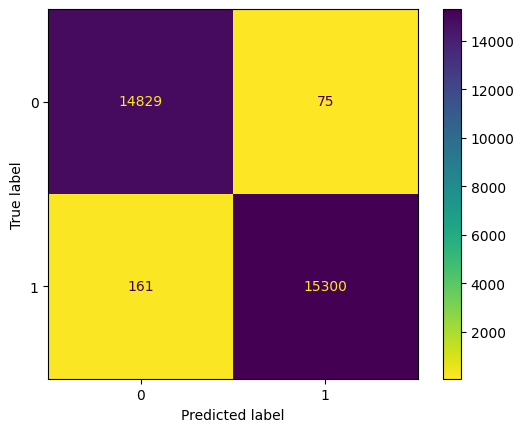

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14904
           1       1.00      0.99      0.99     15461

    accuracy                           0.99     30365
   macro avg       0.99      0.99      0.99     30365
weighted avg       0.99      0.99      0.99     30365

F1 Score = 0.9923466078609418


In [63]:
# OWN CONTRIBUTION (Evaluating tuned catboost model)

x,y = SplitFeaturesTarged(df)

ros = SMOTEENN()
print('Resampled dataset shape %s' % Counter(y))
x_res, y_res = ros.fit_resample(x,y)
print('Resampled dataset shape %s' % Counter(y_res))

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.2, random_state=42)
catboost_classifier = CatBoostClassifier(depth = 8, learning_rate = 0.09947087056016479, l2_leaf_reg = 3.383935159068795, boosting_type = 'Plain', logging_level='Silent')
clf = catboost_classifier.fit(x_train, y_train)
y_pred = clf.predict(x_test)

cf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cf_matrix,display_labels=clf.classes_)
disp.plot(cmap='viridis_r')
plt.show()  

f1score = metrics.f1_score(y_test, y_pred)
error1 = round((1 - metrics.recall_score(y_test, y_pred,pos_label=1))*100,3)
error2 = round((1 - metrics.recall_score(y_test, y_pred,pos_label=0))*100,3)

report = classification_report(y_test, y_pred)
print(report)
print(f"F1 Score = {f1score}")